In [536]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input,Conv2DTranspose, MaxPooling2D,BatchNormalization,concatenate,Activation, Conv2D

from Spatial_Attention import *


def SA_UNet(input_size=(1024, 1024, 3), block_size=7,keep_prob=0.9,start_neurons=16,lr=1e-3):

    inputs = Input(input_size)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(inputs)
    conv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv1)
    conv1= BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(conv1)
    conv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)



    conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(pool1)
    conv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(conv2)
    conv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)


    conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(pool2)
    conv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(conv3)
    conv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)


    convm = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(pool3)
    convm = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(convm)
    convm = BatchNormalization()(convm)
    convm = Activation('relu')(convm)
    convm = spatial_attention(convm)
    convm = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(convm)
    convm = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(convm)
    convm = BatchNormalization()(convm)
    convm = Activation('relu')(convm)


    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv3 = concatenate([deconv3, conv3])

    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    uconv3 = Activation('relu')(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    uconv3 = Activation('relu')(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])

    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    uconv2 = Activation('relu')(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    uconv2 = Activation('relu')(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])


    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    uconv1 = Activation('relu')(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = DropBlock2D(block_size=block_size, keep_prob=keep_prob)(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    uconv1 = Activation('relu')(uconv1)
    output_layer_noActi = Conv2D(1, (1, 1), padding="same", activation=None)(uconv1)
    output_layer = Activation('sigmoid')(output_layer_noActi)

    model = Model(inputs, output_layer)

    model.compile(optimizer=Adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [537]:
model = SA_UNet()

In [538]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 1024, 1024, 1 448         input_3[0][0]                    
__________________________________________________________________________________________________
drop_block2d_28 (DropBlock2D)   (None, 1024, 1024, 1 0           conv2d_32[0][0]                  
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 1024, 1024, 1 64          drop_block2d_28[0][0]            
____________________________________________________________________________________________

In [540]:
from  SA_UNet import *
model=SA_UNet(input_size=(desired_size,desired_size,3),start_neurons=16,lr=1e-3,keep_prob=0.87,block_size=7)

In [541]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1024, 1024,  0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 1024, 1024, 1 448         input_4[0][0]                    
__________________________________________________________________________________________________
drop_block2d_42 (DropBlock2D)   (None, 1024, 1024, 1 0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 1024, 1024, 1 64          drop_block2d_42[0][0]            
____________________________________________________________________________________________

In [542]:
weight="Model/CHASE/SA_UNet.h5"

In [543]:
model.load_weights(weight)

In [519]:
import os

import numpy as np
import cv2
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
np.random.seed(42)
import scipy.misc as mc
import matplotlib.pyplot as plt
data_location = ''
training_images_loc = data_location + 'CHASE/train/image/'
training_label_loc = data_location + 'CHASE/train/label/'
validate_images_loc = data_location + 'CHASE/validate/images/'
validate_label_loc = data_location + 'CHASE/validate/labels/'
train_files = os.listdir(training_images_loc)
train_data = []
train_label = []
validate_files = os.listdir(validate_images_loc)
validate_data = []
validate_label = []
desired_size=1024

for i in train_files:
    im = mc.imread(training_images_loc + i)
    label = mc.imread(training_label_loc + i.split('_')[0]+"_"+i.split('_')[1].split(".")[0] +"_1stHO.png" ,mode="L")
    old_size = im.shape[:2]  # old_size is in (height, width) format
    delta_w = desired_size - old_size[1]
    delta_h = desired_size - old_size[0]

    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    color2 = [0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)

    new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                   value=color2)

    train_data.append(cv2.resize(new_im, (desired_size, desired_size)))

    temp = cv2.resize(new_label,
                      (desired_size, desired_size))
    _, temp = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)
    train_label.append(temp)



for i in validate_files:
    im = mc.imread(validate_images_loc + i)
    label = mc.imread(validate_label_loc +i.split('_')[0]+'_'+ i.split('_')[1].split(".")[0] +"_1stHO.png" ,mode="L")
    old_size = im.shape[:2]  # old_size is in (height, width) format
    delta_w = desired_size - old_size[1]
    delta_h = desired_size - old_size[0]

    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    color2 = [0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=color)

    new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                   value=color2)

    validate_data.append(cv2.resize(new_im, (1024, 1024)))

    temp = cv2.resize(new_label,
                      (1024, 1024))
    _, temp = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)
    validate_label.append(temp)
train_data = np.array(train_data)

train_label = np.array(train_label)
validate_data = np.array(validate_data)
validate_label = np.array(validate_label)




x_train = train_data.astype('float32') / 255.
y_train = train_label.astype('float32') / 255.
# x_train = np.reshape(x_train, (len(x_train), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
# y_train = np.reshape(y_train, (len(y_train), desired_size, desired_size, 1))  # adapt this if using `channels_first` im

x_validate = validate_data.astype('float32') / 255.
y_validate = validate_label.astype('float32') / 255.
# x_validate = np.reshape(x_validate, (len(x_validate), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
# y_validate = np.reshape(y_validate, (len(y_validate), desired_size, desired_size, 1))  # adapt this if using `channels_first` im


c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.


In [520]:
x_train.shape

(247, 1024, 1024, 3)

In [521]:
x_validate.shape

(13, 1024, 1024, 3)

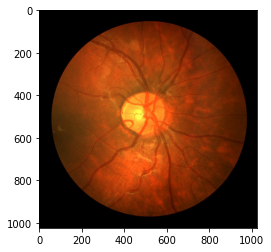

In [522]:
plt.imshow(x_train[0])

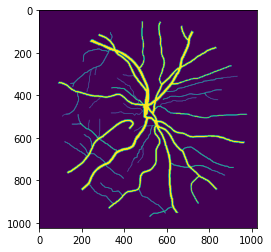

In [523]:
plt.imshow(y_train[0])

In [544]:
predictions = model.predict(x_validate)

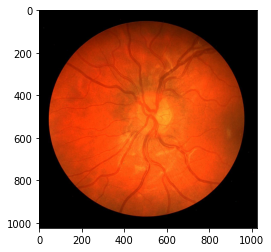

In [545]:
plt.imshow(x_validate[1])

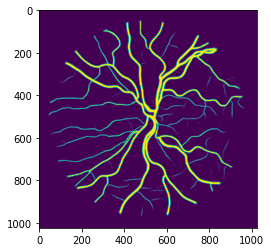

In [546]:
plt.imshow(predictions[1])

# Try on cracks

In [86]:
superpath = r'C:\Users\vendelb5569\OneDrive - ARCADIS\Severity Model\Data\Images\Nordics all\Shape\002. Crack longitudinal Center\3\\'

In [15]:
# data_location = ''
# training_images_loc = data_location + 'CHASE/train/image/'
# training_label_loc = data_location + 'CHASE/train/label/'
# validate_images_loc = data_location + 'CHASE/validate/images/'
# validate_label_loc = data_location + 'CHASE/validate/labels/'
# train_files = os.listdir(training_images_loc)
# train_data = []
# train_label = []
# validate_files = os.listdir(validate_images_loc)
# validate_data = []
# validate_label = []
# desired_size=1008

# for i in train_files:
#     im = mc.imread(training_images_loc + i)
#     label = mc.imread(training_label_loc + i.split('_')[0]+"_"+i.split('_')[1].split(".")[0] +"_1stHO.png" ,mode="L")
#     old_size = im.shape[:2]  # old_size is in (height, width) format
#     delta_w = desired_size - old_size[1]
#     delta_h = desired_size - old_size[0]

#     top, bottom = delta_h // 2, delta_h - (delta_h // 2)
#     left, right = delta_w // 2, delta_w - (delta_w // 2)

#     color = [0, 0, 0]
#     color2 = [0]
#     new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
#                                 value=color)

#     new_label = cv2.copyMakeBorder(label, top, bottom, left, right, cv2.BORDER_CONSTANT,
#                                    value=color2)

#     train_data.append(cv2.resize(new_im, (desired_size, desired_size)))

#     temp = cv2.resize(new_label,
#                       (desired_size, desired_size))
#     _, temp = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY)
#     train_label.append(temp)

superpath1 = r'C:\Users\vendelb5569\OneDrive - ARCADIS\Severity Model\Data\Images\Nordics all\Shape\002. Crack longitudinal Center\1\\'
superpath2 = r'C:\Users\vendelb5569\OneDrive - ARCADIS\Severity Model\Data\Images\Nordics all\Shape\002. Crack longitudinal Center\2\\'
superpath3 = r'C:\Users\vendelb5569\OneDrive - ARCADIS\Severity Model\Data\Images\Nordics all\Shape\002. Crack longitudinal Center\3\\'


test_cracks1 = []
test_cracks2 = []
test_cracks3 = []

crack_files1 = os.listdir(superpath1)
crack_files2 = os.listdir(superpath2)
crack_files3 = os.listdir(superpath3)


for i in crack_files1:
    im = mc.imread(superpath1 + i)
    test_cracks1.append(im)
test_cracks1 = np.array(test_cracks1)
test_cracks_test1 = test_cracks1.astype('float32') / 255.

for i in crack_files2:
    im = mc.imread(superpath2 + i)
    test_cracks2.append(im)
test_cracks2 = np.array(test_cracks2)
test_cracks_test2 = test_cracks2.astype('float32') / 255.


for i in crack_files3:
    im = mc.imread(superpath3 + i)
    test_cracks3.append(im)
test_cracks3 = np.array(test_cracks3)
test_cracks_test3 = test_cracks3.astype('float32') / 255.


    

c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
c:\users\vendelb5569\anaconda3\envs\env_bram\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.


In [16]:
test_cracks_test1.shape

(327, 512, 512, 3)

In [17]:
test_cracks_test2.shape

(300, 512, 512, 3)

In [18]:
test_cracks_test3.shape

(52, 512, 512, 3)

In [370]:
predictions1 = model.predict(test_cracks_test1, verbose=1)
predictions2 = model.predict(test_cracks_test2, verbose=1)
predictions3 = model.predict(test_cracks_test3, verbose=1)

2/2 [==============================] - 33s 13s/step


In [142]:
predictions3 = model.predict(test_cracks_test3, verbose=1)

2/2 [==============================] - 9s 3s/step


102
270
106
71


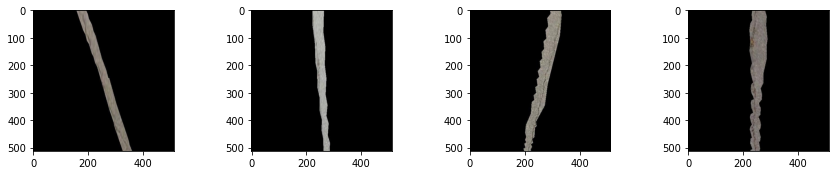

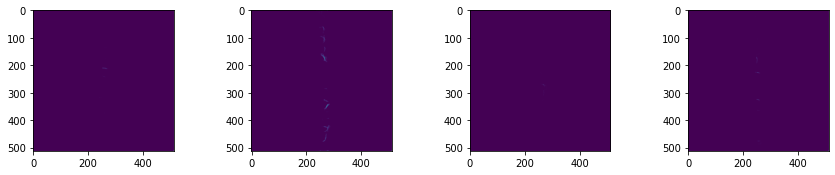

In [20]:
import numpy as np
import matplotlib.pyplot as plt



images_defects = test_cracks_test2
images_masks = predictions2

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, 4+1):
    j = np.random.randint(0, len(images_defects))
    print(j)
    img = images_defects[j]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5

for i in range(1, 4+1):
    img_mask = images_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_mask)
plt.show()

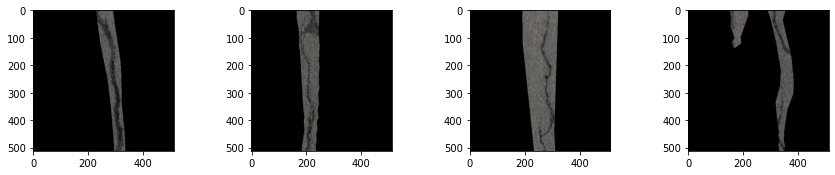

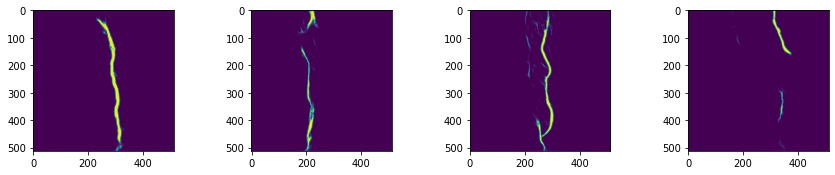

In [21]:
import numpy as np
import matplotlib.pyplot as plt



images_defects = test_cracks_test3
images_masks = predictions3

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, 4+1):
    img = images_defects[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5

for i in range(1, 4+1):
    img_mask = images_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_mask)
plt.show()

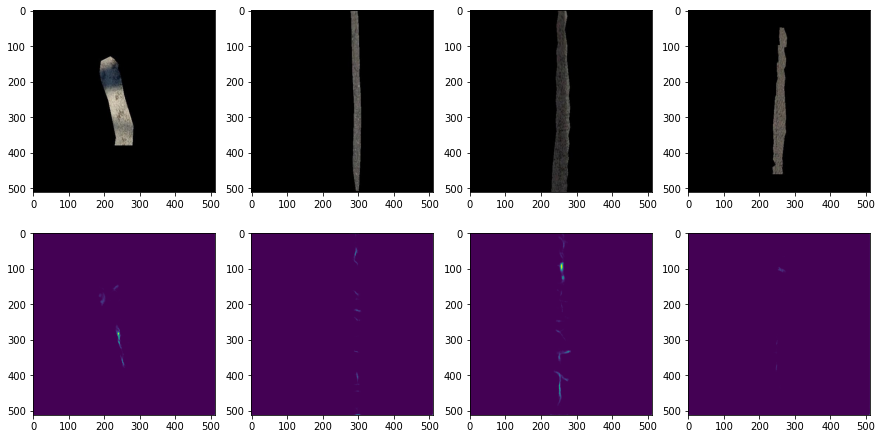

In [22]:
import numpy as np
import matplotlib.pyplot as plt



images_defects = test_cracks_test1
images_masks = predictions1

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, 4+1):
    
    j = np.random.randint(0, len(images_defects))
    
    img2 = images_masks[j]
    fig.add_subplot(1, columns, i)
    plt.imshow(img2)
    
    
    img = images_defects[j]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)
    
plt.show()

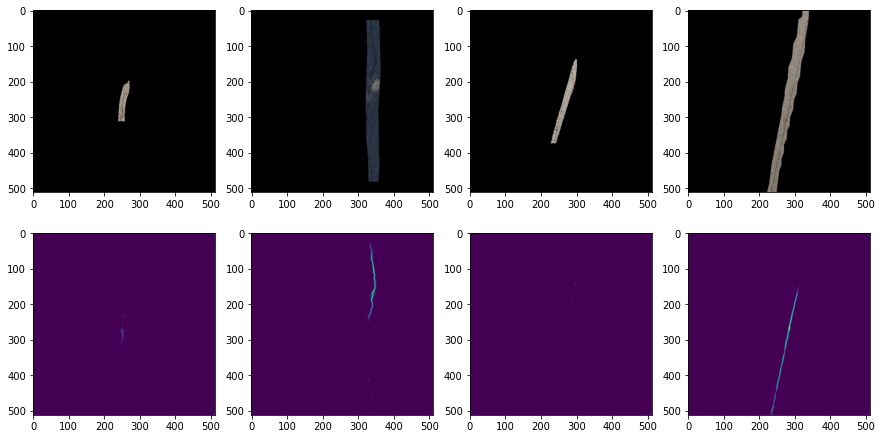

In [23]:
import numpy as np
import matplotlib.pyplot as plt



images_defects = test_cracks_test2
images_masks = predictions2

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, 4+1):
    
    j = np.random.randint(0, len(images_defects))
    
    img2 = images_masks[j]
    fig.add_subplot(1, columns, i)
    plt.imshow(img2)
    
    
    img = images_defects[j]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)
    
plt.show()

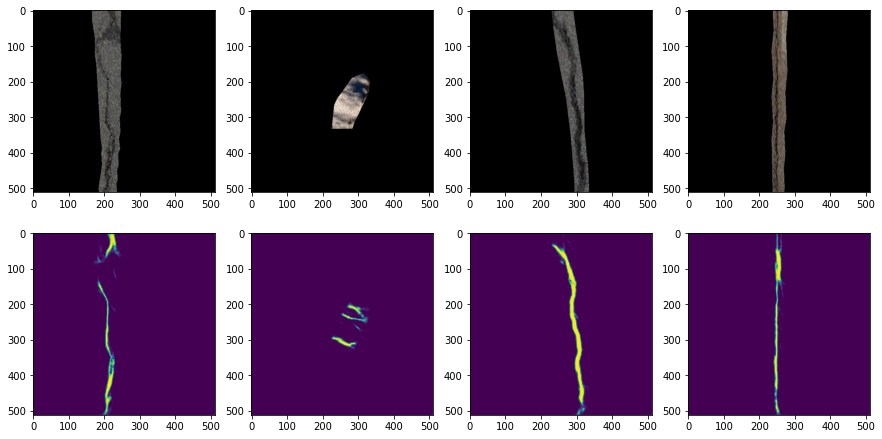

In [24]:
import numpy as np
import matplotlib.pyplot as plt



images_defects = test_cracks_test3
images_masks = predictions3

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, 4+1):
    
    j = np.random.randint(0, len(images_defects))
    
    img2 = images_masks[j]
    fig.add_subplot(1, columns, i)
    plt.imshow(img2)
    
    
    img = images_defects[j]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)
    
plt.show()

# Try and test

In [384]:
list1=[]
list2=[]
list3=[]

for i in range(1, len(predictions1)):
    total1 = predictions1[i] * 255
    total1[total1 < 220] = 0
    count1 = np.sum(total1 > 220)
    list1.append(count1/(512*512)*100)
#     list1.append((np.sum(predictions1[i] != 0.000)-np.sum(predictions1[i] < 0.00001))/(np.sum(predictions1[i] != 0.000)))
    
for i in range(1, len(predictions2)):
    total2 = predictions2[i] * 255
    total2[total2 < 220] = 0
    count2 = np.sum(total2 > 220)
    list2.append(count2/(512*512)*100)
#     list2.append((np.sum(predictions2[i] != 0.000)-np.sum(predictions2[i] < 0.00001))/(np.sum(predictions2[i] != 0.000)))
    
for i in range(1, len(predictions3)):
    total3 = predictions3[i] * 255
    total3[total3 < 220] = 0
    count3 = np.sum(total3 > 220)
    list3.append(count3/(512*512)*100)
#     list3.append((np.sum(predictions3[i] != 0.000)-np.sum(predictions3[i] < 0.00001))/(np.sum(predictions3[i] != 0.000)))

In [236]:
print("(Severity : 1) % above 0: ", sum(i>0 for i in list1)/len(list1))
print("(Severity : 2) % above 0: ", sum(i>0 for i in list2)/len(list2))
print("(Severity : 3) % above 0: ", sum(i>0 for i in list3)/len(list3))


(Severity : 1) % above 0:  0.3067484662576687
(Severity : 2) % above 0:  0.5083612040133779
(Severity : 3) % above 0:  0.7647058823529411


## Sev 1 vs. Sev3

In [216]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.1, 100):
    
    total_lower1 = sum(y < i for y in list1)
    total_higher2 = sum(y2 > i for y2 in list3)
    best1 = total_lower1/len(list1)
    best2 = total_higher2/len(list3)
    mean_acc = (best1+best2)/2
    print("i: ", i)
    print("best1", best1)
    print("best2", best2)
    print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i

    
#     if (total_lower1 > base1) & (total_higher2 > base2):
#         best1 = total_lower1/len(list1)
#         best2 = total_higher2/len(list2)
#         mean_acc = (best1+best2)/2

#         if mean_acc > mean_old:
#             mean_old = mean_acc
#             mean_best = mean_acc
            

i:  0.0
best1 0.0
best2 0.7647058823529411
mean 0.38235294117647056
i:  0.00101010101010101
best1 0.7024539877300614
best2 0.7450980392156863
mean 0.7237760134728739
i:  0.00202020202020202
best1 0.7208588957055214
best2 0.7450980392156863
mean 0.7329784674606039
i:  0.0030303030303030303
best1 0.7269938650306749
best2 0.7254901960784313
mean 0.7262420305545532
i:  0.00404040404040404
best1 0.745398773006135
best2 0.7058823529411765
mean 0.7256405629736558
i:  0.00505050505050505
best1 0.754601226993865
best2 0.7058823529411765
mean 0.7302417899675208
i:  0.006060606060606061
best1 0.7638036809815951
best2 0.7058823529411765
mean 0.7348430169613858
i:  0.007070707070707071
best1 0.7699386503067485
best2 0.7058823529411765
mean 0.7379105016239624
i:  0.00808080808080808
best1 0.7760736196319018
best2 0.7058823529411765
mean 0.7409779862865391
i:  0.00909090909090909
best1 0.7791411042944786
best2 0.7058823529411765
mean 0.7425117286178275
i:  0.0101010101010101
best1 0.7822085889570553


i:  0.08484848484848485
best1 0.8834355828220859
best2 0.5490196078431373
mean 0.7162275953326116
i:  0.08585858585858586
best1 0.8834355828220859
best2 0.5490196078431373
mean 0.7162275953326116
i:  0.08686868686868687
best1 0.8865030674846626
best2 0.5490196078431373
mean 0.7177613376638999
i:  0.08787878787878788
best1 0.8865030674846626
best2 0.5490196078431373
mean 0.7177613376638999
i:  0.08888888888888889
best1 0.8865030674846626
best2 0.5294117647058824
mean 0.7079574160952724
i:  0.0898989898989899
best1 0.8865030674846626
best2 0.5294117647058824
mean 0.7079574160952724
i:  0.09090909090909091
best1 0.8926380368098159
best2 0.5294117647058824
mean 0.7110249007578491
i:  0.09191919191919191
best1 0.8926380368098159
best2 0.5294117647058824
mean 0.7110249007578491
i:  0.09292929292929293
best1 0.8926380368098159
best2 0.5294117647058824
mean 0.7110249007578491
i:  0.09393939393939393
best1 0.8957055214723927
best2 0.5294117647058824
mean 0.7125586430891375
i:  0.094949494949494

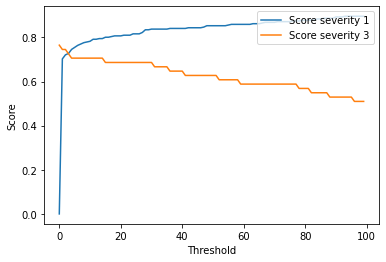

In [217]:
plt.plot(list_1, label='Score severity 1')
plt.plot(list_2, label='Score severity 3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [218]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.7618489113436786
Optimal Threshold:  0.030303030303030304


## Sev 1 vs. Sev2

In [276]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.05, 100):
    
    total_lower1 = sum(y < i for y in list1)
    total_higher2 = sum(y2 > i for y2 in list2)
    best1 = total_lower1/len(list1)
    best2 = total_higher2/len(list2)
    mean_acc = (best1+best2)/2
    print("i: ", i)
    print("best1", best1)
    print("best2", best2)
    print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i

    
#     if (total_lower1 > base1) & (total_higher2 > base2):
#         best1 = total_lower1/len(list1)
#         best2 = total_higher2/len(list2)
#         mean_acc = (best1+best2)/2

#         if mean_acc > mean_old:
#             mean_old = mean_acc
#             mean_best = mean_acc
            

i:  0.0
best1 0.0
best2 0.5083612040133779
mean 0.25418060200668896
i:  0.000505050505050505
best1 0.6932515337423313
best2 0.4983277591973244
mean 0.5957896464698278
i:  0.00101010101010101
best1 0.7024539877300614
best2 0.4916387959866221
mean 0.5970463918583417
i:  0.0015151515151515152
best1 0.7055214723926381
best2 0.4916387959866221
mean 0.5985801341896301
i:  0.00202020202020202
best1 0.7208588957055214
best2 0.47491638795986624
mean 0.5978876418326938
i:  0.002525252525252525
best1 0.7208588957055214
best2 0.47157190635451507
mean 0.5962154010300182
i:  0.0030303030303030303
best1 0.7269938650306749
best2 0.4682274247491639
mean 0.5976106448899194
i:  0.0035353535353535356
best1 0.7392638036809815
best2 0.46488294314381273
mean 0.6020733734123971
i:  0.00404040404040404
best1 0.745398773006135
best2 0.46153846153846156
mean 0.6034686172722983
i:  0.004545454545454545
best1 0.7515337423312883
best2 0.45484949832775917
mean 0.6031916203295238
i:  0.00505050505050505
best1 0.75460

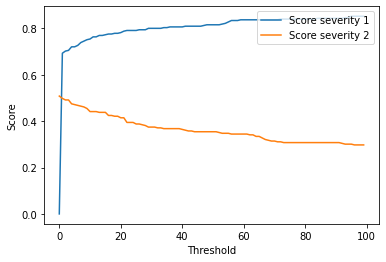

In [277]:
plt.plot(list_1, label='Score severity 1')
plt.plot(list_2, label='Score severity 2')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [278]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.6055666126351642
Optimal Threshold:  0.007575757575757576


## Sev 2 vs. Sev 3

In [279]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.05, 100):
    
    total_lower1 = sum(y < i for y in list2)
    total_higher2 = sum(y2 > i for y2 in list3)
    best1 = total_lower1/len(list2)
    best2 = total_higher2/len(list3)
    mean_acc = (best1+best2)/2
    print("i: ", i)
    print("best1", best1)
    print("best2", best2)
    print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i

    
#     if (total_lower1 > base1) & (total_higher2 > base2):
#         best1 = total_lower1/len(list1)
#         best2 = total_higher2/len(list2)
#         mean_acc = (best1+best2)/2

#         if mean_acc > mean_old:
#             mean_old = mean_acc
#             mean_best = mean_acc
            

i:  0.0
best1 0.0
best2 0.7647058823529411
mean 0.38235294117647056
i:  0.000505050505050505
best1 0.5016722408026756
best2 0.7647058823529411
mean 0.6331890615778084
i:  0.00101010101010101
best1 0.5083612040133779
best2 0.7450980392156863
mean 0.6267296216145322
i:  0.0015151515151515152
best1 0.5083612040133779
best2 0.7450980392156863
mean 0.6267296216145322
i:  0.00202020202020202
best1 0.5250836120401338
best2 0.7450980392156863
mean 0.63509082562791
i:  0.002525252525252525
best1 0.5284280936454849
best2 0.7254901960784313
mean 0.6269591448619581
i:  0.0030303030303030303
best1 0.5317725752508361
best2 0.7254901960784313
mean 0.6286313856646337
i:  0.0035353535353535356
best1 0.5351170568561873
best2 0.7058823529411765
mean 0.6204997048986819
i:  0.00404040404040404
best1 0.5384615384615384
best2 0.7058823529411765
mean 0.6221719457013575
i:  0.004545454545454545
best1 0.5451505016722408
best2 0.7058823529411765
mean 0.6255164273067086
i:  0.00505050505050505
best1 0.55852842809

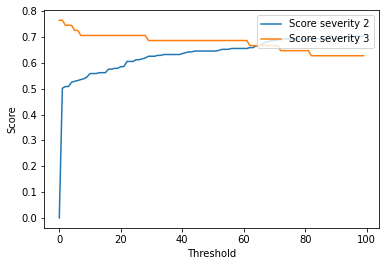

In [280]:
plt.plot(list_1, label='Score severity 2')
plt.plot(list_2, label='Score severity 3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [281]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.6778149386845038
Optimal Threshold:  0.03585858585858586


In [226]:
0.5*0.5

0.25

In [227]:
0.05*0.05

0.0025000000000000005

# Summary

- 1 vs. 2:
    - Threshold 0.007070707070707071

- 2 vs. 3:
    - Threshold 0.03535353535353535

## Sev 1 vs. 2 vs. 3

In [253]:
TP_1 = sum(y < 0.00707070707070707071 for y in list1)
TP_2 = sum(0.00707070707070707071 < y < 0.03535353535 for y in list2)
TP_3 = sum(y > 0.03535353535 for y in list3)

print("Accuracy 1: ", TP_1/len(list1))
print("Accuracy 2: ", TP_2/len(list2))
print("Accuracy 3: ", TP_3/len(list3))

Accuracy 1:  0.7699386503067485
Accuracy 2:  0.12374581939799331
Accuracy 3:  0.6666666666666666


# Squared

In [328]:
list1=[]
list2=[]
list3=[]

for i in range(1, len(predictions1)):
    total1 = predictions1[i] * 255
    total1[total1 < 220] = 0
    count1 = np.sum(total1 > 220)
    base1 = count1/(512*512)*100
    list1.append(base1*base1)
#     list1.append((np.sum(predictions1[i] != 0.000)-np.sum(predictions1[i] < 0.00001))/(np.sum(predictions1[i] != 0.000)))
    
for i in range(1, len(predictions2)):
    total2 = predictions2[i] * 255
    total2[total2 < 220] = 0
    count2 = np.sum(total2 > 220)
    base2 = count2/(512*512)*100
    list2.append(base2*base2)
#     list2.append((np.sum(predictions2[i] != 0.000)-np.sum(predictions2[i] < 0.00001))/(np.sum(predictions2[i] != 0.000)))
    
for i in range(1, len(predictions3)):
    total3 = predictions3[i] * 255
    total3[total3 < 220] = 0
    count3 = np.sum(total3 > 220)
    base3 = count3/(512*512)*100
    list3.append(base3*base3)
#     list3.append((np.sum(predictions3[i] != 0.000)-np.sum(predictions3[i] < 0.00001))/(np.sum(predictions3[i] != 0.000)))

In [329]:
print("Mean sev 1: ", np.mean(list1))
print("Mean sev 2: ", np.mean(list2))
print("Mean sev 3: ", np.mean(list3))

Mean sev 1:  0.022202928370561884
Mean sev 2:  0.051490244740638944
Mean sev 3:  0.1697934360480776


# Sev 1 vs. 2

In [284]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.05, 100):
    
    total_lower1 = sum(y < i for y in list1)
    total_higher2 = sum(y2 > i for y2 in list2)
    best1 = total_lower1/len(list1)
    best2 = total_higher2/len(list2)
    mean_acc = (best1+best2)/2
    print("i: ", i)
    print("best1", best1)
    print("best2", best2)
    print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i
            

i:  0.0
best1 0.0
best2 0.5083612040133779
mean 0.25418060200668896
i:  0.000505050505050505
best1 0.8098159509202454
best2 0.35451505016722407
mean 0.5821655005437347
i:  0.00101010101010101
best1 0.8374233128834356
best2 0.3411371237458194
mean 0.5892802183146275
i:  0.0015151515151515152
best1 0.8404907975460123
best2 0.3076923076923077
mean 0.57409155261916
i:  0.00202020202020202
best1 0.843558282208589
best2 0.3076923076923077
mean 0.5756252949504483
i:  0.002525252525252525
best1 0.852760736196319
best2 0.2976588628762542
mean 0.5752097995362866
i:  0.0030303030303030303
best1 0.852760736196319
best2 0.28762541806020064
mean 0.5701930771282598
i:  0.0035353535353535356
best1 0.8588957055214724
best2 0.27759197324414714
mean 0.5682438393828098
i:  0.00404040404040404
best1 0.8619631901840491
best2 0.27424749163879597
mean 0.5681053409114225
i:  0.004545454545454545
best1 0.8680981595092024
best2 0.26421404682274247
mean 0.5661561031659724
i:  0.00505050505050505
best1 0.871165644

mean 0.5378870262839321
i:  0.045454545454545456
best1 0.9386503067484663
best2 0.13712374581939799
mean 0.5378870262839321
i:  0.04595959595959596
best1 0.9386503067484663
best2 0.13712374581939799
mean 0.5378870262839321
i:  0.046464646464646465
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.04696969696969697
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.047474747474747475
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.047979797979797977
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.048484848484848485
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.04898989898989899
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.049494949494949494
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205
i:  0.05
best1 0.941717791411043
best2 0.13712374581939799
mean 0.5394207686152205


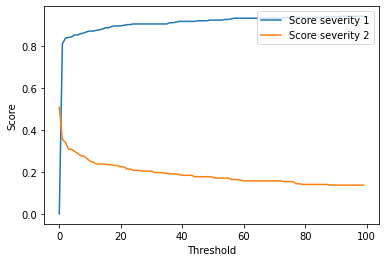

In [285]:
plt.plot(list_1, label='Score severity 1')
plt.plot(list_2, label='Score severity 2')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [286]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.5892802183146275
Optimal Threshold:  0.00101010101010101


# Sev 2 vs. 3

In [287]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.05, 100):
    
    total_lower1 = sum(y < i for y in list2)
    total_higher2 = sum(y2 > i for y2 in list3)
    best1 = total_lower1/len(list2)
    best2 = total_higher2/len(list3)
    mean_acc = (best1+best2)/2
    print("i: ", i)
    print("best1", best1)
    print("best2", best2)
    print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i

    
#     if (total_lower1 > base1) & (total_higher2 > base2):
#         best1 = total_lower1/len(list1)
#         best2 = total_higher2/len(list2)
#         mean_acc = (best1+best2)/2

#         if mean_acc > mean_old:
#             mean_old = mean_acc
#             mean_best = mean_acc
            

i:  0.0
best1 0.0
best2 0.7647058823529411
mean 0.38235294117647056
i:  0.000505050505050505
best1 0.6454849498327759
best2 0.6862745098039216
mean 0.6658797298183488
i:  0.00101010101010101
best1 0.6588628762541806
best2 0.6666666666666666
mean 0.6627647714604237
i:  0.0015151515151515152
best1 0.6923076923076923
best2 0.6470588235294118
mean 0.6696832579185521
i:  0.00202020202020202
best1 0.6923076923076923
best2 0.6274509803921569
mean 0.6598793363499246
i:  0.002525252525252525
best1 0.7023411371237458
best2 0.6274509803921569
mean 0.6648960587579513
i:  0.0030303030303030303
best1 0.7123745819397993
best2 0.6078431372549019
mean 0.6601088595973506
i:  0.0035353535353535356
best1 0.7224080267558528
best2 0.5882352941176471
mean 0.65532166043675
i:  0.00404040404040404
best1 0.725752508361204
best2 0.5882352941176471
mean 0.6569939012394255
i:  0.004545454545454545
best1 0.7357859531772575
best2 0.5882352941176471
mean 0.6620106236474523
i:  0.00505050505050505
best1 0.749163879598

i:  0.046464646464646465
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.04696969696969697
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.047474747474747475
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.047979797979797977
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.048484848484848485
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.04898989898989899
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.049494949494949494
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951
i:  0.05
best1 0.862876254180602
best2 0.35294117647058826
mean 0.6079087153255951


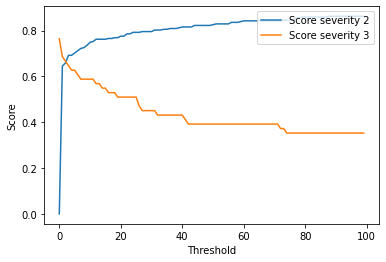

In [288]:
plt.plot(list_1, label='Score severity 2')
plt.plot(list_2, label='Score severity 3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [289]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.6703718276608303
Optimal Threshold:  0.005555555555555556


# TRY 2

In [406]:
test_cracks_test2[0].shape

(512, 512, 3)

In [398]:
img = np.mean(test_cracks_test2[-7], axis=2)

In [399]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [400]:
np.sum(img > 0)

21183

In [407]:
np.sum(np.mean(test_cracks_test2[-7], axis=2) > 0)

21183

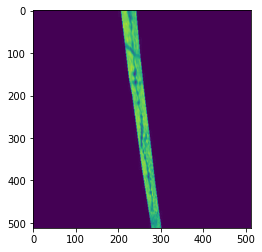

In [401]:
plt.imshow(img)
plt.show()

In [402]:
total1 = predictions2[-7] * 255
total1[total1 < 220] = 0
count1 = np.sum(total1 > 220)
count1

750

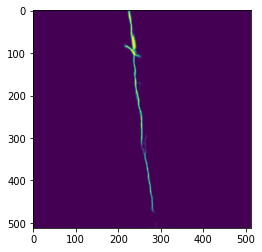

In [404]:
plt.imshow(predictions2[-7])
plt.show()

In [405]:
count1/np.sum(img > 0)

0.03540574989378275

In [382]:
count1/(512*512)*100

2.140045166015625

In [397]:
list2[-7]

0.286102294921875

# On basis of size of crack

In [477]:
list1=[]
list2=[]
list3=[]

start_white = 240

for i in range(1, len(predictions1)):
    total1 = predictions1[i] * 255
    total1[total1 < start_white] = 0
    count_white = np.sum(total1 > start_white)
    count_total = np.sum(np.mean(test_cracks_test1[i], axis=2) > 0)
    
    if count_white != 0:
        list1.append(count_white/count_total)
    else:
        list1.append(0)
    
for i in range(1, len(predictions2)):
    total2 = predictions2[i] * 255
    total2[total2 < start_white] = 0
    count_white = np.sum(total2 > start_white)
    count_total = np.sum(np.mean(test_cracks_test2[i], axis=2) > 0)
    
    if count_white != 0:
        list2.append(count_white/count_total)
    else:
        list2.append(0)
    
for i in range(1, len(predictions3)):
    total3 = predictions3[i] * 255
    total3[total3 < start_white] = 0
    count_white = np.sum(total3 > start_white)
    count_total = np.sum(np.mean(test_cracks_test3[i], axis=2) > 0)
        
    if count_white != 0:
        list3.append(count_white/count_total)
    else:
        list3.append(0)


In [478]:
print("(Severity : 1) % above 0: ", sum(i>0 for i in list1)/len(list1))
print("(Severity : 2) % above 0: ", sum(i>0 for i in list2)/len(list2))
print("(Severity : 3) % above 0: ", sum(i>0 for i in list3)/len(list3))


(Severity : 1) % above 0:  0.2147239263803681
(Severity : 2) % above 0:  0.3879598662207358
(Severity : 3) % above 0:  0.6862745098039216


In [479]:
print("mean 1: ", np.mean(list1))
print("mean 2: ", np.mean(list2))
print("mean 3: ", np.mean(list3))

mean 1:  0.0023501899448787576
mean 2:  0.005871036552696616
mean 3:  0.015961138350222975


# Sev 1 vs Sev 3

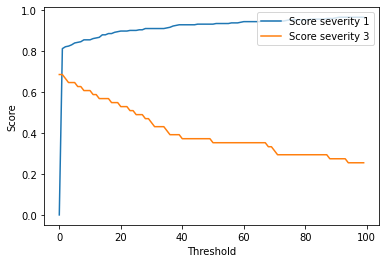

In [480]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.024, 100):
    
    total_lower1 = sum(y < i for y in list1)
    total_higher2 = sum(y2 > i for y2 in list3)
    best1 = total_lower1/len(list1)
    best2 = total_higher2/len(list3)
    mean_acc = (best1+best2)/2
#     print("i: ", i)
#     print("best1", best1)
#     print("best2", best2)
#     print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i

plt.plot(list_1, label='Score severity 1')
plt.plot(list_2, label='Score severity 3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show() 

In [481]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.7495789726933718
Optimal Threshold:  0.00024242424242424242


## Sev 1 and 2

In [473]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.024, 100):
    
    total_lower1 = sum(y < i for y in list1)
    total_higher2 = sum(y2 > i for y2 in list2)
    best1 = total_lower1/len(list1)
    best2 = total_higher2/len(list2)
    mean_acc = (best1+best2)/2
#     print("i: ", i)
#     print("best1", best1)
#     print("best2", best2)
#     print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i
            

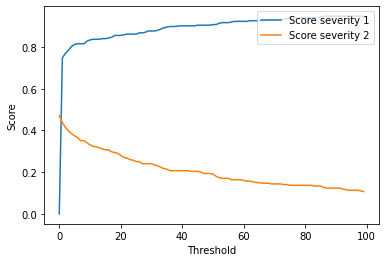

In [474]:
plt.plot(list_1, label='Score severity 1')
plt.plot(list_2, label='Score severity 2')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [475]:
print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

Highest Mean:  0.5941481831052383
Optimal Threshold:  0.0009696969696969697


In [476]:
print("0 values in %: ", sum(i == 0 for i in list1)/len(list1))
print("0 values in %: ", sum(i == 0 for i in list2)/len(list2))
print("0 values in %: ", sum(i == 0 for i in list3)/len(list3))

0 values in %:  0.7269938650306749
0 values in %:  0.5284280936454849
0 values in %:  0.27450980392156865


# Sev 1&2 vs sev 3

In [502]:
list1=[]
list2=[]
list3=[]

start_white = 240

for i in range(1, len(predictions1)):
    total1 = predictions1[i] * 255
    total1[total1 < start_white] = 0
    count_white = np.sum(total1 > start_white)
    count_total = np.sum(np.mean(test_cracks_test1[i], axis=2) > 0)
    
    if count_white != 0:
        list1.append(count_white/count_total)
    else:
        list1.append(0)
    
for i in range(1, len(predictions2)):
    total2 = predictions2[i] * 255
    total2[total2 < start_white] = 0
    count_white = np.sum(total2 > start_white)
    count_total = np.sum(np.mean(test_cracks_test2[i], axis=2) > 0)
    
    if count_white != 0:
        list2.append(count_white/count_total)
    else:
        list2.append(0)
    
for i in range(1, len(predictions3)):
    total3 = predictions3[i] * 255
    total3[total3 < start_white] = 0
    count_white = np.sum(total3 > start_white)
    count_total = np.sum(np.mean(test_cracks_test3[i], axis=2) > 0)
        
    if count_white != 0:
        list3.append(count_white/count_total)
    else:
        list3.append(0)


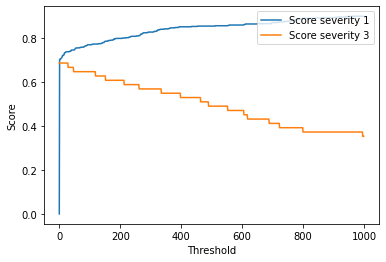

Highest Mean:  0.7119372549019608
Optimal Threshold:  0.0002642642642642643


In [503]:
base1 = 0
base2 = 0
best1 = 0
best2 = 0
mean_old=0

list_1 = []
list_2 = []

for i in np.linspace(0,0.012, 1000):
    
    total_lower1 = sum(y < i for y in list1) + sum(y < i for y in list2)
    total_higher2 = sum(y2 > i for y2 in list3)
    best1 = total_lower1/(len(list1) + len(list2))
    best2 = total_higher2/len(list3)
    mean_acc = (best1+best2)/2
#     print(sum(y < i for y in list1))
#     print(sum(y < i for y in list2))
#     print(sum(y2 > i for y2 in list3))
#     print("i: ", i)
#     print("best1", best1)
#     print("best2", best2)
#     print('mean', mean_acc)
    
    list_1.append(best1)
    list_2.append(best2)
    
    if mean_acc > mean_old:
        mean_old=mean_acc
        mean_best=mean_acc
        best_i = i
        
plt.plot(list_1, label='Score severity 1')
plt.plot(list_2, label='Score severity 3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

print("Highest Mean: ", mean_best)
print("Optimal Threshold: ", best_i)

# Loop over multiple values

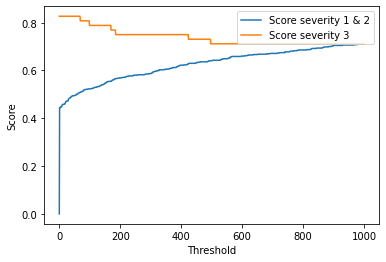

White pixel Ratio:  150
Highest Mean:  0.7114311127469022
Optimal Threshold:  0.011987987987987989


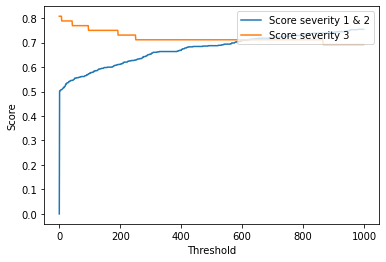

White pixel Ratio:  180
Highest Mean:  0.724987731566679
Optimal Threshold:  0.009993993993993994


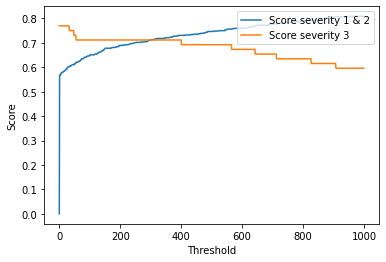

White pixel Ratio:  210
Highest Mean:  0.7241442767758557
Optimal Threshold:  0.006618618618618619


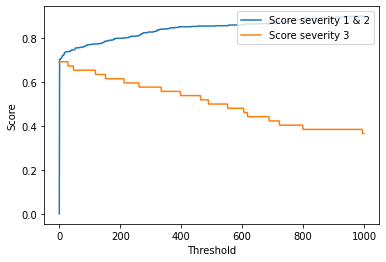

White pixel Ratio:  240
Highest Mean:  0.7153723469512943
Optimal Threshold:  0.0002642642642642643


In [560]:
for whitepix in [150, 180, 210, 240]:

    list1=[]
    list2=[]
    list3=[]

    start_white = whitepix

    for i in range(0, len(predictions1)):
        total1 = predictions1[i] * 255
        total1[total1 < start_white] = 0
        count_white = np.sum(total1 > start_white)
        count_total = np.sum(np.mean(test_cracks_test1[i], axis=2) > 0)

        if count_white != 0:
            list1.append(count_white/count_total)
        else:
            list1.append(0)

    for i in range(0, len(predictions2)):
        total2 = predictions2[i] * 255
        total2[total2 < start_white] = 0
        count_white = np.sum(total2 > start_white)
        count_total = np.sum(np.mean(test_cracks_test2[i], axis=2) > 0)

        if count_white != 0:
            list2.append(count_white/count_total)
        else:
            list2.append(0)

    for i in range(0, len(predictions3)):
        total3 = predictions3[i] * 255
        total3[total3 < start_white] = 0
        count_white = np.sum(total3 > start_white)
        count_total = np.sum(np.mean(test_cracks_test3[i], axis=2) > 0)

        if count_white != 0:
            list3.append(count_white/count_total)
        else:
            list3.append(0)

    base1 = 0
    base2 = 0
    best1 = 0
    best2 = 0
    mean_old=0

    list_1 = []
    list_2 = []

    for i in np.linspace(0,0.012, 1000):

        total_lower1 = sum(y < i for y in list1) + sum(y < i for y in list2)
        total_higher2 = sum(y2 > i for y2 in list3)
        best1 = total_lower1/(len(list1) + len(list2))
        best2 = total_higher2/len(list3)
        mean_acc = (best1+best2)/2
    #     print(sum(y < i for y in list1))
    #     print(sum(y < i for y in list2))
    #     print(sum(y2 > i for y2 in list3))
    #     print("i: ", i)
    #     print("best1", best1)
    #     print("best2", best2)
    #     print('mean', mean_acc)

        list_1.append(best1)
        list_2.append(best2)

        if mean_acc > mean_old:
            mean_old=mean_acc
            mean_best=mean_acc
            best_i = i

    plt.plot(list_1, label='Score severity 1 & 2')
    plt.plot(list_2, label='Score severity 3')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc='upper right')
    plt.show()

    print("White pixel Ratio: ", whitepix)
    print("Highest Mean: ", mean_best)
    print("Optimal Threshold: ", best_i)

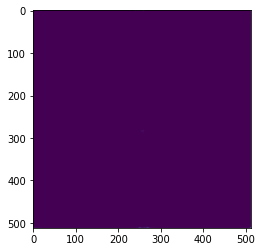

In [561]:
plt.imshow(predictions1[1])
plt.show()

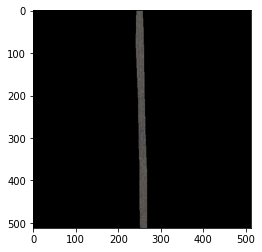

In [562]:
plt.imshow(test_cracks_test1[1])
plt.show()

In [563]:
len(test_cracks_test1)

327

In [564]:
len(predictions1)

327

In [565]:
len(list1)

327

In [568]:
import pandas as pd
total_dataframe = pd.DataFrame()
total_dataframe['Image Name'] = crack_files1
total_dataframe['Ratio Score'] = list1

In [571]:
total_dataframe[10:30]

Image Name  Ratio Score
10  0127_WE1JIAZ6.jpg     0.000000
11  0135_WE1JIAZE.jpg     0.000000
12  0153_WE1JIBCA.jpg     0.000000
13  0160_WE1JIBCH.jpg     0.000000
14  0207_WE1JIBDS.jpg     0.000000
15  0267_WE1JIBFG.jpg     0.000000
16  0310_WE1JIBH4.jpg     0.000000
17  0315_WE1JIBH9.jpg     0.000000
18  0317_WE1JIBHB.jpg     0.000000
19  0319_WE1JIBHD.jpg     0.002613
20  0320_WE1JIBHE.jpg     0.000000
21  0321_WE1JIBHF.jpg     0.000000
22  0322_WE1JIBHG.jpg     0.000000
23  0331_WE1JIBHP.jpg     0.000000
24  0334_WE1JIBHS.jpg     0.000000
25  0358_WE1JIBOU.jpg     0.006651
26  0362_WE1JIBOY.jpg     0.000000
27  0366_WE1JIBP2.jpg     0.003307
28  0374_WE1JIBPA.jpg     0.000000
29  0380_WE1JIBPG.jpg     0.000000

In [570]:
list1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0026129152668906306,
 0,
 0,
 0,
 0,
 0,
 0.0066512040384746575,
 0,
 0.0033071517155849523,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.012133584992873927,
 0,
 0,
 0.021062795022171364,
 9.392317084624777e-05,
 0,
 0,
 0,
 0,
 0,
 0.003027771977448319,
 0,
 0.021904180120429356,
 0,
 0,
 0.04390862074870706,
 0,
 0.04249249805505131,
 0,
 0,
 0.037342585453610896,
 0,
 0.04795586841749019,
 0,
 0,
 0,
 0.00045797077313793245,
 0,
 0,
 0.008616420719025453,
 0,
 0,
 0,
 0.000443675407072186,
 0,
 0.003199512455244915,
 0,
 0,
 0,
 0,
 0,
 0.00026299352378447683,
 0,
 0.003195291149884381,
 0.05825004765665423,
 0.03236186784656452,
 0,
 0,
 0,
 0,
 0,
 0.001324032810178906,
 0,
 0,
 0.029779017378245013,
 0,
 0.0010061282356169396,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4.701678499224223e-05,
 0,
 0,
 0,
 0,
 0.03204214851386726,
 0.00941550501345072,
 0,
 0,
 0.0006114094316550587,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [22]:
import json
import os
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from centerline.geometry import Centerline
import cv2
from PIL import Image

# from preprocess_functions import *
from tqdm import tqdm

import scipy.misc as mc
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Input,Conv2DTranspose, MaxPooling2D,BatchNormalization,concatenate,Activation, Conv2D

from Spatial_Attention import *

from SA_UNet import *



# ------------------------------------------------------------------------------------------------------------------------------------------
# Set your path variables
# ------------------------------------------------------------------------------------------------------------------------------------------


INPUT_PATH = r'C:\Git-Clones\blood-vessel-detection-for-crack-severity\CSV\Nordics\Cyclomedia_CROW_-7.csv'

OUTPUT_PATH = r'C:\Git-Clones\blood-vessel-detection-for-crack-severity\CSV\second_try.xlsx'


# ------------------------------------------------------------------------------------------------------------------------------------------
# Load the blood vessel model
# ------------------------------------------------------------------------------------------------------------------------------------------


desired_size = 512

model=SA_UNet(input_size=(desired_size,desired_size,3),start_neurons=16,lr=1e-3,keep_prob=0.87,block_size=7)
weight="Model/CHASE/SA_UNet.h5"

model.load_weights(weight)



# ------------------------------------------------------------------------------------------------------------------------------------------
# Create flat images
# ------------------------------------------------------------------------------------------------------------------------------------------
csv_df = pd.read_csv(INPUT_PATH, converters={'X_points2': eval, 'Y_points2': eval, 'X_points': eval, 'Y_points': eval})
csv_df = csv_df.loc[csv_df['Severity'].notnull()]


width = 1300
height = 2000

img_height = 2304
img_width = 4096

# If image has horizontal view (0 degrees)
# pts = np.array([[750, 2300], [1940 ,1250], [2220, 1250], [3500, 2200]], dtype=np.float32)

# If image has hood view (-8 degrees)
pts = np.array([[0, 4/5*img_height], [img_width/2.6, img_height/2], [2/3.5*img_width, img_height/2], [3.5/5*img_width, 4/5*img_height]], dtype=np.float32)


dts = np.array([[0, height], [0, 0], [width, 0], [width, height]], dtype=np.float32)
matrix = cv2.getPerspectiveTransform(pts, dts)

# if not os.path.exists(OUTPUT_PATH):
#         os.makedirs(OUTPUT_PATH)

# for img_path in tqdm(IMAGES_PATH):
#     img = cv2.imread(img_path)
#     output = cv2.warpPerspective(img, matrix, (width, height))

count = 0

for rownumber, row in tqdm(csv_df.iterrows()):
    
    defect1 = csv_df.loc[rownumber]['Image']
    
    # Get the shape, defect and severity
    defect = csv_df.loc[rownumber]['Defect']
    severity = str(int(csv_df.loc[rownumber]["Severity"]))
    

    # Go through image and do the warping
    img_path = csv_df.loc[rownumber]["Image_path"]
    img = cv2.imread(img_path)
    output = cv2.warpPerspective(img, matrix, (width, height))  

    # Get the x and y coordinates of the WARPED image
    x = csv_df.loc[rownumber]["X_points"]
    y = csv_df.loc[rownumber]["Y_points"]

    # Crop the defect out of the image
    crop = []
    for idx in range(len(x)):
        crop.append([x[idx], y[idx]])
    crop = np.array([crop])


    # Images that do not have values should be skipped
    nonetype = type(None)
    if type(img) == nonetype:
        continue

    # Cut the defect out of the FLAT image

    height = img.shape[0]
    width = img.shape[1]
    mask = np.zeros((height, width), dtype=np.uint8)
    points = crop
    cv2.fillPoly(mask, points, (255))
    res = cv2.bitwise_and(img,img,mask = mask)
    rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
    shape_img = res[rect[1] : rect[1] + rect[3], rect[0] : rect[0] + rect[2]] # Create shape image

    
    shape_img = cv2.cvtColor(shape_img, cv2.COLOR_BGR2RGB)
    shape_img2 = Image.fromarray(shape_img)
    
    # Get the defect to the center
    old_size = shape_img2.size
    new_size = (512, 512)

    new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
    new_im.paste(shape_img2, ((int((new_size[0]-old_size[0])/2), (int((new_size[1]-old_size[1])/2)))))

    new_im2 = np.asarray(new_im)
    new_im2 = new_im2.astype('float32') / 255.

    # Create the input for the model
    new_list = []
    new_list.append(new_im2)
    img2pred = np.array(new_list)

    # Run the prediction
    prediction = model.predict(img2pred, verbose=1)

    
    # Get the ratio
    start_white = 210 # Set the number when you start counting white pixels
    total1 = prediction[0] * 255
    total1[total1 < start_white] = 0
    count_white = np.sum(total1 > start_white)
    count_total = np.sum(np.mean(img2pred[0], axis=2) > 0)
    
    if count_white != 0:
        ratio = (count_white/count_total)
    else:
        ratio = 0

    print("The ratio is: ", ratio)
    

    csv_df.at[rownumber, 'Ratio'] = ratio
    
    count+=1
    print('DONE %: ', (count/len(csv_df)))
    
    
csv_df.to_excel(OUTPUT_PATH, index=False)

print("Done")

0it [00:00, ?it/s]

1/1 [==============================] - 0s 461ms/step


1it [00:02,  2.40s/it]

The ratio is:  0
DONE %:  0.00023452157598499062
1/1 [==============================] - 0s 211ms/step


2it [00:04,  2.38s/it]

The ratio is:  0.04824561403508772
DONE %:  0.00046904315196998124
1/1 [==============================] - 0s 208ms/step


3it [00:07,  2.59s/it]

The ratio is:  0.0019733132869761325
DONE %:  0.0007035647279549719
1/1 [==============================] - 0s 237ms/step


4it [00:10,  2.50s/it]

The ratio is:  0.021492537313432834
DONE %:  0.0009380863039399625
1/1 [==============================] - 0s 213ms/step


5it [00:10,  1.88s/it]

The ratio is:  0
DONE %:  0.0011726078799249532
1/1 [==============================] - 0s 211ms/step


6it [00:10,  1.44s/it]

The ratio is:  0.018337408312958436
DONE %:  0.0014071294559099437
1/1 [==============================] - 0s 282ms/step


7it [00:13,  1.79s/it]

The ratio is:  0.0016865681710854753
DONE %:  0.0016416510318949344
1/1 [==============================] - 0s 222ms/step


8it [00:15,  1.91s/it]

The ratio is:  0.04176270656717584
DONE %:  0.001876172607879925
1/1 [==============================] - 0s 238ms/step


9it [00:18,  2.16s/it]

The ratio is:  0.001774622892635315
DONE %:  0.0021106941838649157
1/1 [==============================] - 0s 214ms/step


10it [00:18,  1.64s/it]

The ratio is:  0.05395162957348584
DONE %:  0.0023452157598499064
1/1 [==============================] - 0s 267ms/step


11it [00:21,  2.03s/it]

The ratio is:  0.09009163312494647
DONE %:  0.0025797373358348967
1/1 [==============================] - 0s 223ms/step


12it [00:24,  2.25s/it]

The ratio is:  0.03035316576519249
DONE %:  0.0028142589118198874
1/1 [==============================] - 0s 280ms/step


13it [00:27,  2.38s/it]

The ratio is:  0.06802518044174309
DONE %:  0.003048780487804878
1/1 [==============================] - 0s 218ms/step


14it [00:29,  2.20s/it]

The ratio is:  0.004240948715934972
DONE %:  0.003283302063789869
1/1 [==============================] - 0s 287ms/step


15it [00:31,  2.17s/it]

The ratio is:  0.002950266928912616
DONE %:  0.003517823639774859
1/1 [==============================] - 0s 228ms/step


16it [00:33,  2.10s/it]

The ratio is:  0.017947886257973836
DONE %:  0.00375234521575985
1/1 [==============================] - 0s 220ms/step


17it [00:35,  2.19s/it]

The ratio is:  0
DONE %:  0.00398686679174484
1/1 [==============================] - 0s 216ms/step


18it [00:37,  2.20s/it]

The ratio is:  0.038409287390391504
DONE %:  0.004221388367729831
1/1 [==============================] - 0s 215ms/step


19it [00:39,  2.17s/it]

The ratio is:  0
DONE %:  0.004455909943714822
1/1 [==============================] - 0s 292ms/step


20it [00:43,  2.50s/it]

The ratio is:  0.009624958513109858
DONE %:  0.004690431519699813
1/1 [==============================] - 0s 311ms/step


21it [00:43,  1.94s/it]

The ratio is:  0
DONE %:  0.004924953095684803
1/1 [==============================] - 0s 208ms/step


22it [00:46,  2.06s/it]

The ratio is:  0
DONE %:  0.005159474671669793
1/1 [==============================] - 0s 213ms/step


23it [00:46,  1.57s/it]

The ratio is:  0
DONE %:  0.0053939962476547846
1/1 [==============================] - 0s 231ms/step


24it [00:49,  1.90s/it]

The ratio is:  0
DONE %:  0.005628517823639775
1/1 [==============================] - 0s 214ms/step


25it [00:51,  2.16s/it]

The ratio is:  0
DONE %:  0.005863039399624765
1/1 [==============================] - 0s 222ms/step


26it [00:54,  2.26s/it]

The ratio is:  0
DONE %:  0.006097560975609756
1/1 [==============================] - 0s 211ms/step


27it [00:56,  2.29s/it]

The ratio is:  0.004702310426540284
DONE %:  0.006332082551594747
1/1 [==============================] - 0s 219ms/step


28it [00:57,  1.73s/it]

The ratio is:  0
DONE %:  0.006566604127579738
1/1 [==============================] - 0s 207ms/step


29it [00:57,  1.33s/it]

The ratio is:  0
DONE %:  0.006801125703564728
1/1 [==============================] - 0s 206ms/step


30it [00:58,  1.06s/it]

The ratio is:  0.0029079796934299374
DONE %:  0.007035647279549718
1/1 [==============================] - 0s 200ms/step


31it [01:00,  1.58s/it]

The ratio is:  0.0078017963160298374
DONE %:  0.0072701688555347095
1/1 [==============================] - 0s 212ms/step


32it [01:01,  1.23s/it]

The ratio is:  0.06651625302916353
DONE %:  0.0075046904315197
1/1 [==============================] - 0s 228ms/step


33it [01:01,  1.01it/s]

The ratio is:  0.0047752808988764045
DONE %:  0.00773921200750469
1/1 [==============================] - 0s 207ms/step


34it [01:02,  1.22it/s]

The ratio is:  0.04164717844433147
DONE %:  0.00797373358348968
1/1 [==============================] - 0s 223ms/step


35it [01:04,  1.29s/it]

The ratio is:  0.0009565608822867432
DONE %:  0.008208255159474672
1/1 [==============================] - 0s 207ms/step


36it [01:07,  1.69s/it]

The ratio is:  0.0012504168056018672
DONE %:  0.008442776735459663
1/1 [==============================] - 0s 250ms/step


37it [01:09,  1.82s/it]

The ratio is:  0
DONE %:  0.008677298311444653
1/1 [==============================] - 0s 223ms/step


38it [01:11,  2.04s/it]

The ratio is:  0.005100148367952522
DONE %:  0.008911819887429643
1/1 [==============================] - 0s 207ms/step


39it [01:14,  2.11s/it]

The ratio is:  0
DONE %:  0.009146341463414634
1/1 [==============================] - 0s 266ms/step


40it [01:14,  1.63s/it]

The ratio is:  0.0018578960582475521
DONE %:  0.009380863039399626
1/1 [==============================] - 0s 237ms/step


41it [01:15,  1.28s/it]

The ratio is:  0
DONE %:  0.009615384615384616
1/1 [==============================] - 0s 230ms/step


42it [01:17,  1.62s/it]

The ratio is:  0
DONE %:  0.009849906191369606
1/1 [==============================] - 0s 248ms/step


43it [01:17,  1.28s/it]

The ratio is:  0
DONE %:  0.010084427767354597
1/1 [==============================] - 0s 228ms/step


44it [01:20,  1.59s/it]

The ratio is:  0.0002221424787683054
DONE %:  0.010318949343339587
1/1 [==============================] - 0s 213ms/step


45it [01:20,  1.24s/it]

The ratio is:  0.005628440177130324
DONE %:  0.010553470919324577
1/1 [==============================] - 0s 214ms/step


46it [01:23,  1.59s/it]

The ratio is:  0.0018299696747882464
DONE %:  0.010787992495309569
1/1 [==============================] - 0s 225ms/step


47it [01:26,  2.23s/it]

The ratio is:  0.0024621374788857397
DONE %:  0.01102251407129456
1/1 [==============================] - 0s 213ms/step


48it [01:29,  2.38s/it]

The ratio is:  0.0031253756461113113
DONE %:  0.01125703564727955
1/1 [==============================] - 0s 207ms/step


49it [01:29,  1.79s/it]

The ratio is:  0.0010910082734794072
DONE %:  0.01149155722326454
1/1 [==============================] - 0s 293ms/step


50it [01:34,  2.46s/it]

The ratio is:  0
DONE %:  0.01172607879924953
1/1 [==============================] - 0s 213ms/step


51it [01:34,  1.86s/it]

The ratio is:  0.021283664933745065
DONE %:  0.011960600375234522
1/1 [==============================] - 0s 216ms/step


52it [01:37,  2.15s/it]

The ratio is:  0.010609425117197138
DONE %:  0.012195121951219513
1/1 [==============================] - 0s 204ms/step


53it [01:39,  2.21s/it]

The ratio is:  0.008443806467955754
DONE %:  0.012429643527204503
1/1 [==============================] - 0s 214ms/step


54it [01:42,  2.26s/it]

The ratio is:  0.01004257177164065
DONE %:  0.012664165103189493
1/1 [==============================] - 0s 235ms/step


55it [01:45,  2.74s/it]

The ratio is:  0
DONE %:  0.012898686679174483
1/1 [==============================] - 0s 256ms/step


56it [01:48,  2.78s/it]

The ratio is:  0.002857142857142857
DONE %:  0.013133208255159476
1/1 [==============================] - 0s 235ms/step


57it [01:51,  2.74s/it]

The ratio is:  0.03148584434772192
DONE %:  0.013367729831144466
1/1 [==============================] - 0s 237ms/step


58it [01:54,  2.82s/it]

The ratio is:  0.006406926406926407
DONE %:  0.013602251407129456
1/1 [==============================] - 0s 225ms/step


59it [01:57,  2.80s/it]

The ratio is:  0.001678008762934651
DONE %:  0.013836772983114446
1/1 [==============================] - 0s 207ms/step


60it [01:59,  2.62s/it]

The ratio is:  0.022711511789181692
DONE %:  0.014071294559099437
1/1 [==============================] - 0s 210ms/step


61it [01:59,  1.96s/it]

The ratio is:  0.02828728426592369
DONE %:  0.014305816135084427
1/1 [==============================] - 0s 218ms/step


62it [02:00,  1.50s/it]

The ratio is:  0.007273226293399204
DONE %:  0.014540337711069419
1/1 [==============================] - 0s 205ms/step


63it [02:02,  1.71s/it]

The ratio is:  0.009531558758572591
DONE %:  0.01477485928705441
1/1 [==============================] - 0s 213ms/step


64it [02:04,  1.87s/it]

The ratio is:  7.813110399249941e-05
DONE %:  0.0150093808630394
1/1 [==============================] - 0s 220ms/step


65it [02:07,  2.31s/it]

The ratio is:  0.017041777522111168
DONE %:  0.01524390243902439
1/1 [==============================] - 0s 209ms/step


66it [02:10,  2.26s/it]

The ratio is:  0.00031735956839098697
DONE %:  0.01547842401500938
1/1 [==============================] - 0s 267ms/step


67it [02:13,  2.53s/it]

The ratio is:  0.020625
DONE %:  0.01571294559099437
1/1 [==============================] - 0s 213ms/step


68it [02:16,  2.66s/it]

The ratio is:  0
DONE %:  0.01594746716697936
1/1 [==============================] - 0s 236ms/step


69it [02:18,  2.59s/it]

The ratio is:  0
DONE %:  0.01618198874296435
1/1 [==============================] - 0s 245ms/step


70it [02:21,  2.68s/it]

The ratio is:  0
DONE %:  0.016416510318949345
1/1 [==============================] - 0s 224ms/step


71it [02:22,  2.02s/it]

The ratio is:  0
DONE %:  0.016651031894934335
1/1 [==============================] - 0s 246ms/step


72it [02:22,  1.55s/it]

The ratio is:  0.0038869567758716425
DONE %:  0.016885553470919325
1/1 [==============================] - 0s 229ms/step


73it [02:25,  1.98s/it]

The ratio is:  0.002445859872611465
DONE %:  0.017120075046904316
1/1 [==============================] - 0s 214ms/step


74it [02:27,  2.12s/it]

The ratio is:  0.03630669695092573
DONE %:  0.017354596622889306
1/1 [==============================] - 0s 210ms/step


75it [02:30,  2.26s/it]

The ratio is:  0.00949080455243571
DONE %:  0.017589118198874296
1/1 [==============================] - 0s 225ms/step


76it [02:33,  2.40s/it]

The ratio is:  0
DONE %:  0.017823639774859287
1/1 [==============================] - 0s 207ms/step


77it [02:35,  2.37s/it]

The ratio is:  0.008744710860366713
DONE %:  0.018058161350844277
1/1 [==============================] - 0s 216ms/step


78it [02:35,  1.78s/it]

The ratio is:  0
DONE %:  0.018292682926829267
1/1 [==============================] - 0s 216ms/step


79it [02:38,  2.14s/it]

The ratio is:  0.013092432573972244
DONE %:  0.018527204502814257
1/1 [==============================] - 0s 209ms/step


80it [02:41,  2.36s/it]

The ratio is:  0.01455189405605174
DONE %:  0.01876172607879925
1/1 [==============================] - 0s 226ms/step


81it [02:44,  2.58s/it]

The ratio is:  0.017991484457534335
DONE %:  0.01899624765478424
1/1 [==============================] - 0s 216ms/step


82it [02:48,  2.85s/it]

The ratio is:  0.05026484841654457
DONE %:  0.019230769230769232
1/1 [==============================] - 0s 214ms/step


83it [02:50,  2.74s/it]

The ratio is:  0.007302243951360161
DONE %:  0.019465290806754222
1/1 [==============================] - 0s 219ms/step


84it [02:53,  2.72s/it]

The ratio is:  0.01868421052631579
DONE %:  0.019699812382739212
1/1 [==============================] - 0s 212ms/step


85it [02:53,  2.03s/it]

The ratio is:  0.027271422419979905
DONE %:  0.019934333958724203
1/1 [==============================] - 0s 226ms/step


86it [02:56,  2.27s/it]

The ratio is:  0.06596459490890295
DONE %:  0.020168855534709193
1/1 [==============================] - 0s 208ms/step


87it [02:59,  2.32s/it]

The ratio is:  0.025971882136077255
DONE %:  0.020403377110694183
1/1 [==============================] - 0s 215ms/step


88it [03:00,  2.16s/it]

The ratio is:  0.01546324488908221
DONE %:  0.020637898686679174
1/1 [==============================] - 0s 219ms/step


89it [03:03,  2.33s/it]

The ratio is:  0.0332973585039189
DONE %:  0.020872420262664164
1/1 [==============================] - 0s 227ms/step


90it [03:06,  2.61s/it]

The ratio is:  0.0486642809587217
DONE %:  0.021106941838649154
1/1 [==============================] - 0s 224ms/step


91it [03:09,  2.53s/it]

The ratio is:  0.06301108714192545
DONE %:  0.021341463414634148
1/1 [==============================] - 0s 254ms/step


92it [03:09,  1.91s/it]

The ratio is:  0.042609351432880846
DONE %:  0.021575984990619138
1/1 [==============================] - 0s 228ms/step


93it [03:12,  2.08s/it]

The ratio is:  0.058334981214158595
DONE %:  0.02181050656660413
1/1 [==============================] - 0s 219ms/step


94it [03:14,  2.19s/it]

The ratio is:  0.05593468194004387
DONE %:  0.02204502814258912
1/1 [==============================] - 0s 213ms/step


95it [03:15,  1.65s/it]

The ratio is:  0.018484288354898338
DONE %:  0.02227954971857411
1/1 [==============================] - 0s 210ms/step


96it [03:17,  1.78s/it]

The ratio is:  0.07369766698625758
DONE %:  0.0225140712945591
1/1 [==============================] - 0s 221ms/step


97it [03:19,  2.04s/it]

The ratio is:  0.02326510234648028
DONE %:  0.02274859287054409
1/1 [==============================] - 0s 208ms/step


98it [03:22,  2.22s/it]

The ratio is:  0.013649349275208972
DONE %:  0.02298311444652908
1/1 [==============================] - 0s 207ms/step


99it [03:24,  2.30s/it]

The ratio is:  0.03681467308834202
DONE %:  0.02321763602251407
1/1 [==============================] - 0s 212ms/step


100it [03:27,  2.40s/it]

The ratio is:  0.01606661193854814
DONE %:  0.02345215759849906
1/1 [==============================] - 0s 226ms/step


101it [03:30,  2.52s/it]

The ratio is:  0.0348879911861917
DONE %:  0.02368667917448405
1/1 [==============================] - 0s 216ms/step


102it [03:33,  2.55s/it]

The ratio is:  0.012112278902845424
DONE %:  0.023921200750469045
1/1 [==============================] - 0s 216ms/step


103it [03:35,  2.49s/it]

The ratio is:  0
DONE %:  0.024155722326454035
1/1 [==============================] - 0s 256ms/step


104it [03:35,  1.88s/it]

The ratio is:  0.005427154486759614
DONE %:  0.024390243902439025
1/1 [==============================] - 0s 243ms/step


105it [03:36,  1.46s/it]

The ratio is:  0.08748078969145288
DONE %:  0.024624765478424016
1/1 [==============================] - 0s 220ms/step


106it [03:38,  1.70s/it]

The ratio is:  0.10018071815824625
DONE %:  0.024859287054409006
1/1 [==============================] - 0s 232ms/step


107it [03:41,  1.93s/it]

The ratio is:  0.0076176097175994235
DONE %:  0.025093808630393996
1/1 [==============================] - 0s 372ms/step


108it [03:43,  2.22s/it]

The ratio is:  0
DONE %:  0.025328330206378986
1/1 [==============================] - 0s 283ms/step


109it [03:46,  2.37s/it]

The ratio is:  0
DONE %:  0.025562851782363977
1/1 [==============================] - 0s 240ms/step


110it [03:49,  2.51s/it]

The ratio is:  0
DONE %:  0.025797373358348967
1/1 [==============================] - 0s 211ms/step


111it [03:53,  3.02s/it]

The ratio is:  0.0015782445064950832
DONE %:  0.026031894934333957
1/1 [==============================] - 0s 230ms/step


112it [03:57,  3.16s/it]

The ratio is:  0.030214424951267055
DONE %:  0.02626641651031895
1/1 [==============================] - 0s 209ms/step


113it [04:01,  3.55s/it]

The ratio is:  0
DONE %:  0.02650093808630394
1/1 [==============================] - 0s 209ms/step


114it [04:04,  3.35s/it]

The ratio is:  0.014818735115109817
DONE %:  0.02673545966228893
1/1 [==============================] - 0s 209ms/step


115it [04:07,  3.12s/it]

The ratio is:  0
DONE %:  0.026969981238273922
1/1 [==============================] - 0s 208ms/step


116it [04:10,  3.08s/it]

The ratio is:  0
DONE %:  0.027204502814258912
1/1 [==============================] - 0s 280ms/step


117it [04:13,  3.16s/it]

The ratio is:  0.005860770953447372
DONE %:  0.027439024390243903
1/1 [==============================] - 0s 208ms/step


118it [04:16,  3.17s/it]

The ratio is:  0
DONE %:  0.027673545966228893
1/1 [==============================] - 0s 205ms/step


119it [04:19,  3.05s/it]

The ratio is:  0
DONE %:  0.027908067542213883
1/1 [==============================] - 0s 215ms/step


120it [04:22,  3.20s/it]

The ratio is:  0
DONE %:  0.028142589118198873
1/1 [==============================] - 0s 204ms/step


121it [04:23,  2.36s/it]

The ratio is:  0
DONE %:  0.028377110694183864
1/1 [==============================] - 0s 208ms/step


122it [04:26,  2.68s/it]

The ratio is:  0.002686811261243721
DONE %:  0.028611632270168854
1/1 [==============================] - 0s 208ms/step


123it [04:30,  2.96s/it]

The ratio is:  0.00392629044079154
DONE %:  0.028846153846153848
1/1 [==============================] - 0s 216ms/step


124it [04:30,  2.20s/it]

The ratio is:  0.003614853762734144
DONE %:  0.029080675422138838
1/1 [==============================] - 0s 207ms/step


125it [04:35,  2.84s/it]

The ratio is:  0
DONE %:  0.02931519699812383
1/1 [==============================] - 0s 206ms/step


126it [04:35,  2.11s/it]

The ratio is:  0.0060072290383342665
DONE %:  0.02954971857410882
1/1 [==============================] - 0s 211ms/step


127it [04:39,  2.56s/it]

The ratio is:  0
DONE %:  0.02978424015009381
1/1 [==============================] - 0s 208ms/step


128it [04:39,  1.92s/it]

The ratio is:  0
DONE %:  0.0300187617260788
1/1 [==============================] - 0s 210ms/step


129it [04:42,  2.14s/it]

The ratio is:  0.006862534848809779
DONE %:  0.03025328330206379
1/1 [==============================] - 0s 208ms/step


130it [04:45,  2.49s/it]

The ratio is:  0
DONE %:  0.03048780487804878
1/1 [==============================] - 0s 215ms/step


131it [04:46,  1.87s/it]

The ratio is:  0.0031914893617021275
DONE %:  0.03072232645403377
1/1 [==============================] - 0s 227ms/step


132it [04:49,  2.21s/it]

The ratio is:  0.04062614203922524
DONE %:  0.03095684803001876
1/1 [==============================] - 0s 214ms/step


133it [04:52,  2.74s/it]

The ratio is:  0.062073062073062076
DONE %:  0.03119136960600375
1/1 [==============================] - 0s 213ms/step


134it [04:53,  2.04s/it]

The ratio is:  0.023870548181018324
DONE %:  0.03142589118198874
1/1 [==============================] - 0s 211ms/step


135it [04:53,  1.56s/it]

The ratio is:  0.0005160339107998526
DONE %:  0.03166041275797373
1/1 [==============================] - 0s 205ms/step


136it [04:54,  1.21s/it]

The ratio is:  0.029123125851885506
DONE %:  0.03189493433395872
1/1 [==============================] - 0s 231ms/step


137it [04:56,  1.60s/it]

The ratio is:  0.002356339312861052
DONE %:  0.03212945590994371
1/1 [==============================] - 0s 215ms/step


138it [04:59,  2.01s/it]

The ratio is:  0
DONE %:  0.0323639774859287
1/1 [==============================] - 0s 208ms/step


139it [05:02,  2.24s/it]

The ratio is:  0.00036227508754981284
DONE %:  0.0325984990619137
1/1 [==============================] - 0s 263ms/step


140it [05:05,  2.47s/it]

The ratio is:  0.0023438204272964933
DONE %:  0.03283302063789869
1/1 [==============================] - 0s 207ms/step


141it [05:09,  2.98s/it]

The ratio is:  0.14138408659518803
DONE %:  0.03306754221388368
1/1 [==============================] - 0s 227ms/step


142it [05:12,  2.89s/it]

The ratio is:  0.0013280212483399733
DONE %:  0.03330206378986867
1/1 [==============================] - 0s 226ms/step


143it [05:15,  2.94s/it]

The ratio is:  0
DONE %:  0.03353658536585366
1/1 [==============================] - 0s 207ms/step


144it [05:19,  3.19s/it]

The ratio is:  0
DONE %:  0.03377110694183865
1/1 [==============================] - 0s 210ms/step


145it [05:19,  2.36s/it]

The ratio is:  0.02165289256198347
DONE %:  0.03400562851782364
1/1 [==============================] - 0s 217ms/step


146it [05:22,  2.45s/it]

The ratio is:  0.00715307582260372
DONE %:  0.03424015009380863
1/1 [==============================] - 0s 212ms/step


147it [05:22,  1.84s/it]

The ratio is:  0.03426513717191967
DONE %:  0.03447467166979362
1/1 [==============================] - 0s 246ms/step


148it [05:25,  2.16s/it]

The ratio is:  0
DONE %:  0.03470919324577861
1/1 [==============================] - 0s 208ms/step


149it [05:28,  2.32s/it]

The ratio is:  0.0047450177313820485
DONE %:  0.0349437148217636
1/1 [==============================] - 0s 240ms/step


150it [05:30,  2.39s/it]

The ratio is:  0.000978989381730552
DONE %:  0.03517823639774859
1/1 [==============================] - 0s 213ms/step


151it [05:33,  2.59s/it]

The ratio is:  0
DONE %:  0.03541275797373358
1/1 [==============================] - 0s 235ms/step


152it [05:36,  2.61s/it]

The ratio is:  0
DONE %:  0.03564727954971857
1/1 [==============================] - 0s 208ms/step


153it [05:40,  2.88s/it]

The ratio is:  0.05607245780156443
DONE %:  0.035881801125703564
1/1 [==============================] - 0s 233ms/step


154it [05:42,  2.87s/it]

The ratio is:  0.030696416497633536
DONE %:  0.036116322701688554
1/1 [==============================] - 0s 211ms/step


155it [05:45,  2.75s/it]

The ratio is:  0
DONE %:  0.036350844277673544
1/1 [==============================] - 0s 209ms/step


156it [05:47,  2.65s/it]

The ratio is:  0
DONE %:  0.036585365853658534
1/1 [==============================] - 0s 239ms/step


157it [05:50,  2.65s/it]

The ratio is:  0.006389047347404449
DONE %:  0.036819887429643525
1/1 [==============================] - 0s 216ms/step


158it [05:53,  2.86s/it]

The ratio is:  6.347594261774788e-05
DONE %:  0.037054409005628515
1/1 [==============================] - 0s 200ms/step


159it [05:56,  2.83s/it]

The ratio is:  0
DONE %:  0.037288930581613505
1/1 [==============================] - 0s 220ms/step


160it [05:59,  2.74s/it]

The ratio is:  0
DONE %:  0.0375234521575985
1/1 [==============================] - 0s 230ms/step


161it [06:02,  3.06s/it]

The ratio is:  0.08403305597149302
DONE %:  0.03775797373358349
1/1 [==============================] - 0s 225ms/step


162it [06:03,  2.27s/it]

The ratio is:  0
DONE %:  0.03799249530956848
1/1 [==============================] - 0s 218ms/step


163it [06:03,  1.72s/it]

The ratio is:  0.0004550970873786408
DONE %:  0.03822701688555347
1/1 [==============================] - 0s 229ms/step


164it [06:06,  2.08s/it]

The ratio is:  0.12524954754930312
DONE %:  0.038461538461538464
1/1 [==============================] - 0s 215ms/step


165it [06:07,  1.59s/it]

The ratio is:  0.023222060957910014
DONE %:  0.038696060037523454
1/1 [==============================] - 0s 217ms/step


166it [06:07,  1.24s/it]

The ratio is:  0.02369077306733167
DONE %:  0.038930581613508444
1/1 [==============================] - 0s 215ms/step


167it [06:10,  1.90s/it]

The ratio is:  0
DONE %:  0.039165103189493435
1/1 [==============================] - 0s 286ms/step


168it [06:13,  2.16s/it]

The ratio is:  0.010562704052237373
DONE %:  0.039399624765478425
1/1 [==============================] - 0s 220ms/step


169it [06:14,  1.65s/it]

The ratio is:  0.00010958904109589041
DONE %:  0.039634146341463415
1/1 [==============================] - 0s 225ms/step


170it [06:16,  1.96s/it]

The ratio is:  0.00038413521559588974
DONE %:  0.039868667917448405
1/1 [==============================] - 0s 216ms/step


171it [06:19,  2.30s/it]

The ratio is:  0
DONE %:  0.040103189493433396
1/1 [==============================] - 0s 209ms/step


172it [06:22,  2.37s/it]

The ratio is:  0.16478418717224688
DONE %:  0.040337711069418386
1/1 [==============================] - 0s 206ms/step


173it [06:25,  2.53s/it]

The ratio is:  0
DONE %:  0.040572232645403376
1/1 [==============================] - 0s 212ms/step


174it [06:28,  2.58s/it]

The ratio is:  0.00223224666325629
DONE %:  0.04080675422138837
1/1 [==============================] - 0s 219ms/step


175it [06:30,  2.58s/it]

The ratio is:  0
DONE %:  0.04104127579737336
1/1 [==============================] - 0s 224ms/step


176it [06:33,  2.68s/it]

The ratio is:  0.007638396724151508
DONE %:  0.04127579737335835
1/1 [==============================] - 0s 208ms/step


177it [06:36,  2.69s/it]

The ratio is:  0.034403458743445865
DONE %:  0.04151031894934334
1/1 [==============================] - 0s 230ms/step


178it [06:36,  2.03s/it]

The ratio is:  0
DONE %:  0.04174484052532833
1/1 [==============================] - 0s 217ms/step


179it [06:39,  2.35s/it]

The ratio is:  0.0371438263229308
DONE %:  0.04197936210131332
1/1 [==============================] - 0s 214ms/step


180it [06:40,  1.77s/it]

The ratio is:  0
DONE %:  0.04221388367729831
1/1 [==============================] - 0s 271ms/step


181it [06:43,  2.16s/it]

The ratio is:  0.06547732017460618
DONE %:  0.0424484052532833
1/1 [==============================] - 0s 301ms/step


182it [06:44,  1.71s/it]

The ratio is:  0.00967659791189203
DONE %:  0.042682926829268296
1/1 [==============================] - 0s 208ms/step


183it [06:46,  1.96s/it]

The ratio is:  0.00029596744358120606
DONE %:  0.042917448405253286
1/1 [==============================] - 0s 234ms/step


184it [06:49,  2.26s/it]

The ratio is:  0.009487666034155597
DONE %:  0.043151969981238276
1/1 [==============================] - 0s 228ms/step


185it [06:52,  2.48s/it]

The ratio is:  0.00043554006968641115
DONE %:  0.04338649155722327
1/1 [==============================] - 0s 207ms/step


186it [06:52,  1.86s/it]

The ratio is:  0.0014191717197780931
DONE %:  0.04362101313320826
1/1 [==============================] - 0s 217ms/step


187it [06:55,  2.09s/it]

The ratio is:  0.002821605435909248
DONE %:  0.04385553470919325
1/1 [==============================] - 0s 237ms/step


188it [06:58,  2.29s/it]

The ratio is:  0
DONE %:  0.04409005628517824
1/1 [==============================] - 0s 224ms/step


189it [06:58,  1.74s/it]

The ratio is:  0
DONE %:  0.04432457786116323
1/1 [==============================] - 0s 213ms/step


190it [07:02,  2.20s/it]

The ratio is:  0.020014644862094214
DONE %:  0.04455909943714822
1/1 [==============================] - 0s 217ms/step


191it [07:04,  2.34s/it]

The ratio is:  0.029201135942708976
DONE %:  0.04479362101313321
1/1 [==============================] - 0s 209ms/step


192it [07:05,  1.76s/it]

The ratio is:  0.11089750631659892
DONE %:  0.0450281425891182
1/1 [==============================] - 0s 221ms/step


193it [07:08,  2.27s/it]

The ratio is:  0.022036059005645602
DONE %:  0.04526266416510319
1/1 [==============================] - 0s 219ms/step


194it [07:10,  2.31s/it]

The ratio is:  0.056074766355140186
DONE %:  0.04549718574108818
1/1 [==============================] - 0s 217ms/step


195it [07:13,  2.49s/it]

The ratio is:  0.030591259640102827
DONE %:  0.04573170731707317
1/1 [==============================] - 0s 226ms/step


196it [07:16,  2.57s/it]

The ratio is:  0.05760963026655202
DONE %:  0.04596622889305816
1/1 [==============================] - 0s 215ms/step


197it [07:19,  2.58s/it]

The ratio is:  0.07222152138261638
DONE %:  0.04620075046904315
1/1 [==============================] - 0s 214ms/step


198it [07:21,  2.56s/it]

The ratio is:  0.036651162790697675
DONE %:  0.04643527204502814
1/1 [==============================] - 0s 207ms/step


199it [07:24,  2.53s/it]

The ratio is:  0.003086112493777999
DONE %:  0.04666979362101313
1/1 [==============================] - 0s 223ms/step


200it [07:26,  2.52s/it]

The ratio is:  0.002725878811971151
DONE %:  0.04690431519699812
1/1 [==============================] - 0s 212ms/step


201it [07:29,  2.63s/it]

The ratio is:  0.0012775592294167499
DONE %:  0.04713883677298311
1/1 [==============================] - 0s 239ms/step


202it [07:30,  1.97s/it]

The ratio is:  0.02353945603122332
DONE %:  0.0473733583489681
1/1 [==============================] - 0s 232ms/step


203it [07:30,  1.51s/it]

The ratio is:  0.010894495412844037
DONE %:  0.0476078799249531
1/1 [==============================] - 0s 226ms/step


204it [07:33,  2.10s/it]

The ratio is:  0
DONE %:  0.04784240150093809
1/1 [==============================] - 0s 256ms/step


205it [07:36,  2.20s/it]

The ratio is:  0
DONE %:  0.04807692307692308
1/1 [==============================] - 0s 230ms/step


206it [07:38,  2.10s/it]

The ratio is:  0.002820432466311501
DONE %:  0.04831144465290807
1/1 [==============================] - 0s 225ms/step


207it [07:41,  2.46s/it]

The ratio is:  0
DONE %:  0.04854596622889306
1/1 [==============================] - 0s 326ms/step


208it [07:43,  2.43s/it]

The ratio is:  0
DONE %:  0.04878048780487805
1/1 [==============================] - 0s 235ms/step


209it [07:46,  2.44s/it]

The ratio is:  0.0006242753946312316
DONE %:  0.04901500938086304
1/1 [==============================] - 0s 218ms/step


210it [07:50,  3.08s/it]

The ratio is:  0
DONE %:  0.04924953095684803
1/1 [==============================] - 0s 253ms/step


211it [07:53,  2.99s/it]

The ratio is:  0
DONE %:  0.04948405253283302
1/1 [==============================] - 0s 239ms/step


212it [07:54,  2.24s/it]

The ratio is:  0.008107088989441931
DONE %:  0.04971857410881801
1/1 [==============================] - 0s 206ms/step


213it [07:56,  2.37s/it]

The ratio is:  0.0817697615300811
DONE %:  0.049953095684803
1/1 [==============================] - 0s 219ms/step


214it [08:00,  2.61s/it]

The ratio is:  0
DONE %:  0.05018761726078799
1/1 [==============================] - 0s 216ms/step


215it [08:02,  2.66s/it]

The ratio is:  0
DONE %:  0.05042213883677298
1/1 [==============================] - 0s 221ms/step


216it [08:05,  2.62s/it]

The ratio is:  0.0408695652173913
DONE %:  0.05065666041275797
1/1 [==============================] - 0s 204ms/step


217it [08:08,  2.89s/it]

The ratio is:  0.015594541910331383
DONE %:  0.05089118198874296
1/1 [==============================] - 0s 207ms/step


218it [08:11,  2.85s/it]

The ratio is:  0
DONE %:  0.05112570356472795
1/1 [==============================] - 0s 232ms/step


219it [08:14,  2.89s/it]

The ratio is:  0.09073984692822175
DONE %:  0.051360225140712944
1/1 [==============================] - 0s 207ms/step


220it [08:17,  2.85s/it]

The ratio is:  0.027646250190927143
DONE %:  0.051594746716697934
1/1 [==============================] - 0s 210ms/step


221it [08:19,  2.60s/it]

The ratio is:  0
DONE %:  0.051829268292682924
1/1 [==============================] - 0s 209ms/step


222it [08:21,  2.37s/it]

The ratio is:  0.0005663097199341021
DONE %:  0.052063789868667915
1/1 [==============================] - 0s 217ms/step


223it [08:23,  2.50s/it]

The ratio is:  0.0704877032096707
DONE %:  0.052298311444652905
1/1 [==============================] - 0s 210ms/step


224it [08:26,  2.45s/it]

The ratio is:  0.017116351995818905
DONE %:  0.0525328330206379
1/1 [==============================] - 0s 214ms/step


225it [08:29,  2.72s/it]

The ratio is:  0.03548766157461809
DONE %:  0.05276735459662289
1/1 [==============================] - 0s 215ms/step


226it [08:32,  2.71s/it]

The ratio is:  0.0412549724111382
DONE %:  0.05300187617260788
1/1 [==============================] - 0s 210ms/step


227it [08:32,  2.03s/it]

The ratio is:  0.04117394108793808
DONE %:  0.05323639774859287
1/1 [==============================] - 0s 225ms/step


228it [08:35,  2.31s/it]

The ratio is:  0.07151386493299722
DONE %:  0.05347091932457786
1/1 [==============================] - 0s 215ms/step


229it [08:39,  2.81s/it]

The ratio is:  0.028252138990745593
DONE %:  0.053705440900562854
1/1 [==============================] - 0s 214ms/step


230it [08:40,  2.10s/it]

The ratio is:  0.0006585205238896613
DONE %:  0.053939962476547844
1/1 [==============================] - 0s 317ms/step


231it [08:44,  2.68s/it]

The ratio is:  0
DONE %:  0.054174484052532834
1/1 [==============================] - 0s 216ms/step


232it [08:47,  2.73s/it]

The ratio is:  0
DONE %:  0.054409005628517824
1/1 [==============================] - 0s 216ms/step


233it [08:49,  2.55s/it]

The ratio is:  0.003119593885595984
DONE %:  0.054643527204502815
1/1 [==============================] - 0s 209ms/step


234it [08:51,  2.47s/it]

The ratio is:  0.00012433751418224772
DONE %:  0.054878048780487805
1/1 [==============================] - 0s 210ms/step


235it [08:54,  2.54s/it]

The ratio is:  0.02237291491362669
DONE %:  0.055112570356472795
1/1 [==============================] - 0s 217ms/step


236it [08:57,  2.70s/it]

The ratio is:  0.008311226289236808
DONE %:  0.055347091932457786
1/1 [==============================] - 0s 210ms/step


237it [09:00,  2.72s/it]

The ratio is:  0.000669008195350393
DONE %:  0.055581613508442776
1/1 [==============================] - 0s 209ms/step


238it [09:03,  2.86s/it]

The ratio is:  0
DONE %:  0.055816135084427766
1/1 [==============================] - 0s 210ms/step


239it [09:05,  2.76s/it]

The ratio is:  0.006024492479658091
DONE %:  0.056050656660412757
1/1 [==============================] - 0s 212ms/step


240it [09:08,  2.73s/it]

The ratio is:  0.002169070230976668
DONE %:  0.05628517823639775
1/1 [==============================] - 0s 221ms/step


241it [09:08,  2.04s/it]

The ratio is:  0.016620973269362578
DONE %:  0.05651969981238274
1/1 [==============================] - 0s 206ms/step


242it [09:09,  1.55s/it]

The ratio is:  0
DONE %:  0.05675422138836773
1/1 [==============================] - 0s 207ms/step


243it [09:09,  1.21s/it]

The ratio is:  0.0014183338309943267
DONE %:  0.05698874296435272
1/1 [==============================] - 0s 219ms/step


244it [09:11,  1.55s/it]

The ratio is:  0.0012186762129636683
DONE %:  0.05722326454033771
1/1 [==============================] - 0s 214ms/step


245it [09:15,  2.22s/it]

The ratio is:  0.00011532695190866105
DONE %:  0.0574577861163227
1/1 [==============================] - 0s 225ms/step


246it [09:18,  2.30s/it]

The ratio is:  0.00011848341232227489
DONE %:  0.057692307692307696
1/1 [==============================] - 0s 233ms/step


247it [09:18,  1.74s/it]

The ratio is:  0.002918710799229957
DONE %:  0.057926829268292686
1/1 [==============================] - 0s 214ms/step


248it [09:22,  2.21s/it]

The ratio is:  0.003074274471224791
DONE %:  0.058161350844277676
1/1 [==============================] - 0s 217ms/step


249it [09:24,  2.42s/it]

The ratio is:  0.07300029399127073
DONE %:  0.058395872420262666
1/1 [==============================] - 0s 215ms/step


250it [09:27,  2.44s/it]

The ratio is:  0.010631031922791388
DONE %:  0.05863039399624766
1/1 [==============================] - 0s 216ms/step


251it [09:27,  1.84s/it]

The ratio is:  0.00969141932399132
DONE %:  0.05886491557223265
1/1 [==============================] - 0s 228ms/step


252it [09:28,  1.42s/it]

The ratio is:  0.02072467746362888
DONE %:  0.05909943714821764
1/1 [==============================] - 0s 207ms/step


253it [09:30,  1.68s/it]

The ratio is:  0.000346639830034664
DONE %:  0.05933395872420263
1/1 [==============================] - 0s 207ms/step


254it [09:32,  1.90s/it]

The ratio is:  0
DONE %:  0.05956848030018762
1/1 [==============================] - 0s 205ms/step


255it [09:35,  2.09s/it]

The ratio is:  0
DONE %:  0.05980300187617261
1/1 [==============================] - 0s 214ms/step


256it [09:37,  2.21s/it]

The ratio is:  0
DONE %:  0.0600375234521576
1/1 [==============================] - 0s 218ms/step


257it [09:38,  1.67s/it]

The ratio is:  0.05536750483558994
DONE %:  0.06027204502814259
1/1 [==============================] - 0s 207ms/step


258it [09:40,  1.85s/it]

The ratio is:  0.03252134605725766
DONE %:  0.06050656660412758
1/1 [==============================] - 0s 228ms/step


259it [09:43,  2.02s/it]

The ratio is:  0.006969319420650989
DONE %:  0.06074108818011257
1/1 [==============================] - 0s 207ms/step


260it [09:45,  2.16s/it]

The ratio is:  0.04061615208305245
DONE %:  0.06097560975609756
1/1 [==============================] - 0s 245ms/step


261it [09:48,  2.43s/it]

The ratio is:  0
DONE %:  0.06121013133208255
1/1 [==============================] - 0s 211ms/step


262it [09:52,  2.76s/it]

The ratio is:  0.02664784990868338
DONE %:  0.06144465290806754
1/1 [==============================] - 0s 212ms/step


263it [09:54,  2.69s/it]

The ratio is:  0.09003903790454602
DONE %:  0.06167917448405253
1/1 [==============================] - 0s 210ms/step


264it [09:57,  2.63s/it]

The ratio is:  0.004328837011556449
DONE %:  0.06191369606003752
1/1 [==============================] - 0s 208ms/step


265it [10:00,  2.90s/it]

The ratio is:  0.07515733419396482
DONE %:  0.06214821763602251
1/1 [==============================] - 0s 213ms/step


266it [10:03,  2.84s/it]

The ratio is:  0.01698886936145284
DONE %:  0.0623827392120075
1/1 [==============================] - 0s 213ms/step


267it [10:05,  2.75s/it]

The ratio is:  0.07636146912016688
DONE %:  0.0626172607879925
1/1 [==============================] - 0s 216ms/step


268it [10:06,  2.05s/it]

The ratio is:  0.05742803413857949
DONE %:  0.06285178236397748
1/1 [==============================] - 0s 217ms/step


269it [10:06,  1.57s/it]

The ratio is:  0.037067888379841735
DONE %:  0.06308630393996248
1/1 [==============================] - 0s 222ms/step


270it [10:09,  2.01s/it]

The ratio is:  0.11052089114405772
DONE %:  0.06332082551594746
1/1 [==============================] - 0s 210ms/step


271it [10:10,  1.53s/it]

The ratio is:  0.08062130177514792
DONE %:  0.06355534709193246
1/1 [==============================] - 0s 272ms/step


272it [10:13,  2.13s/it]

The ratio is:  0.019508223416381698
DONE %:  0.06378986866791744
1/1 [==============================] - 0s 214ms/step


273it [10:16,  2.36s/it]

The ratio is:  0.013157894736842105
DONE %:  0.06402439024390244
1/1 [==============================] - 0s 211ms/step


274it [10:19,  2.38s/it]

The ratio is:  0.015120682105046237
DONE %:  0.06425891181988742
1/1 [==============================] - 0s 217ms/step


275it [10:22,  2.55s/it]

The ratio is:  0.027948251534263807
DONE %:  0.06449343339587242
1/1 [==============================] - 0s 214ms/step


276it [10:24,  2.60s/it]

The ratio is:  0.005831760016782043
DONE %:  0.0647279549718574
1/1 [==============================] - 0s 217ms/step


277it [10:27,  2.52s/it]

The ratio is:  0.0004443905789197269
DONE %:  0.0649624765478424
1/1 [==============================] - 0s 211ms/step


278it [10:29,  2.53s/it]

The ratio is:  0.033580980683506685
DONE %:  0.0651969981238274
1/1 [==============================] - 0s 218ms/step


279it [10:32,  2.49s/it]

The ratio is:  0.03971175687318869
DONE %:  0.06543151969981238
1/1 [==============================] - 0s 218ms/step


280it [10:34,  2.53s/it]

The ratio is:  0
DONE %:  0.06566604127579738
1/1 [==============================] - 0s 207ms/step


281it [10:38,  2.80s/it]

The ratio is:  0.02529209621993127
DONE %:  0.06590056285178236
1/1 [==============================] - 0s 209ms/step


282it [10:40,  2.67s/it]

The ratio is:  0.014825174825174826
DONE %:  0.06613508442776736
1/1 [==============================] - 0s 267ms/step


283it [10:43,  2.70s/it]

The ratio is:  0.11980542043085476
DONE %:  0.06636960600375234
1/1 [==============================] - 0s 225ms/step


284it [10:45,  2.57s/it]

The ratio is:  0.08199605480620568
DONE %:  0.06660412757973734
1/1 [==============================] - 0s 224ms/step


285it [10:47,  2.46s/it]

The ratio is:  0.0019524520500746527
DONE %:  0.06683864915572232
1/1 [==============================] - 0s 212ms/step


286it [10:50,  2.59s/it]

The ratio is:  0.054779512462339086
DONE %:  0.06707317073170732
1/1 [==============================] - 0s 210ms/step


287it [10:52,  2.50s/it]

The ratio is:  0.06717092431378145
DONE %:  0.0673076923076923
1/1 [==============================] - 0s 205ms/step


288it [10:55,  2.50s/it]

The ratio is:  0
DONE %:  0.0675422138836773
1/1 [==============================] - 0s 215ms/step


289it [10:58,  2.73s/it]

The ratio is:  0.04063224097980801
DONE %:  0.06777673545966229
1/1 [==============================] - 0s 207ms/step


290it [11:01,  2.73s/it]

The ratio is:  0.0020504933999743688
DONE %:  0.06801125703564728
1/1 [==============================] - 0s 211ms/step


291it [11:04,  2.73s/it]

The ratio is:  0.01220173535791757
DONE %:  0.06824577861163227
1/1 [==============================] - 0s 212ms/step


292it [11:08,  3.11s/it]

The ratio is:  0.02379809999040399
DONE %:  0.06848030018761726
1/1 [==============================] - 0s 241ms/step


293it [11:11,  3.13s/it]

The ratio is:  0
DONE %:  0.06871482176360225
1/1 [==============================] - 0s 250ms/step


294it [11:15,  3.54s/it]

The ratio is:  0
DONE %:  0.06894934333958724
1/1 [==============================] - 0s 244ms/step


295it [11:20,  3.83s/it]

The ratio is:  0.042936661130313775
DONE %:  0.06918386491557223
1/1 [==============================] - 0s 231ms/step


296it [11:25,  4.20s/it]

The ratio is:  0
DONE %:  0.06941838649155722
1/1 [==============================] - 0s 222ms/step


297it [11:28,  3.84s/it]

The ratio is:  0
DONE %:  0.06965290806754221
1/1 [==============================] - 0s 214ms/step


298it [11:31,  3.62s/it]

The ratio is:  0
DONE %:  0.0698874296435272
1/1 [==============================] - 0s 236ms/step


299it [11:31,  2.68s/it]

The ratio is:  0
DONE %:  0.0701219512195122
1/1 [==============================] - 0s 217ms/step


300it [11:35,  2.96s/it]

The ratio is:  0.010483998108150717
DONE %:  0.07035647279549719
1/1 [==============================] - 0s 208ms/step


301it [11:41,  3.79s/it]

The ratio is:  0
DONE %:  0.07059099437148218
1/1 [==============================] - 0s 238ms/step


302it [11:41,  2.79s/it]

The ratio is:  0
DONE %:  0.07082551594746717
1/1 [==============================] - 0s 205ms/step


303it [11:44,  2.85s/it]

The ratio is:  0
DONE %:  0.07106003752345216
1/1 [==============================] - 0s 245ms/step


304it [11:48,  3.12s/it]

The ratio is:  0
DONE %:  0.07129455909943715
1/1 [==============================] - 0s 213ms/step


305it [11:52,  3.48s/it]

The ratio is:  0.05008839127872716
DONE %:  0.07152908067542214
1/1 [==============================] - 0s 215ms/step


306it [11:56,  3.58s/it]

The ratio is:  0.02521290900941282
DONE %:  0.07176360225140713
1/1 [==============================] - 0s 212ms/step


307it [11:57,  2.63s/it]

The ratio is:  0.0905466024256521
DONE %:  0.07199812382739212
1/1 [==============================] - 0s 216ms/step


308it [12:00,  2.77s/it]

The ratio is:  0.03676688023656974
DONE %:  0.07223264540337711
1/1 [==============================] - 0s 221ms/step


309it [12:00,  2.07s/it]

The ratio is:  0.05428967703586289
DONE %:  0.0724671669793621
1/1 [==============================] - 0s 230ms/step


310it [12:01,  1.59s/it]

The ratio is:  0.16636562410875558
DONE %:  0.07270168855534709
1/1 [==============================] - 0s 216ms/step


311it [12:05,  2.44s/it]

The ratio is:  0.011643750774185557
DONE %:  0.07293621013133209
1/1 [==============================] - 0s 216ms/step


312it [12:08,  2.53s/it]

The ratio is:  0
DONE %:  0.07317073170731707
1/1 [==============================] - 0s 210ms/step


313it [12:11,  2.70s/it]

The ratio is:  0.0022952625780389277
DONE %:  0.07340525328330207
1/1 [==============================] - 0s 227ms/step


314it [12:14,  2.83s/it]

The ratio is:  0
DONE %:  0.07363977485928705
1/1 [==============================] - 0s 211ms/step


315it [12:17,  3.04s/it]

The ratio is:  0.046277932037551234
DONE %:  0.07387429643527205
1/1 [==============================] - 0s 229ms/step


316it [12:21,  3.12s/it]

The ratio is:  0.041582910803756264
DONE %:  0.07410881801125703
1/1 [==============================] - 0s 245ms/step


317it [12:24,  3.08s/it]

The ratio is:  0.07329842931937172
DONE %:  0.07434333958724203
1/1 [==============================] - 0s 223ms/step


318it [12:27,  3.20s/it]

The ratio is:  0.012449002935905746
DONE %:  0.07457786116322701
1/1 [==============================] - 0s 206ms/step


319it [12:32,  3.81s/it]

The ratio is:  0.046636912369005724
DONE %:  0.07481238273921201
1/1 [==============================] - 0s 211ms/step


320it [12:33,  2.80s/it]

The ratio is:  0.04550625711035267
DONE %:  0.075046904315197
1/1 [==============================] - 0s 210ms/step


321it [12:36,  2.96s/it]

The ratio is:  0.0936748699567251
DONE %:  0.07528142589118199
1/1 [==============================] - 0s 215ms/step


322it [12:41,  3.62s/it]

The ratio is:  0.046135044301863735
DONE %:  0.07551594746716699
1/1 [==============================] - 0s 239ms/step


323it [12:44,  3.45s/it]

The ratio is:  0.007390722883085803
DONE %:  0.07575046904315197
1/1 [==============================] - 0s 236ms/step


324it [12:48,  3.41s/it]

The ratio is:  0.03072139303482587
DONE %:  0.07598499061913697
1/1 [==============================] - 0s 215ms/step


325it [12:52,  3.67s/it]

The ratio is:  0.05906213508696454
DONE %:  0.07621951219512195
1/1 [==============================] - 0s 215ms/step


326it [12:57,  4.08s/it]

The ratio is:  0.13637711236288172
DONE %:  0.07645403377110695
1/1 [==============================] - 0s 210ms/step


327it [13:00,  3.76s/it]

The ratio is:  0.0866410979159928
DONE %:  0.07668855534709193
1/1 [==============================] - 0s 218ms/step


328it [13:03,  3.55s/it]

The ratio is:  0.08097678972527789
DONE %:  0.07692307692307693
1/1 [==============================] - 0s 211ms/step


329it [13:06,  3.33s/it]

The ratio is:  0.0002699784017278618
DONE %:  0.07715759849906191
1/1 [==============================] - 0s 215ms/step


330it [13:09,  3.12s/it]

The ratio is:  0
DONE %:  0.07739212007504691
1/1 [==============================] - 0s 267ms/step


331it [13:13,  3.50s/it]

The ratio is:  0.0030141534160405383
DONE %:  0.07762664165103189
1/1 [==============================] - 0s 215ms/step


332it [13:17,  3.77s/it]

The ratio is:  0.043981083404987104
DONE %:  0.07786116322701689
1/1 [==============================] - 0s 209ms/step


333it [13:20,  3.50s/it]

The ratio is:  0.1070887908905417
DONE %:  0.07809568480300187
1/1 [==============================] - 0s 216ms/step


334it [13:24,  3.55s/it]

The ratio is:  0.010855848568192848
DONE %:  0.07833020637898687
1/1 [==============================] - 0s 211ms/step


335it [13:29,  3.96s/it]

The ratio is:  0.001395288467778571
DONE %:  0.07856472795497185
1/1 [==============================] - 0s 226ms/step


336it [13:32,  3.82s/it]

The ratio is:  0.006541077969649398
DONE %:  0.07879924953095685
1/1 [==============================] - 0s 222ms/step


337it [13:36,  3.76s/it]

The ratio is:  0
DONE %:  0.07903377110694183
1/1 [==============================] - 0s 213ms/step


338it [13:39,  3.63s/it]

The ratio is:  0
DONE %:  0.07926829268292683
1/1 [==============================] - 0s 213ms/step


339it [13:42,  3.43s/it]

The ratio is:  0.10017042226850975
DONE %:  0.07950281425891181
1/1 [==============================] - 0s 225ms/step


340it [13:46,  3.54s/it]

The ratio is:  0.029621650733809075
DONE %:  0.07973733583489681
1/1 [==============================] - 0s 217ms/step


341it [13:49,  3.39s/it]

The ratio is:  0.018276117559891333
DONE %:  0.0799718574108818
1/1 [==============================] - 0s 224ms/step


342it [13:50,  2.51s/it]

The ratio is:  0.08526089295320065
DONE %:  0.08020637898686679
1/1 [==============================] - 0s 213ms/step


343it [13:54,  2.98s/it]

The ratio is:  0.0034424724602203183
DONE %:  0.08044090056285179
1/1 [==============================] - 0s 209ms/step


344it [13:56,  2.87s/it]

The ratio is:  0
DONE %:  0.08067542213883677
1/1 [==============================] - 0s 204ms/step


345it [13:57,  2.13s/it]

The ratio is:  0.029707548260316727
DONE %:  0.08090994371482177
1/1 [==============================] - 0s 215ms/step


346it [13:59,  2.32s/it]

The ratio is:  0.01016002032004064
DONE %:  0.08114446529080675
1/1 [==============================] - 0s 207ms/step


347it [14:02,  2.28s/it]

The ratio is:  0.0026560424966799467
DONE %:  0.08137898686679175
1/1 [==============================] - 0s 211ms/step


348it [14:05,  2.67s/it]

The ratio is:  0.003517791909078609
DONE %:  0.08161350844277673
1/1 [==============================] - 0s 205ms/step


349it [14:08,  2.70s/it]

The ratio is:  0.002615865794711402
DONE %:  0.08184803001876173
1/1 [==============================] - 0s 210ms/step


350it [14:11,  2.82s/it]

The ratio is:  0.01274097052958121
DONE %:  0.08208255159474671
1/1 [==============================] - 0s 218ms/step


351it [14:11,  2.10s/it]

The ratio is:  0.01806537946855286
DONE %:  0.08231707317073171
1/1 [==============================] - 0s 229ms/step


352it [14:12,  1.60s/it]

The ratio is:  0
DONE %:  0.0825515947467167
1/1 [==============================] - 0s 205ms/step


353it [14:15,  2.02s/it]

The ratio is:  0
DONE %:  0.08278611632270169
1/1 [==============================] - 0s 228ms/step


354it [14:18,  2.33s/it]

The ratio is:  0.0030236393622869707
DONE %:  0.08302063789868667
1/1 [==============================] - 0s 210ms/step


355it [14:21,  2.47s/it]

The ratio is:  0
DONE %:  0.08325515947467167
1/1 [==============================] - 0s 207ms/step


356it [14:24,  2.56s/it]

The ratio is:  0
DONE %:  0.08348968105065666
1/1 [==============================] - 0s 214ms/step


357it [14:28,  3.02s/it]

The ratio is:  0.07533744899026891
DONE %:  0.08372420262664165
1/1 [==============================] - 0s 208ms/step


358it [14:30,  2.95s/it]

The ratio is:  0
DONE %:  0.08395872420262664
1/1 [==============================] - 0s 206ms/step


359it [14:33,  2.95s/it]

The ratio is:  0.0010840695972681447
DONE %:  0.08419324577861163
1/1 [==============================] - 0s 204ms/step


360it [14:38,  3.38s/it]

The ratio is:  0
DONE %:  0.08442776735459662
1/1 [==============================] - 0s 216ms/step


361it [14:42,  3.50s/it]

The ratio is:  0.00297000297000297
DONE %:  0.08466228893058161
1/1 [==============================] - 0s 235ms/step


362it [14:45,  3.37s/it]

The ratio is:  0.02113110993470972
DONE %:  0.0848968105065666
1/1 [==============================] - 0s 213ms/step


363it [14:45,  2.48s/it]

The ratio is:  0
DONE %:  0.0851313320825516
1/1 [==============================] - 0s 222ms/step


364it [14:48,  2.65s/it]

The ratio is:  0.07353220596617899
DONE %:  0.08536585365853659
1/1 [==============================] - 0s 204ms/step


365it [14:51,  2.71s/it]

The ratio is:  0.12114637469095313
DONE %:  0.08560037523452158
1/1 [==============================] - 0s 206ms/step


366it [14:53,  2.66s/it]

The ratio is:  0.1059194601334996
DONE %:  0.08583489681050657
1/1 [==============================] - 0s 207ms/step


367it [14:56,  2.62s/it]

The ratio is:  0.042689687945509265
DONE %:  0.08606941838649156
1/1 [==============================] - 0s 206ms/step


368it [15:01,  3.25s/it]

The ratio is:  0.02085232452142206
DONE %:  0.08630393996247655
1/1 [==============================] - 0s 213ms/step


369it [15:03,  3.07s/it]

The ratio is:  0
DONE %:  0.08653846153846154
1/1 [==============================] - 0s 211ms/step


370it [15:06,  2.93s/it]

The ratio is:  0.04768560114472064
DONE %:  0.08677298311444653
1/1 [==============================] - 0s 212ms/step


371it [15:09,  3.01s/it]

The ratio is:  0.03335420342648984
DONE %:  0.08700750469043152
1/1 [==============================] - 0s 233ms/step


372it [15:12,  2.91s/it]

The ratio is:  0.0023150085069589712
DONE %:  0.08724202626641651
1/1 [==============================] - 0s 247ms/step


373it [15:14,  2.80s/it]

The ratio is:  0.0005662834815108443
DONE %:  0.0874765478424015
1/1 [==============================] - 0s 227ms/step


374it [15:18,  3.10s/it]

The ratio is:  0.0005974084832004614
DONE %:  0.0877110694183865
1/1 [==============================] - 0s 249ms/step


375it [15:21,  3.05s/it]

The ratio is:  0.003720238095238095
DONE %:  0.08794559099437148
1/1 [==============================] - 0s 221ms/step


376it [15:24,  3.10s/it]

The ratio is:  0.045029933192584665
DONE %:  0.08818011257035648
1/1 [==============================] - 0s 209ms/step


377it [15:27,  3.02s/it]

The ratio is:  0.03016076885601665
DONE %:  0.08841463414634146
1/1 [==============================] - 0s 219ms/step


378it [15:30,  2.94s/it]

The ratio is:  0.04297150930068284
DONE %:  0.08864915572232646
1/1 [==============================] - 0s 214ms/step


379it [15:33,  3.08s/it]

The ratio is:  0.007564009241383676
DONE %:  0.08888367729831144
1/1 [==============================] - 0s 217ms/step


380it [15:34,  2.28s/it]

The ratio is:  0
DONE %:  0.08911819887429644
1/1 [==============================] - 0s 210ms/step


381it [15:36,  2.39s/it]

The ratio is:  0.0010070746997658552
DONE %:  0.08935272045028142
1/1 [==============================] - 0s 219ms/step


382it [15:41,  2.92s/it]

The ratio is:  0.0024874476023768943
DONE %:  0.08958724202626642
1/1 [==============================] - 0s 254ms/step


383it [15:44,  3.03s/it]

The ratio is:  0.018459867885259253
DONE %:  0.0898217636022514
1/1 [==============================] - 0s 230ms/step


384it [15:44,  2.29s/it]

The ratio is:  0.037873027941456
DONE %:  0.0900562851782364
1/1 [==============================] - 0s 241ms/step


385it [15:48,  2.66s/it]

The ratio is:  0.016104029550628483
DONE %:  0.0902908067542214
1/1 [==============================] - 0s 210ms/step


386it [15:51,  2.91s/it]

The ratio is:  0.0020499023093430704
DONE %:  0.09052532833020638
1/1 [==============================] - 0s 213ms/step


387it [15:52,  2.16s/it]

The ratio is:  0
DONE %:  0.09075984990619138
1/1 [==============================] - 0s 218ms/step


388it [15:56,  2.68s/it]

The ratio is:  0.023046383267163746
DONE %:  0.09099437148217636
1/1 [==============================] - 0s 211ms/step


389it [15:56,  2.00s/it]

The ratio is:  0.01764030689301033
DONE %:  0.09122889305816136
1/1 [==============================] - 0s 211ms/step


390it [15:59,  2.42s/it]

The ratio is:  0
DONE %:  0.09146341463414634
1/1 [==============================] - 0s 220ms/step


391it [16:02,  2.56s/it]

The ratio is:  0.008715300193673338
DONE %:  0.09169793621013134
1/1 [==============================] - 0s 208ms/step


392it [16:03,  1.92s/it]

The ratio is:  0.0008561643835616438
DONE %:  0.09193245778611632
1/1 [==============================] - 0s 211ms/step


393it [16:06,  2.27s/it]

The ratio is:  0.00898069151324652
DONE %:  0.09216697936210132
1/1 [==============================] - 0s 213ms/step


394it [16:09,  2.41s/it]

The ratio is:  0.044831013916500996
DONE %:  0.0924015009380863
1/1 [==============================] - 0s 279ms/step


395it [16:13,  2.97s/it]

The ratio is:  0.0006880114013317935
DONE %:  0.0926360225140713
1/1 [==============================] - 0s 221ms/step


396it [16:16,  2.95s/it]

The ratio is:  0
DONE %:  0.09287054409005628
1/1 [==============================] - 0s 226ms/step


397it [16:18,  2.84s/it]

The ratio is:  0
DONE %:  0.09310506566604128
1/1 [==============================] - 0s 222ms/step


398it [16:21,  2.77s/it]

The ratio is:  0
DONE %:  0.09333958724202626
1/1 [==============================] - 0s 213ms/step


399it [16:23,  2.68s/it]

The ratio is:  0
DONE %:  0.09357410881801126
1/1 [==============================] - 0s 225ms/step


400it [16:27,  2.81s/it]

The ratio is:  0.089737108190091
DONE %:  0.09380863039399624
1/1 [==============================] - 0s 210ms/step


401it [16:29,  2.69s/it]

The ratio is:  0.03794940079893475
DONE %:  0.09404315196998124
1/1 [==============================] - 0s 206ms/step


402it [16:33,  2.98s/it]

The ratio is:  0
DONE %:  0.09427767354596622
1/1 [==============================] - 0s 213ms/step


403it [16:35,  2.93s/it]

The ratio is:  0.005103757711721817
DONE %:  0.09451219512195122
1/1 [==============================] - 0s 218ms/step


404it [16:39,  3.03s/it]

The ratio is:  0
DONE %:  0.0947467166979362
1/1 [==============================] - 0s 220ms/step


405it [16:42,  2.98s/it]

The ratio is:  0
DONE %:  0.0949812382739212
1/1 [==============================] - 0s 219ms/step


406it [16:45,  3.02s/it]

The ratio is:  7.153587524143358e-05
DONE %:  0.0952157598499062
1/1 [==============================] - 0s 208ms/step


407it [16:47,  2.93s/it]

The ratio is:  0.0027424942263279445
DONE %:  0.09545028142589118
1/1 [==============================] - 0s 207ms/step


408it [16:50,  2.90s/it]

The ratio is:  0
DONE %:  0.09568480300187618
1/1 [==============================] - 0s 216ms/step


409it [16:54,  3.17s/it]

The ratio is:  5.064573309698658e-05
DONE %:  0.09591932457786116
1/1 [==============================] - 0s 207ms/step


410it [16:54,  2.35s/it]

The ratio is:  0
DONE %:  0.09615384615384616
1/1 [==============================] - 0s 207ms/step


411it [16:58,  2.72s/it]

The ratio is:  0
DONE %:  0.09638836772983114
1/1 [==============================] - 0s 218ms/step


412it [16:59,  2.04s/it]

The ratio is:  0
DONE %:  0.09662288930581614
1/1 [==============================] - 0s 216ms/step


413it [17:01,  2.27s/it]

The ratio is:  0
DONE %:  0.09685741088180112
1/1 [==============================] - 0s 209ms/step


414it [17:04,  2.46s/it]

The ratio is:  0.002474547511312217
DONE %:  0.09709193245778612
1/1 [==============================] - 0s 206ms/step


415it [17:07,  2.62s/it]

The ratio is:  0.01813478411606262
DONE %:  0.0973264540337711
1/1 [==============================] - 0s 212ms/step


416it [17:11,  2.94s/it]

The ratio is:  0.02479282240942401
DONE %:  0.0975609756097561
1/1 [==============================] - 0s 211ms/step


417it [17:14,  2.86s/it]

The ratio is:  0.057207804508429626
DONE %:  0.09779549718574108
1/1 [==============================] - 0s 228ms/step


418it [17:18,  3.30s/it]

The ratio is:  0.0030782761653474055
DONE %:  0.09803001876172608
1/1 [==============================] - 0s 205ms/step


419it [17:21,  3.13s/it]

The ratio is:  0.0019468313641245972
DONE %:  0.09826454033771106
1/1 [==============================] - 0s 207ms/step


420it [17:23,  3.05s/it]

The ratio is:  0.0045862167806396134
DONE %:  0.09849906191369606
1/1 [==============================] - 0s 207ms/step


421it [17:27,  3.05s/it]

The ratio is:  0
DONE %:  0.09873358348968105
1/1 [==============================] - 0s 206ms/step


422it [17:30,  3.11s/it]

The ratio is:  0.007317688619732526
DONE %:  0.09896810506566604
1/1 [==============================] - 0s 294ms/step


423it [17:34,  3.38s/it]

The ratio is:  0.00045784550984367847
DONE %:  0.09920262664165103
1/1 [==============================] - 0s 206ms/step


424it [17:38,  3.64s/it]

The ratio is:  0
DONE %:  0.09943714821763602
1/1 [==============================] - 0s 224ms/step


425it [17:38,  2.68s/it]

The ratio is:  0
DONE %:  0.099671669793621
1/1 [==============================] - 0s 212ms/step


426it [17:41,  2.59s/it]

The ratio is:  0.006962441496151317
DONE %:  0.099906191369606
1/1 [==============================] - 0s 308ms/step


427it [17:43,  2.56s/it]

The ratio is:  0
DONE %:  0.100140712945591
1/1 [==============================] - 0s 218ms/step


428it [17:46,  2.66s/it]

The ratio is:  0
DONE %:  0.10037523452157598
1/1 [==============================] - 0s 224ms/step


429it [17:49,  2.58s/it]

The ratio is:  0
DONE %:  0.10060975609756098
1/1 [==============================] - 0s 207ms/step


430it [17:51,  2.52s/it]

The ratio is:  0.0005974040080377994
DONE %:  0.10084427767354597
1/1 [==============================] - 0s 205ms/step


431it [17:54,  2.51s/it]

The ratio is:  0
DONE %:  0.10107879924953096
1/1 [==============================] - 0s 211ms/step


432it [17:57,  2.79s/it]

The ratio is:  0
DONE %:  0.10131332082551595
1/1 [==============================] - 0s 218ms/step


433it [18:00,  2.86s/it]

The ratio is:  0.0006243756243756244
DONE %:  0.10154784240150094
1/1 [==============================] - 0s 217ms/step


434it [18:03,  2.86s/it]

The ratio is:  0.00026032345188897206
DONE %:  0.10178236397748593
1/1 [==============================] - 0s 203ms/step


435it [18:06,  2.89s/it]

The ratio is:  0
DONE %:  0.10201688555347092
1/1 [==============================] - 0s 206ms/step


436it [18:08,  2.80s/it]

The ratio is:  0.015630240826457368
DONE %:  0.1022514071294559
1/1 [==============================] - 0s 208ms/step


437it [18:12,  2.91s/it]

The ratio is:  0.004531889023985851
DONE %:  0.1024859287054409
1/1 [==============================] - 0s 219ms/step


438it [18:16,  3.29s/it]

The ratio is:  0.020337631264123354
DONE %:  0.10272045028142589
1/1 [==============================] - 0s 236ms/step


439it [18:18,  3.09s/it]

The ratio is:  6.434799395128857e-05
DONE %:  0.10295497185741088
1/1 [==============================] - 0s 229ms/step


440it [18:22,  3.11s/it]

The ratio is:  0.002345528229611947
DONE %:  0.10318949343339587
1/1 [==============================] - 0s 212ms/step


441it [18:25,  3.10s/it]

The ratio is:  0.04284377923292797
DONE %:  0.10342401500938087
1/1 [==============================] - 0s 211ms/step


442it [18:28,  3.19s/it]

The ratio is:  0.0103741694836228
DONE %:  0.10365853658536585
1/1 [==============================] - 0s 214ms/step


443it [18:31,  3.04s/it]

The ratio is:  0.01478505423865006
DONE %:  0.10389305816135085
1/1 [==============================] - 0s 225ms/step


444it [18:35,  3.44s/it]

The ratio is:  0.05318058486584263
DONE %:  0.10412757973733583
1/1 [==============================] - 0s 222ms/step


445it [18:38,  3.34s/it]

The ratio is:  0.05224833929483904
DONE %:  0.10436210131332083
1/1 [==============================] - 0s 225ms/step


446it [18:41,  3.21s/it]

The ratio is:  0
DONE %:  0.10459662288930581
1/1 [==============================] - 0s 224ms/step


447it [18:41,  2.38s/it]

The ratio is:  0
DONE %:  0.10483114446529081
1/1 [==============================] - 0s 227ms/step


448it [18:45,  2.71s/it]

The ratio is:  0.001094391244870041
DONE %:  0.1050656660412758
1/1 [==============================] - 0s 220ms/step


449it [18:49,  2.96s/it]

The ratio is:  0.13144195731389902
DONE %:  0.10530018761726079
1/1 [==============================] - 0s 208ms/step


450it [18:53,  3.28s/it]

The ratio is:  0.08075394992146355
DONE %:  0.10553470919324578
1/1 [==============================] - 0s 210ms/step


451it [18:56,  3.36s/it]

The ratio is:  0.04268158876453807
DONE %:  0.10576923076923077
1/1 [==============================] - 0s 205ms/step


452it [18:59,  3.35s/it]

The ratio is:  0
DONE %:  0.10600375234521577
1/1 [==============================] - 0s 218ms/step


453it [19:03,  3.28s/it]

The ratio is:  0
DONE %:  0.10623827392120075
1/1 [==============================] - 0s 213ms/step


454it [19:07,  3.61s/it]

The ratio is:  0
DONE %:  0.10647279549718575
1/1 [==============================] - 0s 210ms/step


455it [19:07,  2.66s/it]

The ratio is:  0
DONE %:  0.10670731707317073
1/1 [==============================] - 0s 215ms/step


456it [19:11,  2.84s/it]

The ratio is:  0
DONE %:  0.10694183864915573
1/1 [==============================] - 0s 226ms/step


457it [19:11,  2.13s/it]

The ratio is:  0
DONE %:  0.10717636022514071
1/1 [==============================] - 0s 410ms/step


458it [19:14,  2.42s/it]

The ratio is:  0.002571061276960434
DONE %:  0.10741088180112571
1/1 [==============================] - 0s 237ms/step


459it [19:15,  1.85s/it]

The ratio is:  0.07205659837238784
DONE %:  0.10764540337711069
1/1 [==============================] - 0s 411ms/step


460it [19:18,  2.24s/it]

The ratio is:  0
DONE %:  0.10787992495309569
1/1 [==============================] - 0s 218ms/step


461it [19:21,  2.49s/it]

The ratio is:  0.007458111973845525
DONE %:  0.10811444652908067
1/1 [==============================] - 0s 233ms/step


462it [19:24,  2.74s/it]

The ratio is:  0
DONE %:  0.10834896810506567
1/1 [==============================] - 0s 215ms/step


463it [19:25,  2.05s/it]

The ratio is:  0.00681543365944817
DONE %:  0.10858348968105065
1/1 [==============================] - 0s 215ms/step


464it [19:28,  2.36s/it]

The ratio is:  0.0017626969262972347
DONE %:  0.10881801125703565
1/1 [==============================] - 0s 211ms/step


465it [19:32,  2.77s/it]

The ratio is:  0.06036733171732239
DONE %:  0.10905253283302063
1/1 [==============================] - 0s 211ms/step


466it [19:35,  2.93s/it]

The ratio is:  0.017395117672854846
DONE %:  0.10928705440900563
1/1 [==============================] - 0s 215ms/step


467it [19:35,  2.18s/it]

The ratio is:  0.0033140016570008283
DONE %:  0.10952157598499061
1/1 [==============================] - 0s 213ms/step


468it [19:38,  2.35s/it]

The ratio is:  0.006882312456985547
DONE %:  0.10975609756097561
1/1 [==============================] - 0s 220ms/step


469it [19:41,  2.61s/it]

The ratio is:  0.004263512584238757
DONE %:  0.1099906191369606
1/1 [==============================] - 0s 267ms/step


470it [19:44,  2.66s/it]

The ratio is:  0.01661364439731354
DONE %:  0.11022514071294559
1/1 [==============================] - 0s 237ms/step


471it [19:45,  2.03s/it]

The ratio is:  0.06395348837209303
DONE %:  0.11045966228893059
1/1 [==============================] - 0s 219ms/step


472it [19:47,  2.28s/it]

The ratio is:  0
DONE %:  0.11069418386491557
1/1 [==============================] - 0s 217ms/step


473it [19:51,  2.72s/it]

The ratio is:  0.003801851991267033
DONE %:  0.11092870544090057
1/1 [==============================] - 0s 215ms/step


474it [19:53,  2.55s/it]

The ratio is:  0
DONE %:  0.11116322701688555
1/1 [==============================] - 0s 216ms/step


475it [19:56,  2.51s/it]

The ratio is:  0.042822244575370025
DONE %:  0.11139774859287055
1/1 [==============================] - 0s 229ms/step


476it [19:59,  2.81s/it]

The ratio is:  0.03715955452640864
DONE %:  0.11163227016885553
1/1 [==============================] - 0s 214ms/step


477it [20:02,  2.88s/it]

The ratio is:  0.011609158336020638
DONE %:  0.11186679174484053
1/1 [==============================] - 0s 232ms/step


478it [20:03,  2.15s/it]

The ratio is:  0.0023670862295697916
DONE %:  0.11210131332082551
1/1 [==============================] - 0s 253ms/step


479it [20:05,  2.30s/it]

The ratio is:  0.02109175959570647
DONE %:  0.11233583489681051
1/1 [==============================] - 0s 218ms/step


480it [20:08,  2.46s/it]

The ratio is:  0.01903533545331228
DONE %:  0.1125703564727955
1/1 [==============================] - 0s 218ms/step


481it [20:11,  2.44s/it]

The ratio is:  0.047967333752131386
DONE %:  0.11280487804878049
1/1 [==============================] - 0s 231ms/step


482it [20:11,  1.85s/it]

The ratio is:  0.03128983659751999
DONE %:  0.11303939962476547
1/1 [==============================] - 0s 277ms/step


483it [20:13,  1.97s/it]

The ratio is:  0.008321414640488883
DONE %:  0.11327392120075047
1/1 [==============================] - 0s 213ms/step


484it [20:16,  2.15s/it]

The ratio is:  0.016711590296495958
DONE %:  0.11350844277673545
1/1 [==============================] - 0s 217ms/step


485it [20:16,  1.63s/it]

The ratio is:  0.008678792355276521
DONE %:  0.11374296435272045
1/1 [==============================] - 0s 220ms/step


486it [20:20,  2.39s/it]

The ratio is:  0.02158273381294964
DONE %:  0.11397748592870544
1/1 [==============================] - 0s 213ms/step


487it [20:24,  2.86s/it]

The ratio is:  0.0002033760423022168
DONE %:  0.11421200750469043
1/1 [==============================] - 0s 208ms/step


488it [20:25,  2.14s/it]

The ratio is:  0.010992925848643698
DONE %:  0.11444652908067542
1/1 [==============================] - 0s 215ms/step


489it [20:28,  2.47s/it]

The ratio is:  0.1060523938572719
DONE %:  0.11468105065666041
1/1 [==============================] - 0s 211ms/step


490it [20:31,  2.47s/it]

The ratio is:  0.0012300123001230013
DONE %:  0.1149155722326454
1/1 [==============================] - 0s 223ms/step


491it [20:33,  2.41s/it]

The ratio is:  0.0074039067422810335
DONE %:  0.1151500938086304
1/1 [==============================] - 0s 218ms/step


492it [20:33,  1.82s/it]

The ratio is:  0.0010099734881959348
DONE %:  0.11538461538461539
1/1 [==============================] - 0s 225ms/step


493it [20:36,  2.08s/it]

The ratio is:  0.021926143516575746
DONE %:  0.11561913696060037
1/1 [==============================] - 0s 209ms/step


494it [20:39,  2.46s/it]

The ratio is:  0.004060026724226539
DONE %:  0.11585365853658537
1/1 [==============================] - 0s 216ms/step


495it [20:42,  2.46s/it]

The ratio is:  0.005885500267522739
DONE %:  0.11608818011257035
1/1 [==============================] - 0s 219ms/step


496it [20:42,  1.85s/it]

The ratio is:  0.03360266769270232
DONE %:  0.11632270168855535
1/1 [==============================] - 0s 229ms/step


497it [20:43,  1.43s/it]

The ratio is:  0.025716258198136003
DONE %:  0.11655722326454034
1/1 [==============================] - 0s 247ms/step


498it [20:45,  1.70s/it]

The ratio is:  0.0420826094847927
DONE %:  0.11679174484052533
1/1 [==============================] - 0s 217ms/step


499it [20:47,  1.84s/it]

The ratio is:  0.09908925318761384
DONE %:  0.11702626641651032
1/1 [==============================] - 0s 247ms/step


500it [20:50,  2.08s/it]

The ratio is:  0.04228514406885368
DONE %:  0.11726078799249531
1/1 [==============================] - 0s 211ms/step


501it [20:53,  2.30s/it]

The ratio is:  0.03786400751499386
DONE %:  0.1174953095684803
1/1 [==============================] - 0s 208ms/step


502it [20:55,  2.43s/it]

The ratio is:  0.018326693227091632
DONE %:  0.1177298311444653
1/1 [==============================] - 0s 210ms/step


503it [20:58,  2.50s/it]

The ratio is:  0.041128084606345476
DONE %:  0.11796435272045028
1/1 [==============================] - 0s 206ms/step


504it [21:01,  2.50s/it]

The ratio is:  0
DONE %:  0.11819887429643527
1/1 [==============================] - 0s 220ms/step


505it [21:03,  2.45s/it]

The ratio is:  0
DONE %:  0.11843339587242026
1/1 [==============================] - 0s 218ms/step


506it [21:06,  2.59s/it]

The ratio is:  0.024545192030031766
DONE %:  0.11866791744840526
1/1 [==============================] - 0s 222ms/step


507it [21:06,  1.94s/it]

The ratio is:  0.05080875356803045
DONE %:  0.11890243902439024
1/1 [==============================] - 0s 218ms/step


508it [21:09,  2.13s/it]

The ratio is:  0.006823889070859264
DONE %:  0.11913696060037524
1/1 [==============================] - 0s 226ms/step


509it [21:09,  1.62s/it]

The ratio is:  0.018245304979709963
DONE %:  0.11937148217636022
1/1 [==============================] - 0s 212ms/step


510it [21:12,  1.87s/it]

The ratio is:  0.019553072625698324
DONE %:  0.11960600375234522
1/1 [==============================] - 0s 236ms/step


511it [21:12,  1.44s/it]

The ratio is:  0.04274484113986243
DONE %:  0.1198405253283302
1/1 [==============================] - 0s 209ms/step


512it [21:16,  2.30s/it]

The ratio is:  0.0018525870054254335
DONE %:  0.1200750469043152
1/1 [==============================] - 0s 213ms/step


513it [21:17,  1.74s/it]

The ratio is:  0.010328893721119869
DONE %:  0.1203095684803002
1/1 [==============================] - 0s 209ms/step


514it [21:20,  2.03s/it]

The ratio is:  0.014316392269148175
DONE %:  0.12054409005628518
1/1 [==============================] - 0s 206ms/step


515it [21:23,  2.38s/it]

The ratio is:  0.019818484904611966
DONE %:  0.12077861163227017
1/1 [==============================] - 0s 240ms/step


516it [21:26,  2.52s/it]

The ratio is:  0.02414761940921862
DONE %:  0.12101313320825516
1/1 [==============================] - 0s 216ms/step


517it [21:29,  2.83s/it]

The ratio is:  0.022672180236703265
DONE %:  0.12124765478424016
1/1 [==============================] - 0s 214ms/step


518it [21:30,  2.11s/it]

The ratio is:  0.012563211125158028
DONE %:  0.12148217636022514
1/1 [==============================] - 0s 219ms/step


519it [21:33,  2.40s/it]

The ratio is:  0.014567551818862899
DONE %:  0.12171669793621014
1/1 [==============================] - 0s 221ms/step


520it [21:33,  1.81s/it]

The ratio is:  0.10860879041046131
DONE %:  0.12195121951219512
1/1 [==============================] - 0s 212ms/step


521it [21:37,  2.30s/it]

The ratio is:  0.005979669124975085
DONE %:  0.12218574108818012
1/1 [==============================] - 0s 228ms/step


522it [21:39,  2.40s/it]

The ratio is:  0.04224250325945241
DONE %:  0.1224202626641651
1/1 [==============================] - 0s 213ms/step


523it [21:42,  2.67s/it]

The ratio is:  0.03585828257699236
DONE %:  0.1226547842401501
1/1 [==============================] - 0s 236ms/step


524it [21:45,  2.73s/it]

The ratio is:  0.009543147208121827
DONE %:  0.12288930581613508
1/1 [==============================] - 0s 217ms/step


525it [21:48,  2.64s/it]

The ratio is:  0.0008021516538479687
DONE %:  0.12312382739212008
1/1 [==============================] - 0s 226ms/step


526it [21:51,  2.78s/it]

The ratio is:  0
DONE %:  0.12335834896810506
1/1 [==============================] - 0s 226ms/step


527it [21:54,  2.81s/it]

The ratio is:  0.01133705236638474
DONE %:  0.12359287054409006
1/1 [==============================] - 0s 221ms/step


528it [21:58,  3.35s/it]

The ratio is:  0
DONE %:  0.12382739212007504
1/1 [==============================] - 0s 265ms/step


529it [22:02,  3.34s/it]

The ratio is:  0.0003988791495896531
DONE %:  0.12406191369606004
1/1 [==============================] - 0s 250ms/step


530it [22:06,  3.54s/it]

The ratio is:  0.006080316742081448
DONE %:  0.12429643527204502
1/1 [==============================] - 0s 240ms/step


531it [22:06,  2.62s/it]

The ratio is:  0.06314127861089187
DONE %:  0.12453095684803002
1/1 [==============================] - 0s 220ms/step


532it [22:10,  2.90s/it]

The ratio is:  0
DONE %:  0.124765478424015
1/1 [==============================] - 0s 221ms/step


533it [22:12,  2.83s/it]

The ratio is:  0.017259156318644372
DONE %:  0.125
1/1 [==============================] - 0s 212ms/step


534it [22:15,  2.86s/it]

The ratio is:  0
DONE %:  0.125234521575985
1/1 [==============================] - 0s 247ms/step


535it [22:18,  2.90s/it]

The ratio is:  0
DONE %:  0.12546904315197
1/1 [==============================] - 0s 225ms/step


536it [22:21,  2.84s/it]

The ratio is:  0.011965511173675876
DONE %:  0.12570356472795496
1/1 [==============================] - 0s 248ms/step


537it [22:24,  2.83s/it]

The ratio is:  0.0031682458080521266
DONE %:  0.12593808630393996
1/1 [==============================] - 0s 221ms/step


538it [22:27,  2.93s/it]

The ratio is:  0
DONE %:  0.12617260787992496
1/1 [==============================] - 0s 270ms/step


539it [22:29,  2.79s/it]

The ratio is:  0
DONE %:  0.12640712945590996
1/1 [==============================] - 0s 325ms/step


540it [22:32,  2.78s/it]

The ratio is:  0
DONE %:  0.12664165103189493
1/1 [==============================] - 0s 264ms/step


541it [22:34,  2.64s/it]

The ratio is:  0.020388349514563107
DONE %:  0.12687617260787992
1/1 [==============================] - 0s 228ms/step


542it [22:50,  6.50s/it]

The ratio is:  0
DONE %:  0.12711069418386492
1/1 [==============================] - 0s 228ms/step


543it [22:53,  5.48s/it]

The ratio is:  0
DONE %:  0.12734521575984992
1/1 [==============================] - 0s 242ms/step


544it [22:56,  4.57s/it]

The ratio is:  0.00631520762799696
DONE %:  0.1275797373358349
1/1 [==============================] - 0s 247ms/step


545it [22:56,  3.33s/it]

The ratio is:  0.010910257781580918
DONE %:  0.12781425891181988
1/1 [==============================] - 0s 221ms/step


546it [22:56,  2.47s/it]

The ratio is:  0.01564867700198158
DONE %:  0.12804878048780488
1/1 [==============================] - 0s 231ms/step


547it [23:00,  2.88s/it]

The ratio is:  9.292816652727442e-05
DONE %:  0.12828330206378988
1/1 [==============================] - 0s 234ms/step


548it [23:04,  3.01s/it]

The ratio is:  0.002534662454839503
DONE %:  0.12851782363977485
1/1 [==============================] - 0s 229ms/step


549it [23:04,  2.24s/it]

The ratio is:  0.004591050390533162
DONE %:  0.12875234521575984
1/1 [==============================] - 0s 237ms/step


550it [23:05,  1.71s/it]

The ratio is:  0.0001647039446594746
DONE %:  0.12898686679174484
1/1 [==============================] - 0s 237ms/step


551it [23:08,  2.18s/it]

The ratio is:  0.00022653904966868664
DONE %:  0.12922138836772984
1/1 [==============================] - 0s 232ms/step


552it [23:08,  1.66s/it]

The ratio is:  0.0034766624040920716
DONE %:  0.1294559099437148
1/1 [==============================] - 0s 233ms/step


553it [23:09,  1.30s/it]

The ratio is:  0.024846536100555393
DONE %:  0.1296904315196998
1/1 [==============================] - 0s 240ms/step


554it [23:11,  1.65s/it]

The ratio is:  0.012583019924781948
DONE %:  0.1299249530956848
1/1 [==============================] - 0s 230ms/step


555it [23:14,  2.00s/it]

The ratio is:  0.0001021315454305145
DONE %:  0.1301594746716698
1/1 [==============================] - 0s 226ms/step


556it [23:19,  2.96s/it]

The ratio is:  0.0007760483266457957
DONE %:  0.1303939962476548
1/1 [==============================] - 0s 225ms/step


557it [23:20,  2.20s/it]

The ratio is:  0
DONE %:  0.13062851782363977
1/1 [==============================] - 0s 227ms/step


558it [23:22,  2.39s/it]

The ratio is:  0.00011087121433156328
DONE %:  0.13086303939962476
1/1 [==============================] - 0s 225ms/step


559it [23:25,  2.54s/it]

The ratio is:  0.004507789194564136
DONE %:  0.13109756097560976
1/1 [==============================] - 0s 230ms/step


560it [23:28,  2.55s/it]

The ratio is:  0.0031632141341665703
DONE %:  0.13133208255159476
1/1 [==============================] - 0s 228ms/step


561it [23:31,  2.60s/it]

The ratio is:  0
DONE %:  0.13156660412757973
1/1 [==============================] - 0s 224ms/step


562it [23:34,  2.71s/it]

The ratio is:  0.0036235480988781894
DONE %:  0.13180112570356473
1/1 [==============================] - 0s 249ms/step


563it [23:34,  2.04s/it]

The ratio is:  0
DONE %:  0.13203564727954972
1/1 [==============================] - 0s 217ms/step


564it [23:38,  2.51s/it]

The ratio is:  0.0030165912518853697
DONE %:  0.13227016885553472
1/1 [==============================] - 0s 229ms/step


565it [23:42,  3.10s/it]

The ratio is:  0
DONE %:  0.1325046904315197
1/1 [==============================] - 0s 218ms/step


566it [23:45,  3.12s/it]

The ratio is:  0.0018324022346368715
DONE %:  0.1327392120075047
1/1 [==============================] - 0s 239ms/step


567it [23:46,  2.33s/it]

The ratio is:  0.00036334694442521974
DONE %:  0.13297373358348968
1/1 [==============================] - 0s 238ms/step


568it [23:49,  2.50s/it]

The ratio is:  0.0025181365789315904
DONE %:  0.13320825515947468
1/1 [==============================] - 0s 233ms/step


569it [23:52,  2.60s/it]

The ratio is:  0
DONE %:  0.13344277673545965
1/1 [==============================] - 0s 216ms/step


570it [23:55,  2.97s/it]

The ratio is:  0
DONE %:  0.13367729831144465
1/1 [==============================] - 0s 222ms/step


571it [23:56,  2.21s/it]

The ratio is:  0.0004406149025751493
DONE %:  0.13391181988742965
1/1 [==============================] - 0s 231ms/step


572it [23:59,  2.61s/it]

The ratio is:  0
DONE %:  0.13414634146341464
1/1 [==============================] - 0s 234ms/step


573it [24:00,  1.96s/it]

The ratio is:  0
DONE %:  0.1343808630393996
1/1 [==============================] - 0s 219ms/step


574it [24:00,  1.50s/it]

The ratio is:  0
DONE %:  0.1346153846153846
1/1 [==============================] - 0s 232ms/step


575it [24:03,  2.02s/it]

The ratio is:  0
DONE %:  0.1348499061913696
1/1 [==============================] - 0s 225ms/step


576it [24:08,  2.91s/it]

The ratio is:  0.0010332600987579127
DONE %:  0.1350844277673546
1/1 [==============================] - 0s 212ms/step


577it [24:09,  2.16s/it]

The ratio is:  0
DONE %:  0.1353189493433396
1/1 [==============================] - 0s 236ms/step


578it [24:12,  2.54s/it]

The ratio is:  0
DONE %:  0.13555347091932457
1/1 [==============================] - 0s 220ms/step


579it [24:17,  3.23s/it]

The ratio is:  0
DONE %:  0.13578799249530957
1/1 [==============================] - 0s 226ms/step


580it [24:20,  3.21s/it]

The ratio is:  0.008709348651904012
DONE %:  0.13602251407129456
1/1 [==============================] - 0s 221ms/step


581it [24:23,  2.99s/it]

The ratio is:  0.00019064565327910524
DONE %:  0.13625703564727956
1/1 [==============================] - 0s 233ms/step


582it [24:25,  2.91s/it]

The ratio is:  0
DONE %:  0.13649155722326453
1/1 [==============================] - 0s 229ms/step


583it [24:29,  3.13s/it]

The ratio is:  0.0026120428924938134
DONE %:  0.13672607879924953
1/1 [==============================] - 0s 232ms/step


584it [24:30,  2.33s/it]

The ratio is:  0
DONE %:  0.13696060037523453
1/1 [==============================] - 0s 224ms/step


585it [24:30,  1.77s/it]

The ratio is:  0.07809523809523809
DONE %:  0.13719512195121952
1/1 [==============================] - 0s 220ms/step


586it [24:33,  2.16s/it]

The ratio is:  0.015703594650963073
DONE %:  0.1374296435272045
1/1 [==============================] - 0s 242ms/step


587it [24:34,  1.66s/it]

The ratio is:  0.029773785761809713
DONE %:  0.1376641651031895
1/1 [==============================] - 0s 243ms/step


588it [24:37,  2.13s/it]

The ratio is:  0.023151396099340537
DONE %:  0.1378986866791745
1/1 [==============================] - 0s 230ms/step


589it [24:40,  2.36s/it]

The ratio is:  0.031230816451810927
DONE %:  0.13813320825515948
1/1 [==============================] - 0s 352ms/step


590it [24:44,  2.86s/it]

The ratio is:  0.002611976395472574
DONE %:  0.13836772983114445
1/1 [==============================] - 0s 255ms/step


591it [24:48,  3.35s/it]

The ratio is:  0
DONE %:  0.13860225140712945
1/1 [==============================] - 0s 266ms/step


592it [24:53,  3.73s/it]

The ratio is:  0.004221635883905013
DONE %:  0.13883677298311445
1/1 [==============================] - 0s 264ms/step


593it [24:53,  2.76s/it]

The ratio is:  0.020368303571428572
DONE %:  0.13907129455909945
1/1 [==============================] - 0s 217ms/step


594it [24:56,  2.76s/it]

The ratio is:  0.00697124734464291
DONE %:  0.13930581613508441
1/1 [==============================] - 0s 223ms/step


595it [24:57,  2.06s/it]

The ratio is:  0.0008832946891906813
DONE %:  0.1395403377110694
1/1 [==============================] - 0s 238ms/step


596it [24:59,  2.21s/it]

The ratio is:  0.02878661087866109
DONE %:  0.1397748592870544
1/1 [==============================] - 0s 232ms/step


597it [25:02,  2.53s/it]

The ratio is:  0
DONE %:  0.1400093808630394
1/1 [==============================] - 0s 245ms/step


598it [25:07,  3.00s/it]

The ratio is:  0
DONE %:  0.1402439024390244
1/1 [==============================] - 0s 225ms/step


599it [25:10,  3.02s/it]

The ratio is:  0.00022992734295962475
DONE %:  0.14047842401500937
1/1 [==============================] - 0s 303ms/step


600it [25:13,  3.21s/it]

The ratio is:  0.007913369429404415
DONE %:  0.14071294559099437
1/1 [==============================] - 0s 234ms/step


601it [25:16,  2.94s/it]

The ratio is:  0.01144578313253012
DONE %:  0.14094746716697937
1/1 [==============================] - 0s 242ms/step


602it [25:19,  3.10s/it]

The ratio is:  0.015760898213062043
DONE %:  0.14118198874296436
1/1 [==============================] - 0s 227ms/step


603it [25:22,  3.09s/it]

The ratio is:  0
DONE %:  0.14141651031894933
1/1 [==============================] - 0s 232ms/step


604it [25:25,  2.99s/it]

The ratio is:  0
DONE %:  0.14165103189493433
1/1 [==============================] - 0s 232ms/step


605it [25:28,  3.13s/it]

The ratio is:  0.01054932522334157
DONE %:  0.14188555347091933
1/1 [==============================] - 0s 217ms/step


606it [25:29,  2.32s/it]

The ratio is:  0
DONE %:  0.14212007504690433
1/1 [==============================] - 0s 235ms/step


607it [25:33,  2.77s/it]

The ratio is:  0
DONE %:  0.1423545966228893
1/1 [==============================] - 0s 213ms/step


608it [25:35,  2.81s/it]

The ratio is:  0
DONE %:  0.1425891181988743
1/1 [==============================] - 0s 215ms/step


609it [25:36,  2.09s/it]

The ratio is:  0
DONE %:  0.1428236397748593
1/1 [==============================] - 0s 261ms/step


610it [25:38,  2.21s/it]

The ratio is:  0
DONE %:  0.1430581613508443
1/1 [==============================] - 0s 226ms/step


611it [25:39,  1.68s/it]

The ratio is:  0
DONE %:  0.14329268292682926
1/1 [==============================] - 0s 215ms/step


612it [25:42,  2.03s/it]

The ratio is:  0.017308153682695275
DONE %:  0.14352720450281425
1/1 [==============================] - 0s 217ms/step


613it [25:44,  2.24s/it]

The ratio is:  0.03301598925912364
DONE %:  0.14376172607879925
1/1 [==============================] - 0s 222ms/step


614it [25:45,  1.71s/it]

The ratio is:  0.02914442360409753
DONE %:  0.14399624765478425
1/1 [==============================] - 0s 224ms/step


615it [25:48,  2.07s/it]

The ratio is:  0.011152265049452562
DONE %:  0.14423076923076922
1/1 [==============================] - 0s 238ms/step


616it [25:52,  2.63s/it]

The ratio is:  0.023093479146064803
DONE %:  0.14446529080675422
1/1 [==============================] - 0s 235ms/step


617it [25:55,  2.88s/it]

The ratio is:  0
DONE %:  0.1446998123827392
1/1 [==============================] - 0s 229ms/step


618it [25:58,  2.88s/it]

The ratio is:  0.066433780719495
DONE %:  0.1449343339587242
1/1 [==============================] - 0s 231ms/step


619it [25:59,  2.16s/it]

The ratio is:  0.024427480916030534
DONE %:  0.1451688555347092
1/1 [==============================] - 0s 213ms/step


620it [25:59,  1.64s/it]

The ratio is:  0
DONE %:  0.14540337711069418
1/1 [==============================] - 0s 243ms/step


621it [26:02,  1.93s/it]

The ratio is:  0.04047314295802622
DONE %:  0.14563789868667917
1/1 [==============================] - 0s 223ms/step


622it [26:02,  1.48s/it]

The ratio is:  0.002957931638913234
DONE %:  0.14587242026266417
1/1 [==============================] - 0s 233ms/step


623it [26:05,  1.83s/it]

The ratio is:  0.03401023609047383
DONE %:  0.14610694183864917
1/1 [==============================] - 0s 242ms/step


624it [26:08,  2.22s/it]

The ratio is:  0.06551383972610689
DONE %:  0.14634146341463414
1/1 [==============================] - 0s 245ms/step


625it [26:11,  2.52s/it]

The ratio is:  0.01235201407469853
DONE %:  0.14657598499061913
1/1 [==============================] - 0s 238ms/step


626it [26:11,  1.90s/it]

The ratio is:  0
DONE %:  0.14681050656660413
1/1 [==============================] - 0s 224ms/step


627it [26:14,  2.16s/it]

The ratio is:  0.002428766068360879
DONE %:  0.14704502814258913
1/1 [==============================] - 0s 233ms/step


628it [26:15,  1.65s/it]

The ratio is:  0.008658941110584586
DONE %:  0.1472795497185741
1/1 [==============================] - 0s 233ms/step


629it [26:15,  1.29s/it]

The ratio is:  0
DONE %:  0.1475140712945591
1/1 [==============================] - 0s 251ms/step


630it [26:19,  1.95s/it]

The ratio is:  0
DONE %:  0.1477485928705441
1/1 [==============================] - 0s 233ms/step


631it [26:21,  2.07s/it]

The ratio is:  0.009866967748269598
DONE %:  0.1479831144465291
1/1 [==============================] - 0s 230ms/step


632it [26:21,  1.58s/it]

The ratio is:  0.06890459363957598
DONE %:  0.14821763602251406
1/1 [==============================] - 0s 249ms/step


633it [26:22,  1.24s/it]

The ratio is:  0.00460958234390278
DONE %:  0.14845215759849906
1/1 [==============================] - 0s 220ms/step


634it [26:25,  1.85s/it]

The ratio is:  0.009953161592505855
DONE %:  0.14868667917448405
1/1 [==============================] - 0s 230ms/step


635it [26:26,  1.43s/it]

The ratio is:  0.03777949113338473
DONE %:  0.14892120075046905
1/1 [==============================] - 0s 225ms/step


636it [26:29,  1.94s/it]

The ratio is:  0.004676727255195024
DONE %:  0.14915572232645402
1/1 [==============================] - 0s 242ms/step


637it [26:31,  2.14s/it]

The ratio is:  0.05385139740967962
DONE %:  0.14939024390243902
1/1 [==============================] - 0s 243ms/step


638it [26:34,  2.30s/it]

The ratio is:  0
DONE %:  0.14962476547842402
1/1 [==============================] - 0s 233ms/step


639it [26:37,  2.48s/it]

The ratio is:  0.033857247479015265
DONE %:  0.149859287054409
1/1 [==============================] - 0s 249ms/step


640it [26:40,  2.70s/it]

The ratio is:  0.018682906688687037
DONE %:  0.150093808630394
1/1 [==============================] - 0s 292ms/step


641it [26:43,  2.82s/it]

The ratio is:  0.0006179833144505098
DONE %:  0.15032833020637898
1/1 [==============================] - 0s 323ms/step


642it [26:44,  2.18s/it]

The ratio is:  0.021112065791088746
DONE %:  0.15056285178236398
1/1 [==============================] - 0s 214ms/step


643it [26:47,  2.42s/it]

The ratio is:  0.06680121089808275
DONE %:  0.15079737335834897
1/1 [==============================] - 0s 214ms/step


644it [26:47,  1.82s/it]

The ratio is:  0.04892036621178096
DONE %:  0.15103189493433397
1/1 [==============================] - 0s 218ms/step


645it [26:48,  1.40s/it]

The ratio is:  0.11337765230853292
DONE %:  0.15126641651031894
1/1 [==============================] - 0s 215ms/step


646it [26:51,  1.93s/it]

The ratio is:  0.0550715107677133
DONE %:  0.15150093808630394
1/1 [==============================] - 0s 214ms/step


647it [26:51,  1.48s/it]

The ratio is:  0.06951791967811638
DONE %:  0.15173545966228894
1/1 [==============================] - 0s 212ms/step


648it [26:54,  1.87s/it]

The ratio is:  0.10555495162517665
DONE %:  0.15196998123827393
1/1 [==============================] - 0s 216ms/step


649it [26:57,  2.07s/it]

The ratio is:  0.04435483870967742
DONE %:  0.1522045028142589
1/1 [==============================] - 0s 218ms/step


650it [26:59,  2.24s/it]

The ratio is:  0.07515113612674588
DONE %:  0.1524390243902439
1/1 [==============================] - 0s 223ms/step


651it [27:02,  2.40s/it]

The ratio is:  0.04723516305448653
DONE %:  0.1526735459662289
1/1 [==============================] - 0s 218ms/step


652it [27:06,  2.79s/it]

The ratio is:  0.004631278945493409
DONE %:  0.1529080675422139
1/1 [==============================] - 0s 231ms/step


653it [27:06,  2.09s/it]

The ratio is:  0.009647789598889843
DONE %:  0.15314258911819886
1/1 [==============================] - 0s 215ms/step


654it [27:09,  2.23s/it]

The ratio is:  0.027979211989364275
DONE %:  0.15337711069418386
1/1 [==============================] - 0s 219ms/step


655it [27:11,  2.30s/it]

The ratio is:  0
DONE %:  0.15361163227016886
1/1 [==============================] - 0s 301ms/step


656it [27:14,  2.34s/it]

The ratio is:  0.08216475835155881
DONE %:  0.15384615384615385
1/1 [==============================] - 0s 215ms/step


657it [27:14,  1.77s/it]

The ratio is:  0.04055937095650443
DONE %:  0.15408067542213882
1/1 [==============================] - 0s 247ms/step


658it [27:15,  1.38s/it]

The ratio is:  0.002983219390926041
DONE %:  0.15431519699812382
1/1 [==============================] - 0s 212ms/step


659it [27:18,  1.90s/it]

The ratio is:  0
DONE %:  0.15454971857410882
1/1 [==============================] - 0s 214ms/step


660it [27:20,  2.14s/it]

The ratio is:  0.02838522809558291
DONE %:  0.15478424015009382
1/1 [==============================] - 0s 218ms/step


661it [27:23,  2.41s/it]

The ratio is:  0.00642379698486646
DONE %:  0.1550187617260788
1/1 [==============================] - 0s 216ms/step


662it [27:26,  2.51s/it]

The ratio is:  0.0030425687973703514
DONE %:  0.15525328330206378
1/1 [==============================] - 0s 219ms/step


663it [27:27,  1.89s/it]

The ratio is:  0
DONE %:  0.15548780487804878
1/1 [==============================] - 0s 424ms/step


664it [27:30,  2.39s/it]

The ratio is:  6.800176804596919e-05
DONE %:  0.15572232645403378
1/1 [==============================] - 0s 259ms/step


665it [27:33,  2.50s/it]

The ratio is:  0.020403321470937128
DONE %:  0.15595684803001877
1/1 [==============================] - 0s 243ms/step


666it [27:36,  2.54s/it]

The ratio is:  0.026095626164983312
DONE %:  0.15619136960600374
1/1 [==============================] - 0s 239ms/step


667it [27:38,  2.61s/it]

The ratio is:  0.04447657605552342
DONE %:  0.15642589118198874
1/1 [==============================] - 0s 241ms/step


668it [27:41,  2.74s/it]

The ratio is:  0.03810959199052643
DONE %:  0.15666041275797374
1/1 [==============================] - 0s 335ms/step


669it [27:44,  2.81s/it]

The ratio is:  0.06441670519340423
DONE %:  0.15689493433395874
1/1 [==============================] - 0s 239ms/step


670it [27:47,  2.76s/it]

The ratio is:  0.09862405294783592
DONE %:  0.1571294559099437
1/1 [==============================] - 0s 264ms/step


671it [27:51,  3.13s/it]

The ratio is:  0.05620892424766517
DONE %:  0.1573639774859287
1/1 [==============================] - 0s 220ms/step


672it [27:54,  3.17s/it]

The ratio is:  0.05610728524827836
DONE %:  0.1575984990619137
1/1 [==============================] - 0s 225ms/step


673it [27:57,  3.04s/it]

The ratio is:  0
DONE %:  0.1578330206378987
1/1 [==============================] - 0s 272ms/step


674it [27:57,  2.29s/it]

The ratio is:  0.013753659699053586
DONE %:  0.15806754221388367
1/1 [==============================] - 0s 237ms/step


675it [28:02,  3.04s/it]

The ratio is:  0.008176614881439084
DONE %:  0.15830206378986866
1/1 [==============================] - 0s 232ms/step


676it [28:05,  2.91s/it]

The ratio is:  0.0017944330843383549
DONE %:  0.15853658536585366
1/1 [==============================] - 0s 266ms/step


677it [28:08,  2.83s/it]

The ratio is:  9.650646593321752e-05
DONE %:  0.15877110694183866
1/1 [==============================] - 0s 279ms/step


678it [28:10,  2.82s/it]

The ratio is:  0
DONE %:  0.15900562851782363
1/1 [==============================] - 0s 307ms/step


679it [28:13,  2.88s/it]

The ratio is:  0.0016557270415705754
DONE %:  0.15924015009380862
1/1 [==============================] - 0s 239ms/step


680it [28:14,  2.19s/it]

The ratio is:  0.04926364423909905
DONE %:  0.15947467166979362
1/1 [==============================] - 0s 219ms/step


681it [28:17,  2.40s/it]

The ratio is:  0
DONE %:  0.15970919324577862
1/1 [==============================] - 0s 231ms/step


682it [28:21,  2.87s/it]

The ratio is:  5.994844433786943e-05
DONE %:  0.1599437148217636
1/1 [==============================] - 0s 220ms/step


683it [28:24,  2.85s/it]

The ratio is:  0
DONE %:  0.16017823639774859
1/1 [==============================] - 0s 219ms/step


684it [28:24,  2.12s/it]

The ratio is:  0.0012922400982102475
DONE %:  0.16041275797373358
1/1 [==============================] - 0s 243ms/step


685it [28:27,  2.24s/it]

The ratio is:  0
DONE %:  0.16064727954971858
1/1 [==============================] - 0s 216ms/step


686it [28:29,  2.31s/it]

The ratio is:  0
DONE %:  0.16088180112570358
1/1 [==============================] - 0s 249ms/step


687it [28:29,  1.75s/it]

The ratio is:  0.004807375699703655
DONE %:  0.16111632270168855
1/1 [==============================] - 0s 226ms/step


688it [28:30,  1.36s/it]

The ratio is:  0.00022488755622188905
DONE %:  0.16135084427767354
1/1 [==============================] - 0s 224ms/step


689it [28:33,  1.75s/it]

The ratio is:  0
DONE %:  0.16158536585365854
1/1 [==============================] - 0s 246ms/step


690it [28:33,  1.36s/it]

The ratio is:  0.0026854118947950397
DONE %:  0.16181988742964354
1/1 [==============================] - 0s 228ms/step


691it [28:36,  1.98s/it]

The ratio is:  0
DONE %:  0.1620544090056285
1/1 [==============================] - 0s 218ms/step


692it [28:40,  2.31s/it]

The ratio is:  0
DONE %:  0.1622889305816135
1/1 [==============================] - 0s 237ms/step


693it [28:40,  1.75s/it]

The ratio is:  0.0024344227375083685
DONE %:  0.1625234521575985
1/1 [==============================] - 0s 222ms/step


694it [28:40,  1.36s/it]

The ratio is:  0.02247461572420436
DONE %:  0.1627579737335835
1/1 [==============================] - 0s 313ms/step


695it [28:44,  1.90s/it]

The ratio is:  0
DONE %:  0.16299249530956847
1/1 [==============================] - 0s 300ms/step


696it [28:44,  1.54s/it]

The ratio is:  0
DONE %:  0.16322701688555347
1/1 [==============================] - 0s 268ms/step


697it [28:45,  1.25s/it]

The ratio is:  0.0006962576153176675
DONE %:  0.16346153846153846
1/1 [==============================] - 0s 249ms/step


698it [28:45,  1.04s/it]

The ratio is:  0.008447583437197065
DONE %:  0.16369606003752346
1/1 [==============================] - 0s 219ms/step


699it [28:48,  1.50s/it]

The ratio is:  0.007526674202530947
DONE %:  0.16393058161350843
1/1 [==============================] - 0s 239ms/step


700it [28:51,  1.97s/it]

The ratio is:  0.0058954203691045795
DONE %:  0.16416510318949343
1/1 [==============================] - 0s 238ms/step


701it [28:54,  2.24s/it]

The ratio is:  0
DONE %:  0.16439962476547842
1/1 [==============================] - 0s 241ms/step


702it [28:54,  1.71s/it]

The ratio is:  0.0025293586269196024
DONE %:  0.16463414634146342
1/1 [==============================] - 0s 226ms/step


703it [28:55,  1.33s/it]

The ratio is:  0
DONE %:  0.1648686679174484
1/1 [==============================] - 0s 224ms/step


704it [28:57,  1.72s/it]

The ratio is:  0.025432214137908016
DONE %:  0.1651031894934334
1/1 [==============================] - 0s 232ms/step


705it [29:02,  2.52s/it]

The ratio is:  0.00019479887016655303
DONE %:  0.16533771106941839
1/1 [==============================] - 0s 224ms/step


706it [29:02,  1.91s/it]

The ratio is:  0.024414303329223182
DONE %:  0.16557223264540338
1/1 [==============================] - 0s 271ms/step


707it [29:06,  2.30s/it]

The ratio is:  0.13303954263935208
DONE %:  0.16580675422138838
1/1 [==============================] - 0s 242ms/step


708it [29:08,  2.48s/it]

The ratio is:  4.623422257154746e-05
DONE %:  0.16604127579737335
1/1 [==============================] - 0s 228ms/step


709it [29:09,  1.87s/it]

The ratio is:  0
DONE %:  0.16627579737335835
1/1 [==============================] - 0s 223ms/step


710it [29:11,  2.07s/it]

The ratio is:  0
DONE %:  0.16651031894934334
1/1 [==============================] - 0s 217ms/step


711it [29:14,  2.15s/it]

The ratio is:  0
DONE %:  0.16674484052532834
1/1 [==============================] - 0s 220ms/step


712it [29:18,  2.67s/it]

The ratio is:  0
DONE %:  0.1669793621013133
1/1 [==============================] - 0s 227ms/step


713it [29:21,  2.75s/it]

The ratio is:  0.00388903292714545
DONE %:  0.1672138836772983
1/1 [==============================] - 0s 216ms/step


714it [29:25,  3.25s/it]

The ratio is:  0
DONE %:  0.1674484052532833
1/1 [==============================] - 0s 252ms/step


715it [29:28,  3.16s/it]

The ratio is:  0.007191466769631739
DONE %:  0.1676829268292683
1/1 [==============================] - 0s 215ms/step


716it [29:31,  3.09s/it]

The ratio is:  0.15547243454220197
DONE %:  0.16791744840525327
1/1 [==============================] - 0s 237ms/step


717it [29:31,  2.30s/it]

The ratio is:  0.019250014717136634
DONE %:  0.16815196998123827
1/1 [==============================] - 0s 223ms/step


718it [29:34,  2.52s/it]

The ratio is:  0.030170598146588037
DONE %:  0.16838649155722327
1/1 [==============================] - 0s 236ms/step


719it [29:37,  2.50s/it]

The ratio is:  0.04840006431902235
DONE %:  0.16862101313320826
1/1 [==============================] - 0s 218ms/step


720it [29:39,  2.54s/it]

The ratio is:  0.13057873129386835
DONE %:  0.16885553470919323
1/1 [==============================] - 0s 219ms/step


721it [29:40,  1.91s/it]

The ratio is:  0.016201856546903568
DONE %:  0.16909005628517823
1/1 [==============================] - 0s 230ms/step


722it [29:43,  2.24s/it]

The ratio is:  0.03229189666593067
DONE %:  0.16932457786116323
1/1 [==============================] - 0s 366ms/step


723it [29:44,  1.80s/it]

The ratio is:  0.045566651841669026
DONE %:  0.16955909943714823
1/1 [==============================] - 0s 234ms/step


724it [29:47,  2.25s/it]

The ratio is:  0.11284543268050852
DONE %:  0.1697936210131332
1/1 [==============================] - 0s 223ms/step


725it [29:50,  2.44s/it]

The ratio is:  0.0396437578814628
DONE %:  0.1700281425891182
1/1 [==============================] - 0s 220ms/step


726it [29:53,  2.54s/it]

The ratio is:  0.07053075937959494
DONE %:  0.1702626641651032
1/1 [==============================] - 0s 215ms/step


727it [29:55,  2.46s/it]

The ratio is:  0.04339622641509434
DONE %:  0.1704971857410882
1/1 [==============================] - 0s 222ms/step


728it [29:57,  2.46s/it]

The ratio is:  0
DONE %:  0.17073170731707318
1/1 [==============================] - 0s 234ms/step


729it [30:00,  2.43s/it]

The ratio is:  0.039184234647112744
DONE %:  0.17096622889305815
1/1 [==============================] - 0s 225ms/step


730it [30:03,  2.78s/it]

The ratio is:  0.09546144295764933
DONE %:  0.17120075046904315
1/1 [==============================] - 0s 216ms/step


731it [30:07,  2.96s/it]

The ratio is:  0
DONE %:  0.17143527204502815
1/1 [==============================] - 0s 224ms/step


732it [30:09,  2.90s/it]

The ratio is:  0.019769949676491733
DONE %:  0.17166979362101314
1/1 [==============================] - 0s 237ms/step


733it [30:14,  3.33s/it]

The ratio is:  0.008568798243750442
DONE %:  0.17190431519699811
1/1 [==============================] - 0s 253ms/step


734it [30:17,  3.20s/it]

The ratio is:  0
DONE %:  0.1721388367729831
1/1 [==============================] - 0s 250ms/step


735it [30:19,  3.04s/it]

The ratio is:  0.0013539128080151638
DONE %:  0.1723733583489681
1/1 [==============================] - 0s 273ms/step


736it [30:23,  3.07s/it]

The ratio is:  0.0012082670906200317
DONE %:  0.1726078799249531
1/1 [==============================] - 0s 217ms/step


737it [30:25,  2.90s/it]

The ratio is:  0.001996007984031936
DONE %:  0.17284240150093808
1/1 [==============================] - 0s 216ms/step


738it [30:28,  3.04s/it]

The ratio is:  0.007006314332670184
DONE %:  0.17307692307692307
1/1 [==============================] - 0s 214ms/step


739it [30:31,  2.89s/it]

The ratio is:  0.003694906307732911
DONE %:  0.17331144465290807
1/1 [==============================] - 0s 228ms/step


740it [30:31,  2.16s/it]

The ratio is:  0.015497094294819722
DONE %:  0.17354596622889307
1/1 [==============================] - 0s 231ms/step


741it [30:32,  1.65s/it]

The ratio is:  0.006577163005153241
DONE %:  0.17378048780487804
1/1 [==============================] - 0s 256ms/step


742it [30:35,  1.96s/it]

The ratio is:  5.3622178132875755e-05
DONE %:  0.17401500938086303
1/1 [==============================] - 0s 219ms/step


743it [30:38,  2.45s/it]

The ratio is:  0.08841265423508675
DONE %:  0.17424953095684803
1/1 [==============================] - 0s 221ms/step


744it [30:41,  2.57s/it]

The ratio is:  0
DONE %:  0.17448405253283303
1/1 [==============================] - 0s 219ms/step


745it [30:45,  3.02s/it]

The ratio is:  0.04375036901458346
DONE %:  0.174718574108818
1/1 [==============================] - 0s 233ms/step


746it [30:48,  2.95s/it]

The ratio is:  0.017570433202059983
DONE %:  0.174953095684803
1/1 [==============================] - 0s 283ms/step


747it [30:48,  2.23s/it]

The ratio is:  0.08988856112749918
DONE %:  0.175187617260788
1/1 [==============================] - 0s 224ms/step


748it [30:52,  2.56s/it]

The ratio is:  0.00013304949441192123
DONE %:  0.175422138836773
1/1 [==============================] - 0s 221ms/step


749it [30:52,  1.92s/it]

The ratio is:  0.014032969934739145
DONE %:  0.175656660412758
1/1 [==============================] - 0s 220ms/step


750it [30:55,  2.10s/it]

The ratio is:  0.07253278628470951
DONE %:  0.17589118198874296
1/1 [==============================] - 0s 218ms/step


751it [30:58,  2.48s/it]

The ratio is:  0.007141697776335011
DONE %:  0.17612570356472795
1/1 [==============================] - 0s 214ms/step


752it [31:01,  2.63s/it]

The ratio is:  0.006139285029097653
DONE %:  0.17636022514071295
1/1 [==============================] - 0s 227ms/step


753it [31:04,  2.68s/it]

The ratio is:  0
DONE %:  0.17659474671669795
1/1 [==============================] - 0s 228ms/step


754it [31:04,  2.01s/it]

The ratio is:  0.005351747949935261
DONE %:  0.17682926829268292
1/1 [==============================] - 0s 233ms/step


755it [31:05,  1.54s/it]

The ratio is:  0.0001729056799515864
DONE %:  0.17706378986866791
1/1 [==============================] - 0s 246ms/step


756it [31:05,  1.23s/it]

The ratio is:  0.026139945027929358
DONE %:  0.1772983114446529
1/1 [==============================] - 0s 251ms/step


757it [31:08,  1.68s/it]

The ratio is:  0.004766144660346724
DONE %:  0.1775328330206379
1/1 [==============================] - 0s 247ms/step


758it [31:08,  1.32s/it]

The ratio is:  0
DONE %:  0.17776735459662288
1/1 [==============================] - 0s 239ms/step


759it [31:11,  1.76s/it]

The ratio is:  0.021922283356258596
DONE %:  0.17800187617260788
1/1 [==============================] - 0s 237ms/step


760it [31:12,  1.37s/it]

The ratio is:  0.014559312096931796
DONE %:  0.17823639774859287
1/1 [==============================] - 0s 227ms/step


761it [31:12,  1.10s/it]

The ratio is:  0.03954114886590771
DONE %:  0.17847091932457787
1/1 [==============================] - 0s 217ms/step


762it [31:15,  1.73s/it]

The ratio is:  0
DONE %:  0.17870544090056284
1/1 [==============================] - 0s 253ms/step


763it [31:18,  2.11s/it]

The ratio is:  0.001139251599333976
DONE %:  0.17893996247654784
1/1 [==============================] - 0s 229ms/step


764it [31:21,  2.28s/it]

The ratio is:  0.013536450818976491
DONE %:  0.17917448405253283
1/1 [==============================] - 0s 233ms/step


765it [31:24,  2.50s/it]

The ratio is:  0.0007661661048115232
DONE %:  0.17940900562851783
1/1 [==============================] - 0s 215ms/step


766it [31:27,  2.67s/it]

The ratio is:  0.002678513098582348
DONE %:  0.1796435272045028
1/1 [==============================] - 0s 234ms/step


767it [31:30,  2.66s/it]

The ratio is:  0
DONE %:  0.1798780487804878
1/1 [==============================] - 0s 228ms/step


768it [31:33,  2.97s/it]

The ratio is:  0.10213502596653203
DONE %:  0.1801125703564728
1/1 [==============================] - 0s 215ms/step


769it [31:36,  2.82s/it]

The ratio is:  0.07408276250351882
DONE %:  0.1803470919324578
1/1 [==============================] - 0s 246ms/step


770it [31:40,  3.12s/it]

The ratio is:  0.03355327811315457
DONE %:  0.1805816135084428
1/1 [==============================] - 0s 227ms/step


771it [31:42,  3.00s/it]

The ratio is:  0
DONE %:  0.18081613508442776
1/1 [==============================] - 0s 284ms/step


772it [31:43,  2.26s/it]

The ratio is:  0
DONE %:  0.18105065666041276
1/1 [==============================] - 0s 349ms/step


773it [31:44,  1.80s/it]

The ratio is:  0.08448656237464902
DONE %:  0.18128517823639775
1/1 [==============================] - 0s 247ms/step


774it [31:47,  2.22s/it]

The ratio is:  0.007774014778325123
DONE %:  0.18151969981238275
1/1 [==============================] - 0s 249ms/step


775it [31:49,  2.27s/it]

The ratio is:  0
DONE %:  0.18175422138836772
1/1 [==============================] - 0s 243ms/step


776it [31:52,  2.48s/it]

The ratio is:  0.0008785564641481382
DONE %:  0.18198874296435272
1/1 [==============================] - 0s 221ms/step


777it [31:56,  3.00s/it]

The ratio is:  0.0073912477207606145
DONE %:  0.18222326454033771
1/1 [==============================] - 0s 222ms/step


778it [31:57,  2.23s/it]

The ratio is:  0.013176835344923043
DONE %:  0.1824577861163227
1/1 [==============================] - 0s 213ms/step


779it [32:00,  2.51s/it]

The ratio is:  0
DONE %:  0.18269230769230768
1/1 [==============================] - 0s 217ms/step


780it [32:03,  2.75s/it]

The ratio is:  0.004920439665092655
DONE %:  0.18292682926829268
1/1 [==============================] - 0s 232ms/step


781it [32:06,  2.67s/it]

The ratio is:  0.02156894441493661
DONE %:  0.18316135084427768
1/1 [==============================] - 0s 221ms/step


782it [32:09,  2.74s/it]

The ratio is:  0.008319312020938493
DONE %:  0.18339587242026267
1/1 [==============================] - 0s 244ms/step


783it [32:12,  2.84s/it]

The ratio is:  0
DONE %:  0.18363039399624764
1/1 [==============================] - 0s 216ms/step


784it [32:15,  2.84s/it]

The ratio is:  0.012713496853730577
DONE %:  0.18386491557223264
1/1 [==============================] - 0s 257ms/step


785it [32:17,  2.65s/it]

The ratio is:  0.01792535997649133
DONE %:  0.18409943714821764
1/1 [==============================] - 0s 223ms/step


786it [32:19,  2.61s/it]

The ratio is:  0.18463444857496902
DONE %:  0.18433395872420263
1/1 [==============================] - 0s 218ms/step


787it [32:22,  2.69s/it]

The ratio is:  0.04949698189134809
DONE %:  0.1845684803001876
1/1 [==============================] - 0s 256ms/step


788it [32:25,  2.71s/it]

The ratio is:  0.041189281318057006
DONE %:  0.1848030018761726
1/1 [==============================] - 0s 229ms/step


789it [32:29,  2.99s/it]

The ratio is:  0.0006246356292162905
DONE %:  0.1850375234521576
1/1 [==============================] - 0s 284ms/step


790it [32:32,  3.08s/it]

The ratio is:  0.01753874273269945
DONE %:  0.1852720450281426
1/1 [==============================] - 0s 225ms/step


791it [32:36,  3.31s/it]

The ratio is:  0.1106697628941579
DONE %:  0.1855065666041276
1/1 [==============================] - 0s 232ms/step


792it [32:36,  2.46s/it]

The ratio is:  0.06628895184135977
DONE %:  0.18574108818011256
1/1 [==============================] - 0s 293ms/step


793it [32:39,  2.62s/it]

The ratio is:  0.1242603550295858
DONE %:  0.18597560975609756
1/1 [==============================] - 0s 225ms/step


794it [32:40,  1.97s/it]

The ratio is:  0.08480601259394678
DONE %:  0.18621013133208256
1/1 [==============================] - 0s 263ms/step


795it [32:43,  2.26s/it]

The ratio is:  0.014348009565339711
DONE %:  0.18644465290806755
1/1 [==============================] - 0s 372ms/step


796it [32:43,  1.78s/it]

The ratio is:  0.0031149053991693584
DONE %:  0.18667917448405252
1/1 [==============================] - 0s 479ms/step


797it [32:44,  1.52s/it]

The ratio is:  0.10255984042553191
DONE %:  0.18691369606003752
1/1 [==============================] - 0s 466ms/step


798it [32:45,  1.40s/it]

The ratio is:  0.12764063612627582
DONE %:  0.18714821763602252
1/1 [==============================] - 0s 238ms/step


799it [32:48,  1.74s/it]

The ratio is:  0.2704973519690997
DONE %:  0.18738273921200752
1/1 [==============================] - 0s 248ms/step


800it [32:50,  1.96s/it]

The ratio is:  0.06099768681484462
DONE %:  0.18761726078799248
1/1 [==============================] - 0s 223ms/step


801it [32:53,  2.22s/it]

The ratio is:  0.03866374260221708
DONE %:  0.18785178236397748
1/1 [==============================] - 0s 241ms/step


802it [32:56,  2.50s/it]

The ratio is:  0.06900236623158537
DONE %:  0.18808630393996248
1/1 [==============================] - 0s 261ms/step


803it [33:01,  3.10s/it]

The ratio is:  0.08947945011838711
DONE %:  0.18832082551594748
1/1 [==============================] - 0s 217ms/step


804it [33:01,  2.31s/it]

The ratio is:  0.05144709865064607
DONE %:  0.18855534709193245
1/1 [==============================] - 0s 232ms/step


805it [33:04,  2.40s/it]

The ratio is:  0.039895165987186954
DONE %:  0.18878986866791744
1/1 [==============================] - 0s 219ms/step


806it [33:04,  1.81s/it]

The ratio is:  0.06310721947986256
DONE %:  0.18902439024390244
1/1 [==============================] - 0s 215ms/step


807it [33:07,  2.11s/it]

The ratio is:  0.03240477544059125
DONE %:  0.18925891181988744
1/1 [==============================] - 0s 239ms/step


808it [33:11,  2.62s/it]

The ratio is:  0.1327615780445969
DONE %:  0.1894934333958724
1/1 [==============================] - 0s 241ms/step


809it [33:11,  1.97s/it]

The ratio is:  0.06236537080726228
DONE %:  0.1897279549718574
1/1 [==============================] - 0s 223ms/step


810it [33:14,  2.12s/it]

The ratio is:  0.00019015021867275147
DONE %:  0.1899624765478424
1/1 [==============================] - 0s 213ms/step


811it [33:17,  2.53s/it]

The ratio is:  0.0036299137895474984
DONE %:  0.1901969981238274
1/1 [==============================] - 0s 220ms/step


812it [33:18,  1.90s/it]

The ratio is:  0.1264645072363887
DONE %:  0.1904315196998124
1/1 [==============================] - 0s 237ms/step


813it [33:18,  1.46s/it]

The ratio is:  0.059154489333437525
DONE %:  0.19066604127579737
1/1 [==============================] - 0s 224ms/step


814it [33:23,  2.57s/it]

The ratio is:  0.16825896369562773
DONE %:  0.19090056285178236
1/1 [==============================] - 0s 219ms/step


815it [33:26,  2.54s/it]

The ratio is:  0.05359238492632677
DONE %:  0.19113508442776736
1/1 [==============================] - 0s 226ms/step


816it [33:29,  2.68s/it]

The ratio is:  0.10367731998459762
DONE %:  0.19136960600375236
1/1 [==============================] - 0s 219ms/step


817it [33:29,  2.01s/it]

The ratio is:  0.007561551025346319
DONE %:  0.19160412757973733
1/1 [==============================] - 0s 223ms/step


818it [33:32,  2.23s/it]

The ratio is:  0.026167781658871587
DONE %:  0.19183864915572232
1/1 [==============================] - 0s 219ms/step


819it [33:32,  1.69s/it]

The ratio is:  0.019385026737967916
DONE %:  0.19207317073170732
1/1 [==============================] - 0s 229ms/step


820it [33:33,  1.32s/it]

The ratio is:  0
DONE %:  0.19230769230769232
1/1 [==============================] - 0s 220ms/step


821it [33:33,  1.06s/it]

The ratio is:  0.07039647577092512
DONE %:  0.1925422138836773
1/1 [==============================] - 0s 224ms/step


822it [33:37,  1.92s/it]

The ratio is:  0.06007197363857093
DONE %:  0.19277673545966229
1/1 [==============================] - 0s 232ms/step


823it [33:38,  1.48s/it]

The ratio is:  0.03750622918141999
DONE %:  0.19301125703564728
1/1 [==============================] - 0s 223ms/step


824it [33:38,  1.17s/it]

The ratio is:  0.03604163430169333
DONE %:  0.19324577861163228
1/1 [==============================] - 0s 232ms/step


825it [33:41,  1.67s/it]

The ratio is:  0.08915133499370664
DONE %:  0.19348030018761725
1/1 [==============================] - 0s 242ms/step


826it [33:42,  1.31s/it]

The ratio is:  0.012300561547374989
DONE %:  0.19371482176360225
1/1 [==============================] - 0s 243ms/step


827it [33:42,  1.05s/it]

The ratio is:  0
DONE %:  0.19394934333958724
1/1 [==============================] - 0s 213ms/step


828it [33:46,  1.88s/it]

The ratio is:  0.02837594306484621
DONE %:  0.19418386491557224
1/1 [==============================] - 0s 216ms/step


829it [33:46,  1.44s/it]

The ratio is:  0.03869928148774303
DONE %:  0.1944183864915572
1/1 [==============================] - 0s 230ms/step


830it [33:47,  1.15s/it]

The ratio is:  0.04906343517936971
DONE %:  0.1946529080675422
1/1 [==============================] - 0s 299ms/step


831it [33:50,  1.78s/it]

The ratio is:  0.04797649088063372
DONE %:  0.1948874296435272
1/1 [==============================] - 0s 228ms/step


832it [33:50,  1.39s/it]

The ratio is:  0.045664120715350226
DONE %:  0.1951219512195122
1/1 [==============================] - 0s 226ms/step


833it [33:51,  1.10s/it]

The ratio is:  0.01514531313958248
DONE %:  0.1953564727954972
1/1 [==============================] - 0s 225ms/step


834it [33:54,  1.62s/it]

The ratio is:  0.06034029117698649
DONE %:  0.19559099437148217
1/1 [==============================] - 0s 212ms/step


835it [33:54,  1.26s/it]

The ratio is:  0.04483276666403099
DONE %:  0.19582551594746717
1/1 [==============================] - 0s 215ms/step


836it [33:57,  1.76s/it]

The ratio is:  0.06781231572740291
DONE %:  0.19606003752345216
1/1 [==============================] - 0s 216ms/step


837it [34:01,  2.40s/it]

The ratio is:  0.15632541845075906
DONE %:  0.19629455909943716
1/1 [==============================] - 0s 216ms/step


838it [34:01,  1.81s/it]

The ratio is:  0
DONE %:  0.19652908067542213
1/1 [==============================] - 0s 225ms/step


839it [34:04,  2.15s/it]

The ratio is:  0.02225345514171937
DONE %:  0.19676360225140713
1/1 [==============================] - 0s 230ms/step


840it [34:05,  1.64s/it]

The ratio is:  0.07586229486717547
DONE %:  0.19699812382739212
1/1 [==============================] - 0s 228ms/step


841it [34:09,  2.55s/it]

The ratio is:  0.02766859344894027
DONE %:  0.19723264540337712
1/1 [==============================] - 0s 247ms/step


842it [34:12,  2.67s/it]

The ratio is:  0.05768140589569161
DONE %:  0.1974671669793621
1/1 [==============================] - 0s 306ms/step


843it [34:15,  2.63s/it]

The ratio is:  0.004595615139185669
DONE %:  0.1977016885553471
1/1 [==============================] - 0s 286ms/step


844it [34:18,  2.80s/it]

The ratio is:  0.0413135593220339
DONE %:  0.19793621013133209
1/1 [==============================] - 0s 215ms/step


845it [34:21,  2.94s/it]

The ratio is:  0.05356620871090324
DONE %:  0.19817073170731708
1/1 [==============================] - 0s 217ms/step


846it [34:22,  2.19s/it]

The ratio is:  0
DONE %:  0.19840525328330205
1/1 [==============================] - 0s 248ms/step


847it [34:24,  2.24s/it]

The ratio is:  0.12393865595998158
DONE %:  0.19863977485928705
1/1 [==============================] - 0s 246ms/step


848it [34:27,  2.50s/it]

The ratio is:  0.001565251418509098
DONE %:  0.19887429643527205
1/1 [==============================] - 0s 212ms/step


849it [34:30,  2.50s/it]

The ratio is:  6.728343145500421e-05
DONE %:  0.19910881801125704
1/1 [==============================] - 0s 206ms/step


850it [34:33,  2.60s/it]

The ratio is:  0.006976143312376195
DONE %:  0.199343339587242
1/1 [==============================] - 0s 205ms/step


851it [34:33,  1.94s/it]

The ratio is:  0.012741904579421344
DONE %:  0.199577861163227
1/1 [==============================] - 0s 224ms/step


852it [34:33,  1.49s/it]

The ratio is:  0.006564789845005584
DONE %:  0.199812382739212
1/1 [==============================] - 0s 209ms/step


853it [34:34,  1.17s/it]

The ratio is:  0.0007067482270367753
DONE %:  0.200046904315197
1/1 [==============================] - 0s 208ms/step


854it [34:37,  1.74s/it]

The ratio is:  0.005622026812743261
DONE %:  0.200281425891182
1/1 [==============================] - 0s 218ms/step


855it [34:37,  1.34s/it]

The ratio is:  0.047640550914427635
DONE %:  0.20051594746716697
1/1 [==============================] - 0s 222ms/step


856it [34:38,  1.07s/it]

The ratio is:  0.031486146095717885
DONE %:  0.20075046904315197
1/1 [==============================] - 0s 223ms/step


857it [34:41,  1.82s/it]

The ratio is:  0.008652738937325218
DONE %:  0.20098499061913697
1/1 [==============================] - 0s 225ms/step


858it [34:45,  2.42s/it]

The ratio is:  0.02542391328007662
DONE %:  0.20121951219512196
1/1 [==============================] - 0s 206ms/step


859it [34:46,  1.82s/it]

The ratio is:  0.026517995495135706
DONE %:  0.20145403377110693
1/1 [==============================] - 0s 242ms/step


860it [34:49,  2.25s/it]

The ratio is:  0.08451110470147101
DONE %:  0.20168855534709193
1/1 [==============================] - 0s 209ms/step


861it [34:52,  2.53s/it]

The ratio is:  0.00011551790527531768
DONE %:  0.20192307692307693
1/1 [==============================] - 0s 218ms/step


862it [34:55,  2.80s/it]

The ratio is:  0.001122906724263379
DONE %:  0.20215759849906192
1/1 [==============================] - 0s 209ms/step


863it [34:56,  2.09s/it]

The ratio is:  0
DONE %:  0.2023921200750469
1/1 [==============================] - 0s 209ms/step


864it [35:00,  2.60s/it]

The ratio is:  0.021304507530041455
DONE %:  0.2026266416510319
1/1 [==============================] - 0s 231ms/step


865it [35:03,  2.84s/it]

The ratio is:  0.002056384742951907
DONE %:  0.2028611632270169
1/1 [==============================] - 0s 207ms/step


866it [35:06,  2.78s/it]

The ratio is:  0
DONE %:  0.20309568480300189
1/1 [==============================] - 0s 207ms/step


867it [35:09,  2.94s/it]

The ratio is:  0.004404877822599342
DONE %:  0.20333020637898686
1/1 [==============================] - 0s 210ms/step


868it [35:09,  2.19s/it]

The ratio is:  0.008429926238145416
DONE %:  0.20356472795497185
1/1 [==============================] - 0s 209ms/step


869it [35:12,  2.42s/it]

The ratio is:  0.015271724959958282
DONE %:  0.20379924953095685
1/1 [==============================] - 0s 209ms/step


870it [35:15,  2.58s/it]

The ratio is:  0.0044515889699517745
DONE %:  0.20403377110694185
1/1 [==============================] - 0s 211ms/step


871it [35:16,  1.94s/it]

The ratio is:  0.026860447420483945
DONE %:  0.20426829268292682
1/1 [==============================] - 0s 211ms/step


872it [35:19,  2.37s/it]

The ratio is:  3.6825630638924695e-05
DONE %:  0.2045028142589118
1/1 [==============================] - 0s 210ms/step


873it [35:22,  2.50s/it]

The ratio is:  0.003222593308724439
DONE %:  0.2047373358348968
1/1 [==============================] - 0s 209ms/step


874it [35:25,  2.65s/it]

The ratio is:  0.00012853883479546258
DONE %:  0.2049718574108818
1/1 [==============================] - 0s 211ms/step


875it [35:25,  1.98s/it]

The ratio is:  0.0006822154948194261
DONE %:  0.2052063789868668
1/1 [==============================] - 0s 207ms/step


876it [35:28,  2.24s/it]

The ratio is:  0
DONE %:  0.20544090056285177
1/1 [==============================] - 0s 218ms/step


877it [35:31,  2.54s/it]

The ratio is:  0
DONE %:  0.20567542213883677
1/1 [==============================] - 0s 208ms/step


878it [35:32,  1.90s/it]

The ratio is:  0.009555895865237366
DONE %:  0.20590994371482177
1/1 [==============================] - 0s 209ms/step


879it [35:37,  2.73s/it]

The ratio is:  0.0026230029409426915
DONE %:  0.20614446529080677
1/1 [==============================] - 0s 207ms/step


880it [35:40,  2.88s/it]

The ratio is:  0.002252373035877085
DONE %:  0.20637898686679174
1/1 [==============================] - 0s 206ms/step


881it [35:43,  2.88s/it]

The ratio is:  0
DONE %:  0.20661350844277673
1/1 [==============================] - 0s 258ms/step


882it [35:43,  2.16s/it]

The ratio is:  0
DONE %:  0.20684803001876173
1/1 [==============================] - 0s 208ms/step


883it [35:47,  2.78s/it]

The ratio is:  0.0018129322500503593
DONE %:  0.20708255159474673
1/1 [==============================] - 0s 208ms/step


884it [35:51,  3.08s/it]

The ratio is:  0.00016051364365971107
DONE %:  0.2073170731707317
1/1 [==============================] - 0s 205ms/step


885it [35:52,  2.28s/it]

The ratio is:  0.04264919941775837
DONE %:  0.2075515947467167
1/1 [==============================] - 0s 206ms/step


886it [35:55,  2.67s/it]

The ratio is:  0.009465301478953357
DONE %:  0.2077861163227017
1/1 [==============================] - 0s 208ms/step


887it [35:59,  3.15s/it]

The ratio is:  0.00036201279111861955
DONE %:  0.2080206378986867
1/1 [==============================] - 0s 205ms/step


888it [36:03,  3.31s/it]

The ratio is:  0.029175784099197667
DONE %:  0.20825515947467166
1/1 [==============================] - 0s 207ms/step


889it [36:04,  2.44s/it]

The ratio is:  0.03900928792569659
DONE %:  0.20848968105065666
1/1 [==============================] - 0s 208ms/step


890it [36:07,  2.65s/it]

The ratio is:  0.003129890453834116
DONE %:  0.20872420262664165
1/1 [==============================] - 0s 207ms/step


891it [36:10,  2.74s/it]

The ratio is:  0
DONE %:  0.20895872420262665
1/1 [==============================] - 0s 207ms/step


892it [36:13,  2.79s/it]

The ratio is:  0.026275211250231297
DONE %:  0.20919324577861162
1/1 [==============================] - 0s 229ms/step


893it [36:13,  2.08s/it]

The ratio is:  0.0009887284951552303
DONE %:  0.20942776735459662
1/1 [==============================] - 0s 270ms/step


894it [36:13,  1.62s/it]

The ratio is:  0.006001000166694449
DONE %:  0.20966228893058161
1/1 [==============================] - 0s 209ms/step


895it [36:17,  2.11s/it]

The ratio is:  0.04661303661378844
DONE %:  0.2098968105065666
1/1 [==============================] - 0s 216ms/step


896it [36:17,  1.60s/it]

The ratio is:  0.0042803379044111705
DONE %:  0.2101313320825516
1/1 [==============================] - 0s 222ms/step


897it [36:21,  2.19s/it]

The ratio is:  0.06132245289811592
DONE %:  0.21036585365853658
1/1 [==============================] - 0s 209ms/step


898it [36:24,  2.56s/it]

The ratio is:  0.05173601908295786
DONE %:  0.21060037523452158
1/1 [==============================] - 0s 207ms/step


899it [36:25,  1.92s/it]

The ratio is:  0.0007992692395524092
DONE %:  0.21083489681050657
1/1 [==============================] - 0s 212ms/step


900it [36:25,  1.47s/it]

The ratio is:  0.0016297262059973925
DONE %:  0.21106941838649157
1/1 [==============================] - 0s 208ms/step


901it [36:29,  2.10s/it]

The ratio is:  0
DONE %:  0.21130393996247654
1/1 [==============================] - 0s 205ms/step


902it [36:29,  1.60s/it]

The ratio is:  0
DONE %:  0.21153846153846154
1/1 [==============================] - 0s 206ms/step


903it [36:32,  2.06s/it]

The ratio is:  0.0017944116893104333
DONE %:  0.21177298311444653
1/1 [==============================] - 0s 207ms/step


904it [36:38,  3.11s/it]

The ratio is:  0.006846024501561374
DONE %:  0.21200750469043153
1/1 [==============================] - 0s 234ms/step


905it [36:45,  4.29s/it]

The ratio is:  0
DONE %:  0.2122420262664165
1/1 [==============================] - 0s 209ms/step


906it [36:48,  3.92s/it]

The ratio is:  0.0012863070539419087
DONE %:  0.2124765478424015
1/1 [==============================] - 0s 209ms/step


907it [36:51,  3.83s/it]

The ratio is:  0.00012143290831815422
DONE %:  0.2127110694183865
1/1 [==============================] - 0s 207ms/step


908it [36:55,  3.64s/it]

The ratio is:  0.0010907107798582077
DONE %:  0.2129455909943715
1/1 [==============================] - 0s 215ms/step


909it [36:55,  2.67s/it]

The ratio is:  0
DONE %:  0.21318011257035646
1/1 [==============================] - 0s 210ms/step


910it [36:58,  2.84s/it]

The ratio is:  0.004745351211168129
DONE %:  0.21341463414634146
1/1 [==============================] - 0s 211ms/step


911it [37:01,  2.90s/it]

The ratio is:  0.004523923572302943
DONE %:  0.21364915572232646
1/1 [==============================] - 0s 215ms/step


912it [37:05,  3.29s/it]

The ratio is:  0.005589243343000263
DONE %:  0.21388367729831145
1/1 [==============================] - 0s 206ms/step


913it [37:09,  3.29s/it]

The ratio is:  0.002857928002198406
DONE %:  0.21411819887429642
1/1 [==============================] - 0s 211ms/step


914it [37:12,  3.20s/it]

The ratio is:  0.003299811439346323
DONE %:  0.21435272045028142
1/1 [==============================] - 0s 212ms/step


915it [37:14,  2.99s/it]

The ratio is:  0.02016674980403335
DONE %:  0.21458724202626642
1/1 [==============================] - 0s 235ms/step


916it [37:18,  3.32s/it]

The ratio is:  0
DONE %:  0.21482176360225141
1/1 [==============================] - 0s 229ms/step


917it [37:19,  2.46s/it]

The ratio is:  0
DONE %:  0.2150562851782364
1/1 [==============================] - 0s 208ms/step


918it [37:22,  2.66s/it]

The ratio is:  0.0007251047373509507
DONE %:  0.21529080675422138
1/1 [==============================] - 0s 205ms/step


919it [37:25,  2.76s/it]

The ratio is:  0
DONE %:  0.21552532833020638
1/1 [==============================] - 0s 207ms/step


920it [37:28,  2.93s/it]

The ratio is:  0.0012750054957133437
DONE %:  0.21575984990619138
1/1 [==============================] - 0s 207ms/step


921it [37:32,  3.20s/it]

The ratio is:  0.004905118168755883
DONE %:  0.21599437148217637
1/1 [==============================] - 0s 206ms/step


922it [37:37,  3.64s/it]

The ratio is:  0.0037535748331744517
DONE %:  0.21622889305816134
1/1 [==============================] - 0s 255ms/step


923it [37:40,  3.39s/it]

The ratio is:  0.0004920856228983843
DONE %:  0.21646341463414634
1/1 [==============================] - 0s 215ms/step


924it [37:42,  3.13s/it]

The ratio is:  0.018203257425012897
DONE %:  0.21669793621013134
1/1 [==============================] - 0s 253ms/step


925it [37:45,  3.05s/it]

The ratio is:  0.029463611181062704
DONE %:  0.21693245778611633
1/1 [==============================] - 0s 221ms/step


926it [37:45,  2.27s/it]

The ratio is:  0
DONE %:  0.2171669793621013
1/1 [==============================] - 0s 225ms/step


927it [37:48,  2.50s/it]

The ratio is:  0
DONE %:  0.2174015009380863
1/1 [==============================] - 0s 213ms/step


928it [37:51,  2.68s/it]

The ratio is:  0.06023992405281781
DONE %:  0.2176360225140713
1/1 [==============================] - 0s 220ms/step


929it [37:54,  2.56s/it]

The ratio is:  0.05166615713848976
DONE %:  0.2178705440900563
1/1 [==============================] - 0s 223ms/step


930it [37:54,  1.92s/it]

The ratio is:  0
DONE %:  0.21810506566604126
1/1 [==============================] - 0s 209ms/step


931it [37:55,  1.47s/it]

The ratio is:  0.06094633315263688
DONE %:  0.21833958724202626
1/1 [==============================] - 0s 272ms/step


932it [37:58,  1.90s/it]

The ratio is:  0.024539430568703124
DONE %:  0.21857410881801126
1/1 [==============================] - 0s 235ms/step


933it [37:58,  1.49s/it]

The ratio is:  0.05984159577588736
DONE %:  0.21880863039399626
1/1 [==============================] - 0s 281ms/step


934it [38:02,  2.11s/it]

The ratio is:  0.00870451360876396
DONE %:  0.21904315196998123
1/1 [==============================] - 0s 231ms/step


935it [38:05,  2.59s/it]

The ratio is:  0.008709921736935118
DONE %:  0.21927767354596622
1/1 [==============================] - 0s 252ms/step


936it [38:06,  1.95s/it]

The ratio is:  0.02419496230495003
DONE %:  0.21951219512195122
1/1 [==============================] - 0s 230ms/step


937it [38:09,  2.32s/it]

The ratio is:  0.007227152136126612
DONE %:  0.21974671669793622
1/1 [==============================] - 0s 248ms/step


938it [38:12,  2.56s/it]

The ratio is:  0
DONE %:  0.2199812382739212
1/1 [==============================] - 0s 265ms/step


939it [38:15,  2.69s/it]

The ratio is:  0.08168058455114822
DONE %:  0.22021575984990618
1/1 [==============================] - 0s 227ms/step


940it [38:18,  2.63s/it]

The ratio is:  0
DONE %:  0.22045028142589118
1/1 [==============================] - 0s 228ms/step


941it [38:20,  2.70s/it]

The ratio is:  0
DONE %:  0.22068480300187618
1/1 [==============================] - 0s 226ms/step


942it [38:25,  3.13s/it]

The ratio is:  0.0048502139800285305
DONE %:  0.22091932457786118
1/1 [==============================] - 0s 226ms/step


943it [38:28,  3.21s/it]

The ratio is:  0.00010843242852495752
DONE %:  0.22115384615384615
1/1 [==============================] - 0s 224ms/step


944it [38:28,  2.39s/it]

The ratio is:  0.026605054960442485
DONE %:  0.22138836772983114
1/1 [==============================] - 0s 253ms/step


945it [38:32,  2.71s/it]

The ratio is:  0.00023479690068091102
DONE %:  0.22162288930581614
1/1 [==============================] - 0s 227ms/step


946it [38:35,  2.80s/it]

The ratio is:  0.004377880184331797
DONE %:  0.22185741088180114
1/1 [==============================] - 0s 232ms/step


947it [38:38,  2.98s/it]

The ratio is:  0.008504923903312443
DONE %:  0.2220919324577861
1/1 [==============================] - 0s 226ms/step


948it [38:42,  3.13s/it]

The ratio is:  0.005320081847413037
DONE %:  0.2223264540337711
1/1 [==============================] - 0s 238ms/step


949it [38:45,  3.22s/it]

The ratio is:  0.00040860800871697086
DONE %:  0.2225609756097561
1/1 [==============================] - 0s 234ms/step


950it [38:46,  2.39s/it]

The ratio is:  0.003946569520340012
DONE %:  0.2227954971857411
1/1 [==============================] - 0s 211ms/step


951it [38:50,  2.99s/it]

The ratio is:  0.0073140112439277335
DONE %:  0.22303001876172607
1/1 [==============================] - 0s 221ms/step


952it [38:55,  3.54s/it]

The ratio is:  0.002611875326484416
DONE %:  0.22326454033771106
1/1 [==============================] - 0s 216ms/step


953it [38:58,  3.41s/it]

The ratio is:  0.002260043355933767
DONE %:  0.22349906191369606
1/1 [==============================] - 0s 229ms/step


954it [39:01,  3.43s/it]

The ratio is:  0.003915426781519186
DONE %:  0.22373358348968106
1/1 [==============================] - 0s 229ms/step


955it [39:05,  3.50s/it]

The ratio is:  0
DONE %:  0.22396810506566603
1/1 [==============================] - 0s 216ms/step


956it [39:08,  3.38s/it]

The ratio is:  0
DONE %:  0.22420262664165103
1/1 [==============================] - 0s 209ms/step


957it [39:13,  3.71s/it]

The ratio is:  0.035344708003884034
DONE %:  0.22443714821763602
1/1 [==============================] - 0s 213ms/step


958it [39:18,  4.22s/it]

The ratio is:  0.007970395673213778
DONE %:  0.22467166979362102
1/1 [==============================] - 0s 206ms/step


959it [39:23,  4.39s/it]

The ratio is:  0.051032373183787914
DONE %:  0.224906191369606
1/1 [==============================] - 0s 206ms/step


960it [39:26,  4.13s/it]

The ratio is:  0.021508845512717104
DONE %:  0.225140712945591
1/1 [==============================] - 0s 212ms/step


961it [39:30,  3.95s/it]

The ratio is:  0.012482939982024566
DONE %:  0.22537523452157598
1/1 [==============================] - 0s 205ms/step


962it [39:33,  3.67s/it]

The ratio is:  0.0005627462014631402
DONE %:  0.22560975609756098
1/1 [==============================] - 0s 206ms/step


963it [39:36,  3.54s/it]

The ratio is:  0.0015492866825898908
DONE %:  0.22584427767354598
1/1 [==============================] - 0s 207ms/step


964it [39:37,  2.60s/it]

The ratio is:  0.002954646181119811
DONE %:  0.22607879924953095
1/1 [==============================] - 0s 243ms/step


965it [39:40,  2.96s/it]

The ratio is:  0.029081877904182023
DONE %:  0.22631332082551595
1/1 [==============================] - 0s 289ms/step


966it [39:44,  2.99s/it]

The ratio is:  0.09925805284111473
DONE %:  0.22654784240150094
1/1 [==============================] - 0s 228ms/step


967it [39:46,  2.90s/it]

The ratio is:  0.09300582563962798
DONE %:  0.22678236397748594
1/1 [==============================] - 0s 205ms/step


968it [39:47,  2.15s/it]

The ratio is:  0
DONE %:  0.2270168855534709
1/1 [==============================] - 0s 205ms/step


969it [39:51,  2.69s/it]

The ratio is:  0.02932251765059336
DONE %:  0.2272514071294559
1/1 [==============================] - 0s 200ms/step


970it [39:51,  2.01s/it]

The ratio is:  0.06610828597068501
DONE %:  0.2274859287054409
1/1 [==============================] - 0s 217ms/step


971it [39:51,  1.53s/it]

The ratio is:  0.009030334911450114
DONE %:  0.2277204502814259
1/1 [==============================] - 0s 207ms/step


972it [39:52,  1.20s/it]

The ratio is:  0
DONE %:  0.22795497185741087
1/1 [==============================] - 0s 206ms/step


973it [39:54,  1.55s/it]

The ratio is:  0.08196579720158922
DONE %:  0.22818949343339587
1/1 [==============================] - 0s 217ms/step


974it [39:57,  2.06s/it]

The ratio is:  0
DONE %:  0.22842401500938087
1/1 [==============================] - 0s 264ms/step


975it [40:00,  2.09s/it]

The ratio is:  0.0038519924098671726
DONE %:  0.22865853658536586
1/1 [==============================] - 0s 236ms/step


976it [40:02,  2.14s/it]

The ratio is:  0.016313570920238683
DONE %:  0.22889305816135083
1/1 [==============================] - 0s 206ms/step


977it [40:05,  2.31s/it]

The ratio is:  0
DONE %:  0.22912757973733583
1/1 [==============================] - 0s 206ms/step


978it [40:05,  1.75s/it]

The ratio is:  0.01745165420119938
DONE %:  0.22936210131332083
1/1 [==============================] - 0s 207ms/step


979it [40:08,  2.05s/it]

The ratio is:  0
DONE %:  0.22959662288930582
1/1 [==============================] - 0s 208ms/step


980it [40:08,  1.56s/it]

The ratio is:  0.003072410396951141
DONE %:  0.2298311444652908
1/1 [==============================] - 0s 207ms/step


981it [40:11,  1.97s/it]

The ratio is:  0.029429199065518323
DONE %:  0.2300656660412758
1/1 [==============================] - 0s 220ms/step


982it [40:14,  2.23s/it]

The ratio is:  0.025233087597571553
DONE %:  0.2303001876172608
1/1 [==============================] - 0s 204ms/step


983it [40:14,  1.69s/it]

The ratio is:  0
DONE %:  0.23053470919324578
1/1 [==============================] - 0s 258ms/step


984it [40:15,  1.33s/it]

The ratio is:  0.0003692307692307692
DONE %:  0.23076923076923078
1/1 [==============================] - 0s 211ms/step


985it [40:18,  1.82s/it]

The ratio is:  0.01281620774569062
DONE %:  0.23100375234521575
1/1 [==============================] - 0s 218ms/step


986it [40:18,  1.40s/it]

The ratio is:  0.024456521739130436
DONE %:  0.23123827392120075
1/1 [==============================] - 0s 229ms/step


987it [40:19,  1.12s/it]

The ratio is:  0.04235440672687636
DONE %:  0.23147279549718575
1/1 [==============================] - 0s 211ms/step


988it [40:19,  1.10it/s]

The ratio is:  0
DONE %:  0.23170731707317074
1/1 [==============================] - 0s 208ms/step


989it [40:20,  1.31it/s]

The ratio is:  0.008837677592571876
DONE %:  0.2319418386491557
1/1 [==============================] - 0s 207ms/step


990it [40:23,  1.66s/it]

The ratio is:  0.0050916343088521915
DONE %:  0.2321763602251407
1/1 [==============================] - 0s 208ms/step


991it [40:26,  2.12s/it]

The ratio is:  0.019057047395124364
DONE %:  0.2324108818011257
1/1 [==============================] - 0s 211ms/step


992it [40:30,  2.55s/it]

The ratio is:  0.004496024856072375
DONE %:  0.2326454033771107
1/1 [==============================] - 0s 204ms/step


993it [40:33,  2.61s/it]

The ratio is:  0.007395586002880386
DONE %:  0.23287992495309567
1/1 [==============================] - 0s 210ms/step


994it [40:33,  1.95s/it]

The ratio is:  0
DONE %:  0.23311444652908067
1/1 [==============================] - 0s 221ms/step


995it [40:34,  1.49s/it]

The ratio is:  0.0246563472369924
DONE %:  0.23334896810506567
1/1 [==============================] - 0s 209ms/step


996it [40:37,  1.95s/it]

The ratio is:  0
DONE %:  0.23358348968105067
1/1 [==============================] - 0s 213ms/step


997it [40:37,  1.49s/it]

The ratio is:  0.005820721769499418
DONE %:  0.23381801125703564
1/1 [==============================] - 0s 210ms/step


998it [40:40,  1.90s/it]

The ratio is:  0.008070714834742506
DONE %:  0.23405253283302063
1/1 [==============================] - 0s 207ms/step


999it [40:40,  1.45s/it]

The ratio is:  0.004475211523669673
DONE %:  0.23428705440900563
1/1 [==============================] - 0s 212ms/step


1000it [40:43,  1.80s/it]

The ratio is:  0.13537906137184116
DONE %:  0.23452157598499063
1/1 [==============================] - 0s 285ms/step


1001it [40:43,  1.42s/it]

The ratio is:  0
DONE %:  0.2347560975609756
1/1 [==============================] - 0s 207ms/step


1002it [40:47,  2.06s/it]

The ratio is:  0.022262443438914026
DONE %:  0.2349906191369606
1/1 [==============================] - 0s 212ms/step


1003it [40:47,  1.56s/it]

The ratio is:  0.04386941198293452
DONE %:  0.2352251407129456
1/1 [==============================] - 0s 221ms/step


1004it [40:50,  1.80s/it]

The ratio is:  0.03789262562229147
DONE %:  0.2354596622889306
1/1 [==============================] - 0s 209ms/step


1005it [40:52,  2.06s/it]

The ratio is:  0
DONE %:  0.23569418386491559
1/1 [==============================] - 0s 207ms/step


1006it [40:53,  1.57s/it]

The ratio is:  0
DONE %:  0.23592870544090055
1/1 [==============================] - 0s 206ms/step


1007it [40:56,  2.02s/it]

The ratio is:  0.002466703709316226
DONE %:  0.23616322701688555
1/1 [==============================] - 0s 207ms/step


1008it [40:59,  2.26s/it]

The ratio is:  0.007581943310393095
DONE %:  0.23639774859287055
1/1 [==============================] - 0s 207ms/step


1009it [40:59,  1.71s/it]

The ratio is:  0.02094048493754592
DONE %:  0.23663227016885555
1/1 [==============================] - 0s 207ms/step


1010it [41:03,  2.27s/it]

The ratio is:  0.06713467829880043
DONE %:  0.23686679174484052
1/1 [==============================] - 0s 208ms/step


1011it [41:03,  1.71s/it]

The ratio is:  0
DONE %:  0.2371013133208255
1/1 [==============================] - 0s 210ms/step


1012it [41:07,  2.35s/it]

The ratio is:  0.0024476279605499963
DONE %:  0.2373358348968105
1/1 [==============================] - 0s 221ms/step


1013it [41:11,  2.92s/it]

The ratio is:  0.00048
DONE %:  0.2375703564727955
1/1 [==============================] - 0s 206ms/step


1014it [41:12,  2.17s/it]

The ratio is:  0
DONE %:  0.23780487804878048
1/1 [==============================] - 0s 223ms/step


1015it [41:12,  1.65s/it]

The ratio is:  0.051646155464394654
DONE %:  0.23803939962476547
1/1 [==============================] - 0s 223ms/step


1016it [41:15,  2.13s/it]

The ratio is:  0.021788258413166298
DONE %:  0.23827392120075047
1/1 [==============================] - 0s 205ms/step


1017it [41:16,  1.61s/it]

The ratio is:  0
DONE %:  0.23850844277673547
1/1 [==============================] - 0s 222ms/step


1018it [41:18,  1.91s/it]

The ratio is:  0.005445447409733124
DONE %:  0.23874296435272044
1/1 [==============================] - 0s 208ms/step


1019it [41:22,  2.30s/it]

The ratio is:  0
DONE %:  0.23897748592870544
1/1 [==============================] - 0s 218ms/step


1020it [41:25,  2.56s/it]

The ratio is:  0.024320279371414316
DONE %:  0.23921200750469043
1/1 [==============================] - 0s 208ms/step


1021it [41:28,  2.80s/it]

The ratio is:  0.059084194977843424
DONE %:  0.23944652908067543
1/1 [==============================] - 0s 237ms/step


1022it [41:31,  2.97s/it]

The ratio is:  0.025967235970721505
DONE %:  0.2396810506566604
1/1 [==============================] - 0s 208ms/step


1023it [41:35,  3.05s/it]

The ratio is:  0.10841076959733142
DONE %:  0.2399155722326454
1/1 [==============================] - 0s 219ms/step


1024it [41:38,  3.12s/it]

The ratio is:  0.07850905873754664
DONE %:  0.2401500938086304
1/1 [==============================] - 0s 208ms/step


1025it [41:42,  3.27s/it]

The ratio is:  0.009659806803863923
DONE %:  0.2403846153846154
1/1 [==============================] - 0s 217ms/step


1026it [41:42,  2.41s/it]

The ratio is:  0
DONE %:  0.2406191369606004
1/1 [==============================] - 0s 231ms/step


1027it [41:45,  2.54s/it]

The ratio is:  0
DONE %:  0.24085365853658536
1/1 [==============================] - 0s 208ms/step


1028it [41:45,  1.91s/it]

The ratio is:  0.0006243496357960458
DONE %:  0.24108818011257035
1/1 [==============================] - 0s 217ms/step


1029it [41:48,  2.25s/it]

The ratio is:  0.016486104569006125
DONE %:  0.24132270168855535
1/1 [==============================] - 0s 225ms/step


1030it [41:49,  1.70s/it]

The ratio is:  0.11342964151952915
DONE %:  0.24155722326454035
1/1 [==============================] - 0s 206ms/step


1031it [41:51,  1.97s/it]

The ratio is:  0.03847658797443589
DONE %:  0.24179174484052532
1/1 [==============================] - 0s 207ms/step


1032it [41:55,  2.58s/it]

The ratio is:  0.028054338045339758
DONE %:  0.24202626641651032
1/1 [==============================] - 0s 209ms/step


1033it [41:59,  2.83s/it]

The ratio is:  0
DONE %:  0.2422607879924953
1/1 [==============================] - 0s 208ms/step


1034it [42:02,  2.97s/it]

The ratio is:  0
DONE %:  0.2424953095684803
1/1 [==============================] - 0s 210ms/step


1035it [42:05,  3.09s/it]

The ratio is:  0.004827477049699272
DONE %:  0.24272983114446528
1/1 [==============================] - 0s 206ms/step


1036it [42:09,  3.14s/it]

The ratio is:  0
DONE %:  0.24296435272045028
1/1 [==============================] - 0s 206ms/step


1037it [42:12,  3.25s/it]

The ratio is:  0.0010663889095553407
DONE %:  0.24319887429643527
1/1 [==============================] - 0s 211ms/step


1038it [42:16,  3.29s/it]

The ratio is:  0.014706686348477393
DONE %:  0.24343339587242027
1/1 [==============================] - 0s 223ms/step


1039it [42:19,  3.27s/it]

The ratio is:  0.024668464823555857
DONE %:  0.24366791744840524
1/1 [==============================] - 0s 207ms/step


1040it [42:21,  3.04s/it]

The ratio is:  0.03693128451741368
DONE %:  0.24390243902439024
1/1 [==============================] - 0s 221ms/step


1041it [42:24,  3.07s/it]

The ratio is:  0.05926661700190382
DONE %:  0.24413696060037524
1/1 [==============================] - 0s 209ms/step


1042it [42:27,  2.95s/it]

The ratio is:  0
DONE %:  0.24437148217636023
1/1 [==============================] - 0s 207ms/step


1043it [42:31,  3.37s/it]

The ratio is:  0
DONE %:  0.2446060037523452
1/1 [==============================] - 0s 211ms/step


1044it [42:35,  3.34s/it]

The ratio is:  0.005044714515019491
DONE %:  0.2448405253283302
1/1 [==============================] - 0s 212ms/step


1045it [42:39,  3.51s/it]

The ratio is:  0
DONE %:  0.2450750469043152
1/1 [==============================] - 0s 205ms/step


1046it [42:41,  3.31s/it]

The ratio is:  0.0008247989552546567
DONE %:  0.2453095684803002
1/1 [==============================] - 0s 232ms/step


1047it [42:45,  3.31s/it]

The ratio is:  0.0010067114093959733
DONE %:  0.2455440900562852
1/1 [==============================] - 0s 224ms/step


1048it [42:45,  2.45s/it]

The ratio is:  0
DONE %:  0.24577861163227016
1/1 [==============================] - 0s 207ms/step


1049it [42:50,  3.04s/it]

The ratio is:  0.02844394868934746
DONE %:  0.24601313320825516
1/1 [==============================] - 0s 208ms/step


1050it [42:53,  3.07s/it]

The ratio is:  0.011351846200793408
DONE %:  0.24624765478424016
1/1 [==============================] - 0s 206ms/step


1051it [42:56,  3.02s/it]

The ratio is:  0.0005977611129225084
DONE %:  0.24648217636022515
1/1 [==============================] - 0s 204ms/step


1052it [42:56,  2.24s/it]

The ratio is:  0
DONE %:  0.24671669793621012
1/1 [==============================] - 0s 209ms/step


1053it [42:59,  2.50s/it]

The ratio is:  0.0010176481615382555
DONE %:  0.24695121951219512
1/1 [==============================] - 0s 204ms/step


1054it [43:03,  2.80s/it]

The ratio is:  0.004387725071568076
DONE %:  0.24718574108818012
1/1 [==============================] - 0s 208ms/step


1055it [43:06,  2.82s/it]

The ratio is:  0.0020911023594604957
DONE %:  0.2474202626641651
1/1 [==============================] - 0s 214ms/step


1056it [43:09,  3.08s/it]

The ratio is:  0.002906681988711258
DONE %:  0.24765478424015008
1/1 [==============================] - 0s 268ms/step


1057it [43:14,  3.43s/it]

The ratio is:  0.002456112095345466
DONE %:  0.24788930581613508
1/1 [==============================] - 0s 205ms/step


1058it [43:17,  3.48s/it]

The ratio is:  0.00742869024440958
DONE %:  0.24812382739212008
1/1 [==============================] - 0s 223ms/step


1059it [43:21,  3.55s/it]

The ratio is:  0.013987875808962071
DONE %:  0.24835834896810507
1/1 [==============================] - 0s 205ms/step


1060it [43:24,  3.32s/it]

The ratio is:  0
DONE %:  0.24859287054409004
1/1 [==============================] - 0s 206ms/step


1061it [43:27,  3.29s/it]

The ratio is:  0.011354007795288935
DONE %:  0.24882739212007504
1/1 [==============================] - 0s 230ms/step


1062it [43:30,  3.35s/it]

The ratio is:  0.012638651877133106
DONE %:  0.24906191369606004
1/1 [==============================] - 0s 209ms/step


1063it [43:34,  3.53s/it]

The ratio is:  0.0017613386173491853
DONE %:  0.24929643527204504
1/1 [==============================] - 0s 210ms/step


1064it [43:37,  3.43s/it]

The ratio is:  0.018812657287841907
DONE %:  0.24953095684803
1/1 [==============================] - 0s 218ms/step


1065it [43:41,  3.43s/it]

The ratio is:  0.01266137040714995
DONE %:  0.249765478424015
1/1 [==============================] - 0s 277ms/step


1066it [43:44,  3.25s/it]

The ratio is:  0.056915070313365075
DONE %:  0.25
1/1 [==============================] - 0s 217ms/step


1067it [43:47,  3.22s/it]

The ratio is:  0.013070586173222825
DONE %:  0.25023452157598497
1/1 [==============================] - 0s 210ms/step


1068it [43:50,  3.22s/it]

The ratio is:  0.0024369049418165333
DONE %:  0.25046904315197
1/1 [==============================] - 0s 210ms/step


1069it [43:51,  2.39s/it]

The ratio is:  0.005897138437741686
DONE %:  0.25070356472795496
1/1 [==============================] - 0s 208ms/step


1070it [43:56,  3.16s/it]

The ratio is:  0.025234076499979007
DONE %:  0.25093808630394
1/1 [==============================] - 0s 216ms/step


1071it [43:59,  3.31s/it]

The ratio is:  0.013343912290825159
DONE %:  0.25117260787992496
1/1 [==============================] - 0s 208ms/step


1072it [44:04,  3.75s/it]

The ratio is:  0.0025451992276636828
DONE %:  0.25140712945590993
1/1 [==============================] - 0s 207ms/step


1073it [44:07,  3.56s/it]

The ratio is:  0.0026235242675994755
DONE %:  0.25164165103189495
1/1 [==============================] - 0s 214ms/step


1074it [44:10,  3.42s/it]

The ratio is:  0.003378793463570463
DONE %:  0.2518761726078799
1/1 [==============================] - 0s 217ms/step


1075it [44:14,  3.57s/it]

The ratio is:  0.012076484401207649
DONE %:  0.2521106941838649
1/1 [==============================] - 0s 233ms/step


1076it [44:15,  2.63s/it]

The ratio is:  0
DONE %:  0.2523452157598499
1/1 [==============================] - 0s 223ms/step


1077it [44:17,  2.73s/it]

The ratio is:  0.010352279008995427
DONE %:  0.2525797373358349
1/1 [==============================] - 0s 207ms/step


1078it [44:18,  2.04s/it]

The ratio is:  0
DONE %:  0.2528142589118199
1/1 [==============================] - 0s 209ms/step


1079it [44:21,  2.48s/it]

The ratio is:  0
DONE %:  0.2530487804878049
1/1 [==============================] - 0s 208ms/step


1080it [44:25,  2.67s/it]

The ratio is:  0
DONE %:  0.25328330206378985
1/1 [==============================] - 0s 213ms/step


1081it [44:25,  2.00s/it]

The ratio is:  0.0006359300476947536
DONE %:  0.2535178236397749
1/1 [==============================] - 0s 208ms/step


1082it [44:25,  1.53s/it]

The ratio is:  0.05081699346405229
DONE %:  0.25375234521575984
1/1 [==============================] - 0s 207ms/step


1083it [44:29,  2.11s/it]

The ratio is:  0.017344173441734417
DONE %:  0.2539868667917448
1/1 [==============================] - 0s 218ms/step


1084it [44:32,  2.49s/it]

The ratio is:  0.0016933497536945814
DONE %:  0.25422138836772984
1/1 [==============================] - 0s 219ms/step


1085it [44:35,  2.56s/it]

The ratio is:  0.0006931207762952695
DONE %:  0.2544559099437148
1/1 [==============================] - 0s 232ms/step


1086it [44:39,  2.86s/it]

The ratio is:  0.00868007715624139
DONE %:  0.25469043151969983
1/1 [==============================] - 0s 233ms/step


1087it [44:42,  2.95s/it]

The ratio is:  0.006394032236579193
DONE %:  0.2549249530956848
1/1 [==============================] - 0s 213ms/step


1088it [44:45,  3.20s/it]

The ratio is:  0.008189601687554287
DONE %:  0.2551594746716698
1/1 [==============================] - 0s 212ms/step


1089it [44:50,  3.65s/it]

The ratio is:  0.016541448323757812
DONE %:  0.2553939962476548
1/1 [==============================] - 0s 220ms/step


1090it [44:54,  3.61s/it]

The ratio is:  0.015648393117168112
DONE %:  0.25562851782363977
1/1 [==============================] - 0s 216ms/step


1091it [44:56,  3.33s/it]

The ratio is:  0.0474273904057435
DONE %:  0.2558630393996248
1/1 [==============================] - 0s 214ms/step


1092it [45:00,  3.40s/it]

The ratio is:  0
DONE %:  0.25609756097560976
1/1 [==============================] - 0s 210ms/step


1093it [45:03,  3.41s/it]

The ratio is:  0.0066660661201693545
DONE %:  0.25633208255159473
1/1 [==============================] - 0s 212ms/step


1094it [45:07,  3.34s/it]

The ratio is:  0.015563693434475542
DONE %:  0.25656660412757976
1/1 [==============================] - 0s 213ms/step


1095it [45:09,  3.19s/it]

The ratio is:  0
DONE %:  0.2568011257035647
1/1 [==============================] - 0s 215ms/step


1096it [45:12,  3.09s/it]

The ratio is:  0
DONE %:  0.2570356472795497
1/1 [==============================] - 0s 221ms/step


1097it [45:13,  2.30s/it]

The ratio is:  0
DONE %:  0.2572701688555347
1/1 [==============================] - 0s 207ms/step


1098it [45:15,  2.38s/it]

The ratio is:  0
DONE %:  0.2575046904315197
1/1 [==============================] - 0s 220ms/step


1099it [45:16,  1.80s/it]

The ratio is:  0.0008047210300429185
DONE %:  0.2577392120075047
1/1 [==============================] - 0s 213ms/step


1100it [45:16,  1.38s/it]

The ratio is:  0.0066981442846162295
DONE %:  0.2579737335834897
1/1 [==============================] - 0s 208ms/step


1101it [45:17,  1.09s/it]

The ratio is:  9.49667616334283e-05
DONE %:  0.25820825515947465
1/1 [==============================] - 0s 210ms/step


1102it [45:20,  1.79s/it]

The ratio is:  0
DONE %:  0.2584427767354597
1/1 [==============================] - 0s 214ms/step


1103it [45:20,  1.38s/it]

The ratio is:  0.04474916387959866
DONE %:  0.25867729831144465
1/1 [==============================] - 0s 219ms/step


1104it [45:21,  1.09s/it]

The ratio is:  0.0007265857734505559
DONE %:  0.2589118198874296
1/1 [==============================] - 0s 211ms/step


1105it [45:24,  1.79s/it]

The ratio is:  0.00025655827079725484
DONE %:  0.25914634146341464
1/1 [==============================] - 0s 208ms/step


1106it [45:28,  2.36s/it]

The ratio is:  0.011811755952380952
DONE %:  0.2593808630393996
1/1 [==============================] - 0s 215ms/step


1107it [45:30,  2.28s/it]

The ratio is:  0.0030165912518853697
DONE %:  0.25961538461538464
1/1 [==============================] - 0s 221ms/step


1108it [45:33,  2.52s/it]

The ratio is:  0.0987659316204734
DONE %:  0.2598499061913696
1/1 [==============================] - 0s 228ms/step


1109it [45:36,  2.71s/it]

The ratio is:  0.007425742574257425
DONE %:  0.2600844277673546
1/1 [==============================] - 0s 236ms/step


1110it [45:40,  3.15s/it]

The ratio is:  0.04781779584787536
DONE %:  0.2603189493433396
1/1 [==============================] - 0s 243ms/step


1111it [45:43,  3.08s/it]

The ratio is:  0.006432281262485018
DONE %:  0.26055347091932457
1/1 [==============================] - 0s 240ms/step


1112it [45:46,  3.09s/it]

The ratio is:  0.049575458778416875
DONE %:  0.2607879924953096
1/1 [==============================] - 0s 299ms/step


1113it [45:50,  3.24s/it]

The ratio is:  0.043976282454406615
DONE %:  0.26102251407129456
1/1 [==============================] - 0s 287ms/step


1114it [45:54,  3.50s/it]

The ratio is:  0.028365013419611014
DONE %:  0.26125703564727953
1/1 [==============================] - 0s 286ms/step


1115it [45:57,  3.38s/it]

The ratio is:  0.00021222410865874363
DONE %:  0.26149155722326456
1/1 [==============================] - 0s 226ms/step


1116it [46:01,  3.40s/it]

The ratio is:  0.007952522255192879
DONE %:  0.26172607879924953
1/1 [==============================] - 0s 242ms/step


1117it [46:04,  3.35s/it]

The ratio is:  0
DONE %:  0.2619606003752345
1/1 [==============================] - 0s 220ms/step


1118it [46:08,  3.63s/it]

The ratio is:  0.002522802251115855
DONE %:  0.2621951219512195
1/1 [==============================] - 0s 208ms/step


1119it [46:12,  3.70s/it]

The ratio is:  0.01006036217303823
DONE %:  0.2624296435272045
1/1 [==============================] - 0s 208ms/step


1120it [46:16,  3.70s/it]

The ratio is:  0.10713166962514357
DONE %:  0.2626641651031895
1/1 [==============================] - 0s 263ms/step


1121it [46:19,  3.43s/it]

The ratio is:  0.09285503395335105
DONE %:  0.2628986866791745
1/1 [==============================] - 0s 246ms/step


1122it [46:19,  2.55s/it]

The ratio is:  0.03774409793063247
DONE %:  0.26313320825515946
1/1 [==============================] - 0s 221ms/step


1123it [46:19,  1.91s/it]

The ratio is:  0.021956574774335203
DONE %:  0.2633677298311445
1/1 [==============================] - 0s 221ms/step


1124it [46:24,  2.71s/it]

The ratio is:  0
DONE %:  0.26360225140712945
1/1 [==============================] - 0s 214ms/step


1125it [46:28,  2.94s/it]

The ratio is:  0.05702134362447822
DONE %:  0.2638367729831144
1/1 [==============================] - 0s 220ms/step


1126it [46:28,  2.19s/it]

The ratio is:  0.02296546067620523
DONE %:  0.26407129455909945
1/1 [==============================] - 0s 243ms/step


1127it [46:31,  2.50s/it]

The ratio is:  0.04505550521069325
DONE %:  0.2643058161350844
1/1 [==============================] - 0s 219ms/step


1128it [46:34,  2.58s/it]

The ratio is:  0.011798854041013268
DONE %:  0.26454033771106944
1/1 [==============================] - 0s 205ms/step


1129it [46:37,  2.73s/it]

The ratio is:  0.0897575804817211
DONE %:  0.2647748592870544
1/1 [==============================] - 0s 219ms/step


1130it [46:40,  2.80s/it]

The ratio is:  0.0012198184623111973
DONE %:  0.2650093808630394
1/1 [==============================] - 0s 237ms/step


1131it [46:43,  2.83s/it]

The ratio is:  0.013156131936443289
DONE %:  0.2652439024390244
1/1 [==============================] - 0s 414ms/step


1132it [46:44,  2.18s/it]

The ratio is:  0.0988948710682913
DONE %:  0.2654784240150094
1/1 [==============================] - 0s 266ms/step


1133it [46:47,  2.54s/it]

The ratio is:  0.006654126974495884
DONE %:  0.2657129455909944
1/1 [==============================] - 0s 240ms/step


1134it [46:50,  2.74s/it]

The ratio is:  0.04429409588244622
DONE %:  0.26594746716697937
1/1 [==============================] - 0s 208ms/step


1135it [46:54,  3.02s/it]

The ratio is:  0.03413323094643886
DONE %:  0.26618198874296434
1/1 [==============================] - 0s 208ms/step


1136it [46:56,  2.87s/it]

The ratio is:  0.05027435163907518
DONE %:  0.26641651031894936
1/1 [==============================] - 0s 217ms/step


1137it [47:00,  3.00s/it]

The ratio is:  0.002217956920452122
DONE %:  0.26665103189493433
1/1 [==============================] - 0s 206ms/step


1138it [47:02,  2.94s/it]

The ratio is:  0.003107888116027823
DONE %:  0.2668855534709193
1/1 [==============================] - 0s 208ms/step


1139it [47:03,  2.18s/it]

The ratio is:  0
DONE %:  0.2671200750469043
1/1 [==============================] - 0s 217ms/step


1140it [47:06,  2.40s/it]

The ratio is:  0.03920285111644483
DONE %:  0.2673545966228893
1/1 [==============================] - 0s 212ms/step


1141it [47:09,  2.59s/it]

The ratio is:  0.06493360972603507
DONE %:  0.2675891181988743
1/1 [==============================] - 0s 214ms/step


1142it [47:12,  2.75s/it]

The ratio is:  0
DONE %:  0.2678236397748593
1/1 [==============================] - 0s 208ms/step


1143it [47:15,  2.81s/it]

The ratio is:  0.061383135042897094
DONE %:  0.26805816135084426
1/1 [==============================] - 0s 239ms/step


1144it [47:15,  2.10s/it]

The ratio is:  0
DONE %:  0.2682926829268293
1/1 [==============================] - 0s 264ms/step


1145it [47:18,  2.36s/it]

The ratio is:  0.02632415013842872
DONE %:  0.26852720450281425
1/1 [==============================] - 0s 218ms/step


1146it [47:22,  2.63s/it]

The ratio is:  0.041964599695229164
DONE %:  0.2687617260787992
1/1 [==============================] - 0s 212ms/step


1147it [47:24,  2.70s/it]

The ratio is:  0.02926481084939329
DONE %:  0.26899624765478425
1/1 [==============================] - 0s 208ms/step


1148it [47:25,  2.01s/it]

The ratio is:  0.03161843515541265
DONE %:  0.2692307692307692
1/1 [==============================] - 0s 219ms/step


1149it [47:25,  1.54s/it]

The ratio is:  0.06703996712216172
DONE %:  0.26946529080675424
1/1 [==============================] - 0s 207ms/step


1150it [47:30,  2.37s/it]

The ratio is:  0
DONE %:  0.2696998123827392
1/1 [==============================] - 0s 218ms/step


1151it [47:30,  1.79s/it]

The ratio is:  0.03519174495610657
DONE %:  0.2699343339587242
1/1 [==============================] - 0s 217ms/step


1152it [47:33,  2.04s/it]

The ratio is:  0.04964701392863957
DONE %:  0.2701688555347092
1/1 [==============================] - 0s 223ms/step


1153it [47:33,  1.56s/it]

The ratio is:  0.04380094902056211
DONE %:  0.2704033771106942
1/1 [==============================] - 0s 207ms/step


1154it [47:33,  1.22s/it]

The ratio is:  0.001675296984465428
DONE %:  0.2706378986866792
1/1 [==============================] - 0s 236ms/step


1155it [47:36,  1.64s/it]

The ratio is:  0.004227336777829967
DONE %:  0.27087242026266417
1/1 [==============================] - 0s 212ms/step


1156it [47:37,  1.27s/it]

The ratio is:  0
DONE %:  0.27110694183864914
1/1 [==============================] - 0s 223ms/step


1157it [47:40,  1.83s/it]

The ratio is:  0.01021171192223209
DONE %:  0.27134146341463417
1/1 [==============================] - 0s 218ms/step


1158it [47:40,  1.41s/it]

The ratio is:  0.08177264316981814
DONE %:  0.27157598499061913
1/1 [==============================] - 0s 212ms/step


1159it [47:41,  1.12s/it]

The ratio is:  0.037274315666860805
DONE %:  0.2718105065666041
1/1 [==============================] - 0s 226ms/step


1160it [47:43,  1.56s/it]

The ratio is:  0.005312790543232833
DONE %:  0.27204502814258913
1/1 [==============================] - 0s 288ms/step


1161it [47:44,  1.26s/it]

The ratio is:  0.023608951878231317
DONE %:  0.2722795497185741
1/1 [==============================] - 0s 295ms/step


1162it [47:44,  1.08s/it]

The ratio is:  0.005395470176686825
DONE %:  0.2725140712945591
1/1 [==============================] - 0s 211ms/step


1163it [47:47,  1.59s/it]

The ratio is:  0.01789522484932777
DONE %:  0.2727485928705441
1/1 [==============================] - 0s 219ms/step


1164it [47:48,  1.24s/it]

The ratio is:  0.024997340708435272
DONE %:  0.27298311444652906
1/1 [==============================] - 0s 215ms/step


1165it [47:51,  2.04s/it]

The ratio is:  0.06183664051684356
DONE %:  0.2732176360225141
1/1 [==============================] - 0s 214ms/step


1166it [47:54,  2.34s/it]

The ratio is:  0.0023788656566921247
DONE %:  0.27345215759849906
1/1 [==============================] - 0s 226ms/step


1167it [47:55,  1.77s/it]

The ratio is:  0.002630937880633374
DONE %:  0.273686679174484
1/1 [==============================] - 0s 207ms/step


1168it [47:58,  2.07s/it]

The ratio is:  0.0031798034303333975
DONE %:  0.27392120075046905
1/1 [==============================] - 0s 209ms/step


1169it [47:58,  1.57s/it]

The ratio is:  0.00632295719844358
DONE %:  0.274155722326454
1/1 [==============================] - 0s 215ms/step


1170it [48:01,  2.01s/it]

The ratio is:  0
DONE %:  0.27439024390243905
1/1 [==============================] - 0s 209ms/step


1171it [48:04,  2.25s/it]

The ratio is:  0.011817367949865711
DONE %:  0.274624765478424
1/1 [==============================] - 0s 208ms/step


1172it [48:04,  1.70s/it]

The ratio is:  0.04589924110816494
DONE %:  0.274859287054409
1/1 [==============================] - 0s 212ms/step


1173it [48:08,  2.40s/it]

The ratio is:  0.061828697328559626
DONE %:  0.275093808630394
1/1 [==============================] - 0s 221ms/step


1174it [48:09,  1.80s/it]

The ratio is:  0.012507925528848924
DONE %:  0.275328330206379
1/1 [==============================] - 0s 210ms/step


1175it [48:12,  2.37s/it]

The ratio is:  0.009429748374609161
DONE %:  0.275562851782364
1/1 [==============================] - 0s 212ms/step


1176it [48:13,  1.79s/it]

The ratio is:  0.013186813186813187
DONE %:  0.275797373358349
1/1 [==============================] - 0s 252ms/step


1177it [48:13,  1.39s/it]

The ratio is:  0.026286764705882353
DONE %:  0.27603189493433394
1/1 [==============================] - 0s 209ms/step


1178it [48:16,  1.91s/it]

The ratio is:  0.035792446170137666
DONE %:  0.27626641651031897
1/1 [==============================] - 0s 206ms/step


1179it [48:17,  1.46s/it]

The ratio is:  0.025573232438346173
DONE %:  0.27650093808630394
1/1 [==============================] - 0s 218ms/step


1180it [48:17,  1.15s/it]

The ratio is:  0.03978978978978979
DONE %:  0.2767354596622889
1/1 [==============================] - 0s 214ms/step


1181it [48:20,  1.62s/it]

The ratio is:  0.025793189046621673
DONE %:  0.27696998123827393
1/1 [==============================] - 0s 205ms/step


1182it [48:23,  1.97s/it]

The ratio is:  0.009241962442237735
DONE %:  0.2772045028142589
1/1 [==============================] - 0s 236ms/step


1183it [48:26,  2.26s/it]

The ratio is:  0
DONE %:  0.2774390243902439
1/1 [==============================] - 0s 206ms/step


1184it [48:30,  2.72s/it]

The ratio is:  0.017427420533049486
DONE %:  0.2776735459662289
1/1 [==============================] - 0s 216ms/step


1185it [48:32,  2.74s/it]

The ratio is:  0.007002528690916164
DONE %:  0.27790806754221387
1/1 [==============================] - 0s 210ms/step


1186it [48:35,  2.73s/it]

The ratio is:  0.00021817388458601506
DONE %:  0.2781425891181989
1/1 [==============================] - 0s 220ms/step


1187it [48:38,  2.92s/it]

The ratio is:  0.00020738282870178348
DONE %:  0.27837711069418386
1/1 [==============================] - 0s 209ms/step


1188it [48:42,  3.02s/it]

The ratio is:  0.04769661913110703
DONE %:  0.27861163227016883
1/1 [==============================] - 0s 207ms/step


1189it [48:45,  3.22s/it]

The ratio is:  0.0236003309562271
DONE %:  0.27884615384615385
1/1 [==============================] - 0s 228ms/step


1190it [48:49,  3.28s/it]

The ratio is:  0.011547734867391397
DONE %:  0.2790806754221388
1/1 [==============================] - 0s 243ms/step


1191it [48:49,  2.44s/it]

The ratio is:  0.01007338740826574
DONE %:  0.27931519699812385
1/1 [==============================] - 0s 206ms/step


1192it [48:53,  2.95s/it]

The ratio is:  0.02753042445829623
DONE %:  0.2795497185741088
1/1 [==============================] - 0s 207ms/step


1193it [48:57,  3.11s/it]

The ratio is:  0.037998947605803204
DONE %:  0.2797842401500938
1/1 [==============================] - 0s 213ms/step


1194it [48:57,  2.30s/it]

The ratio is:  0.05870108243130724
DONE %:  0.2800187617260788
1/1 [==============================] - 0s 225ms/step


1195it [48:58,  1.75s/it]

The ratio is:  0.07338680713516102
DONE %:  0.2802532833020638
1/1 [==============================] - 0s 204ms/step


1196it [48:58,  1.35s/it]

The ratio is:  0.03901038588195559
DONE %:  0.2804878048780488
1/1 [==============================] - 0s 210ms/step


1197it [49:02,  1.98s/it]

The ratio is:  0.055019110842888755
DONE %:  0.2807223264540338
1/1 [==============================] - 0s 216ms/step


1198it [49:05,  2.42s/it]

The ratio is:  0.04541615229679683
DONE %:  0.28095684803001875
1/1 [==============================] - 0s 211ms/step


1199it [49:09,  2.82s/it]

The ratio is:  0.0034945040981002604
DONE %:  0.28119136960600377
1/1 [==============================] - 0s 209ms/step


1200it [49:13,  3.20s/it]

The ratio is:  0
DONE %:  0.28142589118198874
1/1 [==============================] - 0s 208ms/step


1201it [49:16,  3.25s/it]

The ratio is:  0.0007932501622557151
DONE %:  0.2816604127579737
1/1 [==============================] - 0s 207ms/step


1202it [49:20,  3.51s/it]

The ratio is:  0.007739130434782609
DONE %:  0.28189493433395874
1/1 [==============================] - 0s 214ms/step


1203it [49:24,  3.39s/it]

The ratio is:  0.005802078091234718
DONE %:  0.2821294559099437
1/1 [==============================] - 0s 215ms/step


1204it [49:27,  3.53s/it]

The ratio is:  0.021476953576738806
DONE %:  0.28236397748592873
1/1 [==============================] - 0s 213ms/step


1205it [49:28,  2.59s/it]

The ratio is:  0.0021193657041214094
DONE %:  0.2825984990619137
1/1 [==============================] - 0s 207ms/step


1206it [49:28,  1.94s/it]

The ratio is:  0.01693985323366024
DONE %:  0.28283302063789867
1/1 [==============================] - 0s 211ms/step


1207it [49:32,  2.56s/it]

The ratio is:  0.03108120479721688
DONE %:  0.2830675422138837
1/1 [==============================] - 0s 207ms/step


1208it [49:33,  1.92s/it]

The ratio is:  0.027775272792857787
DONE %:  0.28330206378986866
1/1 [==============================] - 0s 216ms/step


1209it [49:36,  2.25s/it]

The ratio is:  0.004483993187111126
DONE %:  0.28353658536585363
1/1 [==============================] - 0s 216ms/step


1210it [49:40,  2.77s/it]

The ratio is:  0.016693024073097872
DONE %:  0.28377110694183866
1/1 [==============================] - 0s 301ms/step


1211it [49:44,  3.21s/it]

The ratio is:  0.0022600631259011026
DONE %:  0.2840056285178236
1/1 [==============================] - 0s 300ms/step


1212it [49:45,  2.46s/it]

The ratio is:  0.07227036395147314
DONE %:  0.28424015009380865
1/1 [==============================] - 0s 228ms/step


1213it [49:49,  2.93s/it]

The ratio is:  0.0033469112419894664
DONE %:  0.2844746716697936
1/1 [==============================] - 0s 209ms/step


1214it [49:53,  3.29s/it]

The ratio is:  0.0017966368572985849
DONE %:  0.2847091932457786
1/1 [==============================] - 0s 236ms/step


1215it [50:01,  4.64s/it]

The ratio is:  0.010335751428388008
DONE %:  0.2849437148217636
1/1 [==============================] - 0s 222ms/step


1216it [50:04,  4.38s/it]

The ratio is:  0.004948268106162843
DONE %:  0.2851782363977486
1/1 [==============================] - 0s 215ms/step


1217it [50:13,  5.75s/it]

The ratio is:  0.0010475691633731728
DONE %:  0.2854127579737336
1/1 [==============================] - 0s 278ms/step


1218it [50:14,  4.19s/it]

The ratio is:  0.0022410916606489207
DONE %:  0.2856472795497186
1/1 [==============================] - 0s 192ms/step


1219it [50:24,  6.06s/it]

The ratio is:  0.0007013069811922218
DONE %:  0.28588180112570355
1/1 [==============================] - 0s 208ms/step


1220it [50:25,  4.42s/it]

The ratio is:  0.008267533673943336
DONE %:  0.2861163227016886
1/1 [==============================] - 0s 227ms/step


1221it [50:30,  4.60s/it]

The ratio is:  0.00045421194228014393
DONE %:  0.28635084427767354
1/1 [==============================] - 0s 208ms/step


1222it [50:30,  3.34s/it]

The ratio is:  0.0005203652017597805
DONE %:  0.2865853658536585
1/1 [==============================] - 0s 205ms/step


1223it [50:31,  2.46s/it]

The ratio is:  0
DONE %:  0.28681988742964354
1/1 [==============================] - 0s 208ms/step


1224it [50:37,  3.73s/it]

The ratio is:  0.01661856296521343
DONE %:  0.2870544090056285
1/1 [==============================] - 0s 217ms/step


1225it [50:38,  2.74s/it]

The ratio is:  0.005811015664477008
DONE %:  0.28728893058161353
1/1 [==============================] - 0s 209ms/step


1226it [50:38,  2.05s/it]

The ratio is:  0
DONE %:  0.2875234521575985
1/1 [==============================] - 0s 206ms/step


1227it [50:42,  2.46s/it]

The ratio is:  0.018622894624081215
DONE %:  0.28775797373358347
1/1 [==============================] - 0s 205ms/step


1228it [50:46,  2.91s/it]

The ratio is:  0.0081605712399868
DONE %:  0.2879924953095685
1/1 [==============================] - 0s 318ms/step


1229it [50:49,  3.10s/it]

The ratio is:  0.007190136275146009
DONE %:  0.28822701688555347
1/1 [==============================] - 0s 282ms/step


1230it [50:50,  2.32s/it]

The ratio is:  0.026737967914438502
DONE %:  0.28846153846153844
1/1 [==============================] - 0s 218ms/step


1231it [50:53,  2.71s/it]

The ratio is:  0.008264198084499824
DONE %:  0.28869606003752346
1/1 [==============================] - 0s 206ms/step


1232it [50:54,  2.03s/it]

The ratio is:  0.002971598377050117
DONE %:  0.28893058161350843
1/1 [==============================] - 0s 205ms/step


1233it [50:59,  2.88s/it]

The ratio is:  0.005018540719881785
DONE %:  0.28916510318949346
1/1 [==============================] - 0s 208ms/step


1234it [51:03,  3.25s/it]

The ratio is:  0.01421239636794315
DONE %:  0.2893996247654784
1/1 [==============================] - 0s 215ms/step


1235it [51:03,  2.41s/it]

The ratio is:  0
DONE %:  0.2896341463414634
1/1 [==============================] - 0s 207ms/step


1236it [51:06,  2.67s/it]

The ratio is:  0.003224089898895045
DONE %:  0.2898686679174484
1/1 [==============================] - 0s 214ms/step


1237it [51:11,  3.14s/it]

The ratio is:  0
DONE %:  0.2901031894934334
1/1 [==============================] - 0s 211ms/step


1238it [51:15,  3.52s/it]

The ratio is:  0.004798172124904798
DONE %:  0.2903377110694184
1/1 [==============================] - 0s 241ms/step


1239it [51:18,  3.51s/it]

The ratio is:  0.0018074656188605109
DONE %:  0.2905722326454034
1/1 [==============================] - 0s 221ms/step


1240it [51:22,  3.65s/it]

The ratio is:  0.022850924918389554
DONE %:  0.29080675422138835
1/1 [==============================] - 0s 206ms/step


1241it [51:27,  3.79s/it]

The ratio is:  0
DONE %:  0.2910412757973734
1/1 [==============================] - 0s 292ms/step


1242it [51:30,  3.76s/it]

The ratio is:  0
DONE %:  0.29127579737335835
1/1 [==============================] - 0s 222ms/step


1243it [51:31,  2.77s/it]

The ratio is:  0
DONE %:  0.2915103189493433
1/1 [==============================] - 0s 211ms/step


1244it [51:35,  3.15s/it]

The ratio is:  0
DONE %:  0.29174484052532834
1/1 [==============================] - 0s 267ms/step


1245it [51:40,  3.65s/it]

The ratio is:  0
DONE %:  0.2919793621013133
1/1 [==============================] - 0s 311ms/step


1246it [51:44,  3.94s/it]

The ratio is:  0.0001545833977430824
DONE %:  0.29221388367729834
1/1 [==============================] - 0s 276ms/step


1247it [51:50,  4.41s/it]

The ratio is:  0.0667335287764234
DONE %:  0.2924484052532833
1/1 [==============================] - 0s 224ms/step


1248it [51:55,  4.59s/it]

The ratio is:  0.017017655817911082
DONE %:  0.2926829268292683
1/1 [==============================] - 0s 213ms/step


1249it [51:59,  4.40s/it]

The ratio is:  0
DONE %:  0.2929174484052533
1/1 [==============================] - 0s 214ms/step


1250it [52:02,  3.97s/it]

The ratio is:  0.0026475626849400405
DONE %:  0.29315196998123827
1/1 [==============================] - 0s 210ms/step


1251it [52:02,  2.91s/it]

The ratio is:  0
DONE %:  0.29338649155722324
1/1 [==============================] - 0s 211ms/step


1252it [52:05,  3.02s/it]

The ratio is:  0
DONE %:  0.29362101313320826
1/1 [==============================] - 0s 212ms/step


1253it [52:09,  3.06s/it]

The ratio is:  0.004349778301622046
DONE %:  0.29385553470919323
1/1 [==============================] - 0s 212ms/step


1254it [52:12,  3.16s/it]

The ratio is:  0.0008383851412356508
DONE %:  0.29409005628517826
1/1 [==============================] - 0s 238ms/step


1255it [52:16,  3.42s/it]

The ratio is:  0
DONE %:  0.29432457786116323
1/1 [==============================] - 0s 212ms/step


1256it [52:19,  3.41s/it]

The ratio is:  0.02783526490066225
DONE %:  0.2945590994371482
1/1 [==============================] - 0s 214ms/step


1257it [52:22,  3.31s/it]

The ratio is:  0
DONE %:  0.2947936210131332
1/1 [==============================] - 0s 239ms/step


1258it [52:27,  3.63s/it]

The ratio is:  0
DONE %:  0.2950281425891182
1/1 [==============================] - 0s 224ms/step


1259it [52:32,  4.00s/it]

The ratio is:  0
DONE %:  0.2952626641651032
1/1 [==============================] - 0s 207ms/step


1260it [52:35,  3.80s/it]

The ratio is:  0.0014441084886502099
DONE %:  0.2954971857410882
1/1 [==============================] - 0s 217ms/step


1261it [52:39,  3.94s/it]

The ratio is:  0
DONE %:  0.29573170731707316
1/1 [==============================] - 0s 217ms/step


1262it [52:43,  3.93s/it]

The ratio is:  0.010918208189384994
DONE %:  0.2959662288930582
1/1 [==============================] - 0s 305ms/step


1263it [52:44,  2.92s/it]

The ratio is:  0.01927737881508079
DONE %:  0.29620075046904315
1/1 [==============================] - 0s 213ms/step


1264it [52:47,  2.91s/it]

The ratio is:  0.010640522875816993
DONE %:  0.2964352720450281
1/1 [==============================] - 0s 240ms/step


1265it [52:47,  2.17s/it]

The ratio is:  0.0394701165898439
DONE %:  0.29666979362101314
1/1 [==============================] - 0s 219ms/step


1266it [52:51,  2.59s/it]

The ratio is:  0.021586003181095204
DONE %:  0.2969043151969981
1/1 [==============================] - 0s 209ms/step


1267it [52:51,  1.94s/it]

The ratio is:  0
DONE %:  0.29713883677298314
1/1 [==============================] - 0s 208ms/step


1268it [52:54,  2.39s/it]

The ratio is:  0.01574506958998334
DONE %:  0.2973733583489681
1/1 [==============================] - 0s 215ms/step


1269it [52:55,  1.80s/it]

The ratio is:  0
DONE %:  0.2976078799249531
1/1 [==============================] - 0s 208ms/step


1270it [53:01,  3.24s/it]

The ratio is:  0
DONE %:  0.2978424015009381
1/1 [==============================] - 0s 212ms/step


1271it [53:05,  3.34s/it]

The ratio is:  0.007301565905057177
DONE %:  0.2980769230769231
1/1 [==============================] - 0s 218ms/step


1272it [53:05,  2.47s/it]

The ratio is:  0.05067843430219427
DONE %:  0.29831144465290804
1/1 [==============================] - 0s 206ms/step


1273it [53:10,  3.02s/it]

The ratio is:  0.018840802199489207
DONE %:  0.29854596622889307
1/1 [==============================] - 0s 264ms/step


1274it [53:14,  3.41s/it]

The ratio is:  0.006864247362061019
DONE %:  0.29878048780487804
1/1 [==============================] - 0s 233ms/step


1275it [53:15,  2.53s/it]

The ratio is:  0.015528860240257838
DONE %:  0.29901500938086306
1/1 [==============================] - 0s 252ms/step


1276it [53:15,  1.92s/it]

The ratio is:  0.00021247211303516414
DONE %:  0.29924953095684803
1/1 [==============================] - 0s 214ms/step


1277it [53:18,  2.33s/it]

The ratio is:  0.015933105550236713
DONE %:  0.299484052532833
1/1 [==============================] - 0s 238ms/step


1278it [53:19,  1.77s/it]

The ratio is:  0.05488729404629536
DONE %:  0.299718574108818
1/1 [==============================] - 0s 206ms/step


1279it [53:22,  2.21s/it]

The ratio is:  0.004992603550295858
DONE %:  0.299953095684803
1/1 [==============================] - 0s 207ms/step


1280it [53:23,  1.68s/it]

The ratio is:  0.0167022859843275
DONE %:  0.300187617260788
1/1 [==============================] - 0s 210ms/step


1281it [53:27,  2.48s/it]

The ratio is:  0.0039656311962987445
DONE %:  0.300422138836773
1/1 [==============================] - 0s 216ms/step


1282it [53:31,  2.90s/it]

The ratio is:  0.025193798449612403
DONE %:  0.30065666041275796
1/1 [==============================] - 0s 219ms/step


1283it [53:34,  2.87s/it]

The ratio is:  0.0030517578125
DONE %:  0.300891181988743
1/1 [==============================] - 0s 211ms/step


1284it [53:34,  2.14s/it]

The ratio is:  0.005416423995340711
DONE %:  0.30112570356472795
1/1 [==============================] - 0s 227ms/step


1285it [53:34,  1.63s/it]

The ratio is:  0.006246237206502107
DONE %:  0.3013602251407129
1/1 [==============================] - 0s 208ms/step


1286it [53:38,  2.18s/it]

The ratio is:  0
DONE %:  0.30159474671669795
1/1 [==============================] - 0s 209ms/step


1287it [53:38,  1.65s/it]

The ratio is:  0.005158968206358729
DONE %:  0.3018292682926829
1/1 [==============================] - 0s 225ms/step


1288it [53:43,  2.54s/it]

The ratio is:  0.009857929834734706
DONE %:  0.30206378986866794
1/1 [==============================] - 0s 255ms/step


1289it [53:46,  2.75s/it]

The ratio is:  0.03037249283667622
DONE %:  0.3022983114446529
1/1 [==============================] - 0s 231ms/step


1290it [53:50,  2.96s/it]

The ratio is:  0.054516046650208566
DONE %:  0.3025328330206379
1/1 [==============================] - 0s 209ms/step


1291it [53:50,  2.20s/it]

The ratio is:  0
DONE %:  0.3027673545966229
1/1 [==============================] - 0s 222ms/step


1292it [53:50,  1.67s/it]

The ratio is:  0.02062807881773399
DONE %:  0.3030018761726079
1/1 [==============================] - 0s 218ms/step


1293it [53:51,  1.30s/it]

The ratio is:  0.04542045846085247
DONE %:  0.30323639774859285
1/1 [==============================] - 0s 216ms/step


1294it [53:54,  1.88s/it]

The ratio is:  0
DONE %:  0.30347091932457787
1/1 [==============================] - 0s 205ms/step


1295it [53:57,  2.14s/it]

The ratio is:  0.021444281524926685
DONE %:  0.30370544090056284
1/1 [==============================] - 0s 236ms/step


1296it [54:00,  2.56s/it]

The ratio is:  0.04025571870941964
DONE %:  0.30393996247654786
1/1 [==============================] - 0s 213ms/step


1297it [54:04,  2.99s/it]

The ratio is:  0.005015873015873016
DONE %:  0.30417448405253283
1/1 [==============================] - 0s 208ms/step


1298it [54:09,  3.51s/it]

The ratio is:  0.01095121730473346
DONE %:  0.3044090056285178
1/1 [==============================] - 0s 226ms/step


1299it [54:10,  2.59s/it]

The ratio is:  0
DONE %:  0.30464352720450283
1/1 [==============================] - 0s 221ms/step


1300it [54:10,  1.95s/it]

The ratio is:  0.01621134794356049
DONE %:  0.3048780487804878
1/1 [==============================] - 0s 298ms/step


1301it [54:14,  2.50s/it]

The ratio is:  0.0001006238679814852
DONE %:  0.3051125703564728
1/1 [==============================] - 0s 231ms/step


1302it [54:14,  1.92s/it]

The ratio is:  0
DONE %:  0.3053470919324578
1/1 [==============================] - 0s 206ms/step


1303it [54:18,  2.36s/it]

The ratio is:  0.0031570639305445935
DONE %:  0.30558161350844276
1/1 [==============================] - 0s 215ms/step


1304it [54:18,  1.78s/it]

The ratio is:  0.00010566356720202873
DONE %:  0.3058161350844278
1/1 [==============================] - 0s 220ms/step


1305it [54:19,  1.38s/it]

The ratio is:  0.016857547291210914
DONE %:  0.30605065666041276
1/1 [==============================] - 0s 246ms/step


1306it [54:19,  1.11s/it]

The ratio is:  0.06628874929778868
DONE %:  0.3062851782363977
1/1 [==============================] - 0s 213ms/step


1307it [54:24,  2.16s/it]

The ratio is:  0.0014816966879721092
DONE %:  0.30651969981238275
1/1 [==============================] - 0s 213ms/step


1308it [54:30,  3.25s/it]

The ratio is:  0.02245614035087719
DONE %:  0.3067542213883677
1/1 [==============================] - 0s 215ms/step


1309it [54:33,  3.18s/it]

The ratio is:  0
DONE %:  0.30698874296435275
1/1 [==============================] - 0s 232ms/step


1310it [54:36,  3.34s/it]

The ratio is:  0.0003372681281618887
DONE %:  0.3072232645403377
1/1 [==============================] - 0s 219ms/step


1311it [54:39,  3.23s/it]

The ratio is:  0.0018675226145316603
DONE %:  0.3074577861163227
1/1 [==============================] - 0s 241ms/step


1312it [54:43,  3.48s/it]

The ratio is:  0
DONE %:  0.3076923076923077
1/1 [==============================] - 0s 302ms/step


1313it [54:44,  2.62s/it]

The ratio is:  0.005647123639869611
DONE %:  0.3079268292682927
1/1 [==============================] - 0s 211ms/step


1314it [54:47,  2.68s/it]

The ratio is:  0
DONE %:  0.30816135084427765
1/1 [==============================] - 0s 223ms/step


1315it [54:50,  2.74s/it]

The ratio is:  0
DONE %:  0.3083958724202627
1/1 [==============================] - 0s 206ms/step


1316it [54:53,  2.81s/it]

The ratio is:  0
DONE %:  0.30863039399624764
1/1 [==============================] - 0s 215ms/step


1317it [54:53,  2.09s/it]

The ratio is:  0.0012473493825620556
DONE %:  0.30886491557223267
1/1 [==============================] - 0s 216ms/step


1318it [54:57,  2.66s/it]

The ratio is:  0.02887680480030002
DONE %:  0.30909943714821764
1/1 [==============================] - 0s 209ms/step


1319it [55:00,  2.86s/it]

The ratio is:  0
DONE %:  0.3093339587242026
1/1 [==============================] - 0s 228ms/step


1320it [55:03,  2.84s/it]

The ratio is:  0.0023333431786632013
DONE %:  0.30956848030018763
1/1 [==============================] - 0s 210ms/step


1321it [55:04,  2.11s/it]

The ratio is:  0.00013544629554381688
DONE %:  0.3098030018761726
1/1 [==============================] - 0s 228ms/step


1322it [55:04,  1.61s/it]

The ratio is:  0
DONE %:  0.3100375234521576
1/1 [==============================] - 0s 210ms/step


1323it [55:07,  1.94s/it]

The ratio is:  0.0037808905591618265
DONE %:  0.3102720450281426
1/1 [==============================] - 0s 256ms/step


1324it [55:07,  1.50s/it]

The ratio is:  0
DONE %:  0.31050656660412757
1/1 [==============================] - 0s 228ms/step


1325it [55:10,  1.98s/it]

The ratio is:  0.00670402585347406
DONE %:  0.3107410881801126
1/1 [==============================] - 0s 205ms/step


1326it [55:15,  2.81s/it]

The ratio is:  0
DONE %:  0.31097560975609756
1/1 [==============================] - 0s 215ms/step


1327it [55:15,  2.09s/it]

The ratio is:  0
DONE %:  0.31121013133208253
1/1 [==============================] - 0s 208ms/step


1328it [55:18,  2.34s/it]

The ratio is:  0.0018266356692128861
DONE %:  0.31144465290806755
1/1 [==============================] - 0s 212ms/step


1329it [55:21,  2.55s/it]

The ratio is:  0.00257201646090535
DONE %:  0.3116791744840525
1/1 [==============================] - 0s 215ms/step


1330it [55:24,  2.66s/it]

The ratio is:  0
DONE %:  0.31191369606003755
1/1 [==============================] - 0s 231ms/step


1331it [55:27,  2.67s/it]

The ratio is:  0.001849056603773585
DONE %:  0.3121482176360225
1/1 [==============================] - 0s 214ms/step


1332it [55:27,  2.00s/it]

The ratio is:  0.0013905788284373371
DONE %:  0.3123827392120075
1/1 [==============================] - 0s 238ms/step


1333it [55:30,  2.30s/it]

The ratio is:  0.004673213681002371
DONE %:  0.3126172607879925
1/1 [==============================] - 0s 204ms/step


1334it [55:31,  1.73s/it]

The ratio is:  0.0089025574619618
DONE %:  0.3128517823639775
1/1 [==============================] - 0s 217ms/step


1335it [55:34,  2.09s/it]

The ratio is:  0.00018790634747641776
DONE %:  0.31308630393996245
1/1 [==============================] - 0s 223ms/step


1336it [55:37,  2.32s/it]

The ratio is:  0
DONE %:  0.3133208255159475
1/1 [==============================] - 0s 206ms/step


1337it [55:37,  1.75s/it]

The ratio is:  0.06014215418261345
DONE %:  0.31355534709193245
1/1 [==============================] - 0s 217ms/step


1338it [55:37,  1.35s/it]

The ratio is:  0
DONE %:  0.31378986866791747
1/1 [==============================] - 0s 217ms/step


1339it [55:38,  1.07s/it]

The ratio is:  0.0008440243079000675
DONE %:  0.31402439024390244
1/1 [==============================] - 0s 212ms/step


1340it [55:42,  2.00s/it]

The ratio is:  0.0037652965171007216
DONE %:  0.3142589118198874
1/1 [==============================] - 0s 211ms/step


1341it [55:42,  1.53s/it]

The ratio is:  0.0013996554694229112
DONE %:  0.31449343339587243
1/1 [==============================] - 0s 220ms/step


1342it [55:43,  1.19s/it]

The ratio is:  0.02587956698240866
DONE %:  0.3147279549718574
1/1 [==============================] - 0s 212ms/step


1343it [55:46,  1.88s/it]

The ratio is:  0
DONE %:  0.3149624765478424
1/1 [==============================] - 0s 235ms/step


1344it [55:47,  1.45s/it]

The ratio is:  0.034546158312366945
DONE %:  0.3151969981238274
1/1 [==============================] - 0s 219ms/step


1345it [55:52,  2.51s/it]

The ratio is:  0.00012527011368262817
DONE %:  0.31543151969981237
1/1 [==============================] - 0s 213ms/step


1346it [55:55,  2.58s/it]

The ratio is:  0.006319371303572875
DONE %:  0.3156660412757974
1/1 [==============================] - 0s 219ms/step


1347it [55:55,  1.94s/it]

The ratio is:  0.02854920620396212
DONE %:  0.31590056285178236
1/1 [==============================] - 0s 239ms/step


1348it [55:58,  2.15s/it]

The ratio is:  0.0183533669380897
DONE %:  0.31613508442776733
1/1 [==============================] - 0s 214ms/step


1349it [55:58,  1.63s/it]

The ratio is:  0.02275132275132275
DONE %:  0.31636960600375236
1/1 [==============================] - 0s 217ms/step


1350it [55:58,  1.27s/it]

The ratio is:  0.006254114549045424
DONE %:  0.3166041275797373
1/1 [==============================] - 0s 223ms/step


1351it [56:02,  1.80s/it]

The ratio is:  0.002606850560775993
DONE %:  0.31683864915572235
1/1 [==============================] - 0s 212ms/step


1352it [56:05,  2.43s/it]

The ratio is:  0.00023717758671805514
DONE %:  0.3170731707317073
1/1 [==============================] - 0s 286ms/step


1353it [56:06,  1.85s/it]

The ratio is:  0.08100921402510668
DONE %:  0.3173076923076923
1/1 [==============================] - 0s 207ms/step


1354it [56:08,  2.04s/it]

The ratio is:  0.0015441209864208185
DONE %:  0.3175422138836773
1/1 [==============================] - 0s 226ms/step


1355it [56:09,  1.55s/it]

The ratio is:  0.014388057911933096
DONE %:  0.3177767354596623
1/1 [==============================] - 0s 260ms/step


1356it [56:09,  1.25s/it]

The ratio is:  0
DONE %:  0.31801125703564725
1/1 [==============================] - 0s 238ms/step


1357it [56:10,  1.02s/it]

The ratio is:  0.03017573939134162
DONE %:  0.3182457786116323
1/1 [==============================] - 0s 215ms/step


1358it [56:13,  1.55s/it]

The ratio is:  0.0005520591807441757
DONE %:  0.31848030018761725
1/1 [==============================] - 0s 213ms/step


1359it [56:16,  2.05s/it]

The ratio is:  0
DONE %:  0.3187148217636023
1/1 [==============================] - 0s 219ms/step


1360it [56:18,  2.21s/it]

The ratio is:  0.0016622744780052706
DONE %:  0.31894934333958724
1/1 [==============================] - 0s 233ms/step


1361it [56:19,  1.68s/it]

The ratio is:  0.024677296886864084
DONE %:  0.3191838649155722
1/1 [==============================] - 0s 213ms/step


1362it [56:23,  2.44s/it]

The ratio is:  0.0022797589969060414
DONE %:  0.31941838649155724
1/1 [==============================] - 0s 229ms/step


1363it [56:26,  2.50s/it]

The ratio is:  0.003642611683848797
DONE %:  0.3196529080675422
1/1 [==============================] - 0s 211ms/step


1364it [56:29,  2.67s/it]

The ratio is:  0.00015467305981980588
DONE %:  0.3198874296435272
1/1 [==============================] - 0s 225ms/step


1365it [56:32,  2.75s/it]

The ratio is:  0.0001795654516071108
DONE %:  0.3201219512195122
1/1 [==============================] - 0s 251ms/step


1366it [56:32,  2.06s/it]

The ratio is:  0.006309148264984227
DONE %:  0.32035647279549717
1/1 [==============================] - 0s 216ms/step


1367it [56:35,  2.17s/it]

The ratio is:  0.0003450357974639869
DONE %:  0.3205909943714822
1/1 [==============================] - 0s 211ms/step


1368it [56:38,  2.40s/it]

The ratio is:  0.0010395524974011188
DONE %:  0.32082551594746717
1/1 [==============================] - 0s 226ms/step


1369it [56:40,  2.52s/it]

The ratio is:  0.0013829051646189032
DONE %:  0.32106003752345214
1/1 [==============================] - 0s 228ms/step


1370it [56:41,  1.89s/it]

The ratio is:  0.00401829014826105
DONE %:  0.32129455909943716
1/1 [==============================] - 0s 257ms/step


1371it [56:44,  2.17s/it]

The ratio is:  0
DONE %:  0.32152908067542213
1/1 [==============================] - 0s 344ms/step


1372it [56:44,  1.72s/it]

The ratio is:  0
DONE %:  0.32176360225140715
1/1 [==============================] - 0s 215ms/step


1373it [56:48,  2.35s/it]

The ratio is:  0.009804779830167207
DONE %:  0.3219981238273921
1/1 [==============================] - 0s 218ms/step


1374it [56:49,  1.78s/it]

The ratio is:  0.024804446274186907
DONE %:  0.3222326454033771
1/1 [==============================] - 0s 236ms/step


1375it [56:49,  1.39s/it]

The ratio is:  0
DONE %:  0.3224671669793621
1/1 [==============================] - 0s 248ms/step


1376it [56:52,  1.89s/it]

The ratio is:  0.044384981311586816
DONE %:  0.3227016885553471
1/1 [==============================] - 0s 234ms/step


1377it [56:52,  1.46s/it]

The ratio is:  0.0067193675889328066
DONE %:  0.32293621013133206
1/1 [==============================] - 0s 208ms/step


1378it [56:55,  1.82s/it]

The ratio is:  0
DONE %:  0.3231707317073171
1/1 [==============================] - 0s 236ms/step


1379it [56:58,  2.23s/it]

The ratio is:  0.0048905865134044905
DONE %:  0.32340525328330205
1/1 [==============================] - 0s 257ms/step


1380it [56:59,  1.71s/it]

The ratio is:  0.022895154116873574
DONE %:  0.3236397748592871
1/1 [==============================] - 0s 223ms/step


1381it [57:01,  1.95s/it]

The ratio is:  0.031330188909797406
DONE %:  0.32387429643527205
1/1 [==============================] - 0s 216ms/step


1382it [57:04,  2.17s/it]

The ratio is:  0.01618033942603642
DONE %:  0.324108818011257
1/1 [==============================] - 0s 215ms/step


1383it [57:07,  2.32s/it]

The ratio is:  0.00022167331686617265
DONE %:  0.32434333958724204
1/1 [==============================] - 0s 221ms/step


1384it [57:07,  1.76s/it]

The ratio is:  0.0013775290572535515
DONE %:  0.324577861163227
1/1 [==============================] - 0s 209ms/step


1385it [57:09,  1.87s/it]

The ratio is:  0.019107329452157037
DONE %:  0.324812382739212
1/1 [==============================] - 0s 206ms/step


1386it [57:13,  2.31s/it]

The ratio is:  0
DONE %:  0.325046904315197
1/1 [==============================] - 0s 204ms/step


1387it [57:13,  1.74s/it]

The ratio is:  0
DONE %:  0.325281425891182
1/1 [==============================] - 0s 236ms/step


1388it [57:13,  1.35s/it]

The ratio is:  0.0007136909718092066
DONE %:  0.325515947467167
1/1 [==============================] - 0s 209ms/step


1389it [57:16,  1.71s/it]

The ratio is:  0.009320695102685624
DONE %:  0.32575046904315197
1/1 [==============================] - 0s 233ms/step


1390it [57:19,  2.16s/it]

The ratio is:  0.002175840116044806
DONE %:  0.32598499061913694
1/1 [==============================] - 0s 213ms/step


1391it [57:22,  2.34s/it]

The ratio is:  0.00019918334827208445
DONE %:  0.32621951219512196
1/1 [==============================] - 0s 215ms/step


1392it [57:22,  1.77s/it]

The ratio is:  0.005927860946448307
DONE %:  0.32645403377110693
1/1 [==============================] - 0s 213ms/step


1393it [57:25,  2.07s/it]

The ratio is:  0.027937736188590967
DONE %:  0.32668855534709196
1/1 [==============================] - 0s 223ms/step


1394it [57:30,  2.78s/it]

The ratio is:  0.0052668539325842695
DONE %:  0.3269230769230769
1/1 [==============================] - 0s 238ms/step


1395it [57:33,  2.97s/it]

The ratio is:  0
DONE %:  0.3271575984990619
1/1 [==============================] - 0s 215ms/step


1396it [57:33,  2.21s/it]

The ratio is:  0.003460588961382472
DONE %:  0.3273921200750469
1/1 [==============================] - 0s 247ms/step


1397it [57:37,  2.72s/it]

The ratio is:  0
DONE %:  0.3276266416510319
1/1 [==============================] - 0s 219ms/step


1398it [57:38,  2.03s/it]

The ratio is:  0.0011263872784495611
DONE %:  0.32786116322701686
1/1 [==============================] - 0s 211ms/step


1399it [57:41,  2.24s/it]

The ratio is:  0
DONE %:  0.3280956848030019
1/1 [==============================] - 0s 206ms/step


1400it [57:41,  1.70s/it]

The ratio is:  0.005547679220859274
DONE %:  0.32833020637898686
1/1 [==============================] - 0s 337ms/step


1401it [57:44,  2.13s/it]

The ratio is:  0.001419782300047326
DONE %:  0.3285647279549719
1/1 [==============================] - 0s 211ms/step


1402it [57:47,  2.29s/it]

The ratio is:  0.008303611234953188
DONE %:  0.32879924953095685
1/1 [==============================] - 0s 210ms/step


1403it [57:47,  1.75s/it]

The ratio is:  0.004258231313208121
DONE %:  0.3290337711069418
1/1 [==============================] - 0s 210ms/step


1404it [57:51,  2.20s/it]

The ratio is:  0
DONE %:  0.32926829268292684
1/1 [==============================] - 0s 209ms/step


1405it [57:54,  2.72s/it]

The ratio is:  0.0083047905034486
DONE %:  0.3295028142589118
1/1 [==============================] - 0s 230ms/step


1406it [57:55,  2.05s/it]

The ratio is:  0.003027405991077119
DONE %:  0.3297373358348968
1/1 [==============================] - 0s 219ms/step


1407it [57:55,  1.57s/it]

The ratio is:  0.00223074863924333
DONE %:  0.3299718574108818
1/1 [==============================] - 0s 212ms/step


1408it [57:58,  1.88s/it]

The ratio is:  0.06885869182567063
DONE %:  0.3302063789868668
1/1 [==============================] - 0s 205ms/step


1409it [58:01,  2.12s/it]

The ratio is:  0
DONE %:  0.3304409005628518
1/1 [==============================] - 0s 234ms/step


1410it [58:04,  2.37s/it]

The ratio is:  0
DONE %:  0.33067542213883677
1/1 [==============================] - 0s 206ms/step


1411it [58:07,  2.55s/it]

The ratio is:  0.018096205336534023
DONE %:  0.33090994371482174
1/1 [==============================] - 0s 209ms/step


1412it [58:10,  2.79s/it]

The ratio is:  0.00034917217097797307
DONE %:  0.33114446529080677
1/1 [==============================] - 0s 228ms/step


1413it [58:13,  2.80s/it]

The ratio is:  0.01738796555317865
DONE %:  0.33137898686679174
1/1 [==============================] - 0s 209ms/step


1414it [58:13,  2.09s/it]

The ratio is:  0.01040787623066104
DONE %:  0.33161350844277676
1/1 [==============================] - 0s 215ms/step


1415it [58:17,  2.57s/it]

The ratio is:  0.018134424575368575
DONE %:  0.33184803001876173
1/1 [==============================] - 0s 237ms/step


1416it [58:17,  1.94s/it]

The ratio is:  0.00334921458559366
DONE %:  0.3320825515947467
1/1 [==============================] - 0s 215ms/step


1417it [58:20,  2.19s/it]

The ratio is:  0.004454274567628176
DONE %:  0.3323170731707317
1/1 [==============================] - 0s 221ms/step


1418it [58:23,  2.39s/it]

The ratio is:  0.012240927392115006
DONE %:  0.3325515947467167
1/1 [==============================] - 0s 239ms/step


1419it [58:24,  1.82s/it]

The ratio is:  0
DONE %:  0.33278611632270166
1/1 [==============================] - 0s 213ms/step


1420it [58:27,  2.20s/it]

The ratio is:  0.021364985163204748
DONE %:  0.3330206378986867
1/1 [==============================] - 0s 213ms/step


1421it [58:31,  2.73s/it]

The ratio is:  0.011689691817215728
DONE %:  0.33325515947467166
1/1 [==============================] - 0s 215ms/step


1422it [58:33,  2.64s/it]

The ratio is:  0.0037198770823224972
DONE %:  0.3334896810506567
1/1 [==============================] - 0s 215ms/step


1423it [58:38,  3.36s/it]

The ratio is:  0.009150526155253927
DONE %:  0.33372420262664165
1/1 [==============================] - 0s 237ms/step


1424it [58:41,  3.35s/it]

The ratio is:  0.0002477700693756194
DONE %:  0.3339587242026266
1/1 [==============================] - 0s 254ms/step


1425it [58:45,  3.46s/it]

The ratio is:  0.0021893161372502187
DONE %:  0.33419324577861165
1/1 [==============================] - 0s 263ms/step


1426it [58:49,  3.53s/it]

The ratio is:  0.005289243971001627
DONE %:  0.3344277673545966
1/1 [==============================] - 0s 235ms/step


1427it [58:52,  3.53s/it]

The ratio is:  0.037101254909474086
DONE %:  0.3346622889305816
1/1 [==============================] - 0s 218ms/step


1428it [58:53,  2.60s/it]

The ratio is:  0.022330923011484476
DONE %:  0.3348968105065666
1/1 [==============================] - 0s 209ms/step


1429it [58:56,  2.76s/it]

The ratio is:  0.008858625162127107
DONE %:  0.3351313320825516
1/1 [==============================] - 0s 210ms/step


1430it [58:58,  2.70s/it]

The ratio is:  0.0016266223863905928
DONE %:  0.3353658536585366
1/1 [==============================] - 0s 216ms/step


1431it [59:02,  2.95s/it]

The ratio is:  0.0009670244657189827
DONE %:  0.3356003752345216
1/1 [==============================] - 0s 217ms/step


1432it [59:02,  2.19s/it]

The ratio is:  0
DONE %:  0.33583489681050654
1/1 [==============================] - 0s 224ms/step


1433it [59:05,  2.41s/it]

The ratio is:  0.004494841148227602
DONE %:  0.33606941838649157
1/1 [==============================] - 0s 242ms/step


1434it [59:06,  1.82s/it]

The ratio is:  0.009504238376573337
DONE %:  0.33630393996247654
1/1 [==============================] - 0s 225ms/step


1435it [59:09,  2.26s/it]

The ratio is:  0.011506787500470048
DONE %:  0.33653846153846156
1/1 [==============================] - 0s 250ms/step


1436it [59:12,  2.37s/it]

The ratio is:  0.012084709539537594
DONE %:  0.33677298311444653
1/1 [==============================] - 0s 255ms/step


1437it [59:12,  1.81s/it]

The ratio is:  0
DONE %:  0.3370075046904315
1/1 [==============================] - 0s 265ms/step


1438it [59:16,  2.30s/it]

The ratio is:  0.06694171654366901
DONE %:  0.33724202626641653
1/1 [==============================] - 0s 246ms/step


1439it [59:18,  2.48s/it]

The ratio is:  0.052685328517371864
DONE %:  0.3374765478424015
1/1 [==============================] - 0s 214ms/step


1440it [59:21,  2.58s/it]

The ratio is:  0.04373281627521226
DONE %:  0.33771106941838647
1/1 [==============================] - 0s 210ms/step


1441it [59:25,  2.98s/it]

The ratio is:  0.013109705011689421
DONE %:  0.3379455909943715
1/1 [==============================] - 0s 244ms/step


1442it [59:28,  2.95s/it]

The ratio is:  0.013370268818724029
DONE %:  0.33818011257035646
1/1 [==============================] - 0s 214ms/step


1443it [59:32,  3.35s/it]

The ratio is:  0.025409910317963583
DONE %:  0.3384146341463415
1/1 [==============================] - 0s 237ms/step


1444it [59:36,  3.44s/it]

The ratio is:  0
DONE %:  0.33864915572232646
1/1 [==============================] - 0s 232ms/step


1445it [59:36,  2.53s/it]

The ratio is:  0.03251959282947482
DONE %:  0.3388836772983114
1/1 [==============================] - 0s 213ms/step


1446it [59:39,  2.60s/it]

The ratio is:  0.003097218239174075
DONE %:  0.33911819887429645
1/1 [==============================] - 0s 222ms/step


1447it [59:42,  2.59s/it]

The ratio is:  0
DONE %:  0.3393527204502814
1/1 [==============================] - 0s 273ms/step


1448it [59:45,  2.69s/it]

The ratio is:  0.00876765708718948
DONE %:  0.3395872420262664
1/1 [==============================] - 0s 209ms/step


1449it [59:48,  2.81s/it]

The ratio is:  0.04370473891500445
DONE %:  0.3398217636022514
1/1 [==============================] - 0s 221ms/step


1450it [59:50,  2.75s/it]

The ratio is:  0.007211772731702563
DONE %:  0.3400562851782364
1/1 [==============================] - 0s 213ms/step


1451it [59:51,  2.05s/it]

The ratio is:  0.16550629046048615
DONE %:  0.3402908067542214
1/1 [==============================] - 0s 211ms/step


1452it [59:55,  2.62s/it]

The ratio is:  0.01851756331562387
DONE %:  0.3405253283302064
1/1 [==============================] - 0s 211ms/step


1453it [59:58,  2.73s/it]

The ratio is:  8.05185393936954e-05
DONE %:  0.34075984990619135
1/1 [==============================] - 0s 216ms/step


1454it [1:00:02,  3.21s/it]

The ratio is:  0
DONE %:  0.3409943714821764
1/1 [==============================] - 0s 211ms/step


1455it [1:00:05,  3.27s/it]

The ratio is:  0
DONE %:  0.34122889305816134
1/1 [==============================] - 0s 209ms/step


1456it [1:00:09,  3.37s/it]

The ratio is:  0.02015941804674199
DONE %:  0.34146341463414637
1/1 [==============================] - 0s 212ms/step


1457it [1:00:12,  3.31s/it]

The ratio is:  0
DONE %:  0.34169793621013134
1/1 [==============================] - 0s 209ms/step


1458it [1:00:13,  2.44s/it]

The ratio is:  0.02646051675832728
DONE %:  0.3419324577861163
1/1 [==============================] - 0s 216ms/step


1459it [1:00:16,  2.57s/it]

The ratio is:  0.006668379975923496
DONE %:  0.34216697936210133
1/1 [==============================] - 0s 236ms/step


1460it [1:00:19,  2.93s/it]

The ratio is:  0.03574732390643584
DONE %:  0.3424015009380863
1/1 [==============================] - 0s 208ms/step


1461it [1:00:22,  2.74s/it]

The ratio is:  0.011242783348526283
DONE %:  0.34263602251407127
1/1 [==============================] - 0s 230ms/step


1462it [1:00:22,  2.05s/it]

The ratio is:  0.03297304692844438
DONE %:  0.3428705440900563
1/1 [==============================] - 0s 210ms/step


1463it [1:00:25,  2.20s/it]

The ratio is:  0.03134467490095549
DONE %:  0.34310506566604126
1/1 [==============================] - 0s 210ms/step


1464it [1:00:27,  2.35s/it]

The ratio is:  0.05476025552220427
DONE %:  0.3433395872420263
1/1 [==============================] - 0s 217ms/step


1465it [1:00:28,  1.77s/it]

The ratio is:  0
DONE %:  0.34357410881801126
1/1 [==============================] - 0s 213ms/step


1466it [1:00:30,  2.01s/it]

The ratio is:  0.000677683365479852
DONE %:  0.34380863039399623
1/1 [==============================] - 0s 208ms/step


1467it [1:00:33,  2.25s/it]

The ratio is:  0.014770607982096232
DONE %:  0.34404315196998125
1/1 [==============================] - 0s 214ms/step


1468it [1:00:36,  2.42s/it]

The ratio is:  0.07334298527490378
DONE %:  0.3442776735459662
1/1 [==============================] - 0s 209ms/step


1469it [1:00:36,  1.83s/it]

The ratio is:  0.027018281831418866
DONE %:  0.3445121951219512
1/1 [==============================] - 0s 218ms/step


1470it [1:00:39,  2.13s/it]

The ratio is:  0
DONE %:  0.3447467166979362
1/1 [==============================] - 0s 209ms/step


1471it [1:00:42,  2.47s/it]

The ratio is:  0.003352093294049152
DONE %:  0.3449812382739212
1/1 [==============================] - 0s 217ms/step


1472it [1:00:45,  2.55s/it]

The ratio is:  0.012777352716143841
DONE %:  0.3452157598499062
1/1 [==============================] - 0s 217ms/step


1473it [1:00:46,  1.92s/it]

The ratio is:  0.03220491312162972
DONE %:  0.3454502814258912
1/1 [==============================] - 0s 212ms/step


1474it [1:00:46,  1.47s/it]

The ratio is:  0.014290693621470896
DONE %:  0.34568480300187615
1/1 [==============================] - 0s 223ms/step


1475it [1:00:47,  1.16s/it]

The ratio is:  0.0005132152938157557
DONE %:  0.3459193245778612
1/1 [==============================] - 0s 234ms/step


1476it [1:00:49,  1.55s/it]

The ratio is:  0
DONE %:  0.34615384615384615
1/1 [==============================] - 0s 225ms/step


1477it [1:00:52,  1.86s/it]

The ratio is:  0
DONE %:  0.34638836772983117
1/1 [==============================] - 0s 228ms/step


1478it [1:00:54,  2.07s/it]

The ratio is:  0.0011593910676479483
DONE %:  0.34662288930581614
1/1 [==============================] - 0s 240ms/step


1479it [1:00:57,  2.26s/it]

The ratio is:  0.008375819373634377
DONE %:  0.3468574108818011
1/1 [==============================] - 0s 213ms/step


1480it [1:01:00,  2.48s/it]

The ratio is:  0.0025720573807440405
DONE %:  0.34709193245778613
1/1 [==============================] - 0s 218ms/step


1481it [1:01:00,  1.87s/it]

The ratio is:  0.006978929002818414
DONE %:  0.3473264540337711
1/1 [==============================] - 0s 207ms/step


1482it [1:01:01,  1.43s/it]

The ratio is:  0
DONE %:  0.3475609756097561
1/1 [==============================] - 0s 223ms/step


1483it [1:01:04,  2.13s/it]

The ratio is:  0.049713606397925
DONE %:  0.3477954971857411
1/1 [==============================] - 0s 231ms/step


1484it [1:01:05,  1.62s/it]

The ratio is:  0.0033388455783919992
DONE %:  0.34803001876172607
1/1 [==============================] - 0s 208ms/step


1485it [1:01:08,  1.98s/it]

The ratio is:  0.0415150191682438
DONE %:  0.3482645403377111
1/1 [==============================] - 0s 211ms/step


1486it [1:01:08,  1.51s/it]

The ratio is:  0.018983894810550066
DONE %:  0.34849906191369606
1/1 [==============================] - 0s 214ms/step


1487it [1:01:09,  1.19s/it]

The ratio is:  0
DONE %:  0.34873358348968103
1/1 [==============================] - 0s 230ms/step


1488it [1:01:09,  1.04it/s]

The ratio is:  0.015497818584358924
DONE %:  0.34896810506566606
1/1 [==============================] - 0s 222ms/step


1489it [1:01:11,  1.43s/it]

The ratio is:  0.020818014705882352
DONE %:  0.349202626641651
1/1 [==============================] - 0s 217ms/step


1490it [1:01:12,  1.13s/it]

The ratio is:  0.02551082983785905
DONE %:  0.349437148217636
1/1 [==============================] - 0s 226ms/step


1491it [1:01:12,  1.08it/s]

The ratio is:  0.019076305220883535
DONE %:  0.349671669793621
1/1 [==============================] - 0s 211ms/step


1492it [1:01:13,  1.29it/s]

The ratio is:  0.041884068329640485
DONE %:  0.349906191369606
1/1 [==============================] - 0s 211ms/step


1493it [1:01:13,  1.50it/s]

The ratio is:  0.02324352879027998
DONE %:  0.350140712945591
1/1 [==============================] - 0s 217ms/step


1494it [1:01:16,  1.29s/it]

The ratio is:  0.0036884553943660144
DONE %:  0.350375234521576
1/1 [==============================] - 0s 225ms/step


1495it [1:01:18,  1.64s/it]

The ratio is:  0.026500350666265906
DONE %:  0.35060975609756095
1/1 [==============================] - 0s 215ms/step


1496it [1:01:22,  2.29s/it]

The ratio is:  0.013877585985351437
DONE %:  0.350844277673546
1/1 [==============================] - 0s 209ms/step


1497it [1:01:23,  1.73s/it]

The ratio is:  0.02941502633767674
DONE %:  0.35107879924953095
1/1 [==============================] - 0s 212ms/step


1498it [1:01:25,  2.01s/it]

The ratio is:  0.004013651877133106
DONE %:  0.351313320825516
1/1 [==============================] - 0s 217ms/step


1499it [1:01:26,  1.55s/it]

The ratio is:  0.0141718334809566
DONE %:  0.35154784240150094
1/1 [==============================] - 0s 227ms/step


1500it [1:01:28,  1.86s/it]

The ratio is:  0.0003898635477582846
DONE %:  0.3517823639774859
1/1 [==============================] - 0s 218ms/step


1501it [1:01:29,  1.43s/it]

The ratio is:  0.0028455635078037424
DONE %:  0.35201688555347094
1/1 [==============================] - 0s 249ms/step


1502it [1:01:32,  1.88s/it]

The ratio is:  0
DONE %:  0.3522514071294559
1/1 [==============================] - 0s 241ms/step


1503it [1:01:32,  1.46s/it]

The ratio is:  0
DONE %:  0.3524859287054409
1/1 [==============================] - 0s 215ms/step


1504it [1:01:35,  1.80s/it]

The ratio is:  0.004650769490952139
DONE %:  0.3527204502814259
1/1 [==============================] - 0s 231ms/step


1505it [1:01:35,  1.39s/it]

The ratio is:  0
DONE %:  0.35295497185741087
1/1 [==============================] - 0s 212ms/step


1506it [1:01:39,  2.17s/it]

The ratio is:  0.016888888888888887
DONE %:  0.3531894934333959
1/1 [==============================] - 0s 222ms/step


1507it [1:01:40,  1.66s/it]

The ratio is:  0.0003318754518839858
DONE %:  0.35342401500938087
1/1 [==============================] - 0s 209ms/step


1508it [1:01:40,  1.29s/it]

The ratio is:  0.006298252742787485
DONE %:  0.35365853658536583
1/1 [==============================] - 0s 229ms/step


1509it [1:01:41,  1.03s/it]

The ratio is:  0.0059691011235955055
DONE %:  0.35389305816135086
1/1 [==============================] - 0s 286ms/step


1510it [1:01:44,  1.90s/it]

The ratio is:  0.022770041400075273
DONE %:  0.35412757973733583
1/1 [==============================] - 0s 234ms/step


1511it [1:01:45,  1.49s/it]

The ratio is:  0.022285251215559156
DONE %:  0.3543621013133208
1/1 [==============================] - 0s 214ms/step


1512it [1:01:48,  1.83s/it]

The ratio is:  0.0033636327233412086
DONE %:  0.3545966228893058
1/1 [==============================] - 0s 210ms/step


1513it [1:01:48,  1.41s/it]

The ratio is:  0.0002955847034915943
DONE %:  0.3548311444652908
1/1 [==============================] - 0s 217ms/step


1514it [1:01:51,  1.73s/it]

The ratio is:  0
DONE %:  0.3550656660412758
1/1 [==============================] - 0s 210ms/step


1515it [1:01:51,  1.34s/it]

The ratio is:  0
DONE %:  0.3553001876172608
1/1 [==============================] - 0s 210ms/step


1516it [1:01:54,  1.85s/it]

The ratio is:  0
DONE %:  0.35553470919324576
1/1 [==============================] - 0s 227ms/step


1517it [1:01:54,  1.44s/it]

The ratio is:  0.004378889144964277
DONE %:  0.3557692307692308
1/1 [==============================] - 0s 209ms/step


1518it [1:01:57,  1.83s/it]

The ratio is:  0.013839128907622058
DONE %:  0.35600375234521575
1/1 [==============================] - 0s 222ms/step


1519it [1:02:00,  2.24s/it]

The ratio is:  0.006859716185788344
DONE %:  0.3562382739212008
1/1 [==============================] - 0s 218ms/step


1520it [1:02:01,  1.70s/it]

The ratio is:  0.012480248533704705
DONE %:  0.35647279549718575
1/1 [==============================] - 0s 234ms/step


1521it [1:02:01,  1.32s/it]

The ratio is:  0.008242081714352997
DONE %:  0.3567073170731707
1/1 [==============================] - 0s 222ms/step


1522it [1:02:05,  1.95s/it]

The ratio is:  0.016539213942735196
DONE %:  0.35694183864915574
1/1 [==============================] - 0s 250ms/step


1523it [1:02:05,  1.51s/it]

The ratio is:  0.005044136191677175
DONE %:  0.3571763602251407
1/1 [==============================] - 0s 209ms/step


1524it [1:02:06,  1.18s/it]

The ratio is:  0.0029133717819133124
DONE %:  0.3574108818011257
1/1 [==============================] - 0s 226ms/step


1525it [1:02:06,  1.04it/s]

The ratio is:  0.0013471901462663587
DONE %:  0.3576454033771107
1/1 [==============================] - 0s 285ms/step


1526it [1:02:07,  1.19it/s]

The ratio is:  0.005655452436194895
DONE %:  0.3578799249530957
1/1 [==============================] - 0s 228ms/step


1527it [1:02:10,  1.71s/it]

The ratio is:  0
DONE %:  0.3581144465290807
1/1 [==============================] - 0s 250ms/step


1528it [1:02:11,  1.34s/it]

The ratio is:  0.0015993095044679123
DONE %:  0.35834896810506567
1/1 [==============================] - 0s 218ms/step


1529it [1:02:15,  2.25s/it]

The ratio is:  0.005367885238315595
DONE %:  0.35858348968105064
1/1 [==============================] - 0s 261ms/step


1530it [1:02:16,  1.73s/it]

The ratio is:  0.001034340091021928
DONE %:  0.35881801125703566
1/1 [==============================] - 0s 229ms/step


1531it [1:02:19,  2.13s/it]

The ratio is:  0.006888274278557637
DONE %:  0.35905253283302063
1/1 [==============================] - 0s 223ms/step


1532it [1:02:19,  1.62s/it]

The ratio is:  0.0004213631096597493
DONE %:  0.3592870544090056
1/1 [==============================] - 0s 201ms/step


1533it [1:02:20,  1.26s/it]

The ratio is:  0.007452574525745257
DONE %:  0.3595215759849906
1/1 [==============================] - 0s 220ms/step


1534it [1:02:23,  2.00s/it]

The ratio is:  0.0014011208967173738
DONE %:  0.3597560975609756
1/1 [==============================] - 0s 224ms/step


1535it [1:02:29,  3.00s/it]

The ratio is:  0
DONE %:  0.3599906191369606
1/1 [==============================] - 0s 229ms/step


1536it [1:02:32,  3.19s/it]

The ratio is:  0.0433851098018211
DONE %:  0.3602251407129456
1/1 [==============================] - 0s 221ms/step


1537it [1:02:35,  3.04s/it]

The ratio is:  0
DONE %:  0.36045966228893056
1/1 [==============================] - 0s 222ms/step


1538it [1:02:38,  2.91s/it]

The ratio is:  0.02008092312303312
DONE %:  0.3606941838649156
1/1 [==============================] - 0s 211ms/step


1539it [1:02:42,  3.31s/it]

The ratio is:  0.011068040395797205
DONE %:  0.36092870544090055
1/1 [==============================] - 0s 261ms/step


1540it [1:02:45,  3.21s/it]

The ratio is:  0.013568039728639205
DONE %:  0.3611632270168856
1/1 [==============================] - 0s 224ms/step


1541it [1:02:45,  2.38s/it]

The ratio is:  0.003978779840848806
DONE %:  0.36139774859287055
1/1 [==============================] - 0s 231ms/step


1542it [1:02:49,  2.71s/it]

The ratio is:  0.01738616203429923
DONE %:  0.3616322701688555
1/1 [==============================] - 0s 230ms/step


1543it [1:02:49,  2.03s/it]

The ratio is:  0.01496647509578544
DONE %:  0.36186679174484054
1/1 [==============================] - 0s 245ms/step


1544it [1:02:50,  1.57s/it]

The ratio is:  0.0014098690835850957
DONE %:  0.3621013133208255
1/1 [==============================] - 0s 218ms/step


1545it [1:02:50,  1.23s/it]

The ratio is:  0.004036133000192197
DONE %:  0.3623358348968105
1/1 [==============================] - 0s 214ms/step


1546it [1:02:55,  2.32s/it]

The ratio is:  0.0324204591220298
DONE %:  0.3625703564727955
1/1 [==============================] - 0s 224ms/step


1547it [1:02:55,  1.76s/it]

The ratio is:  0.012289011942090866
DONE %:  0.3628048780487805
1/1 [==============================] - 0s 244ms/step


1548it [1:02:59,  2.33s/it]

The ratio is:  0.014626635873749037
DONE %:  0.3630393996247655
1/1 [==============================] - 0s 209ms/step


1549it [1:03:00,  1.75s/it]

The ratio is:  0.0010668563300142249
DONE %:  0.36327392120075047
1/1 [==============================] - 0s 238ms/step


1550it [1:03:03,  2.40s/it]

The ratio is:  0.002996845425867508
DONE %:  0.36350844277673544
1/1 [==============================] - 0s 215ms/step


1551it [1:03:07,  2.63s/it]

The ratio is:  0.043470553476462476
DONE %:  0.36374296435272047
1/1 [==============================] - 0s 219ms/step


1552it [1:03:10,  2.75s/it]

The ratio is:  0.025480032123822736
DONE %:  0.36397748592870544
1/1 [==============================] - 0s 246ms/step


1553it [1:03:10,  2.06s/it]

The ratio is:  0.005694078158714936
DONE %:  0.3642120075046904
1/1 [==============================] - 0s 239ms/step


1554it [1:03:13,  2.37s/it]

The ratio is:  0.030272539098436062
DONE %:  0.36444652908067543
1/1 [==============================] - 0s 258ms/step


1555it [1:03:17,  2.64s/it]

The ratio is:  0
DONE %:  0.3646810506566604
1/1 [==============================] - 0s 261ms/step


1556it [1:03:17,  2.01s/it]

The ratio is:  0.07819509650495567
DONE %:  0.3649155722326454
1/1 [==============================] - 0s 226ms/step


1557it [1:03:17,  1.54s/it]

The ratio is:  0.0051742653519476715
DONE %:  0.3651500938086304
1/1 [==============================] - 0s 218ms/step


1558it [1:03:21,  2.26s/it]

The ratio is:  0
DONE %:  0.36538461538461536
1/1 [==============================] - 0s 219ms/step


1559it [1:03:22,  1.72s/it]

The ratio is:  0.06832740213523132
DONE %:  0.3656191369606004
1/1 [==============================] - 0s 210ms/step


1560it [1:03:25,  2.05s/it]

The ratio is:  0.041192230408573345
DONE %:  0.36585365853658536
1/1 [==============================] - 0s 212ms/step


1561it [1:03:28,  2.33s/it]

The ratio is:  0
DONE %:  0.3660881801125704
1/1 [==============================] - 0s 232ms/step


1562it [1:03:31,  2.57s/it]

The ratio is:  0.0012471532371760112
DONE %:  0.36632270168855535
1/1 [==============================] - 0s 218ms/step


1563it [1:03:34,  2.75s/it]

The ratio is:  0.00021708455443395202
DONE %:  0.3665572232645403
1/1 [==============================] - 0s 214ms/step


1564it [1:03:34,  2.05s/it]

The ratio is:  0.0023650827778972264
DONE %:  0.36679174484052535
1/1 [==============================] - 0s 208ms/step


1565it [1:03:37,  2.23s/it]

The ratio is:  0.018588469184890655
DONE %:  0.3670262664165103
1/1 [==============================] - 0s 214ms/step


1566it [1:03:40,  2.39s/it]

The ratio is:  0.0019899116109028643
DONE %:  0.3672607879924953
1/1 [==============================] - 0s 207ms/step


1567it [1:03:40,  1.79s/it]

The ratio is:  0.004324653570884727
DONE %:  0.3674953095684803
1/1 [==============================] - 0s 217ms/step


1568it [1:03:43,  1.99s/it]

The ratio is:  0.0026301539413630384
DONE %:  0.3677298311444653
1/1 [==============================] - 0s 242ms/step


1569it [1:03:43,  1.53s/it]

The ratio is:  0.013330113499154793
DONE %:  0.3679643527204503
1/1 [==============================] - 0s 285ms/step


1570it [1:03:46,  1.97s/it]

The ratio is:  0
DONE %:  0.3681988742964353
1/1 [==============================] - 0s 270ms/step


1571it [1:03:47,  1.55s/it]

The ratio is:  0.017659783677482794
DONE %:  0.36843339587242024
1/1 [==============================] - 0s 218ms/step


1572it [1:03:51,  2.27s/it]

The ratio is:  0.007267140068934014
DONE %:  0.36866791744840527
1/1 [==============================] - 0s 233ms/step


1573it [1:03:51,  1.73s/it]

The ratio is:  0.017325439665679957
DONE %:  0.36890243902439024
1/1 [==============================] - 0s 235ms/step


1574it [1:03:54,  2.17s/it]

The ratio is:  0.1108682073703935
DONE %:  0.3691369606003752
1/1 [==============================] - 0s 217ms/step


1575it [1:03:55,  1.66s/it]

The ratio is:  0
DONE %:  0.36937148217636023
1/1 [==============================] - 0s 216ms/step


1576it [1:03:55,  1.29s/it]

The ratio is:  0.028690834872193604
DONE %:  0.3696060037523452
1/1 [==============================] - 0s 210ms/step


1577it [1:03:58,  1.66s/it]

The ratio is:  0.002326934264107039
DONE %:  0.3698405253283302
1/1 [==============================] - 0s 212ms/step


1578it [1:03:58,  1.28s/it]

The ratio is:  0.056484336958285995
DONE %:  0.3700750469043152
1/1 [==============================] - 0s 238ms/step


1579it [1:03:59,  1.04s/it]

The ratio is:  0.07290124944067738
DONE %:  0.37030956848030017
1/1 [==============================] - 0s 210ms/step


1580it [1:04:01,  1.59s/it]

The ratio is:  0.008030154047853164
DONE %:  0.3705440900562852
1/1 [==============================] - 0s 216ms/step


1581it [1:04:02,  1.24s/it]

The ratio is:  0.005581695728388228
DONE %:  0.37077861163227016
1/1 [==============================] - 0s 210ms/step


1582it [1:04:05,  1.90s/it]

The ratio is:  0.002713949701465533
DONE %:  0.3710131332082552
1/1 [==============================] - 0s 209ms/step


1583it [1:04:08,  2.12s/it]

The ratio is:  0.016662991778750746
DONE %:  0.37124765478424016
1/1 [==============================] - 0s 222ms/step


1584it [1:04:08,  1.61s/it]

The ratio is:  0.0006841895204971777
DONE %:  0.3714821763602251
1/1 [==============================] - 0s 210ms/step


1585it [1:04:11,  1.90s/it]

The ratio is:  0.005619423472889499
DONE %:  0.37171669793621015
1/1 [==============================] - 0s 289ms/step


1586it [1:04:14,  2.20s/it]

The ratio is:  0.01379657603222558
DONE %:  0.3719512195121951
1/1 [==============================] - 0s 227ms/step


1587it [1:04:17,  2.40s/it]

The ratio is:  0.0011092623405435386
DONE %:  0.3721857410881801
1/1 [==============================] - 0s 229ms/step


1588it [1:04:17,  1.81s/it]

The ratio is:  0.007928994082840236
DONE %:  0.3724202626641651
1/1 [==============================] - 0s 222ms/step


1589it [1:04:20,  2.22s/it]

The ratio is:  0.13828694947311537
DONE %:  0.3726547842401501
1/1 [==============================] - 0s 219ms/step


1590it [1:04:23,  2.47s/it]

The ratio is:  0.16987080898185175
DONE %:  0.3728893058161351
1/1 [==============================] - 0s 209ms/step


1591it [1:04:24,  1.86s/it]

The ratio is:  0.12356353288825654
DONE %:  0.3731238273921201
1/1 [==============================] - 0s 207ms/step


1592it [1:04:27,  2.32s/it]

The ratio is:  0.0004671441918405481
DONE %:  0.37335834896810505
1/1 [==============================] - 0s 218ms/step


1593it [1:04:30,  2.54s/it]

The ratio is:  0.025415709071245098
DONE %:  0.37359287054409007
1/1 [==============================] - 0s 209ms/step


1594it [1:04:31,  1.91s/it]

The ratio is:  0
DONE %:  0.37382739212007504
1/1 [==============================] - 0s 206ms/step


1595it [1:04:34,  2.19s/it]

The ratio is:  0.000157952930026852
DONE %:  0.37406191369606
1/1 [==============================] - 0s 218ms/step


1596it [1:04:34,  1.66s/it]

The ratio is:  0.03714790460300324
DONE %:  0.37429643527204504
1/1 [==============================] - 0s 212ms/step


1597it [1:04:34,  1.29s/it]

The ratio is:  0
DONE %:  0.37453095684803
1/1 [==============================] - 0s 210ms/step


1598it [1:04:35,  1.03s/it]

The ratio is:  0.001943634596695821
DONE %:  0.37476547842401503
1/1 [==============================] - 0s 223ms/step


1599it [1:04:35,  1.18it/s]

The ratio is:  0.04869393790044357
DONE %:  0.375
1/1 [==============================] - 0s 206ms/step


1600it [1:04:36,  1.39it/s]

The ratio is:  0
DONE %:  0.37523452157598497
1/1 [==============================] - 0s 251ms/step


1601it [1:04:36,  1.55it/s]

The ratio is:  0.03364472852426775
DONE %:  0.37546904315197
1/1 [==============================] - 0s 220ms/step


1602it [1:04:39,  1.41s/it]

The ratio is:  0.02235183750050985
DONE %:  0.37570356472795496
1/1 [==============================] - 0s 208ms/step


1603it [1:04:40,  1.11s/it]

The ratio is:  0.14053430570025302
DONE %:  0.37593808630394
1/1 [==============================] - 0s 207ms/step


1604it [1:04:43,  1.72s/it]

The ratio is:  0.059480600750938674
DONE %:  0.37617260787992496
1/1 [==============================] - 0s 209ms/step


1605it [1:04:43,  1.33s/it]

The ratio is:  0
DONE %:  0.37640712945590993
1/1 [==============================] - 0s 231ms/step


1606it [1:04:46,  1.73s/it]

The ratio is:  0.12192345995162897
DONE %:  0.37664165103189495
1/1 [==============================] - 0s 226ms/step


1607it [1:04:46,  1.35s/it]

The ratio is:  0.10707960123475532
DONE %:  0.3768761726078799
1/1 [==============================] - 0s 222ms/step


1608it [1:04:47,  1.08s/it]

The ratio is:  0.005636646615908804
DONE %:  0.3771106941838649
1/1 [==============================] - 0s 212ms/step


1609it [1:04:47,  1.14it/s]

The ratio is:  0.00146163215590743
DONE %:  0.3773452157598499
1/1 [==============================] - 0s 215ms/step


1610it [1:04:51,  1.68s/it]

The ratio is:  0.05845801651541166
DONE %:  0.3775797373358349
1/1 [==============================] - 0s 214ms/step


1611it [1:04:51,  1.30s/it]

The ratio is:  0.00565284178187404
DONE %:  0.3778142589118199
1/1 [==============================] - 0s 207ms/step


1612it [1:04:52,  1.04s/it]

The ratio is:  0.03500936464486385
DONE %:  0.3780487804878049
1/1 [==============================] - 0s 217ms/step


1613it [1:04:55,  1.67s/it]

The ratio is:  0
DONE %:  0.37828330206378985
1/1 [==============================] - 0s 224ms/step


1614it [1:04:58,  2.08s/it]

The ratio is:  0.04446952595936795
DONE %:  0.3785178236397749
1/1 [==============================] - 0s 216ms/step


1615it [1:05:02,  2.79s/it]

The ratio is:  0.002196047115192653
DONE %:  0.37875234521575984
1/1 [==============================] - 0s 209ms/step


1616it [1:05:03,  2.08s/it]

The ratio is:  0.09621733149931225
DONE %:  0.3789868667917448
1/1 [==============================] - 0s 208ms/step


1617it [1:05:03,  1.58s/it]

The ratio is:  0.013076956166387061
DONE %:  0.37922138836772984
1/1 [==============================] - 0s 215ms/step


1618it [1:05:06,  1.97s/it]

The ratio is:  0.008346289174371982
DONE %:  0.3794559099437148
1/1 [==============================] - 0s 207ms/step


1619it [1:05:06,  1.50s/it]

The ratio is:  0.0038333250360929956
DONE %:  0.37969043151969983
1/1 [==============================] - 0s 208ms/step


1620it [1:05:10,  2.03s/it]

The ratio is:  0.0017558076715289033
DONE %:  0.3799249530956848
1/1 [==============================] - 0s 250ms/step


1621it [1:05:13,  2.34s/it]

The ratio is:  0
DONE %:  0.3801594746716698
1/1 [==============================] - 0s 247ms/step


1622it [1:05:16,  2.68s/it]

The ratio is:  0.05897808200235083
DONE %:  0.3803939962476548
1/1 [==============================] - 0s 215ms/step


1623it [1:05:17,  2.04s/it]

The ratio is:  0.012753897024090695
DONE %:  0.38062851782363977
1/1 [==============================] - 0s 220ms/step


1624it [1:05:21,  2.58s/it]

The ratio is:  0.017083237789497822
DONE %:  0.3808630393996248
1/1 [==============================] - 0s 229ms/step


1625it [1:05:21,  1.94s/it]

The ratio is:  0.0018839861179970254
DONE %:  0.38109756097560976
1/1 [==============================] - 0s 224ms/step


1626it [1:05:25,  2.50s/it]

The ratio is:  0.03950639605840076
DONE %:  0.38133208255159473
1/1 [==============================] - 0s 218ms/step


1627it [1:05:28,  2.66s/it]

The ratio is:  0.03939201259575499
DONE %:  0.38156660412757976
1/1 [==============================] - 0s 215ms/step


1628it [1:05:28,  1.99s/it]

The ratio is:  0.018792161901702537
DONE %:  0.3818011257035647
1/1 [==============================] - 0s 213ms/step


1629it [1:05:33,  2.68s/it]

The ratio is:  0.04403560830860534
DONE %:  0.3820356472795497
1/1 [==============================] - 0s 206ms/step


1630it [1:05:33,  2.00s/it]

The ratio is:  0.02256207175051455
DONE %:  0.3822701688555347
1/1 [==============================] - 0s 235ms/step


1631it [1:05:36,  2.32s/it]

The ratio is:  0
DONE %:  0.3825046904315197
1/1 [==============================] - 0s 255ms/step


1632it [1:05:39,  2.61s/it]

The ratio is:  0.018118103191172085
DONE %:  0.3827392120075047
1/1 [==============================] - 0s 220ms/step


1633it [1:05:40,  1.97s/it]

The ratio is:  0
DONE %:  0.3829737335834897
1/1 [==============================] - 0s 289ms/step


1634it [1:05:43,  2.33s/it]

The ratio is:  0.003920031360250882
DONE %:  0.38320825515947465
1/1 [==============================] - 0s 220ms/step


1635it [1:05:47,  2.83s/it]

The ratio is:  0.006149931078358604
DONE %:  0.3834427767354597
1/1 [==============================] - 0s 221ms/step


1636it [1:05:50,  2.94s/it]

The ratio is:  0.061529150695985475
DONE %:  0.38367729831144465
1/1 [==============================] - 0s 212ms/step


1637it [1:05:53,  2.93s/it]

The ratio is:  0.02906008402316852
DONE %:  0.3839118198874296
1/1 [==============================] - 0s 222ms/step


1638it [1:05:56,  2.91s/it]

The ratio is:  0
DONE %:  0.38414634146341464
1/1 [==============================] - 0s 205ms/step


1639it [1:05:59,  3.01s/it]

The ratio is:  0.09938837920489296
DONE %:  0.3843808630393996
1/1 [==============================] - 0s 213ms/step


1640it [1:06:02,  3.08s/it]

The ratio is:  0.05772842779803337
DONE %:  0.38461538461538464
1/1 [==============================] - 0s 221ms/step


1641it [1:06:06,  3.23s/it]

The ratio is:  0.021040044776878847
DONE %:  0.3848499061913696
1/1 [==============================] - 0s 234ms/step


1642it [1:06:09,  3.09s/it]

The ratio is:  0.01963432090096416
DONE %:  0.3850844277673546
1/1 [==============================] - 0s 215ms/step


1643it [1:06:12,  3.11s/it]

The ratio is:  0.0507752043226805
DONE %:  0.3853189493433396
1/1 [==============================] - 0s 218ms/step


1644it [1:06:15,  3.06s/it]

The ratio is:  0.021407765617488195
DONE %:  0.38555347091932457
1/1 [==============================] - 0s 214ms/step


1645it [1:06:18,  3.02s/it]

The ratio is:  0.003785073644367646
DONE %:  0.3857879924953096
1/1 [==============================] - 0s 206ms/step


1646it [1:06:22,  3.23s/it]

The ratio is:  0
DONE %:  0.38602251407129456
1/1 [==============================] - 0s 220ms/step


1647it [1:06:25,  3.43s/it]

The ratio is:  0.0022897678803933015
DONE %:  0.38625703564727953
1/1 [==============================] - 0s 219ms/step


1648it [1:06:26,  2.53s/it]

The ratio is:  0.010261282660332542
DONE %:  0.38649155722326456
1/1 [==============================] - 0s 209ms/step


1649it [1:06:29,  2.60s/it]

The ratio is:  0.005618846332285169
DONE %:  0.38672607879924953
1/1 [==============================] - 0s 214ms/step


1650it [1:06:29,  1.95s/it]

The ratio is:  0.045737641105488516
DONE %:  0.3869606003752345
1/1 [==============================] - 0s 213ms/step


1651it [1:06:29,  1.49s/it]

The ratio is:  0.12757145766854505
DONE %:  0.3871951219512195
1/1 [==============================] - 0s 219ms/step


1652it [1:06:30,  1.17s/it]

The ratio is:  0.03939122649955237
DONE %:  0.3874296435272045
1/1 [==============================] - 0s 213ms/step


1653it [1:06:33,  1.79s/it]

The ratio is:  0.006167829897743873
DONE %:  0.3876641651031895
1/1 [==============================] - 0s 211ms/step


1654it [1:06:36,  2.01s/it]

The ratio is:  0.0753352697608306
DONE %:  0.3878986866791745
1/1 [==============================] - 0s 213ms/step


1655it [1:06:40,  2.76s/it]

The ratio is:  0
DONE %:  0.38813320825515946
1/1 [==============================] - 0s 220ms/step


1656it [1:06:43,  2.81s/it]

The ratio is:  0.001223391240518718
DONE %:  0.3883677298311445
1/1 [==============================] - 0s 210ms/step


1657it [1:06:46,  2.84s/it]

The ratio is:  0.0016075734571760294
DONE %:  0.38860225140712945
1/1 [==============================] - 0s 235ms/step


1658it [1:06:49,  3.00s/it]

The ratio is:  0.0044342507645259936
DONE %:  0.3888367729831144
1/1 [==============================] - 0s 213ms/step


1659it [1:06:53,  3.25s/it]

The ratio is:  0.002599009900990099
DONE %:  0.38907129455909945
1/1 [==============================] - 0s 213ms/step


1660it [1:06:56,  3.14s/it]

The ratio is:  0.007441439109615634
DONE %:  0.3893058161350844
1/1 [==============================] - 0s 215ms/step


1661it [1:06:58,  2.86s/it]

The ratio is:  0.010172413793103447
DONE %:  0.38954033771106944
1/1 [==============================] - 0s 216ms/step


1662it [1:06:59,  2.13s/it]

The ratio is:  0
DONE %:  0.3897748592870544
1/1 [==============================] - 0s 248ms/step


1663it [1:06:59,  1.63s/it]

The ratio is:  0.00015721622471439052
DONE %:  0.3900093808630394
1/1 [==============================] - 0s 208ms/step


1664it [1:07:04,  2.46s/it]

The ratio is:  0
DONE %:  0.3902439024390244
1/1 [==============================] - 0s 215ms/step


1665it [1:07:06,  2.54s/it]

The ratio is:  0.00461241315690853
DONE %:  0.3904784240150094
1/1 [==============================] - 0s 218ms/step


1666it [1:07:07,  1.91s/it]

The ratio is:  0.010360522218229728
DONE %:  0.3907129455909944
1/1 [==============================] - 0s 208ms/step


1667it [1:07:07,  1.46s/it]

The ratio is:  0.029918032786885245
DONE %:  0.39094746716697937
1/1 [==============================] - 0s 235ms/step


1668it [1:07:11,  2.05s/it]

The ratio is:  0.1134950720242608
DONE %:  0.39118198874296434
1/1 [==============================] - 0s 223ms/step


1669it [1:07:11,  1.57s/it]

The ratio is:  0
DONE %:  0.39141651031894936
1/1 [==============================] - 0s 222ms/step


1670it [1:07:11,  1.23s/it]

The ratio is:  0
DONE %:  0.39165103189493433
1/1 [==============================] - 0s 289ms/step


1671it [1:07:15,  1.97s/it]

The ratio is:  0.08774611166052323
DONE %:  0.3918855534709193
1/1 [==============================] - 0s 214ms/step


1672it [1:07:18,  2.35s/it]

The ratio is:  0.0202385047586286
DONE %:  0.3921200750469043
1/1 [==============================] - 0s 223ms/step


1673it [1:07:21,  2.51s/it]

The ratio is:  0
DONE %:  0.3923545966228893
1/1 [==============================] - 0s 233ms/step


1674it [1:07:25,  2.83s/it]

The ratio is:  0.05664163274666055
DONE %:  0.3925891181988743
1/1 [==============================] - 0s 251ms/step


1675it [1:07:25,  2.12s/it]

The ratio is:  0.016121531545496823
DONE %:  0.3928236397748593
1/1 [==============================] - 0s 209ms/step


1676it [1:07:29,  2.46s/it]

The ratio is:  0.004317789291882556
DONE %:  0.39305816135084426
1/1 [==============================] - 0s 210ms/step


1677it [1:07:29,  1.85s/it]

The ratio is:  0.011602799240354848
DONE %:  0.3932926829268293
1/1 [==============================] - 0s 215ms/step


1678it [1:07:32,  2.31s/it]

The ratio is:  0.05031634038888337
DONE %:  0.39352720450281425
1/1 [==============================] - 0s 221ms/step


1679it [1:07:33,  1.75s/it]

The ratio is:  0.018447500661200742
DONE %:  0.3937617260787992
1/1 [==============================] - 0s 220ms/step


1680it [1:07:33,  1.35s/it]

The ratio is:  0.0006994365649893141
DONE %:  0.39399624765478425
1/1 [==============================] - 0s 212ms/step


1681it [1:07:36,  1.71s/it]

The ratio is:  0.004632110864405482
DONE %:  0.3942307692307692
1/1 [==============================] - 0s 227ms/step


1682it [1:07:39,  2.00s/it]

The ratio is:  0.03699249842524194
DONE %:  0.39446529080675424
1/1 [==============================] - 0s 211ms/step


1683it [1:07:39,  1.53s/it]

The ratio is:  0.008435605283969421
DONE %:  0.3946998123827392
1/1 [==============================] - 0s 215ms/step


1684it [1:07:42,  1.90s/it]

The ratio is:  0.020133256083429897
DONE %:  0.3949343339587242
1/1 [==============================] - 0s 210ms/step


1685it [1:07:42,  1.45s/it]

The ratio is:  0.08114074608037485
DONE %:  0.3951688555347092
1/1 [==============================] - 0s 233ms/step


1686it [1:07:43,  1.15s/it]

The ratio is:  0.04253112033195021
DONE %:  0.3954033771106942
1/1 [==============================] - 0s 228ms/step


1687it [1:07:46,  1.80s/it]

The ratio is:  0.059462514127841266
DONE %:  0.3956378986866792
1/1 [==============================] - 0s 207ms/step


1688it [1:07:46,  1.38s/it]

The ratio is:  0.015220767694697138
DONE %:  0.39587242026266417
1/1 [==============================] - 0s 250ms/step


1689it [1:07:49,  1.81s/it]

The ratio is:  0.029430019654494672
DONE %:  0.39610694183864914
1/1 [==============================] - 0s 233ms/step


1690it [1:07:50,  1.40s/it]

The ratio is:  0.011995430312261995
DONE %:  0.39634146341463417
1/1 [==============================] - 0s 209ms/step


1691it [1:07:52,  1.84s/it]

The ratio is:  0.01924471099980228
DONE %:  0.39657598499061913
1/1 [==============================] - 0s 207ms/step


1692it [1:07:53,  1.41s/it]

The ratio is:  0.0012662599286289858
DONE %:  0.3968105065666041
1/1 [==============================] - 0s 212ms/step


1693it [1:07:56,  1.83s/it]

The ratio is:  0.0235344458707745
DONE %:  0.39704502814258913
1/1 [==============================] - 0s 215ms/step


1694it [1:07:56,  1.41s/it]

The ratio is:  0.007066441441441441
DONE %:  0.3972795497185741
1/1 [==============================] - 0s 215ms/step


1695it [1:07:56,  1.12s/it]

The ratio is:  0.005639097744360902
DONE %:  0.3975140712945591
1/1 [==============================] - 0s 217ms/step


1696it [1:08:00,  1.85s/it]

The ratio is:  0.042378473495124275
DONE %:  0.3977485928705441
1/1 [==============================] - 0s 213ms/step


1697it [1:08:00,  1.42s/it]

The ratio is:  0.002261420171867933
DONE %:  0.39798311444652906
1/1 [==============================] - 0s 211ms/step


1698it [1:08:01,  1.12s/it]

The ratio is:  0.017782101167315174
DONE %:  0.3982176360225141
1/1 [==============================] - 0s 206ms/step


1699it [1:08:05,  1.98s/it]

The ratio is:  0.04111173139803812
DONE %:  0.39845215759849906
1/1 [==============================] - 0s 222ms/step


1700it [1:08:08,  2.36s/it]

The ratio is:  0.05480742805543559
DONE %:  0.398686679174484
1/1 [==============================] - 0s 201ms/step


1701it [1:08:09,  1.78s/it]

The ratio is:  0.08561800557473895
DONE %:  0.39892120075046905
1/1 [==============================] - 0s 233ms/step


1702it [1:08:09,  1.38s/it]

The ratio is:  0.03117448999801941
DONE %:  0.399155722326454
1/1 [==============================] - 0s 206ms/step


1703it [1:08:09,  1.09s/it]

The ratio is:  0.02290825788153158
DONE %:  0.39939024390243905
1/1 [==============================] - 0s 209ms/step


1704it [1:08:12,  1.68s/it]

The ratio is:  0.12218915343915344
DONE %:  0.399624765478424
1/1 [==============================] - 0s 221ms/step


1705it [1:08:16,  2.19s/it]

The ratio is:  0.15044531814169942
DONE %:  0.399859287054409
1/1 [==============================] - 0s 213ms/step


1706it [1:08:20,  2.73s/it]

The ratio is:  0.0617816091954023
DONE %:  0.400093808630394
1/1 [==============================] - 0s 211ms/step


1707it [1:08:20,  2.04s/it]

The ratio is:  0.055087702973060995
DONE %:  0.400328330206379
1/1 [==============================] - 0s 213ms/step


1708it [1:08:21,  1.56s/it]

The ratio is:  0.003894724418741886
DONE %:  0.400562851782364
1/1 [==============================] - 0s 224ms/step


1709it [1:08:24,  2.06s/it]

The ratio is:  0.009444284480276418
DONE %:  0.400797373358349
1/1 [==============================] - 0s 212ms/step


1710it [1:08:24,  1.57s/it]

The ratio is:  0.12209379128137385
DONE %:  0.40103189493433394
1/1 [==============================] - 0s 205ms/step


1711it [1:08:28,  2.15s/it]

The ratio is:  0.008200470465237846
DONE %:  0.40126641651031897
1/1 [==============================] - 0s 213ms/step


1712it [1:08:28,  1.63s/it]

The ratio is:  0
DONE %:  0.40150093808630394
1/1 [==============================] - 0s 214ms/step


1713it [1:08:31,  2.09s/it]

The ratio is:  0
DONE %:  0.4017354596622889
1/1 [==============================] - 0s 214ms/step


1714it [1:08:34,  2.30s/it]

The ratio is:  0
DONE %:  0.40196998123827393
1/1 [==============================] - 0s 221ms/step


1715it [1:08:37,  2.48s/it]

The ratio is:  0.07684556243935209
DONE %:  0.4022045028142589
1/1 [==============================] - 0s 209ms/step


1716it [1:08:38,  1.86s/it]

The ratio is:  0.040831313798927814
DONE %:  0.4024390243902439
1/1 [==============================] - 0s 212ms/step


1717it [1:08:41,  2.50s/it]

The ratio is:  0
DONE %:  0.4026735459662289
1/1 [==============================] - 0s 328ms/step


1718it [1:08:45,  2.74s/it]

The ratio is:  0
DONE %:  0.40290806754221387
1/1 [==============================] - 0s 207ms/step


1719it [1:08:48,  2.97s/it]

The ratio is:  0.049209662988368624
DONE %:  0.4031425891181989
1/1 [==============================] - 0s 224ms/step


1720it [1:08:49,  2.22s/it]

The ratio is:  0.005073034199247792
DONE %:  0.40337711069418386
1/1 [==============================] - 0s 227ms/step


1721it [1:08:49,  1.69s/it]

The ratio is:  0.012348888600025998
DONE %:  0.40361163227016883
1/1 [==============================] - 0s 208ms/step


1722it [1:08:52,  2.09s/it]

The ratio is:  0.0008739348918505571
DONE %:  0.40384615384615385
1/1 [==============================] - 0s 219ms/step


1723it [1:08:56,  2.54s/it]

The ratio is:  0.011273752159287208
DONE %:  0.4040806754221388
1/1 [==============================] - 0s 224ms/step


1724it [1:08:56,  1.91s/it]

The ratio is:  0
DONE %:  0.40431519699812385
1/1 [==============================] - 0s 209ms/step


1725it [1:08:59,  2.20s/it]

The ratio is:  0.0005262305699481866
DONE %:  0.4045497185741088
1/1 [==============================] - 0s 214ms/step


1726it [1:09:02,  2.29s/it]

The ratio is:  0.023261758691206544
DONE %:  0.4047842401500938
1/1 [==============================] - 0s 222ms/step


1727it [1:09:05,  2.55s/it]

The ratio is:  0.019387927633432903
DONE %:  0.4050187617260788
1/1 [==============================] - 0s 207ms/step


1728it [1:09:08,  2.65s/it]

The ratio is:  0.06589378909206804
DONE %:  0.4052532833020638
1/1 [==============================] - 0s 213ms/step


1729it [1:09:08,  1.98s/it]

The ratio is:  0.10094012864918357
DONE %:  0.4054878048780488
1/1 [==============================] - 0s 221ms/step


1730it [1:09:11,  2.19s/it]

The ratio is:  0.06828562238661949
DONE %:  0.4057223264540338
1/1 [==============================] - 0s 213ms/step


1731it [1:09:11,  1.66s/it]

The ratio is:  0.13717803337113235
DONE %:  0.40595684803001875
1/1 [==============================] - 0s 217ms/step


1732it [1:09:12,  1.29s/it]

The ratio is:  0
DONE %:  0.40619136960600377
1/1 [==============================] - 0s 225ms/step


1733it [1:09:12,  1.03s/it]

The ratio is:  0.14506031455184
DONE %:  0.40642589118198874
1/1 [==============================] - 0s 219ms/step


1734it [1:09:15,  1.61s/it]

The ratio is:  0
DONE %:  0.4066604127579737
1/1 [==============================] - 0s 228ms/step


1735it [1:09:18,  2.02s/it]

The ratio is:  0.0010574889444337628
DONE %:  0.40689493433395874
1/1 [==============================] - 0s 223ms/step


1736it [1:09:21,  2.20s/it]

The ratio is:  0.016946144973826634
DONE %:  0.4071294559099437
1/1 [==============================] - 0s 227ms/step


1737it [1:09:24,  2.42s/it]

The ratio is:  0.02164862614487927
DONE %:  0.40736397748592873
1/1 [==============================] - 0s 221ms/step


1738it [1:09:27,  2.83s/it]

The ratio is:  0.021347248576850095
DONE %:  0.4075984990619137
1/1 [==============================] - 0s 231ms/step


1739it [1:09:28,  2.12s/it]

The ratio is:  0
DONE %:  0.40783302063789867
1/1 [==============================] - 0s 220ms/step


1740it [1:09:30,  2.13s/it]

The ratio is:  0
DONE %:  0.4080675422138837
1/1 [==============================] - 0s 228ms/step


1741it [1:09:30,  1.63s/it]

The ratio is:  0
DONE %:  0.40830206378986866
1/1 [==============================] - 0s 222ms/step


1742it [1:09:33,  1.90s/it]

The ratio is:  0.09309838472834067
DONE %:  0.40853658536585363
1/1 [==============================] - 0s 222ms/step


1743it [1:09:36,  2.17s/it]

The ratio is:  0.0006156792994937748
DONE %:  0.40877110694183866
1/1 [==============================] - 0s 216ms/step


1744it [1:09:39,  2.35s/it]

The ratio is:  0.0127424341797058
DONE %:  0.4090056285178236
1/1 [==============================] - 0s 208ms/step


1745it [1:09:39,  1.77s/it]

The ratio is:  0.007135995608618087
DONE %:  0.40924015009380865
1/1 [==============================] - 0s 209ms/step


1746it [1:09:39,  1.36s/it]

The ratio is:  0
DONE %:  0.4094746716697936
1/1 [==============================] - 0s 212ms/step


1747it [1:09:43,  1.93s/it]

The ratio is:  0
DONE %:  0.4097091932457786
1/1 [==============================] - 0s 244ms/step


1748it [1:09:46,  2.47s/it]

The ratio is:  0.016063094678195434
DONE %:  0.4099437148217636
1/1 [==============================] - 0s 220ms/step


1749it [1:09:47,  1.87s/it]

The ratio is:  0.1691171790465279
DONE %:  0.4101782363977486
1/1 [==============================] - 0s 227ms/step


1750it [1:09:47,  1.44s/it]

The ratio is:  0.018514708907632176
DONE %:  0.4104127579737336
1/1 [==============================] - 0s 218ms/step


1751it [1:09:50,  1.89s/it]

The ratio is:  0.020391324846770392
DONE %:  0.4106472795497186
1/1 [==============================] - 0s 228ms/step


1752it [1:09:53,  2.19s/it]

The ratio is:  0.0661186848436247
DONE %:  0.41088180112570355
1/1 [==============================] - 0s 221ms/step


1753it [1:09:56,  2.55s/it]

The ratio is:  0.005463198820217187
DONE %:  0.4111163227016886
1/1 [==============================] - 0s 242ms/step


1754it [1:09:57,  1.93s/it]

The ratio is:  0
DONE %:  0.41135084427767354
1/1 [==============================] - 0s 298ms/step


1755it [1:10:01,  2.60s/it]

The ratio is:  0
DONE %:  0.4115853658536585
1/1 [==============================] - 0s 224ms/step


1756it [1:10:02,  1.96s/it]

The ratio is:  0.025147243729733308
DONE %:  0.41181988742964354
1/1 [==============================] - 0s 239ms/step


1757it [1:10:06,  2.56s/it]

The ratio is:  0.011374322690430344
DONE %:  0.4120544090056285
1/1 [==============================] - 0s 239ms/step


1758it [1:10:06,  1.93s/it]

The ratio is:  0.055107000078388334
DONE %:  0.41228893058161353
1/1 [==============================] - 0s 239ms/step


1759it [1:10:10,  2.63s/it]

The ratio is:  0.027065481002425222
DONE %:  0.4125234521575985
1/1 [==============================] - 0s 227ms/step


1760it [1:10:11,  1.98s/it]

The ratio is:  0.013098318240620957
DONE %:  0.41275797373358347
1/1 [==============================] - 0s 220ms/step


1761it [1:10:11,  1.52s/it]

The ratio is:  0
DONE %:  0.4129924953095685
1/1 [==============================] - 0s 236ms/step


1762it [1:10:15,  2.19s/it]

The ratio is:  0.04917622314587611
DONE %:  0.41322701688555347
1/1 [==============================] - 0s 235ms/step


1763it [1:10:15,  1.67s/it]

The ratio is:  0.024842417500926955
DONE %:  0.41346153846153844
1/1 [==============================] - 0s 221ms/step


1764it [1:10:16,  1.30s/it]

The ratio is:  0.023023510780850288
DONE %:  0.41369606003752346
1/1 [==============================] - 0s 241ms/step


1765it [1:10:20,  2.24s/it]

The ratio is:  0.005038100636060206
DONE %:  0.41393058161350843
1/1 [==============================] - 0s 210ms/step


1766it [1:10:25,  2.86s/it]

The ratio is:  0.025583566760037348
DONE %:  0.41416510318949346
1/1 [==============================] - 0s 210ms/step


1767it [1:10:28,  2.93s/it]

The ratio is:  0.02454612819562801
DONE %:  0.4143996247654784
1/1 [==============================] - 0s 221ms/step


1768it [1:10:28,  2.18s/it]

The ratio is:  0.017529555646147575
DONE %:  0.4146341463414634
1/1 [==============================] - 0s 220ms/step


1769it [1:10:28,  1.65s/it]

The ratio is:  0.015231788079470199
DONE %:  0.4148686679174484
1/1 [==============================] - 0s 242ms/step


1770it [1:10:29,  1.30s/it]

The ratio is:  0.0015463304389199478
DONE %:  0.4151031894934334
1/1 [==============================] - 0s 223ms/step


1771it [1:10:32,  1.75s/it]

The ratio is:  0.028747000026373395
DONE %:  0.4153377110694184
1/1 [==============================] - 0s 213ms/step


1772it [1:10:32,  1.35s/it]

The ratio is:  0.0023001725129384704
DONE %:  0.4155722326454034
1/1 [==============================] - 0s 225ms/step


1773it [1:10:33,  1.08s/it]

The ratio is:  0.017495804479080265
DONE %:  0.41580675422138835
1/1 [==============================] - 0s 224ms/step


1774it [1:10:36,  1.79s/it]

The ratio is:  0.02158750364653778
DONE %:  0.4160412757973734
1/1 [==============================] - 0s 214ms/step


1775it [1:10:37,  1.39s/it]

The ratio is:  0.00318264867094949
DONE %:  0.41627579737335835
1/1 [==============================] - 0s 224ms/step


1776it [1:10:37,  1.10s/it]

The ratio is:  0.05533731853116994
DONE %:  0.4165103189493433
1/1 [==============================] - 0s 229ms/step


1777it [1:10:37,  1.10it/s]

The ratio is:  0.008885564358006642
DONE %:  0.41674484052532834
1/1 [==============================] - 0s 237ms/step


1778it [1:10:41,  1.79s/it]

The ratio is:  0.029805042359906095
DONE %:  0.4169793621013133
1/1 [==============================] - 0s 217ms/step


1779it [1:10:42,  1.39s/it]

The ratio is:  0.05899763220205209
DONE %:  0.41721388367729834
1/1 [==============================] - 0s 322ms/step


1780it [1:10:44,  1.78s/it]

The ratio is:  0.029408372736708568
DONE %:  0.4174484052532833
1/1 [==============================] - 0s 273ms/step


1781it [1:10:45,  1.43s/it]

The ratio is:  0.004962779156327543
DONE %:  0.4176829268292683
1/1 [==============================] - 0s 222ms/step


1782it [1:10:48,  1.87s/it]

The ratio is:  0.04615678654477113
DONE %:  0.4179174484052533
1/1 [==============================] - 0s 212ms/step


1783it [1:10:48,  1.43s/it]

The ratio is:  0.009495753887324248
DONE %:  0.41815196998123827
1/1 [==============================] - 0s 221ms/step


1784it [1:10:52,  2.08s/it]

The ratio is:  0
DONE %:  0.41838649155722324
1/1 [==============================] - 0s 210ms/step


1785it [1:10:52,  1.58s/it]

The ratio is:  0.08056816858772849
DONE %:  0.41862101313320826
1/1 [==============================] - 0s 219ms/step


1786it [1:10:56,  2.15s/it]

The ratio is:  0.01301570242999582
DONE %:  0.41885553470919323
1/1 [==============================] - 0s 217ms/step


1787it [1:10:59,  2.42s/it]

The ratio is:  0.05648656457671193
DONE %:  0.41909005628517826
1/1 [==============================] - 0s 210ms/step


1788it [1:11:02,  2.57s/it]

The ratio is:  0.06307721908671113
DONE %:  0.41932457786116323
1/1 [==============================] - 0s 209ms/step


1789it [1:11:05,  2.83s/it]

The ratio is:  0.00822643614054657
DONE %:  0.4195590994371482
1/1 [==============================] - 0s 207ms/step


1790it [1:11:06,  2.11s/it]

The ratio is:  0.001054539462843961
DONE %:  0.4197936210131332
1/1 [==============================] - 0s 232ms/step


1791it [1:11:06,  1.61s/it]

The ratio is:  9.090495886550612e-05
DONE %:  0.4200281425891182
1/1 [==============================] - 0s 221ms/step


1792it [1:11:09,  2.03s/it]

The ratio is:  0.023168467251856853
DONE %:  0.4202626641651032
1/1 [==============================] - 0s 229ms/step


1793it [1:11:10,  1.55s/it]

The ratio is:  0.03818680084460219
DONE %:  0.4204971857410882
1/1 [==============================] - 0s 221ms/step


1794it [1:11:13,  1.99s/it]

The ratio is:  0.010850148858749586
DONE %:  0.42073170731707316
1/1 [==============================] - 0s 236ms/step


1795it [1:11:16,  2.41s/it]

The ratio is:  0.008515382824656628
DONE %:  0.4209662288930582
1/1 [==============================] - 0s 227ms/step


1796it [1:11:16,  1.82s/it]

The ratio is:  0.03153196856505288
DONE %:  0.42120075046904315
1/1 [==============================] - 0s 219ms/step


1797it [1:11:20,  2.25s/it]

The ratio is:  0.08616634594825744
DONE %:  0.4214352720450281
1/1 [==============================] - 0s 231ms/step


1798it [1:11:20,  1.71s/it]

The ratio is:  0.02091470328839612
DONE %:  0.42166979362101314
1/1 [==============================] - 0s 216ms/step


1799it [1:11:21,  1.33s/it]

The ratio is:  0.039095519864750634
DONE %:  0.4219043151969981
1/1 [==============================] - 0s 223ms/step


1800it [1:11:21,  1.06s/it]

The ratio is:  0
DONE %:  0.42213883677298314
1/1 [==============================] - 0s 212ms/step


1801it [1:11:21,  1.15it/s]

The ratio is:  0.003227699530516432
DONE %:  0.4223733583489681
1/1 [==============================] - 0s 214ms/step


1802it [1:11:24,  1.52s/it]

The ratio is:  0.06576032994730008
DONE %:  0.4226078799249531
1/1 [==============================] - 0s 207ms/step


1803it [1:11:25,  1.19s/it]

The ratio is:  0.0880735884965109
DONE %:  0.4228424015009381
1/1 [==============================] - 0s 207ms/step


1804it [1:11:25,  1.05it/s]

The ratio is:  0.23512123438648053
DONE %:  0.4230769230769231
1/1 [==============================] - 0s 232ms/step


1805it [1:11:29,  1.76s/it]

The ratio is:  0.00810274976295147
DONE %:  0.42331144465290804
1/1 [==============================] - 0s 235ms/step


1806it [1:11:32,  2.16s/it]

The ratio is:  0.007883143983306284
DONE %:  0.42354596622889307
1/1 [==============================] - 0s 220ms/step


1807it [1:11:32,  1.64s/it]

The ratio is:  0.006314545228319025
DONE %:  0.42378048780487804
1/1 [==============================] - 0s 210ms/step


1808it [1:11:33,  1.27s/it]

The ratio is:  0
DONE %:  0.42401500938086306
1/1 [==============================] - 0s 207ms/step


1809it [1:11:36,  1.73s/it]

The ratio is:  0.0004720379617897692
DONE %:  0.42424953095684803
1/1 [==============================] - 0s 210ms/step


1810it [1:11:41,  2.83s/it]

The ratio is:  0.024140795348354272
DONE %:  0.424484052532833
1/1 [==============================] - 0s 210ms/step


1811it [1:11:41,  2.11s/it]

The ratio is:  0.000836470096194061
DONE %:  0.424718574108818
1/1 [==============================] - 0s 279ms/step


1812it [1:11:44,  2.19s/it]

The ratio is:  0.019418914912540764
DONE %:  0.424953095684803
1/1 [==============================] - 0s 208ms/step


1813it [1:11:47,  2.50s/it]

The ratio is:  0
DONE %:  0.425187617260788
1/1 [==============================] - 0s 215ms/step


1814it [1:11:47,  1.87s/it]

The ratio is:  0
DONE %:  0.425422138836773
1/1 [==============================] - 0s 207ms/step


1815it [1:11:51,  2.30s/it]

The ratio is:  0.0024713010204081634
DONE %:  0.42565666041275796
1/1 [==============================] - 0s 207ms/step


1816it [1:11:54,  2.52s/it]

The ratio is:  0
DONE %:  0.425891181988743
1/1 [==============================] - 0s 213ms/step


1817it [1:11:54,  1.89s/it]

The ratio is:  0.0026556355650886065
DONE %:  0.42612570356472795
1/1 [==============================] - 0s 210ms/step


1818it [1:11:57,  2.26s/it]

The ratio is:  0
DONE %:  0.4263602251407129
1/1 [==============================] - 0s 214ms/step


1819it [1:11:58,  1.71s/it]

The ratio is:  0
DONE %:  0.42659474671669795
1/1 [==============================] - 0s 217ms/step


1820it [1:12:01,  2.27s/it]

The ratio is:  0
DONE %:  0.4268292682926829
1/1 [==============================] - 0s 212ms/step


1821it [1:12:02,  1.72s/it]

The ratio is:  0.004040063967679489
DONE %:  0.42706378986866794
1/1 [==============================] - 0s 215ms/step


1822it [1:12:05,  2.11s/it]

The ratio is:  0
DONE %:  0.4272983114446529
1/1 [==============================] - 0s 211ms/step


1823it [1:12:05,  1.60s/it]

The ratio is:  0.0019306000101610528
DONE %:  0.4275328330206379
1/1 [==============================] - 0s 218ms/step


1824it [1:12:06,  1.24s/it]

The ratio is:  0.001600117260501533
DONE %:  0.4277673545966229
1/1 [==============================] - 0s 232ms/step


1825it [1:12:09,  1.91s/it]

The ratio is:  0.0027705895589558954
DONE %:  0.4280018761726079
1/1 [==============================] - 0s 224ms/step


1826it [1:12:10,  1.47s/it]

The ratio is:  0.035806402670308
DONE %:  0.42823639774859285
1/1 [==============================] - 0s 209ms/step


1827it [1:12:12,  1.88s/it]

The ratio is:  0
DONE %:  0.42847091932457787
1/1 [==============================] - 0s 230ms/step


1828it [1:12:13,  1.45s/it]

The ratio is:  0.030797321972002436
DONE %:  0.42870544090056284
1/1 [==============================] - 0s 217ms/step


1829it [1:12:13,  1.14s/it]

The ratio is:  0.013315240437621915
DONE %:  0.42893996247654786
1/1 [==============================] - 0s 215ms/step


1830it [1:12:17,  1.92s/it]

The ratio is:  0.001358464934623875
DONE %:  0.42917448405253283
1/1 [==============================] - 0s 237ms/step


1831it [1:12:20,  2.21s/it]

The ratio is:  0
DONE %:  0.4294090056285178
1/1 [==============================] - 0s 212ms/step


1832it [1:12:20,  1.67s/it]

The ratio is:  0
DONE %:  0.42964352720450283
1/1 [==============================] - 0s 206ms/step


1833it [1:12:24,  2.19s/it]

The ratio is:  0
DONE %:  0.4298780487804878
1/1 [==============================] - 0s 210ms/step


1834it [1:12:28,  2.80s/it]

The ratio is:  0.014701920486471924
DONE %:  0.4301125703564728
1/1 [==============================] - 0s 217ms/step


1835it [1:12:28,  2.09s/it]

The ratio is:  0.000814000814000814
DONE %:  0.4303470919324578
1/1 [==============================] - 0s 238ms/step


1836it [1:12:29,  1.60s/it]

The ratio is:  0.03178484107579462
DONE %:  0.43058161350844276
1/1 [==============================] - 0s 209ms/step


1837it [1:12:33,  2.39s/it]

The ratio is:  0.006450784685002728
DONE %:  0.4308161350844278
1/1 [==============================] - 0s 208ms/step


1838it [1:12:33,  1.80s/it]

The ratio is:  0.000909472505946551
DONE %:  0.43105065666041276
1/1 [==============================] - 0s 225ms/step


1839it [1:12:36,  2.05s/it]

The ratio is:  0
DONE %:  0.4312851782363977
1/1 [==============================] - 0s 209ms/step


1840it [1:12:39,  2.44s/it]

The ratio is:  0
DONE %:  0.43151969981238275
1/1 [==============================] - 0s 208ms/step


1841it [1:12:40,  1.83s/it]

The ratio is:  0.002564102564102564
DONE %:  0.4317542213883677
1/1 [==============================] - 0s 207ms/step


1842it [1:12:43,  2.18s/it]

The ratio is:  0.006194225721784777
DONE %:  0.43198874296435275
1/1 [==============================] - 0s 206ms/step


1843it [1:12:47,  2.66s/it]

The ratio is:  0
DONE %:  0.4322232645403377
1/1 [==============================] - 0s 214ms/step


1844it [1:12:47,  1.99s/it]

The ratio is:  0
DONE %:  0.4324577861163227
1/1 [==============================] - 0s 237ms/step


1845it [1:12:50,  2.25s/it]

The ratio is:  0
DONE %:  0.4326923076923077
1/1 [==============================] - 0s 206ms/step


1846it [1:12:53,  2.47s/it]

The ratio is:  0
DONE %:  0.4329268292682927
1/1 [==============================] - 0s 218ms/step


1847it [1:12:57,  3.04s/it]

The ratio is:  0.009383944071693334
DONE %:  0.43316135084427765
1/1 [==============================] - 0s 207ms/step


1848it [1:13:00,  2.87s/it]

The ratio is:  0.0014991053726002225
DONE %:  0.4333958724202627
1/1 [==============================] - 0s 208ms/step


1849it [1:13:00,  2.13s/it]

The ratio is:  0
DONE %:  0.43363039399624764
1/1 [==============================] - 0s 212ms/step


1850it [1:13:03,  2.27s/it]

The ratio is:  0.001362026695723236
DONE %:  0.43386491557223267
1/1 [==============================] - 0s 208ms/step


1851it [1:13:03,  1.71s/it]

The ratio is:  0.0019433271568671758
DONE %:  0.43409943714821764
1/1 [==============================] - 0s 209ms/step


1852it [1:13:07,  2.30s/it]

The ratio is:  0.0018198863949704957
DONE %:  0.4343339587242026
1/1 [==============================] - 0s 219ms/step


1853it [1:13:09,  2.35s/it]

The ratio is:  0
DONE %:  0.43456848030018763
1/1 [==============================] - 0s 206ms/step


1854it [1:13:10,  1.77s/it]

The ratio is:  0.011690329872148054
DONE %:  0.4348030018761726
1/1 [==============================] - 0s 207ms/step


1855it [1:13:13,  2.12s/it]

The ratio is:  0
DONE %:  0.4350375234521576
1/1 [==============================] - 0s 208ms/step


1856it [1:13:13,  1.60s/it]

The ratio is:  0.0003366625519021434
DONE %:  0.4352720450281426
1/1 [==============================] - 0s 213ms/step


1857it [1:13:15,  1.79s/it]

The ratio is:  0.0012470555632534293
DONE %:  0.43550656660412757
1/1 [==============================] - 0s 218ms/step


1858it [1:13:16,  1.39s/it]

The ratio is:  0
DONE %:  0.4357410881801126
1/1 [==============================] - 0s 204ms/step


1859it [1:13:16,  1.09s/it]

The ratio is:  0
DONE %:  0.43597560975609756
1/1 [==============================] - 0s 207ms/step


1860it [1:13:20,  1.86s/it]

The ratio is:  0.013968423869413969
DONE %:  0.43621013133208253
1/1 [==============================] - 0s 208ms/step


1861it [1:13:20,  1.42s/it]

The ratio is:  0.001256386632046235
DONE %:  0.43644465290806755
1/1 [==============================] - 0s 208ms/step


1862it [1:13:23,  1.83s/it]

The ratio is:  0.013356887414365116
DONE %:  0.4366791744840525
1/1 [==============================] - 0s 217ms/step


1863it [1:13:26,  2.15s/it]

The ratio is:  0.021414057208357214
DONE %:  0.43691369606003755
1/1 [==============================] - 0s 225ms/step


1864it [1:13:28,  2.29s/it]

The ratio is:  0.0066194932663775395
DONE %:  0.4371482176360225
1/1 [==============================] - 0s 224ms/step


1865it [1:13:32,  2.63s/it]

The ratio is:  0
DONE %:  0.4373827392120075
1/1 [==============================] - 0s 288ms/step


1866it [1:13:35,  2.65s/it]

The ratio is:  0
DONE %:  0.4376172607879925
1/1 [==============================] - 0s 219ms/step


1867it [1:13:38,  2.80s/it]

The ratio is:  6.125199068969742e-05
DONE %:  0.4378517823639775
1/1 [==============================] - 0s 212ms/step


1868it [1:13:42,  3.36s/it]

The ratio is:  0.008698173383589447
DONE %:  0.43808630393996245
1/1 [==============================] - 0s 221ms/step


1869it [1:13:45,  3.21s/it]

The ratio is:  0.00024449877750611245
DONE %:  0.4383208255159475
1/1 [==============================] - 0s 245ms/step


1870it [1:13:48,  3.13s/it]

The ratio is:  0
DONE %:  0.43855534709193245
1/1 [==============================] - 0s 210ms/step


1871it [1:13:51,  3.06s/it]

The ratio is:  0.013927576601671309
DONE %:  0.43878986866791747
1/1 [==============================] - 0s 253ms/step


1872it [1:13:55,  3.29s/it]

The ratio is:  0.015270895946714321
DONE %:  0.43902439024390244
1/1 [==============================] - 0s 211ms/step


1873it [1:13:55,  2.43s/it]

The ratio is:  0
DONE %:  0.4392589118198874
1/1 [==============================] - 0s 231ms/step


1874it [1:13:58,  2.60s/it]

The ratio is:  0.015522230991844252
DONE %:  0.43949343339587243
1/1 [==============================] - 0s 210ms/step


1875it [1:13:59,  1.95s/it]

The ratio is:  0.06225134565878774
DONE %:  0.4397279549718574
1/1 [==============================] - 0s 210ms/step


1876it [1:14:02,  2.40s/it]

The ratio is:  0.028910916253653576
DONE %:  0.4399624765478424
1/1 [==============================] - 0s 209ms/step


1877it [1:14:03,  1.80s/it]

The ratio is:  0
DONE %:  0.4401969981238274
1/1 [==============================] - 0s 219ms/step


1878it [1:14:03,  1.39s/it]

The ratio is:  0
DONE %:  0.44043151969981237
1/1 [==============================] - 0s 212ms/step


1879it [1:14:03,  1.10s/it]

The ratio is:  0.03751420992800303
DONE %:  0.4406660412757974
1/1 [==============================] - 0s 220ms/step


1880it [1:14:06,  1.62s/it]

The ratio is:  0.016114471427281753
DONE %:  0.44090056285178236
1/1 [==============================] - 0s 216ms/step


1881it [1:14:07,  1.26s/it]

The ratio is:  0.004096397087006516
DONE %:  0.44113508442776733
1/1 [==============================] - 0s 217ms/step


1882it [1:14:09,  1.63s/it]

The ratio is:  0.013202188091731537
DONE %:  0.44136960600375236
1/1 [==============================] - 0s 246ms/step


1883it [1:14:10,  1.29s/it]

The ratio is:  0
DONE %:  0.4416041275797373
1/1 [==============================] - 0s 218ms/step


1884it [1:14:12,  1.62s/it]

The ratio is:  0.0016288474500112335
DONE %:  0.44183864915572235
1/1 [==============================] - 0s 208ms/step


1885it [1:14:15,  1.99s/it]

The ratio is:  0
DONE %:  0.4420731707317073
1/1 [==============================] - 0s 225ms/step


1886it [1:14:20,  2.95s/it]

The ratio is:  0.007670153099893891
DONE %:  0.4423076923076923
1/1 [==============================] - 0s 223ms/step


1887it [1:14:23,  2.83s/it]

The ratio is:  0.0009199161854142178
DONE %:  0.4425422138836773
1/1 [==============================] - 0s 221ms/step


1888it [1:14:23,  2.11s/it]

The ratio is:  0.0017285088730122147
DONE %:  0.4427767354596623
1/1 [==============================] - 0s 232ms/step


1889it [1:14:24,  1.61s/it]

The ratio is:  0.03282900371110477
DONE %:  0.44301125703564725
1/1 [==============================] - 0s 225ms/step


1890it [1:14:26,  1.89s/it]

The ratio is:  0.01222788327929597
DONE %:  0.4432457786116323
1/1 [==============================] - 0s 231ms/step


1891it [1:14:27,  1.45s/it]

The ratio is:  0.00849778113492588
DONE %:  0.44348030018761725
1/1 [==============================] - 0s 230ms/step


1892it [1:14:29,  1.85s/it]

The ratio is:  0.050050688994856006
DONE %:  0.4437148217636023
1/1 [==============================] - 0s 227ms/step


1893it [1:14:32,  2.22s/it]

The ratio is:  0.011677656415160819
DONE %:  0.44394934333958724
1/1 [==============================] - 0s 220ms/step


1894it [1:14:33,  1.69s/it]

The ratio is:  0.03841609452339135
DONE %:  0.4441838649155722
1/1 [==============================] - 0s 225ms/step


1895it [1:14:35,  1.91s/it]

The ratio is:  0.019743237354607313
DONE %:  0.44441838649155724
1/1 [==============================] - 0s 229ms/step


1896it [1:14:38,  2.11s/it]

The ratio is:  0.011740233094919214
DONE %:  0.4446529080675422
1/1 [==============================] - 0s 229ms/step


1897it [1:14:41,  2.42s/it]

The ratio is:  0
DONE %:  0.4448874296435272
1/1 [==============================] - 0s 227ms/step


1898it [1:14:41,  1.82s/it]

The ratio is:  0
DONE %:  0.4451219512195122
1/1 [==============================] - 0s 260ms/step


1899it [1:14:42,  1.42s/it]

The ratio is:  0.011910069422329788
DONE %:  0.44535647279549717
1/1 [==============================] - 0s 218ms/step


1900it [1:14:42,  1.12s/it]

The ratio is:  0.02671657201858544
DONE %:  0.4455909943714822
1/1 [==============================] - 0s 235ms/step


1901it [1:14:45,  1.69s/it]

The ratio is:  0.012440938881268099
DONE %:  0.44582551594746717
1/1 [==============================] - 0s 220ms/step


1902it [1:14:46,  1.31s/it]

The ratio is:  0.010392789584956048
DONE %:  0.44606003752345214
1/1 [==============================] - 0s 221ms/step


1903it [1:14:46,  1.05s/it]

The ratio is:  0.014210043801568708
DONE %:  0.44629455909943716
1/1 [==============================] - 0s 240ms/step


1904it [1:14:47,  1.14it/s]

The ratio is:  0.0020739064856711916
DONE %:  0.44652908067542213
1/1 [==============================] - 0s 242ms/step


1905it [1:14:50,  1.60s/it]

The ratio is:  0.053733796357659784
DONE %:  0.44676360225140715
1/1 [==============================] - 0s 217ms/step


1906it [1:14:50,  1.25s/it]

The ratio is:  0.01011000190754753
DONE %:  0.4469981238273921
1/1 [==============================] - 0s 231ms/step


1907it [1:14:51,  1.01s/it]

The ratio is:  0.025913773638159752
DONE %:  0.4472326454033771
1/1 [==============================] - 0s 218ms/step


1908it [1:14:54,  1.56s/it]

The ratio is:  0.05099498662073632
DONE %:  0.4474671669793621
1/1 [==============================] - 0s 221ms/step


1909it [1:14:54,  1.22s/it]

The ratio is:  0.06078866687810551
DONE %:  0.4477016885553471
1/1 [==============================] - 0s 222ms/step


1910it [1:14:55,  1.01it/s]

The ratio is:  0.01162571025823609
DONE %:  0.44793621013133206
1/1 [==============================] - 0s 223ms/step


1911it [1:14:55,  1.22it/s]

The ratio is:  0
DONE %:  0.4481707317073171
1/1 [==============================] - 0s 211ms/step


1912it [1:14:58,  1.44s/it]

The ratio is:  0.010905873918945715
DONE %:  0.44840525328330205
1/1 [==============================] - 0s 214ms/step


1913it [1:14:58,  1.13s/it]

The ratio is:  7.494004796163069e-05
DONE %:  0.4486397748592871
1/1 [==============================] - 0s 224ms/step


1914it [1:15:02,  1.76s/it]

The ratio is:  0.010574449842812233
DONE %:  0.44887429643527205
1/1 [==============================] - 1s 595ms/step


1915it [1:15:06,  2.64s/it]

The ratio is:  0.013183495471318349
DONE %:  0.449108818011257
1/1 [==============================] - 0s 207ms/step


1916it [1:15:07,  1.99s/it]

The ratio is:  0.008
DONE %:  0.44934333958724204
1/1 [==============================] - 0s 243ms/step


1917it [1:15:09,  2.20s/it]

The ratio is:  0.006290721186250281
DONE %:  0.449577861163227
1/1 [==============================] - 0s 235ms/step


1918it [1:15:13,  2.48s/it]

The ratio is:  0.03221218206157965
DONE %:  0.449812382739212
1/1 [==============================] - 0s 253ms/step


1919it [1:15:13,  1.88s/it]

The ratio is:  0.013913535758222377
DONE %:  0.450046904315197
1/1 [==============================] - 0s 238ms/step


1920it [1:15:14,  1.48s/it]

The ratio is:  0.01500204806116876
DONE %:  0.450281425891182
1/1 [==============================] - 0s 228ms/step


1921it [1:15:16,  1.86s/it]

The ratio is:  0.034832111153994594
DONE %:  0.450515947467167
1/1 [==============================] - 0s 217ms/step


1922it [1:15:17,  1.43s/it]

The ratio is:  0
DONE %:  0.45075046904315197
1/1 [==============================] - 0s 232ms/step


1923it [1:15:17,  1.14s/it]

The ratio is:  0.07817275213125302
DONE %:  0.45098499061913694
1/1 [==============================] - 0s 220ms/step


1924it [1:15:20,  1.60s/it]

The ratio is:  0.03386947679792938
DONE %:  0.45121951219512196
1/1 [==============================] - 0s 208ms/step


1925it [1:15:22,  1.87s/it]

The ratio is:  0.03656387665198238
DONE %:  0.45145403377110693
1/1 [==============================] - 0s 209ms/step


1926it [1:15:23,  1.43s/it]

The ratio is:  0.02317039681449952
DONE %:  0.45168855534709196
1/1 [==============================] - 0s 213ms/step


1927it [1:15:23,  1.13s/it]

The ratio is:  0.007378372146645147
DONE %:  0.4519230769230769
1/1 [==============================] - 0s 232ms/step


1928it [1:15:24,  1.09it/s]

The ratio is:  0.007485151737043365
DONE %:  0.4521575984990619
1/1 [==============================] - 0s 219ms/step


1929it [1:15:26,  1.45s/it]

The ratio is:  0
DONE %:  0.4523921200750469
1/1 [==============================] - 0s 223ms/step


1930it [1:15:30,  2.13s/it]

The ratio is:  0.014596995980537339
DONE %:  0.4526266416510319
1/1 [==============================] - 0s 233ms/step


1931it [1:15:30,  1.63s/it]

The ratio is:  0.003281465015348788
DONE %:  0.45286116322701686
1/1 [==============================] - 0s 226ms/step


1932it [1:15:34,  2.30s/it]

The ratio is:  0.013544018058690745
DONE %:  0.4530956848030019
1/1 [==============================] - 0s 215ms/step


1933it [1:15:37,  2.56s/it]

The ratio is:  0
DONE %:  0.45333020637898686
1/1 [==============================] - 0s 218ms/step


1934it [1:15:41,  2.76s/it]

The ratio is:  0.00020505378718571564
DONE %:  0.4535647279549719
1/1 [==============================] - 0s 303ms/step


1935it [1:15:44,  2.98s/it]

The ratio is:  0
DONE %:  0.45379924953095685
1/1 [==============================] - 0s 324ms/step


1936it [1:15:45,  2.32s/it]

The ratio is:  0
DONE %:  0.4540337711069418
1/1 [==============================] - 0s 219ms/step


1937it [1:15:48,  2.64s/it]

The ratio is:  0.0006781959986436081
DONE %:  0.45426829268292684
1/1 [==============================] - 0s 230ms/step


1938it [1:15:52,  3.04s/it]

The ratio is:  0.010312982859606886
DONE %:  0.4545028142589118
1/1 [==============================] - 0s 215ms/step


1939it [1:15:56,  3.11s/it]

The ratio is:  0
DONE %:  0.4547373358348968
1/1 [==============================] - 0s 218ms/step


1940it [1:15:59,  3.07s/it]

The ratio is:  0.004066524164537824
DONE %:  0.4549718574108818
1/1 [==============================] - 0s 212ms/step


1941it [1:16:02,  3.22s/it]

The ratio is:  0.03487693136902623
DONE %:  0.4552063789868668
1/1 [==============================] - 0s 209ms/step


1942it [1:16:05,  3.24s/it]

The ratio is:  0.08823676199031791
DONE %:  0.4554409005628518
1/1 [==============================] - 0s 210ms/step


1943it [1:16:08,  3.03s/it]

The ratio is:  0.0933120607132077
DONE %:  0.45567542213883677
1/1 [==============================] - 0s 208ms/step


1944it [1:16:08,  2.24s/it]

The ratio is:  0
DONE %:  0.45590994371482174
1/1 [==============================] - 0s 208ms/step


1945it [1:16:11,  2.35s/it]

The ratio is:  0.002739073478623318
DONE %:  0.45614446529080677
1/1 [==============================] - 0s 219ms/step


1946it [1:16:11,  1.77s/it]

The ratio is:  0.037310422717005486
DONE %:  0.45637898686679174
1/1 [==============================] - 0s 263ms/step


1947it [1:16:14,  1.99s/it]

The ratio is:  0.046149394801562424
DONE %:  0.45661350844277676
1/1 [==============================] - 0s 211ms/step


1948it [1:16:17,  2.19s/it]

The ratio is:  0.02626207647298952
DONE %:  0.45684803001876173
1/1 [==============================] - 0s 217ms/step


1949it [1:16:20,  2.64s/it]

The ratio is:  0.016847759736295934
DONE %:  0.4570825515947467
1/1 [==============================] - 0s 208ms/step


1950it [1:16:23,  2.75s/it]

The ratio is:  0.030722548833681015
DONE %:  0.4573170731707317
1/1 [==============================] - 0s 208ms/step


1951it [1:16:27,  3.06s/it]

The ratio is:  0.026227859016275643
DONE %:  0.4575515947467167
1/1 [==============================] - 0s 214ms/step


1952it [1:16:30,  2.96s/it]

The ratio is:  0.01575370675453048
DONE %:  0.45778611632270166
1/1 [==============================] - 0s 206ms/step


1953it [1:16:33,  2.97s/it]

The ratio is:  0.027933735357316143
DONE %:  0.4580206378986867
1/1 [==============================] - 0s 217ms/step


1954it [1:16:36,  3.00s/it]

The ratio is:  0.00025316455696202533
DONE %:  0.45825515947467166
1/1 [==============================] - 0s 231ms/step


1955it [1:16:39,  2.95s/it]

The ratio is:  0
DONE %:  0.4584896810506567
1/1 [==============================] - 0s 209ms/step


1956it [1:16:39,  2.19s/it]

The ratio is:  0.0003756574004507889
DONE %:  0.45872420262664165
1/1 [==============================] - 0s 207ms/step


1957it [1:16:43,  2.72s/it]

The ratio is:  0.008494623084324283
DONE %:  0.4589587242026266
1/1 [==============================] - 0s 215ms/step


1958it [1:16:46,  2.76s/it]

The ratio is:  0
DONE %:  0.45919324577861165
1/1 [==============================] - 0s 207ms/step


1959it [1:16:49,  2.76s/it]

The ratio is:  0.0045704139677111765
DONE %:  0.4594277673545966
1/1 [==============================] - 0s 228ms/step


1960it [1:16:49,  2.06s/it]

The ratio is:  0.001525320317266626
DONE %:  0.4596622889305816
1/1 [==============================] - 0s 213ms/step


1961it [1:16:50,  1.57s/it]

The ratio is:  0.00833882973711486
DONE %:  0.4598968105065666
1/1 [==============================] - 0s 205ms/step


1962it [1:16:52,  1.89s/it]

The ratio is:  0.009724923589886079
DONE %:  0.4601313320825516
1/1 [==============================] - 0s 209ms/step


1963it [1:16:55,  2.03s/it]

The ratio is:  0.053410272754722043
DONE %:  0.4603658536585366
1/1 [==============================] - 0s 209ms/step


1964it [1:16:57,  2.25s/it]

The ratio is:  0.051272700751221645
DONE %:  0.4606003752345216
1/1 [==============================] - 0s 210ms/step


1965it [1:17:00,  2.35s/it]

The ratio is:  0.09692518763618756
DONE %:  0.46083489681050654
1/1 [==============================] - 0s 208ms/step


1966it [1:17:00,  1.77s/it]

The ratio is:  0.006577227981531492
DONE %:  0.46106941838649157
1/1 [==============================] - 0s 207ms/step


1967it [1:17:03,  1.96s/it]

The ratio is:  0
DONE %:  0.46130393996247654
1/1 [==============================] - 0s 204ms/step


1968it [1:17:03,  1.49s/it]

The ratio is:  0.0012923190012389663
DONE %:  0.46153846153846156
1/1 [==============================] - 0s 206ms/step


1969it [1:17:03,  1.17s/it]

The ratio is:  0.008854941192375287
DONE %:  0.46177298311444653
1/1 [==============================] - 0s 207ms/step


1970it [1:17:06,  1.54s/it]

The ratio is:  0
DONE %:  0.4620075046904315
1/1 [==============================] - 0s 219ms/step


1971it [1:17:06,  1.21s/it]

The ratio is:  0.00026346685402087395
DONE %:  0.46224202626641653
1/1 [==============================] - 0s 205ms/step


1972it [1:17:07,  1.03it/s]

The ratio is:  0.10015671748112266
DONE %:  0.4624765478424015
1/1 [==============================] - 0s 221ms/step


1973it [1:17:09,  1.50s/it]

The ratio is:  8.209790391088489e-05
DONE %:  0.46271106941838647
1/1 [==============================] - 0s 207ms/step


1974it [1:17:13,  2.17s/it]

The ratio is:  0.0097910777080604
DONE %:  0.4629455909943715
1/1 [==============================] - 0s 218ms/step


1975it [1:17:14,  1.65s/it]

The ratio is:  0.012984028495920947
DONE %:  0.46318011257035646
1/1 [==============================] - 0s 208ms/step


1976it [1:17:17,  2.15s/it]

The ratio is:  0.024869489559164733
DONE %:  0.4634146341463415
1/1 [==============================] - 0s 215ms/step


1977it [1:17:19,  2.25s/it]

The ratio is:  0
DONE %:  0.46364915572232646
1/1 [==============================] - 0s 206ms/step


1978it [1:17:22,  2.29s/it]

The ratio is:  0
DONE %:  0.4638836772983114
1/1 [==============================] - 0s 211ms/step


1979it [1:17:25,  2.42s/it]

The ratio is:  0.03251077164120642
DONE %:  0.46411819887429645
1/1 [==============================] - 0s 209ms/step


1980it [1:17:29,  2.89s/it]

The ratio is:  0.013400670033501675
DONE %:  0.4643527204502814
1/1 [==============================] - 0s 207ms/step


1981it [1:17:31,  2.79s/it]

The ratio is:  0.09211461046649301
DONE %:  0.4645872420262664
1/1 [==============================] - 0s 205ms/step


1982it [1:17:32,  2.07s/it]

The ratio is:  0.0504514909701806
DONE %:  0.4648217636022514
1/1 [==============================] - 0s 214ms/step


1983it [1:17:34,  2.22s/it]

The ratio is:  0.02643811737361999
DONE %:  0.4650562851782364
1/1 [==============================] - 0s 207ms/step


1984it [1:17:34,  1.68s/it]

The ratio is:  0.06822452814772449
DONE %:  0.4652908067542214
1/1 [==============================] - 0s 206ms/step


1985it [1:17:35,  1.30s/it]

The ratio is:  0.016752105455876968
DONE %:  0.4655253283302064
1/1 [==============================] - 0s 209ms/step


1986it [1:17:38,  1.84s/it]

The ratio is:  0.01169913360189835
DONE %:  0.46575984990619135
1/1 [==============================] - 0s 265ms/step


1987it [1:17:38,  1.43s/it]

The ratio is:  0.0614218504966022
DONE %:  0.4659943714821764
1/1 [==============================] - 0s 277ms/step


1988it [1:17:39,  1.17s/it]

The ratio is:  0.04429108513158572
DONE %:  0.46622889305816134
1/1 [==============================] - 0s 244ms/step


1989it [1:17:42,  1.73s/it]

The ratio is:  0
DONE %:  0.46646341463414637
1/1 [==============================] - 0s 306ms/step


1990it [1:17:45,  2.12s/it]

The ratio is:  0
DONE %:  0.46669793621013134
1/1 [==============================] - 0s 276ms/step


1991it [1:17:46,  1.64s/it]

The ratio is:  0
DONE %:  0.4669324577861163
1/1 [==============================] - 0s 254ms/step


1992it [1:17:50,  2.33s/it]

The ratio is:  0.0015694480774261052
DONE %:  0.46716697936210133
1/1 [==============================] - 0s 219ms/step


1993it [1:17:52,  2.37s/it]

The ratio is:  0.022466672881513938
DONE %:  0.4674015009380863
1/1 [==============================] - 0s 236ms/step


1994it [1:17:52,  1.79s/it]

The ratio is:  0.0006634819532908704
DONE %:  0.46763602251407127
1/1 [==============================] - 0s 214ms/step


1995it [1:17:55,  1.97s/it]

The ratio is:  0.06777566539923954
DONE %:  0.4678705440900563
1/1 [==============================] - 0s 214ms/step


1996it [1:17:55,  1.51s/it]

The ratio is:  0.0051588065447545715
DONE %:  0.46810506566604126
1/1 [==============================] - 0s 228ms/step


1997it [1:17:56,  1.19s/it]

The ratio is:  0.014749599817059226
DONE %:  0.4683395872420263
1/1 [==============================] - 0s 241ms/step


1998it [1:17:56,  1.03it/s]

The ratio is:  0.012275868735198878
DONE %:  0.46857410881801126
1/1 [==============================] - 0s 234ms/step


1999it [1:18:00,  1.84s/it]

The ratio is:  0.016992017703311466
DONE %:  0.46880863039399623
1/1 [==============================] - 0s 223ms/step


2000it [1:18:01,  1.43s/it]

The ratio is:  0.023027503067927526
DONE %:  0.46904315196998125
1/1 [==============================] - 0s 217ms/step


2001it [1:18:01,  1.14s/it]

The ratio is:  0.04425042166881635
DONE %:  0.4692776735459662
1/1 [==============================] - 0s 224ms/step


2002it [1:18:04,  1.58s/it]

The ratio is:  0.04879053396240545
DONE %:  0.4695121951219512
1/1 [==============================] - 0s 213ms/step


2003it [1:18:06,  1.83s/it]

The ratio is:  0.0252027741859645
DONE %:  0.4697467166979362
1/1 [==============================] - 0s 218ms/step


2004it [1:18:09,  2.08s/it]

The ratio is:  0
DONE %:  0.4699812382739212
1/1 [==============================] - 0s 233ms/step


2005it [1:18:15,  3.27s/it]

The ratio is:  0.046320054017555706
DONE %:  0.4702157598499062
1/1 [==============================] - 0s 236ms/step


2006it [1:18:15,  2.43s/it]

The ratio is:  0.024140687450039968
DONE %:  0.4704502814258912
1/1 [==============================] - 0s 218ms/step


2007it [1:18:16,  1.83s/it]

The ratio is:  0.02930752453653217
DONE %:  0.47068480300187615
1/1 [==============================] - 0s 211ms/step


2008it [1:18:20,  2.62s/it]

The ratio is:  0.02536599507174953
DONE %:  0.4709193245778612
1/1 [==============================] - 0s 218ms/step


2009it [1:18:24,  2.93s/it]

The ratio is:  0.009142301916791802
DONE %:  0.47115384615384615
1/1 [==============================] - 0s 230ms/step


2010it [1:18:26,  2.83s/it]

The ratio is:  0
DONE %:  0.47138836772983117
1/1 [==============================] - 0s 214ms/step


2011it [1:18:27,  2.12s/it]

The ratio is:  0.057358243198951164
DONE %:  0.47162288930581614
1/1 [==============================] - 0s 214ms/step


2012it [1:18:29,  2.28s/it]

The ratio is:  0.008050257683481924
DONE %:  0.4718574108818011
1/1 [==============================] - 0s 231ms/step


2013it [1:18:30,  1.73s/it]

The ratio is:  0.0007984669434685404
DONE %:  0.47209193245778613
1/1 [==============================] - 0s 218ms/step


2014it [1:18:30,  1.34s/it]

The ratio is:  0.009760956175298804
DONE %:  0.4723264540337711
1/1 [==============================] - 0s 231ms/step


2015it [1:18:31,  1.07s/it]

The ratio is:  0.009472259810554804
DONE %:  0.4725609756097561
1/1 [==============================] - 0s 216ms/step


2016it [1:18:31,  1.14it/s]

The ratio is:  0.05633017289459007
DONE %:  0.4727954971857411
1/1 [==============================] - 0s 212ms/step


2017it [1:18:34,  1.44s/it]

The ratio is:  0.033839290571786085
DONE %:  0.47303001876172607
1/1 [==============================] - 0s 212ms/step


2018it [1:18:39,  2.45s/it]

The ratio is:  0.047684422478491674
DONE %:  0.4732645403377111
1/1 [==============================] - 0s 223ms/step


2019it [1:18:43,  2.92s/it]

The ratio is:  0.030366573470021745
DONE %:  0.47349906191369606
1/1 [==============================] - 0s 238ms/step


2020it [1:18:45,  2.81s/it]

The ratio is:  0.0004693073024216257
DONE %:  0.47373358348968103
1/1 [==============================] - 0s 227ms/step


2021it [1:18:48,  2.69s/it]

The ratio is:  0.03783821871476888
DONE %:  0.47396810506566606
1/1 [==============================] - 0s 249ms/step


2022it [1:18:51,  2.73s/it]

The ratio is:  0.0037744996190871944
DONE %:  0.474202626641651
1/1 [==============================] - 0s 238ms/step


2023it [1:18:51,  2.05s/it]

The ratio is:  0
DONE %:  0.474437148217636
1/1 [==============================] - 0s 313ms/step


2024it [1:18:54,  2.24s/it]

The ratio is:  0.03409702054426159
DONE %:  0.474671669793621
1/1 [==============================] - 0s 245ms/step


2025it [1:18:54,  1.71s/it]

The ratio is:  0.009144792548687553
DONE %:  0.474906191369606
1/1 [==============================] - 0s 261ms/step


2026it [1:18:57,  2.07s/it]

The ratio is:  0.016198247204593532
DONE %:  0.475140712945591
1/1 [==============================] - 0s 239ms/step


2027it [1:19:00,  2.30s/it]

The ratio is:  0.001829467494282914
DONE %:  0.475375234521576
1/1 [==============================] - 0s 227ms/step


2028it [1:19:04,  2.82s/it]

The ratio is:  0.004834810636583401
DONE %:  0.47560975609756095
1/1 [==============================] - 0s 298ms/step


2029it [1:19:07,  2.91s/it]

The ratio is:  0.0015998577904186295
DONE %:  0.475844277673546
1/1 [==============================] - 0s 241ms/step


2030it [1:19:11,  3.26s/it]

The ratio is:  0.07697874265038444
DONE %:  0.47607879924953095
1/1 [==============================] - 0s 222ms/step


2031it [1:19:15,  3.56s/it]

The ratio is:  0.04366352780261981
DONE %:  0.476313320825516
1/1 [==============================] - 0s 306ms/step


2032it [1:19:19,  3.69s/it]

The ratio is:  0.04144962872658761
DONE %:  0.47654784240150094
1/1 [==============================] - 0s 250ms/step


2033it [1:19:20,  2.75s/it]

The ratio is:  0.002327127659574468
DONE %:  0.4767823639774859
1/1 [==============================] - 0s 237ms/step


2034it [1:19:20,  2.07s/it]

The ratio is:  0.014140938015555032
DONE %:  0.47701688555347094
1/1 [==============================] - 0s 234ms/step


2035it [1:19:24,  2.38s/it]

The ratio is:  0.0008107592521938192
DONE %:  0.4772514071294559
1/1 [==============================] - 0s 233ms/step


2036it [1:19:24,  1.81s/it]

The ratio is:  0.042544515427484025
DONE %:  0.4774859287054409
1/1 [==============================] - 0s 227ms/step


2037it [1:19:30,  2.97s/it]

The ratio is:  0.008824270947138415
DONE %:  0.4777204502814259
1/1 [==============================] - 0s 234ms/step


2038it [1:19:30,  2.22s/it]

The ratio is:  0.016673614005835766
DONE %:  0.47795497185741087
1/1 [==============================] - 0s 223ms/step


2039it [1:19:31,  1.69s/it]

The ratio is:  0.06403653677971043
DONE %:  0.4781894934333959
1/1 [==============================] - 0s 222ms/step


2040it [1:19:34,  2.16s/it]

The ratio is:  0.00982897582071948
DONE %:  0.47842401500938087
1/1 [==============================] - 0s 215ms/step


2041it [1:19:34,  1.64s/it]

The ratio is:  0.006482661004953999
DONE %:  0.47865853658536583
1/1 [==============================] - 0s 221ms/step


2042it [1:19:38,  2.18s/it]

The ratio is:  0.02669220180740918
DONE %:  0.47889305816135086
1/1 [==============================] - 0s 236ms/step


2043it [1:19:40,  2.24s/it]

The ratio is:  0.045114155251141555
DONE %:  0.47912757973733583
1/1 [==============================] - 0s 237ms/step


2044it [1:19:41,  1.71s/it]

The ratio is:  0.0006832934745473181
DONE %:  0.4793621013133208
1/1 [==============================] - 0s 248ms/step


2045it [1:19:44,  2.08s/it]

The ratio is:  0.0005210800568450971
DONE %:  0.4795966228893058
1/1 [==============================] - 0s 487ms/step


2046it [1:19:44,  1.72s/it]

The ratio is:  0
DONE %:  0.4798311444652908
1/1 [==============================] - 0s 313ms/step


2047it [1:19:48,  2.15s/it]

The ratio is:  0.00862961684501208
DONE %:  0.4800656660412758
1/1 [==============================] - 0s 253ms/step


2048it [1:19:48,  1.67s/it]

The ratio is:  0.0009905894006934125
DONE %:  0.4803001876172608
1/1 [==============================] - 0s 220ms/step


2049it [1:19:49,  1.30s/it]

The ratio is:  0.009202453987730062
DONE %:  0.48053470919324576
1/1 [==============================] - 0s 259ms/step


2050it [1:19:52,  2.03s/it]

The ratio is:  0.0009740417863926363
DONE %:  0.4807692307692308
1/1 [==============================] - 0s 217ms/step


2051it [1:19:53,  1.56s/it]

The ratio is:  0.03241870911043843
DONE %:  0.48100375234521575
1/1 [==============================] - 0s 227ms/step


2052it [1:19:53,  1.22s/it]

The ratio is:  0.0004964503797845406
DONE %:  0.4812382739212008
1/1 [==============================] - 0s 225ms/step


2053it [1:19:54,  1.02it/s]

The ratio is:  0.005544207761890867
DONE %:  0.48147279549718575
1/1 [==============================] - 0s 228ms/step


2054it [1:19:54,  1.22it/s]

The ratio is:  0.02103527357634294
DONE %:  0.4817073170731707
1/1 [==============================] - 0s 225ms/step


2055it [1:19:57,  1.50s/it]

The ratio is:  0.001996701102526261
DONE %:  0.48194183864915574
1/1 [==============================] - 0s 230ms/step


2056it [1:19:58,  1.19s/it]

The ratio is:  0.011020289008903809
DONE %:  0.4821763602251407
1/1 [==============================] - 0s 217ms/step


2057it [1:20:01,  1.98s/it]

The ratio is:  0.010873173970783533
DONE %:  0.4824108818011257
1/1 [==============================] - 0s 284ms/step


2058it [1:20:02,  1.54s/it]

The ratio is:  0.004240997919662005
DONE %:  0.4826454033771107
1/1 [==============================] - 0s 266ms/step


2059it [1:20:02,  1.23s/it]

The ratio is:  0.006232147494157362
DONE %:  0.4828799249530957
1/1 [==============================] - 0s 259ms/step


2060it [1:20:05,  1.71s/it]

The ratio is:  0.024365067934130298
DONE %:  0.4831144465290807
1/1 [==============================] - 0s 261ms/step


2061it [1:20:06,  1.35s/it]

The ratio is:  0.08476681957186544
DONE %:  0.48334896810506567
1/1 [==============================] - 0s 249ms/step


2062it [1:20:08,  1.75s/it]

The ratio is:  0.0008830455259026688
DONE %:  0.48358348968105064
1/1 [==============================] - 0s 240ms/step


2063it [1:20:09,  1.37s/it]

The ratio is:  0.030391951372877802
DONE %:  0.48381801125703566
1/1 [==============================] - 0s 233ms/step


2064it [1:20:11,  1.68s/it]

The ratio is:  0.005147815855272834
DONE %:  0.48405253283302063
1/1 [==============================] - 0s 361ms/step


2065it [1:20:14,  2.08s/it]

The ratio is:  0.02195429188411013
DONE %:  0.4842870544090056
1/1 [==============================] - 0s 227ms/step


2066it [1:20:18,  2.47s/it]

The ratio is:  0.009227467811158798
DONE %:  0.4845215759849906
1/1 [==============================] - 0s 290ms/step


2067it [1:20:18,  1.89s/it]

The ratio is:  0.03982224416738674
DONE %:  0.4847560975609756
1/1 [==============================] - 0s 268ms/step


2068it [1:20:21,  2.11s/it]

The ratio is:  0.07349839881277825
DONE %:  0.4849906191369606
1/1 [==============================] - 0s 227ms/step


2069it [1:20:24,  2.29s/it]

The ratio is:  0.08510261227093893
DONE %:  0.4852251407129456
1/1 [==============================] - 0s 221ms/step


2070it [1:20:24,  1.74s/it]

The ratio is:  0.03140005054334091
DONE %:  0.48545966228893056
1/1 [==============================] - 0s 225ms/step


2071it [1:20:25,  1.35s/it]

The ratio is:  0.021651425497579344
DONE %:  0.4856941838649156
1/1 [==============================] - 0s 215ms/step


2072it [1:20:25,  1.07s/it]

The ratio is:  0.0756716785802317
DONE %:  0.48592870544090055
1/1 [==============================] - 0s 212ms/step


2073it [1:20:27,  1.51s/it]

The ratio is:  0.03425227671360479
DONE %:  0.4861632270168856
1/1 [==============================] - 0s 254ms/step


2074it [1:20:30,  1.96s/it]

The ratio is:  0.047275868732452
DONE %:  0.48639774859287055
1/1 [==============================] - 0s 218ms/step


2075it [1:20:31,  1.50s/it]

The ratio is:  0.014018564759526652
DONE %:  0.4866322701688555
1/1 [==============================] - 0s 224ms/step


2076it [1:20:31,  1.18s/it]

The ratio is:  0.017546716606277733
DONE %:  0.48686679174484054
1/1 [==============================] - 0s 223ms/step


2077it [1:20:34,  1.74s/it]

The ratio is:  0.03195979899497487
DONE %:  0.4871013133208255
1/1 [==============================] - 0s 246ms/step


2078it [1:20:35,  1.37s/it]

The ratio is:  0.06579477598270872
DONE %:  0.4873358348968105
1/1 [==============================] - 0s 267ms/step


2079it [1:20:35,  1.12s/it]

The ratio is:  0
DONE %:  0.4875703564727955
1/1 [==============================] - 0s 260ms/step


2080it [1:20:36,  1.07it/s]

The ratio is:  0.024312120470671977
DONE %:  0.4878048780487805
1/1 [==============================] - 0s 284ms/step


2081it [1:20:37,  1.20it/s]

The ratio is:  0.03392113641929954
DONE %:  0.4880393996247655
1/1 [==============================] - 0s 276ms/step


2082it [1:20:41,  1.98s/it]

The ratio is:  0.01803488715876614
DONE %:  0.48827392120075047
1/1 [==============================] - 0s 373ms/step


2083it [1:20:45,  2.41s/it]

The ratio is:  0.06451769976140624
DONE %:  0.48850844277673544
1/1 [==============================] - 0s 316ms/step


2084it [1:20:45,  1.90s/it]

The ratio is:  0.11037941858878123
DONE %:  0.48874296435272047
1/1 [==============================] - 0s 283ms/step


2085it [1:20:46,  1.51s/it]

The ratio is:  0.027089363241678727
DONE %:  0.48897748592870544
1/1 [==============================] - 0s 235ms/step


2086it [1:20:49,  2.00s/it]

The ratio is:  0.011423897844497797
DONE %:  0.4892120075046904
1/1 [==============================] - 0s 251ms/step


2087it [1:20:50,  1.54s/it]

The ratio is:  0.007770964292034377
DONE %:  0.48944652908067543
1/1 [==============================] - 0s 246ms/step


2088it [1:20:50,  1.22s/it]

The ratio is:  0.011445096122515477
DONE %:  0.4896810506566604
1/1 [==============================] - 0s 215ms/step


2089it [1:20:54,  1.95s/it]

The ratio is:  0.025107758620689657
DONE %:  0.4899155722326454
1/1 [==============================] - 0s 218ms/step


2090it [1:20:54,  1.50s/it]

The ratio is:  0.024271095798837867
DONE %:  0.4901500938086304
1/1 [==============================] - 0s 212ms/step


2091it [1:20:55,  1.17s/it]

The ratio is:  0.07660432909874053
DONE %:  0.49038461538461536
1/1 [==============================] - 0s 225ms/step


2092it [1:20:57,  1.57s/it]

The ratio is:  0.00917716596671333
DONE %:  0.4906191369606004
1/1 [==============================] - 0s 214ms/step


2093it [1:20:57,  1.22s/it]

The ratio is:  0.07563829004488264
DONE %:  0.49085365853658536
1/1 [==============================] - 0s 226ms/step


2094it [1:21:00,  1.59s/it]

The ratio is:  0.030776973404049397
DONE %:  0.4910881801125704
1/1 [==============================] - 0s 231ms/step


2095it [1:21:00,  1.25s/it]

The ratio is:  0.0048684801361283765
DONE %:  0.49132270168855535
1/1 [==============================] - 0s 228ms/step


2096it [1:21:03,  1.62s/it]

The ratio is:  0.008661274324909546
DONE %:  0.4915572232645403
1/1 [==============================] - 0s 222ms/step


2097it [1:21:03,  1.26s/it]

The ratio is:  0.013080339119903108
DONE %:  0.49179174484052535
1/1 [==============================] - 0s 260ms/step


2098it [1:21:04,  1.03s/it]

The ratio is:  0.004047366394651091
DONE %:  0.4920262664165103
1/1 [==============================] - 0s 316ms/step


2099it [1:21:04,  1.12it/s]

The ratio is:  0.005330599692465402
DONE %:  0.4922607879924953
1/1 [==============================] - 0s 214ms/step


2100it [1:21:08,  1.69s/it]

The ratio is:  0.031069108092144124
DONE %:  0.4924953095684803
1/1 [==============================] - 0s 219ms/step


2101it [1:21:08,  1.31s/it]

The ratio is:  0.01895132542614557
DONE %:  0.4927298311444653
1/1 [==============================] - 0s 229ms/step


2102it [1:21:09,  1.05s/it]

The ratio is:  0.09966480446927374
DONE %:  0.4929643527204503
1/1 [==============================] - 0s 215ms/step


2103it [1:21:09,  1.16it/s]

The ratio is:  0.007778142064147061
DONE %:  0.4931988742964353
1/1 [==============================] - 0s 260ms/step


2104it [1:21:13,  1.65s/it]

The ratio is:  0
DONE %:  0.49343339587242024
1/1 [==============================] - 0s 211ms/step


2105it [1:21:16,  2.18s/it]

The ratio is:  0.0002305800368928059
DONE %:  0.49366791744840527
1/1 [==============================] - 0s 216ms/step


2106it [1:21:16,  1.65s/it]

The ratio is:  0.01957031304178976
DONE %:  0.49390243902439024
1/1 [==============================] - 0s 237ms/step


2107it [1:21:19,  1.97s/it]

The ratio is:  0.09210526315789473
DONE %:  0.4941369606003752
1/1 [==============================] - 0s 230ms/step


2108it [1:21:20,  1.52s/it]

The ratio is:  0.0041832175915308195
DONE %:  0.49437148217636023
1/1 [==============================] - 0s 218ms/step


2109it [1:21:23,  2.21s/it]

The ratio is:  0.004209370424597365
DONE %:  0.4946060037523452
1/1 [==============================] - 0s 210ms/step


2110it [1:21:24,  1.68s/it]

The ratio is:  0.005599843864943175
DONE %:  0.4948405253283302
1/1 [==============================] - 0s 223ms/step


2111it [1:21:24,  1.30s/it]

The ratio is:  0.0011094455313058428
DONE %:  0.4950750469043152
1/1 [==============================] - 0s 211ms/step


2112it [1:21:25,  1.04s/it]

The ratio is:  0
DONE %:  0.49530956848030017
1/1 [==============================] - 0s 213ms/step


2113it [1:21:25,  1.17it/s]

The ratio is:  0
DONE %:  0.4955440900562852
1/1 [==============================] - 0s 212ms/step


2114it [1:21:28,  1.46s/it]

The ratio is:  0.01648106904231626
DONE %:  0.49577861163227016
1/1 [==============================] - 0s 215ms/step


2115it [1:21:28,  1.15s/it]

The ratio is:  0.00046517397506667496
DONE %:  0.4960131332082552
1/1 [==============================] - 0s 218ms/step


2116it [1:21:29,  1.07it/s]

The ratio is:  0.0016
DONE %:  0.49624765478424016
1/1 [==============================] - 0s 211ms/step


2117it [1:21:29,  1.28it/s]

The ratio is:  0.03577216948367678
DONE %:  0.4964821763602251
1/1 [==============================] - 0s 209ms/step


2118it [1:21:32,  1.31s/it]

The ratio is:  0.016722163269786674
DONE %:  0.49671669793621015
1/1 [==============================] - 0s 219ms/step


2119it [1:21:32,  1.05s/it]

The ratio is:  0.019103802420833843
DONE %:  0.4969512195121951
1/1 [==============================] - 0s 225ms/step


2120it [1:21:33,  1.16it/s]

The ratio is:  0.0033089913281606573
DONE %:  0.4971857410881801
1/1 [==============================] - 0s 211ms/step


2121it [1:21:33,  1.37it/s]

The ratio is:  0.0004673556488307291
DONE %:  0.4974202626641651
1/1 [==============================] - 0s 223ms/step


2122it [1:21:34,  1.56it/s]

The ratio is:  0.003960869955425255
DONE %:  0.4976547842401501
1/1 [==============================] - 0s 214ms/step


2123it [1:21:36,  1.27s/it]

The ratio is:  0.03456962911126662
DONE %:  0.4978893058161351
1/1 [==============================] - 0s 211ms/step


2124it [1:21:37,  1.02s/it]

The ratio is:  0.04626814206451208
DONE %:  0.4981238273921201
1/1 [==============================] - 0s 209ms/step


2125it [1:21:37,  1.20it/s]

The ratio is:  0.009708737864077669
DONE %:  0.49835834896810505
1/1 [==============================] - 0s 213ms/step


2126it [1:21:42,  1.90s/it]

The ratio is:  0.01025778204806254
DONE %:  0.49859287054409007
1/1 [==============================] - 0s 246ms/step


2127it [1:21:42,  1.47s/it]

The ratio is:  0.0765139116202946
DONE %:  0.49882739212007504
1/1 [==============================] - 0s 331ms/step


2128it [1:21:45,  1.83s/it]

The ratio is:  0.0017245095925846087
DONE %:  0.49906191369606
1/1 [==============================] - 0s 271ms/step


2129it [1:21:45,  1.46s/it]

The ratio is:  0.0005673612543841552
DONE %:  0.49929643527204504
1/1 [==============================] - 0s 244ms/step


2130it [1:21:46,  1.17s/it]

The ratio is:  0.013769941225860621
DONE %:  0.49953095684803
1/1 [==============================] - 0s 211ms/step


2131it [1:21:46,  1.05it/s]

The ratio is:  0.008711787646244811
DONE %:  0.49976547842401503
1/1 [==============================] - 0s 257ms/step


2132it [1:21:50,  1.83s/it]

The ratio is:  0.009413555519948727
DONE %:  0.5
1/1 [==============================] - 0s 244ms/step


2133it [1:21:51,  1.42s/it]

The ratio is:  0.00012833675564681725
DONE %:  0.500234521575985
1/1 [==============================] - 0s 221ms/step


2134it [1:21:51,  1.12s/it]

The ratio is:  0.010501443948542924
DONE %:  0.5004690431519699
1/1 [==============================] - 0s 212ms/step


2135it [1:21:54,  1.69s/it]

The ratio is:  0
DONE %:  0.500703564727955
1/1 [==============================] - 0s 224ms/step


2136it [1:21:54,  1.32s/it]

The ratio is:  0.008196951407798332
DONE %:  0.50093808630394
1/1 [==============================] - 0s 251ms/step


2137it [1:21:55,  1.07s/it]

The ratio is:  0.00016215339711366953
DONE %:  0.5011726078799249
1/1 [==============================] - 0s 213ms/step


2138it [1:21:57,  1.46s/it]

The ratio is:  0.0036071269234055074
DONE %:  0.5014071294559099
1/1 [==============================] - 0s 218ms/step


2139it [1:21:58,  1.15s/it]

The ratio is:  0.03474728035709513
DONE %:  0.501641651031895
1/1 [==============================] - 0s 214ms/step


2140it [1:21:58,  1.07it/s]

The ratio is:  0.07171715141404193
DONE %:  0.50187617260788
1/1 [==============================] - 0s 240ms/step


2141it [1:21:59,  1.26it/s]

The ratio is:  0.016216952848187517
DONE %:  0.5021106941838649
1/1 [==============================] - 0s 212ms/step


2142it [1:22:01,  1.32s/it]

The ratio is:  0.051079778689987504
DONE %:  0.5023452157598499
1/1 [==============================] - 0s 212ms/step


2143it [1:22:02,  1.06s/it]

The ratio is:  0.028526477042189375
DONE %:  0.5025797373358349
1/1 [==============================] - 0s 238ms/step


2144it [1:22:07,  2.25s/it]

The ratio is:  0.011746098539536976
DONE %:  0.5028142589118199
1/1 [==============================] - 0s 226ms/step


2145it [1:22:07,  1.71s/it]

The ratio is:  0.03561990118349994
DONE %:  0.5030487804878049
1/1 [==============================] - 0s 212ms/step


2146it [1:22:08,  1.33s/it]

The ratio is:  0.0008634561795988853
DONE %:  0.5032833020637899
1/1 [==============================] - 0s 233ms/step


2147it [1:22:11,  1.89s/it]

The ratio is:  0.00018512403310217847
DONE %:  0.5035178236397748
1/1 [==============================] - 0s 215ms/step


2148it [1:22:11,  1.45s/it]

The ratio is:  0.0021393343567299213
DONE %:  0.5037523452157598
1/1 [==============================] - 0s 298ms/step


2149it [1:22:14,  1.95s/it]

The ratio is:  0.02328219533275713
DONE %:  0.5039868667917449
1/1 [==============================] - 0s 214ms/step


2150it [1:22:18,  2.41s/it]

The ratio is:  0.0236154766209563
DONE %:  0.5042213883677298
1/1 [==============================] - 0s 216ms/step


2151it [1:22:18,  1.82s/it]

The ratio is:  0.014468558708959377
DONE %:  0.5044559099437148
1/1 [==============================] - 0s 231ms/step


2152it [1:22:21,  2.21s/it]

The ratio is:  0.021854511395566656
DONE %:  0.5046904315196998
1/1 [==============================] - 0s 221ms/step


2153it [1:22:26,  2.92s/it]

The ratio is:  7.889719257489754e-05
DONE %:  0.5049249530956847
1/1 [==============================] - 0s 223ms/step


2154it [1:22:26,  2.17s/it]

The ratio is:  0.012708303706480847
DONE %:  0.5051594746716698
1/1 [==============================] - 0s 279ms/step


2155it [1:22:29,  2.40s/it]

The ratio is:  0.12111553784860558
DONE %:  0.5053939962476548
1/1 [==============================] - 0s 258ms/step


2156it [1:22:30,  1.83s/it]

The ratio is:  0.006570060174382906
DONE %:  0.5056285178236398
1/1 [==============================] - 0s 230ms/step


2157it [1:22:30,  1.42s/it]

The ratio is:  0.0047667063892199105
DONE %:  0.5058630393996247
1/1 [==============================] - 0s 212ms/step


2158it [1:22:34,  2.18s/it]

The ratio is:  0.07055327118023043
DONE %:  0.5060975609756098
1/1 [==============================] - 0s 229ms/step


2159it [1:22:35,  1.66s/it]

The ratio is:  0.010852241369528103
DONE %:  0.5063320825515948
1/1 [==============================] - 0s 256ms/step


2160it [1:22:39,  2.62s/it]

The ratio is:  0.008953480827872576
DONE %:  0.5065666041275797
1/1 [==============================] - 0s 241ms/step


2161it [1:22:40,  2.00s/it]

The ratio is:  0
DONE %:  0.5068011257035647
1/1 [==============================] - 0s 232ms/step


2162it [1:22:43,  2.35s/it]

The ratio is:  0
DONE %:  0.5070356472795498
1/1 [==============================] - 0s 268ms/step


2163it [1:22:44,  1.79s/it]

The ratio is:  0.05075757575757576
DONE %:  0.5072701688555347
1/1 [==============================] - 0s 334ms/step


2164it [1:22:44,  1.46s/it]

The ratio is:  0.14133723767691556
DONE %:  0.5075046904315197
1/1 [==============================] - 0s 233ms/step


2165it [1:22:48,  1.96s/it]

The ratio is:  0.003870828616097903
DONE %:  0.5077392120075047
1/1 [==============================] - 0s 259ms/step


2166it [1:22:50,  2.24s/it]

The ratio is:  0.006356430981715452
DONE %:  0.5079737335834896
1/1 [==============================] - 0s 228ms/step


2167it [1:22:51,  1.71s/it]

The ratio is:  0.010197107630060964
DONE %:  0.5082082551594747
1/1 [==============================] - 0s 251ms/step


2168it [1:22:54,  2.00s/it]

The ratio is:  0.0023624372477606065
DONE %:  0.5084427767354597
1/1 [==============================] - 0s 220ms/step


2169it [1:22:57,  2.33s/it]

The ratio is:  0
DONE %:  0.5086772983114447
1/1 [==============================] - 0s 236ms/step


2170it [1:22:59,  2.45s/it]

The ratio is:  0.11060355719700651
DONE %:  0.5089118198874296
1/1 [==============================] - 0s 229ms/step


2171it [1:23:02,  2.58s/it]

The ratio is:  0.012057367686254601
DONE %:  0.5091463414634146
1/1 [==============================] - 0s 259ms/step


2172it [1:23:05,  2.56s/it]

The ratio is:  0.029185987608619412
DONE %:  0.5093808630393997
1/1 [==============================] - 0s 246ms/step


2173it [1:23:08,  2.73s/it]

The ratio is:  0.020423944687045125
DONE %:  0.5096153846153846
1/1 [==============================] - 0s 242ms/step


2174it [1:23:11,  2.77s/it]

The ratio is:  0.015740715437378733
DONE %:  0.5098499061913696
1/1 [==============================] - 0s 237ms/step


2175it [1:23:15,  3.24s/it]

The ratio is:  0.03896609949344071
DONE %:  0.5100844277673546
1/1 [==============================] - 0s 217ms/step


2176it [1:23:19,  3.36s/it]

The ratio is:  0.001797842588893328
DONE %:  0.5103189493433395
1/1 [==============================] - 0s 242ms/step


2177it [1:23:22,  3.26s/it]

The ratio is:  0.01081671132281433
DONE %:  0.5105534709193246
1/1 [==============================] - 0s 227ms/step


2178it [1:23:25,  3.13s/it]

The ratio is:  0.0013868251609707777
DONE %:  0.5107879924953096
1/1 [==============================] - 0s 223ms/step


2179it [1:23:28,  3.07s/it]

The ratio is:  0.008831569355856172
DONE %:  0.5110225140712945
1/1 [==============================] - 0s 221ms/step


2180it [1:23:30,  3.01s/it]

The ratio is:  0.0028327423043834066
DONE %:  0.5112570356472795
1/1 [==============================] - 0s 232ms/step


2181it [1:23:31,  2.24s/it]

The ratio is:  0.0006898930665746809
DONE %:  0.5114915572232646
1/1 [==============================] - 0s 237ms/step


2182it [1:23:34,  2.52s/it]

The ratio is:  0.0045964683801279355
DONE %:  0.5117260787992496
1/1 [==============================] - 0s 228ms/step


2183it [1:23:34,  1.90s/it]

The ratio is:  0.0020035897649956173
DONE %:  0.5119606003752345
1/1 [==============================] - 0s 237ms/step


2184it [1:23:37,  2.12s/it]

The ratio is:  0.005988695496142114
DONE %:  0.5121951219512195
1/1 [==============================] - 0s 231ms/step


2185it [1:23:38,  1.63s/it]

The ratio is:  0.0012614975068041402
DONE %:  0.5124296435272045
1/1 [==============================] - 0s 243ms/step


2186it [1:23:42,  2.33s/it]

The ratio is:  0.07369626314145936
DONE %:  0.5126641651031895
1/1 [==============================] - 0s 231ms/step


2187it [1:23:42,  1.77s/it]

The ratio is:  0
DONE %:  0.5128986866791745
1/1 [==============================] - 0s 308ms/step


2188it [1:23:45,  2.12s/it]

The ratio is:  0.007440957618893562
DONE %:  0.5131332082551595
1/1 [==============================] - 0s 252ms/step


2189it [1:23:45,  1.65s/it]

The ratio is:  0.07778923377469069
DONE %:  0.5133677298311444
1/1 [==============================] - 0s 224ms/step


2190it [1:23:49,  2.08s/it]

The ratio is:  0
DONE %:  0.5136022514071295
1/1 [==============================] - 0s 246ms/step


2191it [1:23:53,  2.68s/it]

The ratio is:  0.01254930082466834
DONE %:  0.5138367729831145
1/1 [==============================] - 0s 237ms/step


2192it [1:23:55,  2.64s/it]

The ratio is:  0.049491147358148614
DONE %:  0.5140712945590994
1/1 [==============================] - 0s 240ms/step


2193it [1:23:56,  1.98s/it]

The ratio is:  0.025283407763655102
DONE %:  0.5143058161350844
1/1 [==============================] - 0s 221ms/step


2194it [1:23:59,  2.29s/it]

The ratio is:  0.034093188047329366
DONE %:  0.5145403377110694
1/1 [==============================] - 0s 240ms/step


2195it [1:23:59,  1.74s/it]

The ratio is:  0.05180261541796113
DONE %:  0.5147748592870544
1/1 [==============================] - 0s 243ms/step


2196it [1:24:02,  2.01s/it]

The ratio is:  0.04739016552804256
DONE %:  0.5150093808630394
1/1 [==============================] - 0s 219ms/step


2197it [1:24:02,  1.54s/it]

The ratio is:  0.01636325370935494
DONE %:  0.5152439024390244
1/1 [==============================] - 0s 224ms/step


2198it [1:24:05,  1.91s/it]

The ratio is:  0.05502035951931671
DONE %:  0.5154784240150094
1/1 [==============================] - 0s 253ms/step


2199it [1:24:08,  2.34s/it]

The ratio is:  0.11312874523333939
DONE %:  0.5157129455909943
1/1 [==============================] - 0s 222ms/step


2200it [1:24:09,  1.77s/it]

The ratio is:  0
DONE %:  0.5159474671669794
1/1 [==============================] - 0s 258ms/step


2201it [1:24:09,  1.38s/it]

The ratio is:  0.03213718806109969
DONE %:  0.5161819887429644
1/1 [==============================] - 0s 236ms/step


2202it [1:24:12,  1.87s/it]

The ratio is:  0.002548957133403593
DONE %:  0.5164165103189493
1/1 [==============================] - 0s 236ms/step


2203it [1:24:15,  2.19s/it]

The ratio is:  0.03133303808680248
DONE %:  0.5166510318949343
1/1 [==============================] - 0s 223ms/step


2204it [1:24:16,  1.67s/it]

The ratio is:  0.03968042609853529
DONE %:  0.5168855534709194
1/1 [==============================] - 0s 238ms/step


2205it [1:24:16,  1.30s/it]

The ratio is:  0.052212579789141504
DONE %:  0.5171200750469043
1/1 [==============================] - 0s 250ms/step


2206it [1:24:19,  1.79s/it]

The ratio is:  0.039424334932402966
DONE %:  0.5173545966228893
1/1 [==============================] - 0s 261ms/step


2207it [1:24:22,  2.09s/it]

The ratio is:  0.043294911442226594
DONE %:  0.5175891181988743
1/1 [==============================] - 0s 243ms/step


2208it [1:24:22,  1.61s/it]

The ratio is:  0.009634917871031401
DONE %:  0.5178236397748592
1/1 [==============================] - 0s 241ms/step


2209it [1:24:23,  1.27s/it]

The ratio is:  0.011340284648755613
DONE %:  0.5180581613508443
1/1 [==============================] - 0s 291ms/step


2210it [1:24:23,  1.04s/it]

The ratio is:  0.015739425073778554
DONE %:  0.5182926829268293
1/1 [==============================] - 0s 243ms/step


2211it [1:24:27,  1.95s/it]

The ratio is:  0.01737363025804171
DONE %:  0.5185272045028143
1/1 [==============================] - 0s 218ms/step


2212it [1:24:28,  1.50s/it]

The ratio is:  0.0028027591024185803
DONE %:  0.5187617260787992
1/1 [==============================] - 0s 248ms/step


2213it [1:24:28,  1.19s/it]

The ratio is:  0.00442680506792856
DONE %:  0.5189962476547842
1/1 [==============================] - 0s 216ms/step


2214it [1:24:31,  1.71s/it]

The ratio is:  0.008352183748042457
DONE %:  0.5192307692307693
1/1 [==============================] - 0s 218ms/step


2215it [1:24:34,  2.09s/it]

The ratio is:  0.0394627631479665
DONE %:  0.5194652908067542
1/1 [==============================] - 0s 217ms/step


2216it [1:24:37,  2.33s/it]

The ratio is:  0.06942685500893002
DONE %:  0.5196998123827392
1/1 [==============================] - 0s 216ms/step


2217it [1:24:37,  1.76s/it]

The ratio is:  0.0068830340049229645
DONE %:  0.5199343339587242
1/1 [==============================] - 0s 220ms/step


2218it [1:24:40,  2.09s/it]

The ratio is:  0.037124410230941145
DONE %:  0.5201688555347092
1/1 [==============================] - 0s 222ms/step


2219it [1:24:41,  1.60s/it]

The ratio is:  0.02115987460815047
DONE %:  0.5204033771106942
1/1 [==============================] - 0s 219ms/step


2220it [1:24:41,  1.25s/it]

The ratio is:  0.010509858420915487
DONE %:  0.5206378986866792
1/1 [==============================] - 0s 215ms/step


2221it [1:24:42,  1.01s/it]

The ratio is:  0.029323758228605626
DONE %:  0.5208724202626641
1/1 [==============================] - 0s 367ms/step


2222it [1:24:45,  1.64s/it]

The ratio is:  0
DONE %:  0.5211069418386491
1/1 [==============================] - 0s 296ms/step


2223it [1:24:45,  1.34s/it]

The ratio is:  0.05254724278925848
DONE %:  0.5213414634146342
1/1 [==============================] - 0s 286ms/step


2224it [1:24:46,  1.15s/it]

The ratio is:  0.10944921677614958
DONE %:  0.5215759849906192
1/1 [==============================] - 0s 222ms/step


2225it [1:24:47,  1.06it/s]

The ratio is:  0.09525451786453304
DONE %:  0.5218105065666041
1/1 [==============================] - 0s 278ms/step


2226it [1:24:49,  1.42s/it]

The ratio is:  0.033585516246118864
DONE %:  0.5220450281425891
1/1 [==============================] - 0s 259ms/step


2227it [1:24:50,  1.17s/it]

The ratio is:  0.010392064241851677
DONE %:  0.5222795497185742
1/1 [==============================] - 0s 246ms/step


2228it [1:24:50,  1.04it/s]

The ratio is:  0.04588612941375232
DONE %:  0.5225140712945591
1/1 [==============================] - 0s 228ms/step


2229it [1:24:55,  2.06s/it]

The ratio is:  0.0022314418420139176
DONE %:  0.5227485928705441
1/1 [==============================] - 0s 237ms/step


2230it [1:24:58,  2.31s/it]

The ratio is:  0.012877115526122149
DONE %:  0.5229831144465291
1/1 [==============================] - 0s 285ms/step


2231it [1:25:01,  2.59s/it]

The ratio is:  0.012267317668599328
DONE %:  0.523217636022514
1/1 [==============================] - 0s 241ms/step


2232it [1:25:04,  2.63s/it]

The ratio is:  0.01916458266273801
DONE %:  0.5234521575984991
1/1 [==============================] - 0s 237ms/step


2233it [1:25:06,  2.60s/it]

The ratio is:  0.01972629762051535
DONE %:  0.5236866791744841
1/1 [==============================] - 0s 270ms/step


2234it [1:25:10,  3.06s/it]

The ratio is:  0.0031860004933839314
DONE %:  0.523921200750469
1/1 [==============================] - 0s 260ms/step


2235it [1:25:13,  3.06s/it]

The ratio is:  0.0432300163132137
DONE %:  0.524155722326454
1/1 [==============================] - 0s 274ms/step


2236it [1:25:14,  2.29s/it]

The ratio is:  0
DONE %:  0.524390243902439
1/1 [==============================] - 0s 310ms/step


2237it [1:25:15,  1.83s/it]

The ratio is:  0.017567920585161965
DONE %:  0.524624765478424
1/1 [==============================] - 0s 242ms/step


2238it [1:25:15,  1.43s/it]

The ratio is:  0.08226867982965544
DONE %:  0.524859287054409
1/1 [==============================] - 0s 238ms/step


2239it [1:25:16,  1.14s/it]

The ratio is:  0.007775939703293495
DONE %:  0.525093808630394
1/1 [==============================] - 0s 261ms/step


2240it [1:25:20,  2.03s/it]

The ratio is:  0.02792207792207792
DONE %:  0.525328330206379
1/1 [==============================] - 0s 228ms/step


2241it [1:25:20,  1.56s/it]

The ratio is:  0.003016039848284056
DONE %:  0.525562851782364
1/1 [==============================] - 0s 220ms/step


2242it [1:25:21,  1.22s/it]

The ratio is:  0.003727549983056591
DONE %:  0.525797373358349
1/1 [==============================] - 0s 228ms/step


2243it [1:25:25,  2.07s/it]

The ratio is:  0.011826115325014272
DONE %:  0.526031894934334
1/1 [==============================] - 0s 227ms/step


2244it [1:25:29,  2.81s/it]

The ratio is:  0.011494738621476567
DONE %:  0.5262664165103189
1/1 [==============================] - 0s 218ms/step


2245it [1:25:32,  2.81s/it]

The ratio is:  0.00018145527127563056
DONE %:  0.5265009380863039
1/1 [==============================] - 0s 220ms/step


2246it [1:25:35,  2.97s/it]

The ratio is:  0.005315362346352807
DONE %:  0.526735459662289
1/1 [==============================] - 0s 219ms/step


2247it [1:25:36,  2.21s/it]

The ratio is:  0.047149673530889
DONE %:  0.5269699812382739
1/1 [==============================] - 0s 221ms/step


2248it [1:25:39,  2.65s/it]

The ratio is:  0.06803343706144366
DONE %:  0.5272045028142589
1/1 [==============================] - 0s 402ms/step


2249it [1:25:45,  3.41s/it]

The ratio is:  0.009450549450549451
DONE %:  0.5274390243902439
1/1 [==============================] - 0s 301ms/step


2250it [1:25:47,  3.21s/it]

The ratio is:  5.018946523124796e-05
DONE %:  0.5276735459662288
1/1 [==============================] - 0s 274ms/step


2251it [1:25:51,  3.27s/it]

The ratio is:  0.07516275399487078
DONE %:  0.5279080675422139
1/1 [==============================] - 0s 251ms/step


2252it [1:25:55,  3.63s/it]

The ratio is:  0.025532469224255845
DONE %:  0.5281425891181989
1/1 [==============================] - 0s 226ms/step


2253it [1:25:58,  3.34s/it]

The ratio is:  0.0366293034427542
DONE %:  0.5283771106941839
1/1 [==============================] - 0s 228ms/step


2254it [1:26:01,  3.39s/it]

The ratio is:  0.001604380113474846
DONE %:  0.5286116322701688
1/1 [==============================] - 0s 244ms/step


2255it [1:26:04,  3.29s/it]

The ratio is:  0.00134784140536023
DONE %:  0.5288461538461539
1/1 [==============================] - 0s 226ms/step


2256it [1:26:08,  3.34s/it]

The ratio is:  0.0944509201370492
DONE %:  0.5290806754221389
1/1 [==============================] - 0s 225ms/step


2257it [1:26:08,  2.47s/it]

The ratio is:  0.0788153681963714
DONE %:  0.5293151969981238
1/1 [==============================] - 0s 222ms/step


2258it [1:26:11,  2.57s/it]

The ratio is:  0.12379457277416461
DONE %:  0.5295497185741088
1/1 [==============================] - 0s 225ms/step


2259it [1:26:12,  1.93s/it]

The ratio is:  0
DONE %:  0.5297842401500938
1/1 [==============================] - 0s 293ms/step


2260it [1:26:14,  2.14s/it]

The ratio is:  0.03556206712839638
DONE %:  0.5300187617260788
1/1 [==============================] - 0s 240ms/step


2261it [1:26:17,  2.36s/it]

The ratio is:  0.015414281556223925
DONE %:  0.5302532833020638
1/1 [==============================] - 0s 218ms/step


2262it [1:26:20,  2.52s/it]

The ratio is:  0.010248509612164244
DONE %:  0.5304878048780488
1/1 [==============================] - 0s 227ms/step


2263it [1:26:23,  2.70s/it]

The ratio is:  0.012618908949718502
DONE %:  0.5307223264540337
1/1 [==============================] - 0s 233ms/step


2264it [1:26:26,  2.74s/it]

The ratio is:  0.0004276833310421726
DONE %:  0.5309568480300187
1/1 [==============================] - 0s 242ms/step


2265it [1:26:29,  2.80s/it]

The ratio is:  0
DONE %:  0.5311913696060038
1/1 [==============================] - 0s 231ms/step


2266it [1:26:33,  3.04s/it]

The ratio is:  0.047991902110810086
DONE %:  0.5314258911819888
1/1 [==============================] - 0s 241ms/step


2267it [1:26:33,  2.27s/it]

The ratio is:  0.010748770267808344
DONE %:  0.5316604127579737
1/1 [==============================] - 0s 270ms/step


2268it [1:26:37,  2.93s/it]

The ratio is:  0
DONE %:  0.5318949343339587
1/1 [==============================] - 0s 229ms/step


2269it [1:26:42,  3.36s/it]

The ratio is:  0
DONE %:  0.5321294559099438
1/1 [==============================] - 0s 360ms/step


2270it [1:26:45,  3.23s/it]

The ratio is:  0.003185324480945619
DONE %:  0.5323639774859287
1/1 [==============================] - 0s 218ms/step


2271it [1:26:47,  3.03s/it]

The ratio is:  0
DONE %:  0.5325984990619137
1/1 [==============================] - 0s 245ms/step


2272it [1:26:50,  2.99s/it]

The ratio is:  0.02225507431676522
DONE %:  0.5328330206378987
1/1 [==============================] - 0s 233ms/step


2273it [1:26:53,  2.88s/it]

The ratio is:  0.01122664948927947
DONE %:  0.5330675422138836
1/1 [==============================] - 0s 221ms/step


2274it [1:26:53,  2.15s/it]

The ratio is:  0.0343865133415206
DONE %:  0.5333020637898687
1/1 [==============================] - 0s 239ms/step


2275it [1:26:57,  2.47s/it]

The ratio is:  0.013580736716818751
DONE %:  0.5335365853658537
1/1 [==============================] - 0s 223ms/step


2276it [1:27:01,  2.94s/it]

The ratio is:  0.0023929805902685457
DONE %:  0.5337711069418386
1/1 [==============================] - 0s 243ms/step


2277it [1:27:04,  3.04s/it]

The ratio is:  0
DONE %:  0.5340056285178236
1/1 [==============================] - 0s 227ms/step


2278it [1:27:04,  2.26s/it]

The ratio is:  0.046173423013997454
DONE %:  0.5342401500938087
1/1 [==============================] - 0s 243ms/step


2279it [1:27:07,  2.41s/it]

The ratio is:  0.008903335217637084
DONE %:  0.5344746716697936
1/1 [==============================] - 0s 236ms/step


2280it [1:27:07,  1.83s/it]

The ratio is:  0.00020596110277459027
DONE %:  0.5347091932457786
1/1 [==============================] - 0s 227ms/step


2281it [1:27:11,  2.38s/it]

The ratio is:  0.032826338082402776
DONE %:  0.5349437148217636
1/1 [==============================] - 0s 271ms/step


2282it [1:27:15,  2.71s/it]

The ratio is:  0.018180791598441645
DONE %:  0.5351782363977486
1/1 [==============================] - 0s 236ms/step


2283it [1:27:18,  2.78s/it]

The ratio is:  0.005942178036795795
DONE %:  0.5354127579737336
1/1 [==============================] - 0s 248ms/step


2284it [1:27:21,  2.82s/it]

The ratio is:  0.018030758352483647
DONE %:  0.5356472795497186
1/1 [==============================] - 0s 242ms/step


2285it [1:27:24,  2.97s/it]

The ratio is:  0.035590113155066695
DONE %:  0.5358818011257036
1/1 [==============================] - 0s 229ms/step


2286it [1:27:26,  2.72s/it]

The ratio is:  0.02392655105258277
DONE %:  0.5361163227016885
1/1 [==============================] - 0s 228ms/step


2287it [1:27:29,  2.68s/it]

The ratio is:  0.029516227801592163
DONE %:  0.5363508442776735
1/1 [==============================] - 0s 258ms/step


2288it [1:27:32,  2.88s/it]

The ratio is:  0.012791228871630882
DONE %:  0.5365853658536586
1/1 [==============================] - 0s 237ms/step


2289it [1:27:32,  2.16s/it]

The ratio is:  0.017534246575342465
DONE %:  0.5368198874296435
1/1 [==============================] - 0s 224ms/step


2290it [1:27:35,  2.45s/it]

The ratio is:  0.014268788083953961
DONE %:  0.5370544090056285
1/1 [==============================] - 0s 236ms/step


2291it [1:27:38,  2.58s/it]

The ratio is:  0.019230769230769232
DONE %:  0.5372889305816135
1/1 [==============================] - 0s 252ms/step


2292it [1:27:39,  1.95s/it]

The ratio is:  0.1788414754421724
DONE %:  0.5375234521575984
1/1 [==============================] - 0s 247ms/step


2293it [1:27:44,  2.79s/it]

The ratio is:  0
DONE %:  0.5377579737335835
1/1 [==============================] - 0s 238ms/step


2294it [1:27:47,  2.88s/it]

The ratio is:  0.00554016620498615
DONE %:  0.5379924953095685
1/1 [==============================] - 0s 253ms/step


2295it [1:27:50,  2.96s/it]

The ratio is:  0.00047948854555141185
DONE %:  0.5382270168855535
1/1 [==============================] - 0s 230ms/step


2296it [1:27:53,  2.96s/it]

The ratio is:  0.02578074447433845
DONE %:  0.5384615384615384
1/1 [==============================] - 0s 259ms/step


2297it [1:27:56,  2.88s/it]

The ratio is:  0.06750524109014674
DONE %:  0.5386960600375235
1/1 [==============================] - 0s 237ms/step


2298it [1:27:56,  2.17s/it]

The ratio is:  0.007199602780536246
DONE %:  0.5389305816135085
1/1 [==============================] - 0s 236ms/step


2299it [1:28:00,  2.73s/it]

The ratio is:  0.09888592210662002
DONE %:  0.5391651031894934
1/1 [==============================] - 0s 239ms/step


2300it [1:28:01,  2.05s/it]

The ratio is:  0.013311406230606926
DONE %:  0.5393996247654784
1/1 [==============================] - 0s 225ms/step


2301it [1:28:03,  2.28s/it]

The ratio is:  0.005462671743088892
DONE %:  0.5396341463414634
1/1 [==============================] - 0s 229ms/step


2302it [1:28:06,  2.39s/it]

The ratio is:  0.009135720548854184
DONE %:  0.5398686679174484
1/1 [==============================] - 0s 223ms/step


2303it [1:28:06,  1.80s/it]

The ratio is:  0.036543053275630503
DONE %:  0.5401031894934334
1/1 [==============================] - 0s 222ms/step


2304it [1:28:11,  2.56s/it]

The ratio is:  0.029020075531703438
DONE %:  0.5403377110694184
1/1 [==============================] - 0s 235ms/step


2305it [1:28:11,  1.93s/it]

The ratio is:  0.011133314302026834
DONE %:  0.5405722326454033
1/1 [==============================] - 0s 246ms/step


2306it [1:28:15,  2.49s/it]

The ratio is:  0.010705886482502019
DONE %:  0.5408067542213884
1/1 [==============================] - 0s 248ms/step


2307it [1:28:15,  1.89s/it]

The ratio is:  0.027141503650448644
DONE %:  0.5410412757973734
1/1 [==============================] - 0s 242ms/step


2308it [1:28:16,  1.47s/it]

The ratio is:  0.024771296186289652
DONE %:  0.5412757973733584
1/1 [==============================] - 0s 256ms/step


2309it [1:28:19,  2.03s/it]

The ratio is:  0.03466636085125903
DONE %:  0.5415103189493433
1/1 [==============================] - 0s 222ms/step


2310it [1:28:20,  1.56s/it]

The ratio is:  0
DONE %:  0.5417448405253283
1/1 [==============================] - 0s 235ms/step


2311it [1:28:20,  1.23s/it]

The ratio is:  0.005158915036987375
DONE %:  0.5419793621013134
1/1 [==============================] - 0s 246ms/step


2312it [1:28:21,  1.00it/s]

The ratio is:  5.178395733001916e-05
DONE %:  0.5422138836772983
1/1 [==============================] - 0s 231ms/step


2313it [1:28:24,  1.60s/it]

The ratio is:  0.10987665944826287
DONE %:  0.5424484052532833
1/1 [==============================] - 0s 277ms/step


2314it [1:28:27,  2.06s/it]

The ratio is:  0.09378945916407584
DONE %:  0.5426829268292683
1/1 [==============================] - 0s 229ms/step


2315it [1:28:27,  1.58s/it]

The ratio is:  0.041721950745930554
DONE %:  0.5429174484052532
1/1 [==============================] - 0s 226ms/step


2316it [1:28:30,  1.92s/it]

The ratio is:  0.06759949118662548
DONE %:  0.5431519699812383
1/1 [==============================] - 0s 232ms/step


2317it [1:28:30,  1.48s/it]

The ratio is:  0.027300443458980046
DONE %:  0.5433864915572233
1/1 [==============================] - 0s 224ms/step


2318it [1:28:31,  1.17s/it]

The ratio is:  0.03733166301284059
DONE %:  0.5436210131332082
1/1 [==============================] - 0s 221ms/step


2319it [1:28:31,  1.05it/s]

The ratio is:  0.015158647961585538
DONE %:  0.5438555347091932
1/1 [==============================] - 0s 246ms/step


2320it [1:28:34,  1.54s/it]

The ratio is:  0.07516783732391634
DONE %:  0.5440900562851783
1/1 [==============================] - 0s 231ms/step


2321it [1:28:35,  1.21s/it]

The ratio is:  0.10730858468677494
DONE %:  0.5443245778611632
1/1 [==============================] - 0s 224ms/step


2322it [1:28:35,  1.02it/s]

The ratio is:  0.03100088573959256
DONE %:  0.5445590994371482
1/1 [==============================] - 0s 249ms/step


2323it [1:28:38,  1.49s/it]

The ratio is:  0.01951478063941022
DONE %:  0.5447936210131332
1/1 [==============================] - 0s 221ms/step


2324it [1:28:40,  1.81s/it]

The ratio is:  0.014684783526035953
DONE %:  0.5450281425891182
1/1 [==============================] - 0s 240ms/step


2325it [1:28:43,  2.10s/it]

The ratio is:  0.0015131318226033073
DONE %:  0.5452626641651032
1/1 [==============================] - 0s 242ms/step


2326it [1:28:46,  2.39s/it]

The ratio is:  0.08230475763016158
DONE %:  0.5454971857410882
1/1 [==============================] - 0s 264ms/step


2327it [1:28:47,  1.82s/it]

The ratio is:  0.027645045684951408
DONE %:  0.5457317073170732
1/1 [==============================] - 0s 259ms/step


2328it [1:28:50,  2.17s/it]

The ratio is:  0
DONE %:  0.5459662288930581
1/1 [==============================] - 0s 304ms/step


2329it [1:28:50,  1.69s/it]

The ratio is:  0.02095440881763527
DONE %:  0.5462007504690432
1/1 [==============================] - 0s 238ms/step


2330it [1:28:53,  2.01s/it]

The ratio is:  0.06372409877944933
DONE %:  0.5464352720450282
1/1 [==============================] - 0s 221ms/step


2331it [1:28:53,  1.54s/it]

The ratio is:  0.02736470210374177
DONE %:  0.5466697936210131
1/1 [==============================] - 0s 224ms/step


2332it [1:28:56,  1.87s/it]

The ratio is:  0.021293157971555066
DONE %:  0.5469043151969981
1/1 [==============================] - 0s 222ms/step


2333it [1:28:57,  1.45s/it]

The ratio is:  0.03724610411540503
DONE %:  0.5471388367729831
1/1 [==============================] - 0s 218ms/step


2334it [1:28:57,  1.14s/it]

The ratio is:  0.07423170462082689
DONE %:  0.547373358348968
1/1 [==============================] - 0s 219ms/step


2335it [1:29:00,  1.63s/it]

The ratio is:  0.03410978012975223
DONE %:  0.5476078799249531
1/1 [==============================] - 0s 219ms/step


2336it [1:29:00,  1.27s/it]

The ratio is:  0.021508841745368944
DONE %:  0.5478424015009381
1/1 [==============================] - 0s 241ms/step


2337it [1:29:03,  1.65s/it]

The ratio is:  0.044643303504474326
DONE %:  0.5480769230769231
1/1 [==============================] - 0s 248ms/step


2338it [1:29:03,  1.30s/it]

The ratio is:  0.10365740454236029
DONE %:  0.548311444652908
1/1 [==============================] - 0s 239ms/step


2339it [1:29:06,  1.77s/it]

The ratio is:  0.02531772240568398
DONE %:  0.5485459662288931
1/1 [==============================] - 0s 229ms/step


2340it [1:29:09,  2.04s/it]

The ratio is:  0.02348628835188705
DONE %:  0.5487804878048781
1/1 [==============================] - 0s 247ms/step


2341it [1:29:09,  1.58s/it]

The ratio is:  0.01969626068830561
DONE %:  0.549015009380863
1/1 [==============================] - 0s 237ms/step


2342it [1:29:12,  1.92s/it]

The ratio is:  0.11648878086582831
DONE %:  0.549249530956848
1/1 [==============================] - 0s 246ms/step


2343it [1:29:12,  1.49s/it]

The ratio is:  0.0515799914978036
DONE %:  0.5494840525328331
1/1 [==============================] - 0s 256ms/step


2344it [1:29:13,  1.20s/it]

The ratio is:  0.011517529426654854
DONE %:  0.549718574108818
1/1 [==============================] - 0s 221ms/step


2345it [1:29:16,  1.60s/it]

The ratio is:  0.0031905195989061076
DONE %:  0.549953095684803
1/1 [==============================] - 0s 255ms/step


2346it [1:29:16,  1.26s/it]

The ratio is:  0.026245499941934734
DONE %:  0.550187617260788
1/1 [==============================] - 0s 247ms/step


2347it [1:29:16,  1.02s/it]

The ratio is:  0.05314300455757159
DONE %:  0.5504221388367729
1/1 [==============================] - 0s 250ms/step


2348it [1:29:19,  1.48s/it]

The ratio is:  0.007652094855670884
DONE %:  0.550656660412758
1/1 [==============================] - 0s 244ms/step


2349it [1:29:19,  1.18s/it]

The ratio is:  0
DONE %:  0.550891181988743
1/1 [==============================] - 0s 215ms/step


2350it [1:29:20,  1.05it/s]

The ratio is:  0.10342326159798267
DONE %:  0.551125703564728
1/1 [==============================] - 0s 218ms/step


2351it [1:29:20,  1.25it/s]

The ratio is:  0.04069695084007467
DONE %:  0.5513602251407129
1/1 [==============================] - 0s 221ms/step


2352it [1:29:21,  1.43it/s]

The ratio is:  0.04402397901835894
DONE %:  0.551594746716698
1/1 [==============================] - 0s 246ms/step


2353it [1:29:24,  1.34s/it]

The ratio is:  0.03430407296092859
DONE %:  0.551829268292683
1/1 [==============================] - 0s 251ms/step


2354it [1:29:26,  1.76s/it]

The ratio is:  0.012444540634130506
DONE %:  0.5520637898686679
1/1 [==============================] - 0s 228ms/step


2355it [1:29:29,  1.96s/it]

The ratio is:  0.004647110078419983
DONE %:  0.5522983114446529
1/1 [==============================] - 0s 259ms/step


2356it [1:29:32,  2.31s/it]

The ratio is:  0.03509046352781688
DONE %:  0.5525328330206379
1/1 [==============================] - 0s 217ms/step


2357it [1:29:32,  1.76s/it]

The ratio is:  0.004893221560520427
DONE %:  0.5527673545966229
1/1 [==============================] - 0s 223ms/step


2358it [1:29:33,  1.36s/it]

The ratio is:  0.0031575623618566467
DONE %:  0.5530018761726079
1/1 [==============================] - 0s 227ms/step


2359it [1:29:36,  1.83s/it]

The ratio is:  0.052771847161893544
DONE %:  0.5532363977485929
1/1 [==============================] - 0s 257ms/step


2360it [1:29:36,  1.43s/it]

The ratio is:  0.016150074227360655
DONE %:  0.5534709193245778
1/1 [==============================] - 0s 222ms/step


2361it [1:29:40,  2.13s/it]

The ratio is:  0.0008767123287671233
DONE %:  0.5537054409005628
1/1 [==============================] - 0s 248ms/step


2362it [1:29:40,  1.63s/it]

The ratio is:  0.005031327131194229
DONE %:  0.5539399624765479
1/1 [==============================] - 0s 227ms/step


2363it [1:29:43,  1.91s/it]

The ratio is:  0.19641516046662996
DONE %:  0.5541744840525328
1/1 [==============================] - 0s 224ms/step


2364it [1:29:46,  2.26s/it]

The ratio is:  0.03588436192217038
DONE %:  0.5544090056285178
1/1 [==============================] - 0s 269ms/step


2365it [1:29:47,  1.73s/it]

The ratio is:  0.08651656969390337
DONE %:  0.5546435272045028
1/1 [==============================] - 0s 270ms/step


2366it [1:29:50,  2.10s/it]

The ratio is:  0.009209621993127148
DONE %:  0.5548780487804879
1/1 [==============================] - 0s 236ms/step


2367it [1:29:52,  2.32s/it]

The ratio is:  0.03956878349845704
DONE %:  0.5551125703564728
1/1 [==============================] - 0s 220ms/step


2368it [1:29:53,  1.75s/it]

The ratio is:  0.07404795486600846
DONE %:  0.5553470919324578
1/1 [==============================] - 0s 226ms/step


2369it [1:29:56,  2.29s/it]

The ratio is:  0.012814124012244608
DONE %:  0.5555816135084428
1/1 [==============================] - 0s 243ms/step


2370it [1:29:59,  2.45s/it]

The ratio is:  0.015555948382534912
DONE %:  0.5558161350844277
1/1 [==============================] - 0s 243ms/step


2371it [1:30:00,  1.87s/it]

The ratio is:  0.021348051826558773
DONE %:  0.5560506566604128
1/1 [==============================] - 0s 228ms/step


2372it [1:30:03,  2.17s/it]

The ratio is:  0.010565272496831432
DONE %:  0.5562851782363978
1/1 [==============================] - 0s 258ms/step


2373it [1:30:03,  1.66s/it]

The ratio is:  0.04508253571923984
DONE %:  0.5565196998123827
1/1 [==============================] - 0s 240ms/step


2374it [1:30:06,  2.01s/it]

The ratio is:  0.03646816942813817
DONE %:  0.5567542213883677
1/1 [==============================] - 0s 212ms/step


2375it [1:30:09,  2.30s/it]

The ratio is:  0.0013961377870563673
DONE %:  0.5569887429643527
1/1 [==============================] - 0s 221ms/step


2376it [1:30:12,  2.53s/it]

The ratio is:  0.022228112988359673
DONE %:  0.5572232645403377
1/1 [==============================] - 0s 214ms/step


2377it [1:30:12,  1.89s/it]

The ratio is:  0
DONE %:  0.5574577861163227
1/1 [==============================] - 0s 209ms/step


2378it [1:30:16,  2.32s/it]

The ratio is:  0.015258521510568437
DONE %:  0.5576923076923077
1/1 [==============================] - 0s 227ms/step


2379it [1:30:16,  1.75s/it]

The ratio is:  0.058924171913495756
DONE %:  0.5579268292682927
1/1 [==============================] - 0s 213ms/step


2380it [1:30:18,  1.92s/it]

The ratio is:  7.15922107674685e-05
DONE %:  0.5581613508442776
1/1 [==============================] - 0s 216ms/step


2381it [1:30:21,  2.14s/it]

The ratio is:  0.03731901450116657
DONE %:  0.5583958724202627
1/1 [==============================] - 0s 195ms/step


2382it [1:30:21,  1.62s/it]

The ratio is:  0.02979987765446124
DONE %:  0.5586303939962477
1/1 [==============================] - 0s 220ms/step


2383it [1:30:24,  1.98s/it]

The ratio is:  0.02167917879577141
DONE %:  0.5588649155722326
1/1 [==============================] - 0s 222ms/step


2384it [1:30:25,  1.51s/it]

The ratio is:  0.04593063186813187
DONE %:  0.5590994371482176
1/1 [==============================] - 0s 211ms/step


2385it [1:30:28,  2.07s/it]

The ratio is:  0.04256559766763848
DONE %:  0.5593339587242027
1/1 [==============================] - 0s 224ms/step


2386it [1:30:28,  1.59s/it]

The ratio is:  0.021368382296753755
DONE %:  0.5595684803001876
1/1 [==============================] - 0s 219ms/step


2387it [1:30:31,  1.95s/it]

The ratio is:  0.02828240029659446
DONE %:  0.5598030018761726
1/1 [==============================] - 0s 226ms/step


2388it [1:30:32,  1.49s/it]

The ratio is:  0.0058267512624627735
DONE %:  0.5600375234521576
1/1 [==============================] - 0s 211ms/step


2389it [1:30:32,  1.17s/it]

The ratio is:  0.08755536874777717
DONE %:  0.5602720450281425
1/1 [==============================] - 0s 219ms/step


2390it [1:30:35,  1.54s/it]

The ratio is:  0.05538157709126816
DONE %:  0.5605065666041276
1/1 [==============================] - 0s 214ms/step


2391it [1:30:35,  1.21s/it]

The ratio is:  0.11466030989272943
DONE %:  0.5607410881801126
1/1 [==============================] - 0s 215ms/step


2392it [1:30:35,  1.03it/s]

The ratio is:  0.05848608730054068
DONE %:  0.5609756097560976
1/1 [==============================] - 0s 211ms/step


2393it [1:30:38,  1.61s/it]

The ratio is:  0.003535971712226302
DONE %:  0.5612101313320825
1/1 [==============================] - 0s 212ms/step


2394it [1:30:43,  2.51s/it]

The ratio is:  0.0281875
DONE %:  0.5614446529080676
1/1 [==============================] - 0s 214ms/step


2395it [1:30:44,  1.88s/it]

The ratio is:  0.07854477611940298
DONE %:  0.5616791744840526
1/1 [==============================] - 0s 211ms/step


2396it [1:30:47,  2.22s/it]

The ratio is:  0.0541932825056666
DONE %:  0.5619136960600375
1/1 [==============================] - 0s 212ms/step


2397it [1:30:47,  1.68s/it]

The ratio is:  0
DONE %:  0.5621482176360225
1/1 [==============================] - 0s 230ms/step


2398it [1:30:50,  1.97s/it]

The ratio is:  0.02527646129541864
DONE %:  0.5623827392120075
1/1 [==============================] - 0s 214ms/step


2399it [1:30:52,  2.19s/it]

The ratio is:  0.0070786019761097186
DONE %:  0.5626172607879925
1/1 [==============================] - 0s 224ms/step


2400it [1:30:53,  1.66s/it]

The ratio is:  0.08114632016845565
DONE %:  0.5628517823639775
1/1 [==============================] - 0s 209ms/step


2401it [1:30:53,  1.29s/it]

The ratio is:  0.04586649491650182
DONE %:  0.5630863039399625
1/1 [==============================] - 0s 213ms/step


2402it [1:30:57,  2.03s/it]

The ratio is:  0.0012238325281803543
DONE %:  0.5633208255159474
1/1 [==============================] - 0s 227ms/step


2403it [1:30:57,  1.55s/it]

The ratio is:  0.0071533859360097115
DONE %:  0.5635553470919324
1/1 [==============================] - 0s 212ms/step


2404it [1:31:01,  2.18s/it]

The ratio is:  0
DONE %:  0.5637898686679175
1/1 [==============================] - 0s 212ms/step


2405it [1:31:01,  1.66s/it]

The ratio is:  0
DONE %:  0.5640243902439024
1/1 [==============================] - 0s 212ms/step


2406it [1:31:02,  1.28s/it]

The ratio is:  0.005256241787122208
DONE %:  0.5642589118198874
1/1 [==============================] - 0s 231ms/step


2407it [1:31:06,  2.01s/it]

The ratio is:  0.0011702750146284377
DONE %:  0.5644934333958724
1/1 [==============================] - 0s 229ms/step


2408it [1:31:06,  1.55s/it]

The ratio is:  0.017879161528976572
DONE %:  0.5647279549718575
1/1 [==============================] - 0s 213ms/step


2409it [1:31:06,  1.21s/it]

The ratio is:  0.001596980255516841
DONE %:  0.5649624765478424
1/1 [==============================] - 0s 215ms/step


2410it [1:31:07,  1.03it/s]

The ratio is:  0.00996533795493934
DONE %:  0.5651969981238274
1/1 [==============================] - 0s 235ms/step


2411it [1:31:10,  1.72s/it]

The ratio is:  0.05532101540654641
DONE %:  0.5654315196998124
1/1 [==============================] - 0s 218ms/step


2412it [1:31:11,  1.33s/it]

The ratio is:  0.023233242341522596
DONE %:  0.5656660412757973
1/1 [==============================] - 0s 215ms/step


2413it [1:31:14,  1.79s/it]

The ratio is:  0.011342674359276267
DONE %:  0.5659005628517824
1/1 [==============================] - 0s 270ms/step


2414it [1:31:14,  1.39s/it]

The ratio is:  0
DONE %:  0.5661350844277674
1/1 [==============================] - 0s 211ms/step


2415it [1:31:18,  2.05s/it]

The ratio is:  0.013653942279866355
DONE %:  0.5663696060037523
1/1 [==============================] - 0s 211ms/step


2416it [1:31:21,  2.31s/it]

The ratio is:  0.021167464114832536
DONE %:  0.5666041275797373
1/1 [==============================] - 0s 210ms/step


2417it [1:31:24,  2.61s/it]

The ratio is:  0.014320785597381341
DONE %:  0.5668386491557224
1/1 [==============================] - 0s 213ms/step


2418it [1:31:29,  3.26s/it]

The ratio is:  0.03995737879595099
DONE %:  0.5670731707317073
1/1 [==============================] - 0s 241ms/step


2419it [1:31:29,  2.42s/it]

The ratio is:  0.01210782820590923
DONE %:  0.5673076923076923
1/1 [==============================] - 0s 210ms/step


2420it [1:31:32,  2.46s/it]

The ratio is:  0.0018550007729169888
DONE %:  0.5675422138836773
1/1 [==============================] - 0s 217ms/step


2421it [1:31:34,  2.54s/it]

The ratio is:  0.009435310936383131
DONE %:  0.5677767354596623
1/1 [==============================] - 0s 213ms/step


2422it [1:31:37,  2.70s/it]

The ratio is:  0.029508196721311476
DONE %:  0.5680112570356473
1/1 [==============================] - 0s 211ms/step


2423it [1:31:40,  2.77s/it]

The ratio is:  0.05529766267611369
DONE %:  0.5682457786116323
1/1 [==============================] - 0s 210ms/step


2424it [1:31:41,  2.06s/it]

The ratio is:  0
DONE %:  0.5684803001876173
1/1 [==============================] - 0s 351ms/step


2425it [1:31:45,  2.60s/it]

The ratio is:  0.06308720600290056
DONE %:  0.5687148217636022
1/1 [==============================] - 0s 283ms/step


2426it [1:31:45,  2.01s/it]

The ratio is:  0
DONE %:  0.5689493433395872
1/1 [==============================] - 0s 208ms/step


2427it [1:31:49,  2.41s/it]

The ratio is:  0.007540350221225151
DONE %:  0.5691838649155723
1/1 [==============================] - 0s 210ms/step


2428it [1:31:52,  2.60s/it]

The ratio is:  0.023043627957306575
DONE %:  0.5694183864915572
1/1 [==============================] - 0s 209ms/step


2429it [1:31:55,  2.77s/it]

The ratio is:  0.017510980966325036
DONE %:  0.5696529080675422
1/1 [==============================] - 0s 213ms/step


2430it [1:31:57,  2.74s/it]

The ratio is:  0.017927773000859844
DONE %:  0.5698874296435272
1/1 [==============================] - 0s 211ms/step


2431it [1:31:58,  2.04s/it]

The ratio is:  0.062133915240611
DONE %:  0.5701219512195121
1/1 [==============================] - 0s 220ms/step


2432it [1:32:02,  2.64s/it]

The ratio is:  0.04489130900827509
DONE %:  0.5703564727954972
1/1 [==============================] - 0s 222ms/step


2433it [1:32:05,  2.85s/it]

The ratio is:  0.04037436064860159
DONE %:  0.5705909943714822
1/1 [==============================] - 0s 208ms/step


2434it [1:32:06,  2.12s/it]

The ratio is:  0.009945820433436533
DONE %:  0.5708255159474672
1/1 [==============================] - 0s 212ms/step


2435it [1:32:09,  2.59s/it]

The ratio is:  0.020428228097006774
DONE %:  0.5710600375234521
1/1 [==============================] - 0s 209ms/step


2436it [1:32:10,  1.94s/it]

The ratio is:  0.03395913859745997
DONE %:  0.5712945590994372
1/1 [==============================] - 0s 216ms/step


2437it [1:32:10,  1.49s/it]

The ratio is:  0.08329871208973827
DONE %:  0.5715290806754222
1/1 [==============================] - 0s 211ms/step


2438it [1:32:14,  2.05s/it]

The ratio is:  0.016148280748862535
DONE %:  0.5717636022514071
1/1 [==============================] - 0s 291ms/step


2439it [1:32:14,  1.60s/it]

The ratio is:  0.013766072367477653
DONE %:  0.5719981238273921
1/1 [==============================] - 0s 211ms/step


2440it [1:32:18,  2.40s/it]

The ratio is:  0.07429644397051324
DONE %:  0.5722326454033771
1/1 [==============================] - 0s 210ms/step


2441it [1:32:19,  1.81s/it]

The ratio is:  0.01872034876266188
DONE %:  0.5724671669793621
1/1 [==============================] - 0s 260ms/step


2442it [1:32:19,  1.41s/it]

The ratio is:  0.018157734974336332
DONE %:  0.5727016885553471
1/1 [==============================] - 0s 211ms/step


2443it [1:32:23,  2.05s/it]

The ratio is:  0.02594492191109879
DONE %:  0.5729362101313321
1/1 [==============================] - 0s 210ms/step


2444it [1:32:23,  1.56s/it]

The ratio is:  0.012662791221666442
DONE %:  0.573170731707317
1/1 [==============================] - 0s 214ms/step


2445it [1:32:28,  2.36s/it]

The ratio is:  0.11495034689157937
DONE %:  0.573405253283302
1/1 [==============================] - 0s 209ms/step


2446it [1:32:28,  1.78s/it]

The ratio is:  0.06727732154137714
DONE %:  0.5736397748592871
1/1 [==============================] - 0s 209ms/step


2447it [1:32:28,  1.37s/it]

The ratio is:  0.009121192893401015
DONE %:  0.573874296435272
1/1 [==============================] - 0s 214ms/step


2448it [1:32:29,  1.09s/it]

The ratio is:  0.034067179762544
DONE %:  0.574108818011257
1/1 [==============================] - 0s 217ms/step


2449it [1:32:32,  1.70s/it]

The ratio is:  0.018638751094251532
DONE %:  0.574343339587242
1/1 [==============================] - 0s 215ms/step


2450it [1:32:35,  2.10s/it]

The ratio is:  0.015055138245165415
DONE %:  0.5745778611632271
1/1 [==============================] - 0s 213ms/step


2451it [1:32:35,  1.60s/it]

The ratio is:  0.0011872078355717147
DONE %:  0.574812382739212
1/1 [==============================] - 0s 219ms/step


2452it [1:32:36,  1.25s/it]

The ratio is:  0.06065959952885748
DONE %:  0.575046904315197
1/1 [==============================] - 0s 234ms/step


2453it [1:32:36,  1.01s/it]

The ratio is:  0
DONE %:  0.575281425891182
1/1 [==============================] - 0s 254ms/step


2454it [1:32:39,  1.63s/it]

The ratio is:  0.02883348268409678
DONE %:  0.5755159474671669
1/1 [==============================] - 0s 214ms/step


2455it [1:32:40,  1.27s/it]

The ratio is:  0.06402091254752852
DONE %:  0.575750469043152
1/1 [==============================] - 0s 215ms/step


2456it [1:32:43,  1.73s/it]

The ratio is:  0
DONE %:  0.575984990619137
1/1 [==============================] - 0s 213ms/step


2457it [1:32:43,  1.34s/it]

The ratio is:  0.0069399776566573005
DONE %:  0.5762195121951219
1/1 [==============================] - 0s 219ms/step


2458it [1:32:47,  2.03s/it]

The ratio is:  0
DONE %:  0.5764540337711069
1/1 [==============================] - 0s 233ms/step


2459it [1:32:47,  1.55s/it]

The ratio is:  0.013646511335408609
DONE %:  0.576688555347092
1/1 [==============================] - 0s 236ms/step


2460it [1:32:50,  1.98s/it]

The ratio is:  0.01469281760404565
DONE %:  0.5769230769230769
1/1 [==============================] - 0s 220ms/step


2461it [1:32:50,  1.52s/it]

The ratio is:  0.03322308521312572
DONE %:  0.5771575984990619
1/1 [==============================] - 0s 231ms/step


2462it [1:32:54,  2.05s/it]

The ratio is:  0.03415451650745768
DONE %:  0.5773921200750469
1/1 [==============================] - 0s 219ms/step


2463it [1:32:57,  2.33s/it]

The ratio is:  0.01913942118312209
DONE %:  0.577626641651032
1/1 [==============================] - 0s 221ms/step


2464it [1:33:01,  2.90s/it]

The ratio is:  0.0066205236232320195
DONE %:  0.5778611632270169
1/1 [==============================] - 0s 230ms/step


2465it [1:33:01,  2.16s/it]

The ratio is:  0.026711898479708507
DONE %:  0.5780956848030019
1/1 [==============================] - 0s 218ms/step


2466it [1:33:02,  1.64s/it]

The ratio is:  0.020768045891538748
DONE %:  0.5783302063789869
1/1 [==============================] - 0s 233ms/step


2467it [1:33:02,  1.28s/it]

The ratio is:  0.040797424249106866
DONE %:  0.5785647279549718
1/1 [==============================] - 0s 242ms/step


2468it [1:33:03,  1.04s/it]

The ratio is:  0.01729913274904786
DONE %:  0.5787992495309568
1/1 [==============================] - 0s 225ms/step


2469it [1:33:06,  1.78s/it]

The ratio is:  0.02660601047697822
DONE %:  0.5790337711069419
1/1 [==============================] - 0s 236ms/step


2470it [1:33:07,  1.39s/it]

The ratio is:  0.017390516733843574
DONE %:  0.5792682926829268
1/1 [==============================] - 0s 228ms/step


2471it [1:33:07,  1.10s/it]

The ratio is:  0.016634335596508246
DONE %:  0.5795028142589118
1/1 [==============================] - 0s 257ms/step


2472it [1:33:08,  1.09it/s]

The ratio is:  0.0027831895352073478
DONE %:  0.5797373358348968
1/1 [==============================] - 0s 244ms/step


2473it [1:33:12,  1.82s/it]

The ratio is:  0.006377380368371761
DONE %:  0.5799718574108818
1/1 [==============================] - 0s 245ms/step


2474it [1:33:12,  1.42s/it]

The ratio is:  0.02771533789277345
DONE %:  0.5802063789868668
1/1 [==============================] - 0s 230ms/step


2475it [1:33:13,  1.14s/it]

The ratio is:  0.009777478084962913
DONE %:  0.5804409005628518
1/1 [==============================] - 0s 250ms/step


2476it [1:33:13,  1.06it/s]

The ratio is:  0.007203179334326876
DONE %:  0.5806754221388368
1/1 [==============================] - 0s 228ms/step


2477it [1:33:14,  1.25it/s]

The ratio is:  0.012734296752038918
DONE %:  0.5809099437148217
1/1 [==============================] - 0s 215ms/step


2478it [1:33:17,  1.60s/it]

The ratio is:  0.08932032562346556
DONE %:  0.5811444652908068
1/1 [==============================] - 0s 213ms/step


2479it [1:33:17,  1.25s/it]

The ratio is:  0.04971266738156122
DONE %:  0.5813789868667918
1/1 [==============================] - 0s 225ms/step


2480it [1:33:18,  1.01s/it]

The ratio is:  0.033509549795361526
DONE %:  0.5816135084427767
1/1 [==============================] - 0s 229ms/step


2481it [1:33:18,  1.19it/s]

The ratio is:  0.0042604042188393
DONE %:  0.5818480300187617
1/1 [==============================] - 0s 218ms/step


2482it [1:33:19,  1.40it/s]

The ratio is:  0.056079170593779454
DONE %:  0.5820825515947468
1/1 [==============================] - 0s 262ms/step


2483it [1:33:19,  1.55it/s]

The ratio is:  0
DONE %:  0.5823170731707317
1/1 [==============================] - 0s 225ms/step


2484it [1:33:20,  1.71it/s]

The ratio is:  0.10045317220543806
DONE %:  0.5825515947467167
1/1 [==============================] - 0s 221ms/step


2485it [1:33:23,  1.55s/it]

The ratio is:  0.04098557885112049
DONE %:  0.5827861163227017
1/1 [==============================] - 0s 231ms/step


2486it [1:33:24,  1.22s/it]

The ratio is:  0.01897651267693265
DONE %:  0.5830206378986866
1/1 [==============================] - 0s 216ms/step


2487it [1:33:24,  1.02it/s]

The ratio is:  0.0013374571595753573
DONE %:  0.5832551594746717
1/1 [==============================] - 0s 218ms/step


2488it [1:33:27,  1.49s/it]

The ratio is:  0.007018650684121289
DONE %:  0.5834896810506567
1/1 [==============================] - 0s 232ms/step


2489it [1:33:27,  1.18s/it]

The ratio is:  0.02873458615825636
DONE %:  0.5837242026266416
1/1 [==============================] - 0s 211ms/step


2490it [1:33:28,  1.05it/s]

The ratio is:  0.019635499795850192
DONE %:  0.5839587242026266
1/1 [==============================] - 0s 212ms/step


2491it [1:33:28,  1.26it/s]

The ratio is:  0.007178464606181456
DONE %:  0.5841932457786116
1/1 [==============================] - 0s 321ms/step


2492it [1:33:31,  1.47s/it]

The ratio is:  0.009291614786252695
DONE %:  0.5844277673545967
1/1 [==============================] - 0s 209ms/step


2493it [1:33:37,  2.75s/it]

The ratio is:  0.013780578997970302
DONE %:  0.5846622889305816
1/1 [==============================] - 0s 216ms/step


2494it [1:33:42,  3.51s/it]

The ratio is:  0.00324254215304799
DONE %:  0.5848968105065666
1/1 [==============================] - 0s 223ms/step


2495it [1:33:46,  3.42s/it]

The ratio is:  0.013493975903614458
DONE %:  0.5851313320825516
1/1 [==============================] - 0s 262ms/step


2496it [1:33:50,  3.63s/it]

The ratio is:  0.026331682570358738
DONE %:  0.5853658536585366
1/1 [==============================] - 0s 215ms/step


2497it [1:33:52,  3.29s/it]

The ratio is:  0.006105615404937329
DONE %:  0.5856003752345216
1/1 [==============================] - 0s 290ms/step


2498it [1:33:57,  3.62s/it]

The ratio is:  0
DONE %:  0.5858348968105066
1/1 [==============================] - 0s 219ms/step


2499it [1:33:59,  3.30s/it]

The ratio is:  0
DONE %:  0.5860694183864915
1/1 [==============================] - 0s 220ms/step


2500it [1:34:03,  3.49s/it]

The ratio is:  0
DONE %:  0.5863039399624765
1/1 [==============================] - 0s 228ms/step


2501it [1:34:04,  2.57s/it]

The ratio is:  7.274843590862796e-05
DONE %:  0.5865384615384616
1/1 [==============================] - 0s 231ms/step


2502it [1:34:06,  2.66s/it]

The ratio is:  0
DONE %:  0.5867729831144465
1/1 [==============================] - 0s 221ms/step


2503it [1:34:10,  3.04s/it]

The ratio is:  0.019438029253271746
DONE %:  0.5870075046904315
1/1 [==============================] - 0s 237ms/step


2504it [1:34:11,  2.26s/it]

The ratio is:  0
DONE %:  0.5872420262664165
1/1 [==============================] - 0s 209ms/step


2505it [1:34:14,  2.50s/it]

The ratio is:  0
DONE %:  0.5874765478424016
1/1 [==============================] - 0s 225ms/step


2506it [1:34:17,  2.63s/it]

The ratio is:  0
DONE %:  0.5877110694183865
1/1 [==============================] - 0s 222ms/step


2507it [1:34:21,  3.21s/it]

The ratio is:  0.0015076134479119555
DONE %:  0.5879455909943715
1/1 [==============================] - 0s 243ms/step


2508it [1:34:22,  2.38s/it]

The ratio is:  0
DONE %:  0.5881801125703565
1/1 [==============================] - 0s 221ms/step


2509it [1:34:24,  2.44s/it]

The ratio is:  0.0013629691759278674
DONE %:  0.5884146341463414
1/1 [==============================] - 0s 223ms/step


2510it [1:34:28,  2.86s/it]

The ratio is:  0.02166229044637447
DONE %:  0.5886491557223265
1/1 [==============================] - 0s 237ms/step


2511it [1:34:29,  2.14s/it]

The ratio is:  0.018155927376290494
DONE %:  0.5888836772983115
1/1 [==============================] - 0s 220ms/step


2512it [1:34:32,  2.65s/it]

The ratio is:  0.012185886402753872
DONE %:  0.5891181988742964
1/1 [==============================] - 0s 222ms/step


2513it [1:34:33,  1.99s/it]

The ratio is:  0.03775081291141248
DONE %:  0.5893527204502814
1/1 [==============================] - 0s 248ms/step


2514it [1:34:33,  1.53s/it]

The ratio is:  0.028642590286425903
DONE %:  0.5895872420262664
1/1 [==============================] - 0s 218ms/step


2515it [1:34:36,  1.94s/it]

The ratio is:  0.002924093731223713
DONE %:  0.5898217636022514
1/1 [==============================] - 0s 217ms/step


2516it [1:34:37,  1.50s/it]

The ratio is:  0
DONE %:  0.5900562851782364
1/1 [==============================] - 0s 226ms/step


2517it [1:34:37,  1.18s/it]

The ratio is:  0.0004124888945297627
DONE %:  0.5902908067542214
1/1 [==============================] - 0s 238ms/step


2518it [1:34:38,  1.03it/s]

The ratio is:  0.009672280382339554
DONE %:  0.5905253283302064
1/1 [==============================] - 0s 223ms/step


2519it [1:34:41,  1.77s/it]

The ratio is:  0.0008562560205501445
DONE %:  0.5907598499061913
1/1 [==============================] - 0s 345ms/step


2520it [1:34:45,  2.38s/it]

The ratio is:  9.42151874882231e-05
DONE %:  0.5909943714821764
1/1 [==============================] - 0s 222ms/step


2521it [1:34:50,  3.12s/it]

The ratio is:  0.009265779029573679
DONE %:  0.5912288930581614
1/1 [==============================] - 0s 212ms/step


2522it [1:34:53,  3.16s/it]

The ratio is:  0
DONE %:  0.5914634146341463
1/1 [==============================] - 0s 208ms/step


2523it [1:34:58,  3.78s/it]

The ratio is:  0.03084886128364389
DONE %:  0.5916979362101313
1/1 [==============================] - 0s 214ms/step


2524it [1:35:05,  4.66s/it]

The ratio is:  0.002941802481148139
DONE %:  0.5919324577861164
1/1 [==============================] - 0s 212ms/step


2525it [1:35:16,  6.59s/it]

The ratio is:  0.0036127167630057803
DONE %:  0.5921669793621013
1/1 [==============================] - 0s 239ms/step


2526it [1:35:19,  5.52s/it]

The ratio is:  0.004766183537133258
DONE %:  0.5924015009380863
1/1 [==============================] - 0s 225ms/step


2527it [1:35:20,  4.01s/it]

The ratio is:  0.019138549272043892
DONE %:  0.5926360225140713
1/1 [==============================] - 0s 245ms/step


2528it [1:35:23,  3.91s/it]

The ratio is:  0.005755864465682016
DONE %:  0.5928705440900562
1/1 [==============================] - 0s 220ms/step


2529it [1:35:28,  4.08s/it]

The ratio is:  0.01100300081840502
DONE %:  0.5931050656660413
1/1 [==============================] - 0s 219ms/step


2530it [1:35:31,  3.72s/it]

The ratio is:  0.01700175414923762
DONE %:  0.5933395872420263
1/1 [==============================] - 0s 257ms/step


2531it [1:35:34,  3.65s/it]

The ratio is:  0.041897786633636705
DONE %:  0.5935741088180112
1/1 [==============================] - 0s 232ms/step


2532it [1:35:37,  3.43s/it]

The ratio is:  0.005219571936781945
DONE %:  0.5938086303939962
1/1 [==============================] - 0s 225ms/step


2533it [1:35:41,  3.47s/it]

The ratio is:  0.01932171328198892
DONE %:  0.5940431519699813
1/1 [==============================] - 0s 214ms/step


2534it [1:35:41,  2.56s/it]

The ratio is:  0.017625368731563423
DONE %:  0.5942776735459663
1/1 [==============================] - 0s 229ms/step


2535it [1:35:42,  1.92s/it]

The ratio is:  0.0008545547769612033
DONE %:  0.5945121951219512
1/1 [==============================] - 0s 222ms/step


2536it [1:35:46,  2.56s/it]

The ratio is:  0.014022854929304667
DONE %:  0.5947467166979362
1/1 [==============================] - 0s 226ms/step


2537it [1:35:46,  1.93s/it]

The ratio is:  0.02974433242355038
DONE %:  0.5949812382739212
1/1 [==============================] - 0s 239ms/step


2538it [1:35:47,  1.49s/it]

The ratio is:  0
DONE %:  0.5952157598499062
1/1 [==============================] - 0s 212ms/step


2539it [1:35:47,  1.19s/it]

The ratio is:  0.09633444410784611
DONE %:  0.5954502814258912
1/1 [==============================] - 0s 216ms/step


2540it [1:35:51,  1.99s/it]

The ratio is:  0.03311211522168879
DONE %:  0.5956848030018762
1/1 [==============================] - 0s 223ms/step


2541it [1:35:51,  1.53s/it]

The ratio is:  0
DONE %:  0.5959193245778611
1/1 [==============================] - 0s 222ms/step


2542it [1:35:52,  1.20s/it]

The ratio is:  0.027512338548776646
DONE %:  0.5961538461538461
1/1 [==============================] - 0s 237ms/step


2543it [1:35:52,  1.02it/s]

The ratio is:  0.02368486661680379
DONE %:  0.5963883677298312
1/1 [==============================] - 0s 224ms/step


2544it [1:35:53,  1.21it/s]

The ratio is:  4.938759383642829e-05
DONE %:  0.5966228893058161
1/1 [==============================] - 0s 247ms/step


2545it [1:35:53,  1.39it/s]

The ratio is:  0
DONE %:  0.5968574108818011
1/1 [==============================] - 0s 213ms/step


2546it [1:35:56,  1.43s/it]

The ratio is:  0.015337828903874124
DONE %:  0.5970919324577861
1/1 [==============================] - 0s 221ms/step


2547it [1:35:57,  1.14s/it]

The ratio is:  0.06283566058002148
DONE %:  0.5973264540337712
1/1 [==============================] - 0s 218ms/step


2548it [1:35:59,  1.56s/it]

The ratio is:  0.028890763390974274
DONE %:  0.5975609756097561
1/1 [==============================] - 0s 232ms/step


2549it [1:36:00,  1.23s/it]

The ratio is:  0.11384794414274632
DONE %:  0.5977954971857411
1/1 [==============================] - 0s 218ms/step


2550it [1:36:00,  1.01it/s]

The ratio is:  0.1824260910370718
DONE %:  0.5980300187617261
1/1 [==============================] - 0s 239ms/step


2551it [1:36:01,  1.20it/s]

The ratio is:  0.008724267238080662
DONE %:  0.598264540337711
1/1 [==============================] - 0s 216ms/step


2552it [1:36:05,  1.96s/it]

The ratio is:  0
DONE %:  0.5984990619136961
1/1 [==============================] - 0s 218ms/step


2553it [1:36:06,  1.51s/it]

The ratio is:  0.08778414341156902
DONE %:  0.5987335834896811
1/1 [==============================] - 0s 208ms/step


2554it [1:36:09,  1.98s/it]

The ratio is:  0.04520884520884521
DONE %:  0.598968105065666
1/1 [==============================] - 0s 212ms/step


2555it [1:36:09,  1.51s/it]

The ratio is:  0.0029295130577685685
DONE %:  0.599202626641651
1/1 [==============================] - 0s 223ms/step


2556it [1:36:12,  1.88s/it]

The ratio is:  0
DONE %:  0.599437148217636
1/1 [==============================] - 0s 251ms/step


2557it [1:36:12,  1.47s/it]

The ratio is:  0
DONE %:  0.599671669793621
1/1 [==============================] - 0s 230ms/step


2558it [1:36:13,  1.17s/it]

The ratio is:  0.070317996341635
DONE %:  0.599906191369606
1/1 [==============================] - 0s 244ms/step


2559it [1:36:13,  1.05it/s]

The ratio is:  0
DONE %:  0.600140712945591
1/1 [==============================] - 0s 221ms/step


2560it [1:36:16,  1.45s/it]

The ratio is:  0.10547845142439737
DONE %:  0.600375234521576
1/1 [==============================] - 0s 258ms/step


2561it [1:36:17,  1.17s/it]

The ratio is:  0.005881353051164372
DONE %:  0.600609756097561
1/1 [==============================] - 0s 287ms/step


2562it [1:36:17,  1.03s/it]

The ratio is:  0.003730524467851657
DONE %:  0.600844277673546
1/1 [==============================] - 0s 234ms/step


2563it [1:36:21,  1.83s/it]

The ratio is:  0.010678556708756417
DONE %:  0.601078799249531
1/1 [==============================] - 0s 210ms/step


2564it [1:36:23,  1.96s/it]

The ratio is:  0.002680067001675042
DONE %:  0.6013133208255159
1/1 [==============================] - 0s 214ms/step


2565it [1:36:24,  1.51s/it]

The ratio is:  0.05207659786122855
DONE %:  0.6015478424015009
1/1 [==============================] - 0s 219ms/step


2566it [1:36:24,  1.19s/it]

The ratio is:  0.007288852642846221
DONE %:  0.601782363977486
1/1 [==============================] - 0s 222ms/step


2567it [1:36:27,  1.64s/it]

The ratio is:  0.005789430154660491
DONE %:  0.6020168855534709
1/1 [==============================] - 0s 211ms/step


2568it [1:36:29,  1.96s/it]

The ratio is:  0.0426880029599482
DONE %:  0.6022514071294559
1/1 [==============================] - 0s 209ms/step


2569it [1:36:30,  1.51s/it]

The ratio is:  0.019596903549759397
DONE %:  0.6024859287054409
1/1 [==============================] - 0s 215ms/step


2570it [1:36:30,  1.18s/it]

The ratio is:  0
DONE %:  0.6027204502814258
1/1 [==============================] - 0s 229ms/step


2571it [1:36:31,  1.04it/s]

The ratio is:  0.017454762717651076
DONE %:  0.6029549718574109
1/1 [==============================] - 0s 222ms/step


2572it [1:36:34,  1.57s/it]

The ratio is:  0.000815145937417828
DONE %:  0.6031894934333959
1/1 [==============================] - 0s 218ms/step


2573it [1:36:34,  1.23s/it]

The ratio is:  0.00838610079020357
DONE %:  0.6034240150093808
1/1 [==============================] - 0s 236ms/step


2574it [1:36:35,  1.00it/s]

The ratio is:  0.000409228488479832
DONE %:  0.6036585365853658
1/1 [==============================] - 0s 221ms/step


2575it [1:36:35,  1.20it/s]

The ratio is:  0
DONE %:  0.6038930581613509
1/1 [==============================] - 0s 242ms/step


2576it [1:36:36,  1.38it/s]

The ratio is:  0.004148379727048638
DONE %:  0.6041275797373359
1/1 [==============================] - 0s 240ms/step


2577it [1:36:36,  1.55it/s]

The ratio is:  0.0011139804547065674
DONE %:  0.6043621013133208
1/1 [==============================] - 0s 215ms/step


2578it [1:36:41,  1.97s/it]

The ratio is:  0.000213814617244423
DONE %:  0.6045966228893058
1/1 [==============================] - 0s 218ms/step


2579it [1:36:42,  1.51s/it]

The ratio is:  0
DONE %:  0.6048311444652908
1/1 [==============================] - 0s 236ms/step


2580it [1:36:42,  1.19s/it]

The ratio is:  0.0005392720420039586
DONE %:  0.6050656660412758
1/1 [==============================] - 0s 222ms/step


2581it [1:36:42,  1.03it/s]

The ratio is:  0.0032366268463484963
DONE %:  0.6053001876172608
1/1 [==============================] - 0s 258ms/step


2582it [1:36:46,  1.61s/it]

The ratio is:  0.015203426124197002
DONE %:  0.6055347091932458
1/1 [==============================] - 0s 239ms/step


2583it [1:36:46,  1.27s/it]

The ratio is:  0.01537901537901538
DONE %:  0.6057692307692307
1/1 [==============================] - 0s 230ms/step


2584it [1:36:47,  1.03s/it]

The ratio is:  0.01465506602492904
DONE %:  0.6060037523452158
1/1 [==============================] - 0s 210ms/step


2585it [1:36:49,  1.47s/it]

The ratio is:  0.05932692924841146
DONE %:  0.6062382739212008
1/1 [==============================] - 0s 227ms/step


2586it [1:36:49,  1.17s/it]

The ratio is:  0.03952843273231623
DONE %:  0.6064727954971857
1/1 [==============================] - 0s 237ms/step


2587it [1:36:50,  1.04it/s]

The ratio is:  0.00973928678453701
DONE %:  0.6067073170731707
1/1 [==============================] - 0s 217ms/step


2588it [1:36:54,  1.82s/it]

The ratio is:  0.003598825646368027
DONE %:  0.6069418386491557
1/1 [==============================] - 0s 209ms/step


2589it [1:36:57,  2.14s/it]

The ratio is:  0.029849618378296684
DONE %:  0.6071763602251408
1/1 [==============================] - 0s 254ms/step


2590it [1:36:57,  1.64s/it]

The ratio is:  0.11731472249916916
DONE %:  0.6074108818011257
1/1 [==============================] - 0s 208ms/step


2591it [1:37:00,  1.93s/it]

The ratio is:  0.0002649848958609359
DONE %:  0.6076454033771107
1/1 [==============================] - 0s 214ms/step


2592it [1:37:00,  1.48s/it]

The ratio is:  0.000999454842813011
DONE %:  0.6078799249530957
1/1 [==============================] - 0s 212ms/step


2593it [1:37:03,  1.97s/it]

The ratio is:  0
DONE %:  0.6081144465290806
1/1 [==============================] - 0s 213ms/step


2594it [1:37:07,  2.56s/it]

The ratio is:  0.0006167129201356768
DONE %:  0.6083489681050657
1/1 [==============================] - 0s 215ms/step


2595it [1:37:10,  2.64s/it]

The ratio is:  0.015149006622516557
DONE %:  0.6085834896810507
1/1 [==============================] - 0s 233ms/step


2596it [1:37:11,  1.99s/it]

The ratio is:  0.0030190828823696953
DONE %:  0.6088180112570356
1/1 [==============================] - 0s 268ms/step


2597it [1:37:14,  2.49s/it]

The ratio is:  0.01647183846971307
DONE %:  0.6090525328330206
1/1 [==============================] - 0s 277ms/step


2598it [1:37:15,  1.92s/it]

The ratio is:  0
DONE %:  0.6092870544090057
1/1 [==============================] - 0s 214ms/step


2599it [1:37:15,  1.49s/it]

The ratio is:  0.025308113095630396
DONE %:  0.6095215759849906
1/1 [==============================] - 0s 261ms/step


2600it [1:37:19,  2.24s/it]

The ratio is:  0.03180479368768071
DONE %:  0.6097560975609756
1/1 [==============================] - 0s 225ms/step


2601it [1:37:20,  1.71s/it]

The ratio is:  0.01961485721099386
DONE %:  0.6099906191369606
1/1 [==============================] - 0s 241ms/step


2602it [1:37:20,  1.33s/it]

The ratio is:  0.0056461731493099125
DONE %:  0.6102251407129456
1/1 [==============================] - 0s 210ms/step


2603it [1:37:23,  1.72s/it]

The ratio is:  0
DONE %:  0.6104596622889306
1/1 [==============================] - 0s 210ms/step


2604it [1:37:23,  1.34s/it]

The ratio is:  0.05469170211725588
DONE %:  0.6106941838649156
1/1 [==============================] - 0s 217ms/step


2605it [1:37:24,  1.07s/it]

The ratio is:  0
DONE %:  0.6109287054409006
1/1 [==============================] - 0s 232ms/step


2606it [1:37:24,  1.13it/s]

The ratio is:  0.0008539709649871904
DONE %:  0.6111632270168855
1/1 [==============================] - 0s 216ms/step


2607it [1:37:27,  1.37s/it]

The ratio is:  0.08154543123343876
DONE %:  0.6113977485928705
1/1 [==============================] - 0s 239ms/step


2608it [1:37:27,  1.10s/it]

The ratio is:  0
DONE %:  0.6116322701688556
1/1 [==============================] - 0s 216ms/step


2609it [1:37:28,  1.11it/s]

The ratio is:  0
DONE %:  0.6118667917448405
1/1 [==============================] - 0s 211ms/step


2610it [1:37:30,  1.41s/it]

The ratio is:  0.005892255892255892
DONE %:  0.6121013133208255
1/1 [==============================] - 0s 210ms/step


2611it [1:37:32,  1.68s/it]

The ratio is:  0.016757403760762964
DONE %:  0.6123358348968105
1/1 [==============================] - 0s 214ms/step


2612it [1:37:33,  1.30s/it]

The ratio is:  0.0065811677354033074
DONE %:  0.6125703564727955
1/1 [==============================] - 0s 215ms/step


2613it [1:37:33,  1.04s/it]

The ratio is:  0.013107822410147992
DONE %:  0.6128048780487805
1/1 [==============================] - 0s 214ms/step


2614it [1:37:36,  1.61s/it]

The ratio is:  0.022277333561380255
DONE %:  0.6130393996247655
1/1 [==============================] - 0s 213ms/step


2615it [1:37:37,  1.26s/it]

The ratio is:  0.04111884506316061
DONE %:  0.6132739212007504
1/1 [==============================] - 0s 212ms/step


2616it [1:37:39,  1.70s/it]

The ratio is:  0.0038739669421487604
DONE %:  0.6135084427767354
1/1 [==============================] - 0s 218ms/step


2617it [1:37:40,  1.32s/it]

The ratio is:  0
DONE %:  0.6137429643527205
1/1 [==============================] - 0s 249ms/step


2618it [1:37:44,  2.18s/it]

The ratio is:  0
DONE %:  0.6139774859287055
1/1 [==============================] - 0s 215ms/step


2619it [1:37:47,  2.38s/it]

The ratio is:  0.003409157702933051
DONE %:  0.6142120075046904
1/1 [==============================] - 0s 207ms/step


2620it [1:37:51,  2.80s/it]

The ratio is:  0.0032620997270487984
DONE %:  0.6144465290806754
1/1 [==============================] - 0s 214ms/step


2621it [1:37:54,  2.99s/it]

The ratio is:  0
DONE %:  0.6146810506566605
1/1 [==============================] - 0s 208ms/step


2622it [1:37:58,  3.33s/it]

The ratio is:  0.0005252100840336134
DONE %:  0.6149155722326454
1/1 [==============================] - 0s 210ms/step


2623it [1:38:02,  3.37s/it]

The ratio is:  0.0007620291748312649
DONE %:  0.6151500938086304
1/1 [==============================] - 0s 215ms/step


2624it [1:38:02,  2.60s/it]

The ratio is:  0.1502988898377455
DONE %:  0.6153846153846154
1/1 [==============================] - 0s 216ms/step


2625it [1:38:03,  1.96s/it]

The ratio is:  0.02936378466557912
DONE %:  0.6156191369606003
1/1 [==============================] - 0s 221ms/step


2626it [1:38:06,  2.30s/it]

The ratio is:  0
DONE %:  0.6158536585365854
1/1 [==============================] - 0s 207ms/step


2627it [1:38:09,  2.53s/it]

The ratio is:  0.00013229263130043657
DONE %:  0.6160881801125704
1/1 [==============================] - 0s 219ms/step


2628it [1:38:10,  1.90s/it]

The ratio is:  0.00013819312489203662
DONE %:  0.6163227016885553
1/1 [==============================] - 0s 208ms/step


2629it [1:38:13,  2.31s/it]

The ratio is:  0.0028323597096831295
DONE %:  0.6165572232645403
1/1 [==============================] - 0s 214ms/step


2630it [1:38:13,  1.75s/it]

The ratio is:  0.0013597398758498373
DONE %:  0.6167917448405253
1/1 [==============================] - 0s 217ms/step


2631it [1:38:16,  2.20s/it]

The ratio is:  0.004896882945663434
DONE %:  0.6170262664165104
1/1 [==============================] - 0s 228ms/step


2632it [1:38:17,  1.67s/it]

The ratio is:  0.0005492242207881368
DONE %:  0.6172607879924953
1/1 [==============================] - 0s 231ms/step


2633it [1:38:17,  1.31s/it]

The ratio is:  0.0005039736383019966
DONE %:  0.6174953095684803
1/1 [==============================] - 0s 221ms/step


2634it [1:38:20,  1.71s/it]

The ratio is:  0.009577659819986152
DONE %:  0.6177298311444653
1/1 [==============================] - 0s 214ms/step


2635it [1:38:20,  1.32s/it]

The ratio is:  0.04115128449096099
DONE %:  0.6179643527204502
1/1 [==============================] - 0s 215ms/step


2636it [1:38:21,  1.06s/it]

The ratio is:  0.002317181217201663
DONE %:  0.6181988742964353
1/1 [==============================] - 0s 209ms/step


2637it [1:38:21,  1.15it/s]

The ratio is:  0.0031835141888885087
DONE %:  0.6184333958724203
1/1 [==============================] - 0s 212ms/step


2638it [1:38:24,  1.48s/it]

The ratio is:  0.01921848381601363
DONE %:  0.6186679174484052
1/1 [==============================] - 0s 214ms/step


2639it [1:38:25,  1.16s/it]

The ratio is:  0.014532427591334617
DONE %:  0.6189024390243902
1/1 [==============================] - 0s 223ms/step


2640it [1:38:27,  1.63s/it]

The ratio is:  0.031059820583329577
DONE %:  0.6191369606003753
1/1 [==============================] - 0s 209ms/step


2641it [1:38:30,  1.94s/it]

The ratio is:  0
DONE %:  0.6193714821763602
1/1 [==============================] - 0s 213ms/step


2642it [1:38:30,  1.49s/it]

The ratio is:  0.00026966898132542303
DONE %:  0.6196060037523452
1/1 [==============================] - 0s 210ms/step


2643it [1:38:33,  1.85s/it]

The ratio is:  0.0011944836572917797
DONE %:  0.6198405253283302
1/1 [==============================] - 0s 209ms/step


2644it [1:38:36,  2.09s/it]

The ratio is:  0.003331778503365096
DONE %:  0.6200750469043153
1/1 [==============================] - 0s 207ms/step


2645it [1:38:36,  1.59s/it]

The ratio is:  0.006779984721161192
DONE %:  0.6203095684803002
1/1 [==============================] - 0s 225ms/step


2646it [1:38:37,  1.24s/it]

The ratio is:  0.004750056548292241
DONE %:  0.6205440900562852
1/1 [==============================] - 0s 208ms/step


2647it [1:38:37,  1.00s/it]

The ratio is:  0.0017612135329375337
DONE %:  0.6207786116322702
1/1 [==============================] - 0s 208ms/step


2648it [1:38:40,  1.50s/it]

The ratio is:  0.009496513667279804
DONE %:  0.6210131332082551
1/1 [==============================] - 0s 213ms/step


2649it [1:38:40,  1.18s/it]

The ratio is:  0.014557806623802013
DONE %:  0.6212476547842402
1/1 [==============================] - 0s 234ms/step


2650it [1:38:41,  1.04it/s]

The ratio is:  0.008695967245190043
DONE %:  0.6214821763602252
1/1 [==============================] - 0s 214ms/step


2651it [1:38:41,  1.25it/s]

The ratio is:  0
DONE %:  0.6217166979362101
1/1 [==============================] - 0s 271ms/step


2652it [1:38:44,  1.49s/it]

The ratio is:  0.0019499025048747563
DONE %:  0.6219512195121951
1/1 [==============================] - 0s 301ms/step


2653it [1:38:45,  1.26s/it]

The ratio is:  0
DONE %:  0.6221857410881801
1/1 [==============================] - 0s 266ms/step


2654it [1:38:46,  1.07s/it]

The ratio is:  0.004345871422148958
DONE %:  0.6224202626641651
1/1 [==============================] - 0s 233ms/step


2655it [1:38:46,  1.12it/s]

The ratio is:  0.00014881690560047622
DONE %:  0.6226547842401501
1/1 [==============================] - 0s 213ms/step


2656it [1:38:46,  1.32it/s]

The ratio is:  0
DONE %:  0.6228893058161351
1/1 [==============================] - 0s 245ms/step


2657it [1:38:49,  1.39s/it]

The ratio is:  0
DONE %:  0.62312382739212
1/1 [==============================] - 0s 230ms/step


2658it [1:38:50,  1.11s/it]

The ratio is:  0.008381646513168792
DONE %:  0.623358348968105
1/1 [==============================] - 0s 242ms/step


2659it [1:38:50,  1.08it/s]

The ratio is:  0.008591229919197725
DONE %:  0.6235928705440901
1/1 [==============================] - 0s 238ms/step


2660it [1:38:51,  1.28it/s]

The ratio is:  0.026703079957517827
DONE %:  0.6238273921200751
1/1 [==============================] - 0s 217ms/step


2661it [1:38:51,  1.46it/s]

The ratio is:  0
DONE %:  0.62406191369606
1/1 [==============================] - 0s 208ms/step


2662it [1:38:52,  1.65it/s]

The ratio is:  0.005330655129789864
DONE %:  0.624296435272045
1/1 [==============================] - 0s 210ms/step


2663it [1:38:55,  1.32s/it]

The ratio is:  0.007872545663876528
DONE %:  0.6245309568480301
1/1 [==============================] - 0s 213ms/step


2664it [1:38:55,  1.05s/it]

The ratio is:  0.020888652858913084
DONE %:  0.624765478424015
1/1 [==============================] - 0s 210ms/step


2665it [1:38:58,  1.60s/it]

The ratio is:  0.025328293652339944
DONE %:  0.625
1/1 [==============================] - 0s 224ms/step


2666it [1:38:58,  1.25s/it]

The ratio is:  0.0024182525496793186
DONE %:  0.625234521575985
1/1 [==============================] - 0s 208ms/step


2667it [1:38:59,  1.01s/it]

The ratio is:  0
DONE %:  0.6254690431519699
1/1 [==============================] - 0s 232ms/step


2668it [1:38:59,  1.19it/s]

The ratio is:  0.0007235274089206674
DONE %:  0.625703564727955
1/1 [==============================] - 0s 209ms/step


2669it [1:39:02,  1.57s/it]

The ratio is:  0.010439039009040507
DONE %:  0.62593808630394
1/1 [==============================] - 0s 217ms/step


2670it [1:39:03,  1.23s/it]

The ratio is:  5.787371954395509e-05
DONE %:  0.6261726078799249
1/1 [==============================] - 0s 211ms/step


2671it [1:39:06,  1.66s/it]

The ratio is:  0.0001349527665317139
DONE %:  0.6264071294559099
1/1 [==============================] - 0s 233ms/step


2672it [1:39:06,  1.30s/it]

The ratio is:  0.011247711221553753
DONE %:  0.626641651031895
1/1 [==============================] - 0s 218ms/step


2673it [1:39:08,  1.58s/it]

The ratio is:  0.010619662798335887
DONE %:  0.62687617260788
1/1 [==============================] - 0s 217ms/step


2674it [1:39:09,  1.23s/it]

The ratio is:  0.004781499942042425
DONE %:  0.6271106941838649
1/1 [==============================] - 0s 213ms/step


2675it [1:39:12,  1.83s/it]

The ratio is:  0.011489946296990133
DONE %:  0.6273452157598499
1/1 [==============================] - 0s 220ms/step


2676it [1:39:12,  1.42s/it]

The ratio is:  0.01992909839992335
DONE %:  0.6275797373358349
1/1 [==============================] - 0s 211ms/step


2677it [1:39:13,  1.12s/it]

The ratio is:  0
DONE %:  0.6278142589118199
1/1 [==============================] - 0s 219ms/step


2678it [1:39:13,  1.09it/s]

The ratio is:  0.008420052679303942
DONE %:  0.6280487804878049
1/1 [==============================] - 0s 223ms/step


2679it [1:39:16,  1.57s/it]

The ratio is:  0.00026825038366043246
DONE %:  0.6282833020637899
1/1 [==============================] - 0s 216ms/step


2680it [1:39:17,  1.23s/it]

The ratio is:  0.0007160474182512531
DONE %:  0.6285178236397748
1/1 [==============================] - 0s 212ms/step


2681it [1:39:20,  1.94s/it]

The ratio is:  0.0032379924446842958
DONE %:  0.6287523452157598
1/1 [==============================] - 0s 210ms/step


2682it [1:39:21,  1.48s/it]

The ratio is:  0.004644597240562816
DONE %:  0.6289868667917449
1/1 [==============================] - 0s 231ms/step


2683it [1:39:21,  1.17s/it]

The ratio is:  0.004077328646748682
DONE %:  0.6292213883677298
1/1 [==============================] - 0s 207ms/step


2684it [1:39:25,  1.99s/it]

The ratio is:  0
DONE %:  0.6294559099437148
1/1 [==============================] - 0s 214ms/step


2685it [1:39:26,  1.52s/it]

The ratio is:  9.3694368968425e-05
DONE %:  0.6296904315196998
1/1 [==============================] - 0s 221ms/step


2686it [1:39:26,  1.20s/it]

The ratio is:  0
DONE %:  0.6299249530956847
1/1 [==============================] - 0s 212ms/step


2687it [1:39:31,  2.43s/it]

The ratio is:  0.002468850055934884
DONE %:  0.6301594746716698
1/1 [==============================] - 0s 211ms/step


2688it [1:39:32,  1.83s/it]

The ratio is:  0.0004052703153003053
DONE %:  0.6303939962476548
1/1 [==============================] - 0s 217ms/step


2689it [1:39:36,  2.59s/it]

The ratio is:  0.0005476751191193384
DONE %:  0.6306285178236398
1/1 [==============================] - 0s 208ms/step


2690it [1:39:39,  2.66s/it]

The ratio is:  0.010647216633132126
DONE %:  0.6308630393996247
1/1 [==============================] - 0s 227ms/step


2691it [1:39:39,  1.99s/it]

The ratio is:  0
DONE %:  0.6310975609756098
1/1 [==============================] - 0s 209ms/step


2692it [1:39:43,  2.51s/it]

The ratio is:  0
DONE %:  0.6313320825515948
1/1 [==============================] - 0s 218ms/step


2693it [1:39:44,  1.88s/it]

The ratio is:  0.0003137845555241771
DONE %:  0.6315666041275797
1/1 [==============================] - 0s 235ms/step


2694it [1:39:44,  1.45s/it]

The ratio is:  0.043113602379142406
DONE %:  0.6318011257035647
1/1 [==============================] - 0s 220ms/step


2695it [1:39:47,  1.97s/it]

The ratio is:  0.04120715474672798
DONE %:  0.6320356472795498
1/1 [==============================] - 0s 218ms/step


2696it [1:39:48,  1.51s/it]

The ratio is:  0.0017108951257689927
DONE %:  0.6322701688555347
1/1 [==============================] - 0s 213ms/step


2697it [1:39:48,  1.19s/it]

The ratio is:  0.002228627462633346
DONE %:  0.6325046904315197
1/1 [==============================] - 0s 221ms/step


2698it [1:39:48,  1.04it/s]

The ratio is:  0.04379894372609725
DONE %:  0.6327392120075047
1/1 [==============================] - 0s 209ms/step


2699it [1:39:51,  1.50s/it]

The ratio is:  0.021604957076445965
DONE %:  0.6329737335834896
1/1 [==============================] - 0s 213ms/step


2700it [1:39:52,  1.17s/it]

The ratio is:  0.013924514474166361
DONE %:  0.6332082551594747
1/1 [==============================] - 0s 230ms/step


2701it [1:39:52,  1.05it/s]

The ratio is:  0.010990443902166422
DONE %:  0.6334427767354597
1/1 [==============================] - 0s 195ms/step


2702it [1:39:53,  1.25it/s]

The ratio is:  0.0014856024943449289
DONE %:  0.6336772983114447
1/1 [==============================] - 0s 208ms/step


2703it [1:39:53,  1.45it/s]

The ratio is:  0
DONE %:  0.6339118198874296
1/1 [==============================] - 0s 207ms/step


2704it [1:39:56,  1.28s/it]

The ratio is:  0.06964236642719743
DONE %:  0.6341463414634146
1/1 [==============================] - 0s 229ms/step


2705it [1:39:56,  1.03s/it]

The ratio is:  0.023447700015181417
DONE %:  0.6343808630393997
1/1 [==============================] - 0s 219ms/step


2706it [1:39:56,  1.18it/s]

The ratio is:  0.004137650173080839
DONE %:  0.6346153846153846
1/1 [==============================] - 0s 220ms/step


2707it [1:39:57,  1.38it/s]

The ratio is:  0.00014467592592592592
DONE %:  0.6348499061913696
1/1 [==============================] - 0s 218ms/step


2708it [1:39:57,  1.55it/s]

The ratio is:  0.004857022576044134
DONE %:  0.6350844277673546
1/1 [==============================] - 0s 207ms/step


2709it [1:40:01,  1.41s/it]

The ratio is:  0.02140064631307767
DONE %:  0.6353189493433395
1/1 [==============================] - 0s 212ms/step


2710it [1:40:01,  1.11s/it]

The ratio is:  0.006898313745528871
DONE %:  0.6355534709193246
1/1 [==============================] - 0s 223ms/step


2711it [1:40:01,  1.10it/s]

The ratio is:  0.05848584465924145
DONE %:  0.6357879924953096
1/1 [==============================] - 0s 216ms/step


2712it [1:40:02,  1.31it/s]

The ratio is:  0.028065790449158554
DONE %:  0.6360225140712945
1/1 [==============================] - 0s 230ms/step


2713it [1:40:02,  1.50it/s]

The ratio is:  0.04482425996262133
DONE %:  0.6362570356472795
1/1 [==============================] - 0s 215ms/step


2714it [1:40:05,  1.27s/it]

The ratio is:  0.006935357236325569
DONE %:  0.6364915572232646
1/1 [==============================] - 0s 215ms/step


2715it [1:40:05,  1.02s/it]

The ratio is:  0.012312480171619355
DONE %:  0.6367260787992496
1/1 [==============================] - 0s 219ms/step


2716it [1:40:06,  1.19it/s]

The ratio is:  0
DONE %:  0.6369606003752345
1/1 [==============================] - 0s 210ms/step


2717it [1:40:08,  1.38s/it]

The ratio is:  0.08959050124806045
DONE %:  0.6371951219512195
1/1 [==============================] - 0s 211ms/step


2718it [1:40:09,  1.10s/it]

The ratio is:  0.015766413757387937
DONE %:  0.6374296435272045
1/1 [==============================] - 0s 210ms/step


2719it [1:40:09,  1.12it/s]

The ratio is:  0
DONE %:  0.6376641651031895
1/1 [==============================] - 0s 209ms/step


2720it [1:40:12,  1.42s/it]

The ratio is:  0.005540988131382832
DONE %:  0.6378986866791745
1/1 [==============================] - 0s 221ms/step


2721it [1:40:12,  1.12s/it]

The ratio is:  0.027563584734767815
DONE %:  0.6381332082551595
1/1 [==============================] - 0s 214ms/step


2722it [1:40:13,  1.09it/s]

The ratio is:  0.024092902231002748
DONE %:  0.6383677298311444
1/1 [==============================] - 0s 216ms/step


2723it [1:40:13,  1.30it/s]

The ratio is:  0.0010302477113137466
DONE %:  0.6386022514071295
1/1 [==============================] - 0s 217ms/step


2724it [1:40:16,  1.36s/it]

The ratio is:  0.014532810833664629
DONE %:  0.6388367729831145
1/1 [==============================] - 0s 226ms/step


2725it [1:40:16,  1.09s/it]

The ratio is:  0
DONE %:  0.6390712945590994
1/1 [==============================] - 0s 215ms/step


2726it [1:40:17,  1.13it/s]

The ratio is:  0.0012151983020516875
DONE %:  0.6393058161350844
1/1 [==============================] - 0s 214ms/step


2727it [1:40:17,  1.33it/s]

The ratio is:  0.00890092879256966
DONE %:  0.6395403377110694
1/1 [==============================] - 0s 214ms/step


2728it [1:40:18,  1.52it/s]

The ratio is:  0.008244724773555904
DONE %:  0.6397748592870544
1/1 [==============================] - 0s 212ms/step


2729it [1:40:21,  1.52s/it]

The ratio is:  0.02282442550325138
DONE %:  0.6400093808630394
1/1 [==============================] - 0s 211ms/step


2730it [1:40:22,  1.19s/it]

The ratio is:  0.016706838372012946
DONE %:  0.6402439024390244
1/1 [==============================] - 0s 232ms/step


2731it [1:40:22,  1.03it/s]

The ratio is:  0.004371396609586094
DONE %:  0.6404784240150094
1/1 [==============================] - 0s 211ms/step


2732it [1:40:23,  1.24it/s]

The ratio is:  0.028034945886034685
DONE %:  0.6407129455909943
1/1 [==============================] - 0s 216ms/step


2733it [1:40:23,  1.44it/s]

The ratio is:  0.0009274239254763352
DONE %:  0.6409474671669794
1/1 [==============================] - 0s 213ms/step


2734it [1:40:23,  1.61it/s]

The ratio is:  0
DONE %:  0.6411819887429644
1/1 [==============================] - 0s 212ms/step


2735it [1:40:28,  1.66s/it]

The ratio is:  0.005477316426752585
DONE %:  0.6414165103189493
1/1 [==============================] - 0s 244ms/step


2736it [1:40:28,  1.31s/it]

The ratio is:  0.01233898032595808
DONE %:  0.6416510318949343
1/1 [==============================] - 0s 207ms/step


2737it [1:40:32,  2.05s/it]

The ratio is:  0.05817847882454624
DONE %:  0.6418855534709194
1/1 [==============================] - 0s 220ms/step


2738it [1:40:32,  1.56s/it]

The ratio is:  0.04493002700712006
DONE %:  0.6421200750469043
1/1 [==============================] - 0s 211ms/step


2739it [1:40:33,  1.22s/it]

The ratio is:  0.018669247632818693
DONE %:  0.6423545966228893
1/1 [==============================] - 0s 217ms/step


2740it [1:40:35,  1.60s/it]

The ratio is:  0.0443642865951412
DONE %:  0.6425891181988743
1/1 [==============================] - 0s 214ms/step


2741it [1:40:36,  1.25s/it]

The ratio is:  0.0847244094488189
DONE %:  0.6428236397748592
1/1 [==============================] - 0s 216ms/step


2742it [1:40:39,  1.92s/it]

The ratio is:  0.04708617933439907
DONE %:  0.6430581613508443
1/1 [==============================] - 0s 211ms/step


2743it [1:40:40,  1.48s/it]

The ratio is:  0.1284814323607427
DONE %:  0.6432926829268293
1/1 [==============================] - 0s 213ms/step


2744it [1:40:40,  1.16s/it]

The ratio is:  0.05814534414511356
DONE %:  0.6435272045028143
1/1 [==============================] - 0s 209ms/step


2745it [1:40:43,  1.69s/it]

The ratio is:  0.020609065155807366
DONE %:  0.6437617260787992
1/1 [==============================] - 0s 230ms/step


2746it [1:40:43,  1.32s/it]

The ratio is:  0.029214986619090097
DONE %:  0.6439962476547842
1/1 [==============================] - 0s 217ms/step


2747it [1:40:46,  1.65s/it]

The ratio is:  8.036001285760205e-05
DONE %:  0.6442307692307693
1/1 [==============================] - 0s 209ms/step


2748it [1:40:49,  2.07s/it]

The ratio is:  0.0019491867186449791
DONE %:  0.6444652908067542
1/1 [==============================] - 0s 207ms/step


2749it [1:40:52,  2.40s/it]

The ratio is:  0.0034679661574337052
DONE %:  0.6446998123827392
1/1 [==============================] - 0s 210ms/step


2750it [1:40:55,  2.58s/it]

The ratio is:  0.04078043418521572
DONE %:  0.6449343339587242
1/1 [==============================] - 0s 213ms/step


2751it [1:40:55,  1.93s/it]

The ratio is:  0.011900191938579654
DONE %:  0.6451688555347092
1/1 [==============================] - 0s 213ms/step


2752it [1:40:56,  1.48s/it]

The ratio is:  0.0002124344993626965
DONE %:  0.6454033771106942
1/1 [==============================] - 0s 230ms/step


2753it [1:40:56,  1.17s/it]

The ratio is:  0
DONE %:  0.6456378986866792
1/1 [==============================] - 0s 213ms/step


2754it [1:40:57,  1.05it/s]

The ratio is:  0.0005606638259699485
DONE %:  0.6458724202626641
1/1 [==============================] - 0s 210ms/step


2755it [1:40:59,  1.47s/it]

The ratio is:  0.015430287548759018
DONE %:  0.6461069418386491
1/1 [==============================] - 0s 213ms/step


2756it [1:41:02,  1.94s/it]

The ratio is:  0.030426063921966676
DONE %:  0.6463414634146342
1/1 [==============================] - 0s 212ms/step


2757it [1:41:03,  1.48s/it]

The ratio is:  0.07057040805281957
DONE %:  0.6465759849906192
1/1 [==============================] - 0s 209ms/step


2758it [1:41:06,  1.97s/it]

The ratio is:  0.05511463844797178
DONE %:  0.6468105065666041
1/1 [==============================] - 0s 218ms/step


2759it [1:41:06,  1.51s/it]

The ratio is:  0.002662912062685562
DONE %:  0.6470450281425891
1/1 [==============================] - 0s 222ms/step


2760it [1:41:07,  1.18s/it]

The ratio is:  0.005591277606933185
DONE %:  0.6472795497185742
1/1 [==============================] - 0s 219ms/step


2761it [1:41:10,  1.69s/it]

The ratio is:  0.017198157756660643
DONE %:  0.6475140712945591
1/1 [==============================] - 0s 215ms/step


2762it [1:41:10,  1.31s/it]

The ratio is:  0.024387269845140835
DONE %:  0.6477485928705441
1/1 [==============================] - 0s 216ms/step


2763it [1:41:11,  1.05s/it]

The ratio is:  0.00023866348448687351
DONE %:  0.6479831144465291
1/1 [==============================] - 0s 220ms/step


2764it [1:41:11,  1.15it/s]

The ratio is:  0.028533268576979118
DONE %:  0.648217636022514
1/1 [==============================] - 0s 213ms/step


2765it [1:41:14,  1.51s/it]

The ratio is:  0.004324105879975753
DONE %:  0.6484521575984991
1/1 [==============================] - 0s 271ms/step


2766it [1:41:15,  1.23s/it]

The ratio is:  0.06380241831746848
DONE %:  0.6486866791744841
1/1 [==============================] - 0s 224ms/step


2767it [1:41:17,  1.73s/it]

The ratio is:  0.035844457860960174
DONE %:  0.648921200750469
1/1 [==============================] - 0s 216ms/step


2768it [1:41:18,  1.34s/it]

The ratio is:  0.016864035831834684
DONE %:  0.649155722326454
1/1 [==============================] - 0s 213ms/step


2769it [1:41:18,  1.07s/it]

The ratio is:  0.0003224766204450177
DONE %:  0.649390243902439
1/1 [==============================] - 0s 210ms/step


2770it [1:41:21,  1.63s/it]

The ratio is:  0.08536105647653836
DONE %:  0.649624765478424
1/1 [==============================] - 0s 221ms/step


2771it [1:41:22,  1.27s/it]

The ratio is:  0.04657640232108317
DONE %:  0.649859287054409
1/1 [==============================] - 0s 214ms/step


2772it [1:41:22,  1.02s/it]

The ratio is:  0.006796992481203007
DONE %:  0.650093808630394
1/1 [==============================] - 0s 227ms/step


2773it [1:41:23,  1.19it/s]

The ratio is:  0.005061520102053413
DONE %:  0.650328330206379
1/1 [==============================] - 0s 217ms/step


2774it [1:41:23,  1.39it/s]

The ratio is:  0.0030713300739626426
DONE %:  0.650562851782364
1/1 [==============================] - 0s 209ms/step


2775it [1:41:27,  1.77s/it]

The ratio is:  0.06956399437412096
DONE %:  0.650797373358349
1/1 [==============================] - 0s 252ms/step


2776it [1:41:28,  1.38s/it]

The ratio is:  0.04367398515242458
DONE %:  0.651031894934334
1/1 [==============================] - 0s 213ms/step


2777it [1:41:28,  1.11s/it]

The ratio is:  0.003594999195149434
DONE %:  0.6512664165103189
1/1 [==============================] - 0s 221ms/step


2778it [1:41:29,  1.10it/s]

The ratio is:  0.0074296141814389986
DONE %:  0.6515009380863039
1/1 [==============================] - 0s 210ms/step


2779it [1:41:29,  1.30it/s]

The ratio is:  0.005867126833477136
DONE %:  0.651735459662289
1/1 [==============================] - 0s 229ms/step


2780it [1:41:29,  1.49it/s]

The ratio is:  0.02118806460443471
DONE %:  0.6519699812382739
1/1 [==============================] - 0s 229ms/step


2781it [1:41:33,  1.41s/it]

The ratio is:  0.006841743598936393
DONE %:  0.6522045028142589
1/1 [==============================] - 0s 212ms/step


2782it [1:41:33,  1.11s/it]

The ratio is:  0.03793273986152324
DONE %:  0.6524390243902439
1/1 [==============================] - 0s 215ms/step


2783it [1:41:33,  1.10it/s]

The ratio is:  0.002162137295718278
DONE %:  0.6526735459662288
1/1 [==============================] - 0s 224ms/step


2784it [1:41:36,  1.41s/it]

The ratio is:  0.005017015752727783
DONE %:  0.6529080675422139
1/1 [==============================] - 0s 232ms/step


2785it [1:41:36,  1.12s/it]

The ratio is:  0.013760271292552497
DONE %:  0.6531425891181989
1/1 [==============================] - 0s 223ms/step


2786it [1:41:37,  1.08it/s]

The ratio is:  0.05352716873212583
DONE %:  0.6533771106941839
1/1 [==============================] - 0s 219ms/step


2787it [1:41:39,  1.37s/it]

The ratio is:  0.014761245777718257
DONE %:  0.6536116322701688
1/1 [==============================] - 0s 218ms/step


2788it [1:41:40,  1.09s/it]

The ratio is:  0
DONE %:  0.6538461538461539
1/1 [==============================] - 0s 220ms/step


2789it [1:41:40,  1.12it/s]

The ratio is:  0.013187670698400312
DONE %:  0.6540806754221389
1/1 [==============================] - 0s 211ms/step


2790it [1:41:44,  1.75s/it]

The ratio is:  0.01807713737386244
DONE %:  0.6543151969981238
1/1 [==============================] - 0s 303ms/step


2791it [1:41:45,  1.40s/it]

The ratio is:  0.01512756829984195
DONE %:  0.6545497185741088
1/1 [==============================] - 0s 206ms/step


2792it [1:41:47,  1.71s/it]

The ratio is:  0.05869365991835374
DONE %:  0.6547842401500938
1/1 [==============================] - 0s 227ms/step


2793it [1:41:49,  1.90s/it]

The ratio is:  0.01706770061200441
DONE %:  0.6550187617260788
1/1 [==============================] - 0s 230ms/step


2794it [1:41:50,  1.47s/it]

The ratio is:  0.03173475429248076
DONE %:  0.6552532833020638
1/1 [==============================] - 0s 252ms/step


2795it [1:41:50,  1.16s/it]

The ratio is:  0.0002874802357337933
DONE %:  0.6554878048780488
1/1 [==============================] - 0s 220ms/step


2796it [1:41:51,  1.05it/s]

The ratio is:  0.08210931856489286
DONE %:  0.6557223264540337
1/1 [==============================] - 0s 213ms/step


2797it [1:41:51,  1.26it/s]

The ratio is:  0
DONE %:  0.6559568480300187
1/1 [==============================] - 0s 207ms/step


2798it [1:41:54,  1.35s/it]

The ratio is:  0.038656527249683145
DONE %:  0.6561913696060038
1/1 [==============================] - 0s 223ms/step


2799it [1:41:54,  1.07s/it]

The ratio is:  0.019885507683037058
DONE %:  0.6564258911819888
1/1 [==============================] - 0s 216ms/step


2800it [1:41:55,  1.13it/s]

The ratio is:  0.007947771785410162
DONE %:  0.6566604127579737
1/1 [==============================] - 0s 219ms/step


2801it [1:41:55,  1.34it/s]

The ratio is:  0
DONE %:  0.6568949343339587
1/1 [==============================] - 0s 221ms/step


2802it [1:41:58,  1.51s/it]

The ratio is:  0
DONE %:  0.6571294559099438
1/1 [==============================] - 0s 223ms/step


2803it [1:41:59,  1.19s/it]

The ratio is:  0.0006213109661385523
DONE %:  0.6573639774859287
1/1 [==============================] - 0s 223ms/step


2804it [1:41:59,  1.03it/s]

The ratio is:  0.008162624597755278
DONE %:  0.6575984990619137
1/1 [==============================] - 0s 213ms/step


2805it [1:42:03,  1.77s/it]

The ratio is:  0.00014771048744460856
DONE %:  0.6578330206378987
1/1 [==============================] - 0s 246ms/step


2806it [1:42:03,  1.38s/it]

The ratio is:  0.014734711945867325
DONE %:  0.6580675422138836
1/1 [==============================] - 0s 230ms/step


2807it [1:42:07,  2.03s/it]

The ratio is:  0.047748976807639835
DONE %:  0.6583020637898687
1/1 [==============================] - 0s 224ms/step


2808it [1:42:07,  1.56s/it]

The ratio is:  0.013387978142076503
DONE %:  0.6585365853658537
1/1 [==============================] - 0s 221ms/step


2809it [1:42:08,  1.24s/it]

The ratio is:  0.0009589697924515378
DONE %:  0.6587711069418386
1/1 [==============================] - 0s 259ms/step


2810it [1:42:08,  1.01s/it]

The ratio is:  0
DONE %:  0.6590056285178236
1/1 [==============================] - 0s 218ms/step


2811it [1:42:11,  1.60s/it]

The ratio is:  0.0057021615170401805
DONE %:  0.6592401500938087
1/1 [==============================] - 0s 217ms/step


2812it [1:42:12,  1.25s/it]

The ratio is:  0.04922038631603444
DONE %:  0.6594746716697936
1/1 [==============================] - 0s 231ms/step


2813it [1:42:15,  1.87s/it]

The ratio is:  0.004641994149815592
DONE %:  0.6597091932457786
1/1 [==============================] - 0s 233ms/step


2814it [1:42:18,  2.32s/it]

The ratio is:  0.0006757409016314316
DONE %:  0.6599437148217636
1/1 [==============================] - 0s 248ms/step


2815it [1:42:19,  1.77s/it]

The ratio is:  0.005255255255255256
DONE %:  0.6601782363977486
1/1 [==============================] - 0s 255ms/step


2816it [1:42:19,  1.39s/it]

The ratio is:  0
DONE %:  0.6604127579737336
1/1 [==============================] - 0s 214ms/step


2817it [1:42:22,  1.85s/it]

The ratio is:  0.004105911459704164
DONE %:  0.6606472795497186
1/1 [==============================] - 0s 226ms/step


2818it [1:42:23,  1.43s/it]

The ratio is:  0.04282511210762332
DONE %:  0.6608818011257036
1/1 [==============================] - 0s 240ms/step


2819it [1:42:23,  1.15s/it]

The ratio is:  0.007554171360413492
DONE %:  0.6611163227016885
1/1 [==============================] - 0s 211ms/step


2820it [1:42:26,  1.73s/it]

The ratio is:  0.01399449226665743
DONE %:  0.6613508442776735
1/1 [==============================] - 0s 228ms/step


2821it [1:42:27,  1.34s/it]

The ratio is:  0.044424798320256385
DONE %:  0.6615853658536586
1/1 [==============================] - 0s 219ms/step


2822it [1:42:27,  1.07s/it]

The ratio is:  0.03184293020953638
DONE %:  0.6618198874296435
1/1 [==============================] - 0s 226ms/step


2823it [1:42:28,  1.13it/s]

The ratio is:  0.00040225261464199515
DONE %:  0.6620544090056285
1/1 [==============================] - 0s 228ms/step


2824it [1:42:30,  1.42s/it]

The ratio is:  0.0017616912235746316
DONE %:  0.6622889305816135
1/1 [==============================] - 0s 224ms/step


2825it [1:42:31,  1.13s/it]

The ratio is:  0.12338670959360615
DONE %:  0.6625234521575984
1/1 [==============================] - 0s 234ms/step


2826it [1:42:31,  1.08it/s]

The ratio is:  0.006306113723813595
DONE %:  0.6627579737335835
1/1 [==============================] - 0s 241ms/step


2827it [1:42:32,  1.27it/s]

The ratio is:  0.008728101568417615
DONE %:  0.6629924953095685
1/1 [==============================] - 0s 219ms/step


2828it [1:42:32,  1.46it/s]

The ratio is:  0.00819672131147541
DONE %:  0.6632270168855535
1/1 [==============================] - 0s 240ms/step


2829it [1:42:33,  1.62it/s]

The ratio is:  0.019164588135004577
DONE %:  0.6634615384615384
1/1 [==============================] - 0s 299ms/step


2830it [1:42:36,  1.38s/it]

The ratio is:  0.01852336350792737
DONE %:  0.6636960600375235
1/1 [==============================] - 0s 285ms/step


2831it [1:42:36,  1.17s/it]

The ratio is:  0.0897887323943662
DONE %:  0.6639305816135085
1/1 [==============================] - 0s 247ms/step


2832it [1:42:37,  1.04it/s]

The ratio is:  0
DONE %:  0.6641651031894934
1/1 [==============================] - 0s 242ms/step


2833it [1:42:40,  1.61s/it]

The ratio is:  0.015044704264099037
DONE %:  0.6643996247654784
1/1 [==============================] - 0s 224ms/step


2834it [1:42:40,  1.25s/it]

The ratio is:  0.001088446343626542
DONE %:  0.6646341463414634
1/1 [==============================] - 0s 212ms/step


2835it [1:42:41,  1.01s/it]

The ratio is:  0.026948288419519302
DONE %:  0.6648686679174484
1/1 [==============================] - 0s 233ms/step


2836it [1:42:41,  1.20it/s]

The ratio is:  0.02347088909129125
DONE %:  0.6651031894934334
1/1 [==============================] - 0s 272ms/step


2837it [1:42:44,  1.50s/it]

The ratio is:  0.001252964603749944
DONE %:  0.6653377110694184
1/1 [==============================] - 0s 299ms/step


2838it [1:42:45,  1.26s/it]

The ratio is:  0.004146748833726891
DONE %:  0.6655722326454033
1/1 [==============================] - 0s 228ms/step


2839it [1:42:48,  1.69s/it]

The ratio is:  0.1055993690851735
DONE %:  0.6658067542213884
1/1 [==============================] - 0s 217ms/step


2840it [1:42:50,  1.97s/it]

The ratio is:  0.046373067788842134
DONE %:  0.6660412757973734
1/1 [==============================] - 0s 223ms/step


2841it [1:42:53,  2.25s/it]

The ratio is:  0.03329487390802703
DONE %:  0.6662757973733584
1/1 [==============================] - 0s 224ms/step


2842it [1:42:54,  1.71s/it]

The ratio is:  0.032470790624328005
DONE %:  0.6665103189493433
1/1 [==============================] - 0s 213ms/step


2843it [1:42:56,  1.94s/it]

The ratio is:  0.1026999845273093
DONE %:  0.6667448405253283
1/1 [==============================] - 0s 214ms/step


2844it [1:42:57,  1.49s/it]

The ratio is:  0.002731411229135053
DONE %:  0.6669793621013134
1/1 [==============================] - 0s 222ms/step


2845it [1:42:59,  1.83s/it]

The ratio is:  0.08710310471493987
DONE %:  0.6672138836772983
1/1 [==============================] - 0s 221ms/step


2846it [1:43:00,  1.42s/it]

The ratio is:  0.07210159770585825
DONE %:  0.6674484052532833
1/1 [==============================] - 0s 225ms/step


2847it [1:43:00,  1.12s/it]

The ratio is:  0.13901572805682394
DONE %:  0.6676829268292683
1/1 [==============================] - 0s 228ms/step


2848it [1:43:01,  1.08it/s]

The ratio is:  0.01692103516921035
DONE %:  0.6679174484052532
1/1 [==============================] - 0s 222ms/step


2849it [1:43:03,  1.48s/it]

The ratio is:  0.01608401271244991
DONE %:  0.6681519699812383
1/1 [==============================] - 0s 212ms/step


2850it [1:43:04,  1.16s/it]

The ratio is:  0.019914903675688454
DONE %:  0.6683864915572233
1/1 [==============================] - 0s 216ms/step


2851it [1:43:04,  1.07it/s]

The ratio is:  0.08635875402792696
DONE %:  0.6686210131332082
1/1 [==============================] - 0s 217ms/step


2852it [1:43:07,  1.46s/it]

The ratio is:  0.017119576994755775
DONE %:  0.6688555347091932
1/1 [==============================] - 0s 218ms/step


2853it [1:43:07,  1.15s/it]

The ratio is:  0.044771162234572545
DONE %:  0.6690900562851783
1/1 [==============================] - 0s 218ms/step


2854it [1:43:11,  1.93s/it]

The ratio is:  0.02322066901101456
DONE %:  0.6693245778611632
1/1 [==============================] - 0s 212ms/step


2855it [1:43:12,  1.47s/it]

The ratio is:  0.017875701517356058
DONE %:  0.6695590994371482
1/1 [==============================] - 0s 215ms/step


2856it [1:43:12,  1.17s/it]

The ratio is:  0.03479471120389701
DONE %:  0.6697936210131332
1/1 [==============================] - 0s 226ms/step


2857it [1:43:12,  1.05it/s]

The ratio is:  0.004205510827849827
DONE %:  0.6700281425891182
1/1 [==============================] - 0s 207ms/step


2858it [1:43:16,  1.69s/it]

The ratio is:  0.0052220803178657585
DONE %:  0.6702626641651032
1/1 [==============================] - 0s 222ms/step


2859it [1:43:16,  1.32s/it]

The ratio is:  0
DONE %:  0.6704971857410882
1/1 [==============================] - 0s 232ms/step


2860it [1:43:19,  1.88s/it]

The ratio is:  0.01184612507014153
DONE %:  0.6707317073170732
1/1 [==============================] - 0s 212ms/step


2861it [1:43:20,  1.45s/it]

The ratio is:  0.009791454730417091
DONE %:  0.6709662288930581
1/1 [==============================] - 0s 224ms/step


2862it [1:43:20,  1.14s/it]

The ratio is:  0.049717996113559884
DONE %:  0.6712007504690432
1/1 [==============================] - 0s 212ms/step


2863it [1:43:21,  1.08it/s]

The ratio is:  0.009251010758582883
DONE %:  0.6714352720450282
1/1 [==============================] - 0s 220ms/step


2864it [1:43:24,  1.56s/it]

The ratio is:  0.007340223581522885
DONE %:  0.6716697936210131
1/1 [==============================] - 0s 210ms/step


2865it [1:43:24,  1.22s/it]

The ratio is:  0
DONE %:  0.6719043151969981
1/1 [==============================] - 0s 217ms/step


2866it [1:43:25,  1.01it/s]

The ratio is:  0
DONE %:  0.6721388367729831
1/1 [==============================] - 0s 209ms/step


2867it [1:43:28,  1.55s/it]

The ratio is:  0.006854464246230044
DONE %:  0.672373358348968
1/1 [==============================] - 0s 212ms/step


2868it [1:43:28,  1.21s/it]

The ratio is:  0.0001487541837114169
DONE %:  0.6726078799249531
1/1 [==============================] - 0s 213ms/step


2869it [1:43:28,  1.03it/s]

The ratio is:  0
DONE %:  0.6728424015009381
1/1 [==============================] - 0s 208ms/step


2870it [1:43:33,  1.97s/it]

The ratio is:  0.018439572337258087
DONE %:  0.6730769230769231
1/1 [==============================] - 0s 216ms/step


2871it [1:43:33,  1.51s/it]

The ratio is:  0.0005537334412403629
DONE %:  0.673311444652908
1/1 [==============================] - 0s 214ms/step


2872it [1:43:37,  2.16s/it]

The ratio is:  0.002475718910683679
DONE %:  0.6735459662288931
1/1 [==============================] - 0s 215ms/step


2873it [1:43:37,  1.64s/it]

The ratio is:  0
DONE %:  0.6737804878048781
1/1 [==============================] - 0s 227ms/step


2874it [1:43:38,  1.28s/it]

The ratio is:  0.0005841741901221455
DONE %:  0.674015009380863
1/1 [==============================] - 0s 210ms/step


2875it [1:43:42,  2.27s/it]

The ratio is:  0.04512681479735172
DONE %:  0.674249530956848
1/1 [==============================] - 0s 242ms/step


2876it [1:43:43,  1.73s/it]

The ratio is:  0.00013140604467805518
DONE %:  0.6744840525328331
1/1 [==============================] - 0s 223ms/step


2877it [1:43:43,  1.35s/it]

The ratio is:  0.02017352804655979
DONE %:  0.674718574108818
1/1 [==============================] - 0s 222ms/step


2878it [1:43:46,  1.70s/it]

The ratio is:  0.013126491646778043
DONE %:  0.674953095684803
1/1 [==============================] - 0s 256ms/step


2879it [1:43:46,  1.35s/it]

The ratio is:  0.00014664906877841325
DONE %:  0.675187617260788
1/1 [==============================] - 0s 235ms/step


2880it [1:43:47,  1.08s/it]

The ratio is:  0.00403000806001612
DONE %:  0.6754221388367729
1/1 [==============================] - 0s 227ms/step


2881it [1:43:47,  1.12it/s]

The ratio is:  0
DONE %:  0.675656660412758
1/1 [==============================] - 0s 246ms/step


2882it [1:43:50,  1.33s/it]

The ratio is:  0.033166014033796744
DONE %:  0.675891181988743
1/1 [==============================] - 0s 227ms/step


2883it [1:43:50,  1.07s/it]

The ratio is:  0.004547649710238248
DONE %:  0.676125703564728
1/1 [==============================] - 0s 207ms/step


2884it [1:43:53,  1.60s/it]

The ratio is:  0.015441595441595441
DONE %:  0.6763602251407129
1/1 [==============================] - 0s 211ms/step


2885it [1:43:53,  1.25s/it]

The ratio is:  0.04370564064251027
DONE %:  0.676594746716698
1/1 [==============================] - 0s 209ms/step


2886it [1:43:56,  1.70s/it]

The ratio is:  0.017000111354441187
DONE %:  0.676829268292683
1/1 [==============================] - 0s 221ms/step


2887it [1:43:56,  1.32s/it]

The ratio is:  0.0510646886668685
DONE %:  0.6770637898686679
1/1 [==============================] - 0s 212ms/step


2888it [1:43:57,  1.06s/it]

The ratio is:  0.002905244338498212
DONE %:  0.6772983114446529
1/1 [==============================] - 0s 229ms/step


2889it [1:43:57,  1.15it/s]

The ratio is:  0.041737940472117686
DONE %:  0.6775328330206379
1/1 [==============================] - 0s 214ms/step


2890it [1:44:00,  1.41s/it]

The ratio is:  0.016468146543945135
DONE %:  0.6777673545966229
1/1 [==============================] - 0s 211ms/step


2891it [1:44:04,  2.13s/it]

The ratio is:  0.0038999294693606605
DONE %:  0.6780018761726079
1/1 [==============================] - 0s 206ms/step


2892it [1:44:06,  2.28s/it]

The ratio is:  0.010708548991611637
DONE %:  0.6782363977485929
1/1 [==============================] - 0s 215ms/step


2893it [1:44:07,  1.73s/it]

The ratio is:  0.005639913232104121
DONE %:  0.6784709193245778
1/1 [==============================] - 0s 212ms/step


2894it [1:44:10,  2.12s/it]

The ratio is:  0.00781156351140768
DONE %:  0.6787054409005628
1/1 [==============================] - 0s 225ms/step


2895it [1:44:10,  1.62s/it]

The ratio is:  0.007155764365739068
DONE %:  0.6789399624765479
1/1 [==============================] - 0s 210ms/step


2896it [1:44:13,  2.00s/it]

The ratio is:  0.0011753318584070797
DONE %:  0.6791744840525328
1/1 [==============================] - 0s 219ms/step


2897it [1:44:14,  1.54s/it]

The ratio is:  0.006577488729583919
DONE %:  0.6794090056285178
1/1 [==============================] - 0s 236ms/step


2898it [1:44:14,  1.21s/it]

The ratio is:  0.06078011788114277
DONE %:  0.6796435272045028
1/1 [==============================] - 0s 213ms/step


2899it [1:44:18,  2.12s/it]

The ratio is:  0.009844741040507412
DONE %:  0.6798780487804879
1/1 [==============================] - 0s 218ms/step


2900it [1:44:19,  1.61s/it]

The ratio is:  0.010456837733610204
DONE %:  0.6801125703564728
1/1 [==============================] - 0s 229ms/step


2901it [1:44:19,  1.26s/it]

The ratio is:  0.0022367194780987883
DONE %:  0.6803470919324578
1/1 [==============================] - 0s 227ms/step


2902it [1:44:22,  1.76s/it]

The ratio is:  0.0007449856733524355
DONE %:  0.6805816135084428
1/1 [==============================] - 0s 213ms/step


2903it [1:44:23,  1.36s/it]

The ratio is:  0.06488271846834238
DONE %:  0.6808161350844277
1/1 [==============================] - 0s 209ms/step


2904it [1:44:25,  1.68s/it]

The ratio is:  0
DONE %:  0.6810506566604128
1/1 [==============================] - 0s 208ms/step


2905it [1:44:28,  2.04s/it]

The ratio is:  0.010296010296010296
DONE %:  0.6812851782363978
1/1 [==============================] - 0s 217ms/step


2906it [1:44:30,  2.18s/it]

The ratio is:  0.0025399671298371434
DONE %:  0.6815196998123827
1/1 [==============================] - 0s 207ms/step


2907it [1:44:33,  2.31s/it]

The ratio is:  0.028450531707588666
DONE %:  0.6817542213883677
1/1 [==============================] - 0s 206ms/step


2908it [1:44:35,  2.34s/it]

The ratio is:  0.006860158311345646
DONE %:  0.6819887429643527
1/1 [==============================] - 0s 212ms/step


2909it [1:44:36,  1.77s/it]

The ratio is:  0.05949713716704008
DONE %:  0.6822232645403377
1/1 [==============================] - 0s 208ms/step


2910it [1:44:38,  2.02s/it]

The ratio is:  0
DONE %:  0.6824577861163227
1/1 [==============================] - 0s 219ms/step


2911it [1:44:39,  1.55s/it]

The ratio is:  0
DONE %:  0.6826923076923077
1/1 [==============================] - 0s 218ms/step


2912it [1:44:42,  1.89s/it]

The ratio is:  0.0006990562740300594
DONE %:  0.6829268292682927
1/1 [==============================] - 0s 225ms/step


2913it [1:44:42,  1.45s/it]

The ratio is:  0.010200208748458109
DONE %:  0.6831613508442776
1/1 [==============================] - 0s 215ms/step


2914it [1:44:44,  1.61s/it]

The ratio is:  0.014428482198625858
DONE %:  0.6833958724202627
1/1 [==============================] - 0s 303ms/step


2915it [1:44:45,  1.31s/it]

The ratio is:  0.023905996758508914
DONE %:  0.6836303939962477
1/1 [==============================] - 0s 227ms/step


2916it [1:44:47,  1.61s/it]

The ratio is:  0.011731894382635584
DONE %:  0.6838649155722326
1/1 [==============================] - 0s 213ms/step


2917it [1:44:47,  1.25s/it]

The ratio is:  0.05292259083728278
DONE %:  0.6840994371482176
1/1 [==============================] - 0s 234ms/step


2918it [1:44:48,  1.01s/it]

The ratio is:  0.00818608365778177
DONE %:  0.6843339587242027
1/1 [==============================] - 0s 241ms/step


2919it [1:44:51,  1.57s/it]

The ratio is:  0.0009878633926051368
DONE %:  0.6845684803001876
1/1 [==============================] - 0s 222ms/step


2920it [1:44:51,  1.23s/it]

The ratio is:  0.013761467889908258
DONE %:  0.6848030018761726
1/1 [==============================] - 0s 211ms/step


2921it [1:44:54,  1.60s/it]

The ratio is:  0.0030924769550996134
DONE %:  0.6850375234521576
1/1 [==============================] - 0s 211ms/step


2922it [1:44:56,  1.90s/it]

The ratio is:  0.0011481831689855464
DONE %:  0.6852720450281425
1/1 [==============================] - 0s 232ms/step


2923it [1:44:57,  1.46s/it]

The ratio is:  0.02458583284120225
DONE %:  0.6855065666041276
1/1 [==============================] - 0s 218ms/step


2924it [1:44:57,  1.15s/it]

The ratio is:  0.0001938360147315371
DONE %:  0.6857410881801126
1/1 [==============================] - 0s 215ms/step


2925it [1:44:59,  1.54s/it]

The ratio is:  0.0034956748429908757
DONE %:  0.6859756097560976
1/1 [==============================] - 0s 217ms/step


2926it [1:45:00,  1.21s/it]

The ratio is:  0.0007096896290688873
DONE %:  0.6862101313320825
1/1 [==============================] - 0s 213ms/step


2927it [1:45:04,  2.21s/it]

The ratio is:  0.02358887952822241
DONE %:  0.6864446529080676
1/1 [==============================] - 0s 217ms/step


2928it [1:45:05,  1.67s/it]

The ratio is:  0
DONE %:  0.6866791744840526
1/1 [==============================] - 0s 221ms/step


2929it [1:45:05,  1.30s/it]

The ratio is:  0.03561253561253561
DONE %:  0.6869136960600375
1/1 [==============================] - 0s 220ms/step


2930it [1:45:06,  1.04s/it]

The ratio is:  0.006573235768324445
DONE %:  0.6871482176360225
1/1 [==============================] - 0s 216ms/step


2931it [1:45:06,  1.17it/s]

The ratio is:  0.004672444681160122
DONE %:  0.6873827392120075
1/1 [==============================] - 0s 224ms/step


2932it [1:45:07,  1.36it/s]

The ratio is:  0
DONE %:  0.6876172607879925
1/1 [==============================] - 0s 230ms/step


2933it [1:45:07,  1.55it/s]

The ratio is:  0.007721734202323604
DONE %:  0.6878517823639775
1/1 [==============================] - 0s 228ms/step


2934it [1:45:10,  1.27s/it]

The ratio is:  0.01508
DONE %:  0.6880863039399625
1/1 [==============================] - 0s 218ms/step


2935it [1:45:10,  1.02s/it]

The ratio is:  0.0005754685958566261
DONE %:  0.6883208255159474
1/1 [==============================] - 0s 223ms/step


2936it [1:45:11,  1.18it/s]

The ratio is:  0.0017921146953405018
DONE %:  0.6885553470919324
1/1 [==============================] - 0s 252ms/step


2937it [1:45:15,  1.97s/it]

The ratio is:  0.018098181556817364
DONE %:  0.6887898686679175
1/1 [==============================] - 0s 220ms/step


2938it [1:45:16,  1.51s/it]

The ratio is:  0.031267142073505214
DONE %:  0.6890243902439024
1/1 [==============================] - 0s 228ms/step


2939it [1:45:16,  1.19s/it]

The ratio is:  0.017786219996546365
DONE %:  0.6892589118198874
1/1 [==============================] - 0s 213ms/step


2940it [1:45:19,  1.60s/it]

The ratio is:  0.0169971671388102
DONE %:  0.6894934333958724
1/1 [==============================] - 0s 242ms/step


2941it [1:45:19,  1.26s/it]

The ratio is:  0
DONE %:  0.6897279549718575
1/1 [==============================] - 0s 246ms/step


2942it [1:45:20,  1.03s/it]

The ratio is:  0
DONE %:  0.6899624765478424
1/1 [==============================] - 0s 228ms/step


2943it [1:45:20,  1.18it/s]

The ratio is:  0
DONE %:  0.6901969981238274
1/1 [==============================] - 0s 218ms/step


2944it [1:45:21,  1.38it/s]

The ratio is:  0
DONE %:  0.6904315196998124
1/1 [==============================] - 0s 222ms/step


2945it [1:45:23,  1.24s/it]

The ratio is:  0.009209697732997481
DONE %:  0.6906660412757973
1/1 [==============================] - 0s 223ms/step


2946it [1:45:23,  1.00it/s]

The ratio is:  0.08928012519561815
DONE %:  0.6909005628517824
1/1 [==============================] - 0s 225ms/step


2947it [1:45:24,  1.21it/s]

The ratio is:  0.004960416875438421
DONE %:  0.6911350844277674
1/1 [==============================] - 0s 238ms/step


2948it [1:45:24,  1.39it/s]

The ratio is:  0.012292118582791034
DONE %:  0.6913696060037523
1/1 [==============================] - 0s 228ms/step


2949it [1:45:25,  1.57it/s]

The ratio is:  0.012020460358056265
DONE %:  0.6916041275797373
1/1 [==============================] - 0s 214ms/step


2950it [1:45:28,  1.38s/it]

The ratio is:  0.04190577872681169
DONE %:  0.6918386491557224
1/1 [==============================] - 0s 218ms/step


2951it [1:45:28,  1.10s/it]

The ratio is:  0.01201219219507512
DONE %:  0.6920731707317073
1/1 [==============================] - 0s 219ms/step


2952it [1:45:29,  1.11it/s]

The ratio is:  0.01903292181069959
DONE %:  0.6923076923076923
1/1 [==============================] - 0s 218ms/step


2953it [1:45:32,  1.76s/it]

The ratio is:  0.0008737548992685424
DONE %:  0.6925422138836773
1/1 [==============================] - 0s 225ms/step


2954it [1:45:36,  2.34s/it]

The ratio is:  0
DONE %:  0.6927767354596623
1/1 [==============================] - 0s 210ms/step


2955it [1:45:37,  1.77s/it]

The ratio is:  0
DONE %:  0.6930112570356473
1/1 [==============================] - 0s 232ms/step


2956it [1:45:39,  2.10s/it]

The ratio is:  0
DONE %:  0.6932457786116323
1/1 [==============================] - 0s 221ms/step


2957it [1:45:43,  2.44s/it]

The ratio is:  0.008821593153390388
DONE %:  0.6934803001876173
1/1 [==============================] - 0s 222ms/step


2958it [1:45:43,  1.84s/it]

The ratio is:  0
DONE %:  0.6937148217636022
1/1 [==============================] - 0s 225ms/step


2959it [1:45:46,  2.15s/it]

The ratio is:  0.002537266095781795
DONE %:  0.6939493433395872
1/1 [==============================] - 0s 216ms/step


2960it [1:45:46,  1.63s/it]

The ratio is:  0.0006116207951070336
DONE %:  0.6941838649155723
1/1 [==============================] - 0s 247ms/step


2961it [1:45:47,  1.28s/it]

The ratio is:  0.0007163090547976427
DONE %:  0.6944183864915572
1/1 [==============================] - 0s 227ms/step


2962it [1:45:50,  1.84s/it]

The ratio is:  0.02206038023457679
DONE %:  0.6946529080675422
1/1 [==============================] - 0s 211ms/step


2963it [1:45:54,  2.57s/it]

The ratio is:  0
DONE %:  0.6948874296435272
1/1 [==============================] - 0s 218ms/step


2964it [1:45:58,  2.93s/it]

The ratio is:  0.00020216314565854644
DONE %:  0.6951219512195121
1/1 [==============================] - 0s 218ms/step


2965it [1:46:01,  3.00s/it]

The ratio is:  0.005592340730136006
DONE %:  0.6953564727954972
1/1 [==============================] - 0s 219ms/step


2966it [1:46:04,  2.83s/it]

The ratio is:  0.02117154185681155
DONE %:  0.6955909943714822
1/1 [==============================] - 0s 215ms/step


2967it [1:46:07,  3.10s/it]

The ratio is:  0.02441537356770427
DONE %:  0.6958255159474672
1/1 [==============================] - 0s 226ms/step


2968it [1:46:08,  2.30s/it]

The ratio is:  0.0126226517430107
DONE %:  0.6960600375234521
1/1 [==============================] - 0s 229ms/step


2969it [1:46:08,  1.74s/it]

The ratio is:  0.008664531926916557
DONE %:  0.6962945590994372
1/1 [==============================] - 0s 218ms/step


2970it [1:46:09,  1.35s/it]

The ratio is:  0.04907009147634337
DONE %:  0.6965290806754222
1/1 [==============================] - 0s 218ms/step


2971it [1:46:11,  1.72s/it]

The ratio is:  0.04448628493373205
DONE %:  0.6967636022514071
1/1 [==============================] - 0s 239ms/step


2972it [1:46:12,  1.34s/it]

The ratio is:  0.00647588834757512
DONE %:  0.6969981238273921
1/1 [==============================] - 0s 276ms/step


2973it [1:46:15,  1.78s/it]

The ratio is:  0.03488762160348876
DONE %:  0.6972326454033771
1/1 [==============================] - 0s 231ms/step


2974it [1:46:15,  1.41s/it]

The ratio is:  0
DONE %:  0.6974671669793621
1/1 [==============================] - 0s 226ms/step


2975it [1:46:18,  1.91s/it]

The ratio is:  0.004628805412141713
DONE %:  0.6977016885553471
1/1 [==============================] - 0s 206ms/step


2976it [1:46:19,  1.47s/it]

The ratio is:  0.05105315362623257
DONE %:  0.6979362101313321
1/1 [==============================] - 0s 227ms/step


2977it [1:46:19,  1.16s/it]

The ratio is:  0.1264682220434433
DONE %:  0.698170731707317
1/1 [==============================] - 0s 248ms/step


2978it [1:46:20,  1.03it/s]

The ratio is:  0.0015861571737563085
DONE %:  0.698405253283302
1/1 [==============================] - 0s 239ms/step


2979it [1:46:20,  1.23it/s]

The ratio is:  0
DONE %:  0.6986397748592871
1/1 [==============================] - 0s 209ms/step


2980it [1:46:26,  2.24s/it]

The ratio is:  0.02763210972166196
DONE %:  0.698874296435272
1/1 [==============================] - 0s 222ms/step


2981it [1:46:26,  1.69s/it]

The ratio is:  0.02847380410022779
DONE %:  0.699108818011257
1/1 [==============================] - 0s 227ms/step


2982it [1:46:30,  2.23s/it]

The ratio is:  0.010110814527218313
DONE %:  0.699343339587242
1/1 [==============================] - 0s 211ms/step


2983it [1:46:34,  2.83s/it]

The ratio is:  0.013396882648460647
DONE %:  0.6995778611632271
1/1 [==============================] - 0s 220ms/step


2984it [1:46:34,  2.11s/it]

The ratio is:  0.05768958853749352
DONE %:  0.699812382739212
1/1 [==============================] - 0s 212ms/step


2985it [1:46:39,  2.77s/it]

The ratio is:  0.007942701075748286
DONE %:  0.700046904315197
1/1 [==============================] - 0s 214ms/step


2986it [1:46:39,  2.08s/it]

The ratio is:  0.009710940690656623
DONE %:  0.700281425891182
1/1 [==============================] - 0s 218ms/step


2987it [1:46:42,  2.43s/it]

The ratio is:  0.004962183360678699
DONE %:  0.7005159474671669
1/1 [==============================] - 0s 291ms/step


2988it [1:46:45,  2.58s/it]

The ratio is:  0.02140777530399041
DONE %:  0.700750469043152
1/1 [==============================] - 0s 212ms/step


2989it [1:46:48,  2.60s/it]

The ratio is:  0.011858686565315664
DONE %:  0.700984990619137
1/1 [==============================] - 0s 219ms/step


2990it [1:46:51,  2.75s/it]

The ratio is:  0.0018059119855527042
DONE %:  0.7012195121951219
1/1 [==============================] - 0s 217ms/step


2991it [1:46:54,  2.88s/it]

The ratio is:  0.034172185430463575
DONE %:  0.7014540337711069
1/1 [==============================] - 0s 213ms/step


2992it [1:46:58,  3.11s/it]

The ratio is:  0.04584040747028863
DONE %:  0.701688555347092
1/1 [==============================] - 0s 224ms/step


2993it [1:46:58,  2.30s/it]

The ratio is:  0.060156406657309
DONE %:  0.7019230769230769
1/1 [==============================] - 0s 232ms/step


2994it [1:47:01,  2.52s/it]

The ratio is:  0.06752758863583001
DONE %:  0.7021575984990619
1/1 [==============================] - 0s 211ms/step


2995it [1:47:04,  2.56s/it]

The ratio is:  0
DONE %:  0.7023921200750469
1/1 [==============================] - 0s 219ms/step


2996it [1:47:06,  2.50s/it]

The ratio is:  0
DONE %:  0.702626641651032
1/1 [==============================] - 0s 220ms/step


2997it [1:47:07,  1.88s/it]

The ratio is:  0.014602720114531138
DONE %:  0.7028611632270169
1/1 [==============================] - 0s 225ms/step


2998it [1:47:07,  1.45s/it]

The ratio is:  0.014847344207444584
DONE %:  0.7030956848030019
1/1 [==============================] - 0s 227ms/step


2999it [1:47:10,  1.92s/it]

The ratio is:  0.006446813786263328
DONE %:  0.7033302063789869
1/1 [==============================] - 0s 219ms/step


3000it [1:47:11,  1.48s/it]

The ratio is:  0.014002333722287048
DONE %:  0.7035647279549718
1/1 [==============================] - 0s 219ms/step


3001it [1:47:13,  1.70s/it]

The ratio is:  0.012331895458005582
DONE %:  0.7037992495309568
1/1 [==============================] - 0s 216ms/step


3002it [1:47:13,  1.31s/it]

The ratio is:  0.02868898031802513
DONE %:  0.7040337711069419
1/1 [==============================] - 0s 210ms/step


3003it [1:47:16,  1.78s/it]

The ratio is:  0.027259601501588217
DONE %:  0.7042682926829268
1/1 [==============================] - 0s 211ms/step


3004it [1:47:19,  1.99s/it]

The ratio is:  0.0008103317295517853
DONE %:  0.7045028142589118
1/1 [==============================] - 0s 211ms/step


3005it [1:47:22,  2.50s/it]

The ratio is:  0.0016783216783216783
DONE %:  0.7047373358348968
1/1 [==============================] - 0s 213ms/step


3006it [1:47:26,  2.90s/it]

The ratio is:  0.03389884457459337
DONE %:  0.7049718574108818
1/1 [==============================] - 0s 213ms/step


3007it [1:47:28,  2.71s/it]

The ratio is:  0.02197255624798853
DONE %:  0.7052063789868668
1/1 [==============================] - 0s 232ms/step


3008it [1:47:29,  2.04s/it]

The ratio is:  0.16234813460918182
DONE %:  0.7054409005628518
1/1 [==============================] - 0s 216ms/step


3009it [1:47:32,  2.33s/it]

The ratio is:  0
DONE %:  0.7056754221388368
1/1 [==============================] - 0s 215ms/step


3010it [1:47:32,  1.77s/it]

The ratio is:  0.027353300733496334
DONE %:  0.7059099437148217
1/1 [==============================] - 0s 210ms/step


3011it [1:47:36,  2.50s/it]

The ratio is:  0
DONE %:  0.7061444652908068
1/1 [==============================] - 0s 228ms/step


3012it [1:47:40,  2.84s/it]

The ratio is:  0.0042993141570273315
DONE %:  0.7063789868667918
1/1 [==============================] - 0s 214ms/step


3013it [1:47:43,  2.79s/it]

The ratio is:  0.03171912832929782
DONE %:  0.7066135084427767
1/1 [==============================] - 0s 226ms/step


3014it [1:47:43,  2.09s/it]

The ratio is:  0.005847308031774051
DONE %:  0.7068480300187617
1/1 [==============================] - 0s 240ms/step


3015it [1:47:47,  2.50s/it]

The ratio is:  0.012052183193184537
DONE %:  0.7070825515947468
1/1 [==============================] - 0s 230ms/step


3016it [1:47:47,  1.89s/it]

The ratio is:  0
DONE %:  0.7073170731707317
1/1 [==============================] - 0s 221ms/step


3017it [1:47:52,  2.71s/it]

The ratio is:  0.016577217441011146
DONE %:  0.7075515947467167
1/1 [==============================] - 0s 240ms/step


3018it [1:47:52,  2.05s/it]

The ratio is:  0.005571149556549302
DONE %:  0.7077861163227017
1/1 [==============================] - 0s 230ms/step


3019it [1:47:53,  1.57s/it]

The ratio is:  0
DONE %:  0.7080206378986866
1/1 [==============================] - 0s 228ms/step


3020it [1:47:56,  2.15s/it]

The ratio is:  0.012762412529156948
DONE %:  0.7082551594746717
1/1 [==============================] - 0s 228ms/step


3021it [1:47:57,  1.65s/it]

The ratio is:  0.014924593361429418
DONE %:  0.7084896810506567
1/1 [==============================] - 0s 214ms/step


3022it [1:47:59,  1.92s/it]

The ratio is:  0.009213147410358566
DONE %:  0.7087242026266416
1/1 [==============================] - 0s 228ms/step


3023it [1:48:00,  1.49s/it]

The ratio is:  0
DONE %:  0.7089587242026266
1/1 [==============================] - 0s 230ms/step


3024it [1:48:00,  1.18s/it]

The ratio is:  0.06493071825423388
DONE %:  0.7091932457786116
1/1 [==============================] - 0s 219ms/step


3025it [1:48:03,  1.69s/it]

The ratio is:  0
DONE %:  0.7094277673545967
1/1 [==============================] - 0s 241ms/step


3026it [1:48:04,  1.33s/it]

The ratio is:  0.012844928886907898
DONE %:  0.7096622889305816
1/1 [==============================] - 0s 232ms/step


3027it [1:48:08,  2.26s/it]

The ratio is:  0.05245628642797669
DONE %:  0.7098968105065666
1/1 [==============================] - 0s 224ms/step


3028it [1:48:08,  1.72s/it]

The ratio is:  0.07465657973322716
DONE %:  0.7101313320825516
1/1 [==============================] - 0s 213ms/step


3029it [1:48:09,  1.35s/it]

The ratio is:  0.001733278955954323
DONE %:  0.7103658536585366
1/1 [==============================] - 0s 223ms/step


3030it [1:48:09,  1.08s/it]

The ratio is:  0
DONE %:  0.7106003752345216
1/1 [==============================] - 0s 217ms/step


3031it [1:48:13,  1.86s/it]

The ratio is:  0
DONE %:  0.7108348968105066
1/1 [==============================] - 0s 215ms/step


3032it [1:48:16,  2.21s/it]

The ratio is:  0.0003026023804720597
DONE %:  0.7110694183864915
1/1 [==============================] - 0s 235ms/step


3033it [1:48:17,  1.70s/it]

The ratio is:  0.008115363006429864
DONE %:  0.7113039399624765
1/1 [==============================] - 0s 224ms/step


3034it [1:48:21,  2.37s/it]

The ratio is:  0
DONE %:  0.7115384615384616
1/1 [==============================] - 0s 224ms/step


3035it [1:48:21,  1.80s/it]

The ratio is:  0.0571118805301997
DONE %:  0.7117729831144465
1/1 [==============================] - 0s 218ms/step


3036it [1:48:24,  2.08s/it]

The ratio is:  0.0409869586949607
DONE %:  0.7120075046904315
1/1 [==============================] - 0s 220ms/step


3037it [1:48:28,  2.72s/it]

The ratio is:  0.05639757498404595
DONE %:  0.7122420262664165
1/1 [==============================] - 0s 237ms/step


3038it [1:48:28,  2.05s/it]

The ratio is:  0.01385093592020768
DONE %:  0.7124765478424016
1/1 [==============================] - 0s 225ms/step


3039it [1:48:29,  1.58s/it]

The ratio is:  0.015661764705882354
DONE %:  0.7127110694183865
1/1 [==============================] - 0s 227ms/step


3040it [1:48:33,  2.20s/it]

The ratio is:  0
DONE %:  0.7129455909943715
1/1 [==============================] - 0s 226ms/step


3041it [1:48:33,  1.68s/it]

The ratio is:  0.019405607762243104
DONE %:  0.7131801125703565
1/1 [==============================] - 0s 248ms/step


3042it [1:48:34,  1.32s/it]

The ratio is:  0.022693497208499017
DONE %:  0.7134146341463414
1/1 [==============================] - 0s 228ms/step


3043it [1:48:34,  1.07s/it]

The ratio is:  0
DONE %:  0.7136491557223265
1/1 [==============================] - 0s 231ms/step


3044it [1:48:34,  1.13it/s]

The ratio is:  0.007851406523397192
DONE %:  0.7138836772983115
1/1 [==============================] - 0s 226ms/step


3045it [1:48:35,  1.28it/s]

The ratio is:  0.05746616374528511
DONE %:  0.7141181988742964
1/1 [==============================] - 0s 228ms/step


3046it [1:48:38,  1.56s/it]

The ratio is:  0.012406258679751874
DONE %:  0.7143527204502814
1/1 [==============================] - 0s 235ms/step


3047it [1:48:39,  1.24s/it]

The ratio is:  3.504345388281469e-05
DONE %:  0.7145872420262664
1/1 [==============================] - 0s 235ms/step


3048it [1:48:39,  1.02s/it]

The ratio is:  0
DONE %:  0.7148217636022514
1/1 [==============================] - 0s 224ms/step


3049it [1:48:40,  1.15it/s]

The ratio is:  0
DONE %:  0.7150562851782364
1/1 [==============================] - 0s 230ms/step


3050it [1:48:40,  1.32it/s]

The ratio is:  4.2015041384815764e-05
DONE %:  0.7152908067542214
1/1 [==============================] - 0s 222ms/step


3051it [1:48:44,  1.53s/it]

The ratio is:  0.0975529643619642
DONE %:  0.7155253283302064
1/1 [==============================] - 0s 227ms/step


3052it [1:48:47,  2.14s/it]

The ratio is:  0.05404729584911053
DONE %:  0.7157598499061913
1/1 [==============================] - 0s 223ms/step


3053it [1:48:48,  1.64s/it]

The ratio is:  0
DONE %:  0.7159943714821764
1/1 [==============================] - 0s 250ms/step


3054it [1:48:51,  2.02s/it]

The ratio is:  0.0004091653027823241
DONE %:  0.7162288930581614
1/1 [==============================] - 0s 233ms/step


3055it [1:48:51,  1.57s/it]

The ratio is:  0.019451938094561975
DONE %:  0.7164634146341463
1/1 [==============================] - 0s 230ms/step


3056it [1:48:54,  2.03s/it]

The ratio is:  0.009298171884849759
DONE %:  0.7166979362101313
1/1 [==============================] - 0s 232ms/step


3057it [1:48:55,  1.57s/it]

The ratio is:  0.04963646532438479
DONE %:  0.7169324577861164
1/1 [==============================] - 0s 240ms/step


3058it [1:48:55,  1.25s/it]

The ratio is:  0.04210857451015639
DONE %:  0.7171669793621013
1/1 [==============================] - 0s 241ms/step


3059it [1:48:56,  1.02s/it]

The ratio is:  0.02368927368927369
DONE %:  0.7174015009380863
1/1 [==============================] - 0s 256ms/step


3060it [1:48:57,  1.01it/s]

The ratio is:  0
DONE %:  0.7176360225140713
1/1 [==============================] - 0s 219ms/step


3061it [1:48:57,  1.21it/s]

The ratio is:  0.027333073018352205
DONE %:  0.7178705440900562
1/1 [==============================] - 0s 237ms/step


3062it [1:49:00,  1.59s/it]

The ratio is:  0.007403279732526667
DONE %:  0.7181050656660413
1/1 [==============================] - 0s 220ms/step


3063it [1:49:01,  1.26s/it]

The ratio is:  0.020281157970772908
DONE %:  0.7183395872420263
1/1 [==============================] - 0s 238ms/step


3064it [1:49:01,  1.03s/it]

The ratio is:  0
DONE %:  0.7185741088180112
1/1 [==============================] - 0s 219ms/step


3065it [1:49:02,  1.16it/s]

The ratio is:  0.0009290802105915144
DONE %:  0.7188086303939962
1/1 [==============================] - 0s 237ms/step


3066it [1:49:02,  1.33it/s]

The ratio is:  0
DONE %:  0.7190431519699813
1/1 [==============================] - 0s 229ms/step


3067it [1:49:03,  1.48it/s]

The ratio is:  0
DONE %:  0.7192776735459663
1/1 [==============================] - 0s 230ms/step


3068it [1:49:03,  1.61it/s]

The ratio is:  0
DONE %:  0.7195121951219512
1/1 [==============================] - 0s 221ms/step


3069it [1:49:06,  1.33s/it]

The ratio is:  0.017029230050360833
DONE %:  0.7197467166979362
1/1 [==============================] - 0s 223ms/step


3070it [1:49:07,  1.07s/it]

The ratio is:  0.021870073169745725
DONE %:  0.7199812382739212
1/1 [==============================] - 0s 235ms/step


3071it [1:49:10,  1.75s/it]

The ratio is:  0.002588075442399146
DONE %:  0.7202157598499062
1/1 [==============================] - 0s 239ms/step


3072it [1:49:13,  2.14s/it]

The ratio is:  0.007367549668874172
DONE %:  0.7204502814258912
1/1 [==============================] - 0s 255ms/step


3073it [1:49:14,  1.67s/it]

The ratio is:  0.03762604725831536
DONE %:  0.7206848030018762
1/1 [==============================] - 0s 246ms/step


3074it [1:49:17,  2.00s/it]

The ratio is:  0.04726545014087474
DONE %:  0.7209193245778611
1/1 [==============================] - 0s 220ms/step


3075it [1:49:17,  1.53s/it]

The ratio is:  0
DONE %:  0.7211538461538461
1/1 [==============================] - 0s 240ms/step


3076it [1:49:20,  1.96s/it]

The ratio is:  0.003757693553611921
DONE %:  0.7213883677298312
1/1 [==============================] - 0s 228ms/step


3077it [1:49:20,  1.52s/it]

The ratio is:  0.004505632040050063
DONE %:  0.7216228893058161
1/1 [==============================] - 0s 325ms/step


3078it [1:49:21,  1.23s/it]

The ratio is:  0.010028490028490029
DONE %:  0.7218574108818011
1/1 [==============================] - 0s 211ms/step


3079it [1:49:25,  2.05s/it]

The ratio is:  0.06361778231987736
DONE %:  0.7220919324577861
1/1 [==============================] - 0s 228ms/step


3080it [1:49:25,  1.57s/it]

The ratio is:  0.06411730879815986
DONE %:  0.7223264540337712
1/1 [==============================] - 0s 209ms/step


3081it [1:49:28,  1.87s/it]

The ratio is:  0.004242153610614953
DONE %:  0.7225609756097561
1/1 [==============================] - 0s 219ms/step


3082it [1:49:31,  2.27s/it]

The ratio is:  0
DONE %:  0.7227954971857411
1/1 [==============================] - 0s 210ms/step


3083it [1:49:34,  2.31s/it]

The ratio is:  0.017164578012710104
DONE %:  0.7230300187617261
1/1 [==============================] - 0s 215ms/step


3084it [1:49:34,  1.74s/it]

The ratio is:  0
DONE %:  0.723264540337711
1/1 [==============================] - 0s 215ms/step


3085it [1:49:37,  2.08s/it]

The ratio is:  0
DONE %:  0.7234990619136961
1/1 [==============================] - 0s 213ms/step


3086it [1:49:37,  1.58s/it]

The ratio is:  0.008587435083080026
DONE %:  0.7237335834896811
1/1 [==============================] - 0s 215ms/step


3087it [1:49:40,  1.98s/it]

The ratio is:  0
DONE %:  0.723968105065666
1/1 [==============================] - 0s 212ms/step


3088it [1:49:43,  2.14s/it]

The ratio is:  0.04923087583148559
DONE %:  0.724202626641651
1/1 [==============================] - 0s 227ms/step


3089it [1:49:43,  1.64s/it]

The ratio is:  0.00260205851740488
DONE %:  0.724437148217636
1/1 [==============================] - 0s 209ms/step


3090it [1:49:44,  1.28s/it]

The ratio is:  0.023972032628599968
DONE %:  0.724671669793621
1/1 [==============================] - 0s 241ms/step


3091it [1:49:44,  1.03s/it]

The ratio is:  0.03384201334211355
DONE %:  0.724906191369606
1/1 [==============================] - 0s 211ms/step


3092it [1:49:48,  1.76s/it]

The ratio is:  0.03671360643745428
DONE %:  0.725140712945591
1/1 [==============================] - 0s 212ms/step


3093it [1:49:48,  1.36s/it]

The ratio is:  0.023641563393708293
DONE %:  0.725375234521576
1/1 [==============================] - 0s 209ms/step


3094it [1:49:51,  1.99s/it]

The ratio is:  0.21712502888837532
DONE %:  0.725609756097561
1/1 [==============================] - 0s 224ms/step


3095it [1:49:52,  1.52s/it]

The ratio is:  0.015535305688250171
DONE %:  0.725844277673546
1/1 [==============================] - 0s 211ms/step


3096it [1:49:52,  1.20s/it]

The ratio is:  0.0034489017970593576
DONE %:  0.726078799249531
1/1 [==============================] - 0s 211ms/step


3097it [1:49:56,  2.00s/it]

The ratio is:  0.08455062444246209
DONE %:  0.7263133208255159
1/1 [==============================] - 0s 218ms/step


3098it [1:49:57,  1.54s/it]

The ratio is:  0.016339135317237508
DONE %:  0.7265478424015009
1/1 [==============================] - 0s 211ms/step


3099it [1:50:00,  2.14s/it]

The ratio is:  0.03650134375763499
DONE %:  0.726782363977486
1/1 [==============================] - 0s 235ms/step


3100it [1:50:01,  1.64s/it]

The ratio is:  0
DONE %:  0.7270168855534709
1/1 [==============================] - 0s 219ms/step


3101it [1:50:01,  1.28s/it]

The ratio is:  0.06062292581369942
DONE %:  0.7272514071294559
1/1 [==============================] - 0s 217ms/step


3102it [1:50:06,  2.27s/it]

The ratio is:  0.0024669743752984245
DONE %:  0.7274859287054409
1/1 [==============================] - 0s 224ms/step


3103it [1:50:06,  1.73s/it]

The ratio is:  0.02827991911269073
DONE %:  0.7277204502814258
1/1 [==============================] - 0s 234ms/step


3104it [1:50:11,  2.78s/it]

The ratio is:  0.0007379347665666355
DONE %:  0.7279549718574109
1/1 [==============================] - 0s 234ms/step


3105it [1:50:12,  2.09s/it]

The ratio is:  0.01084821047236696
DONE %:  0.7281894934333959
1/1 [==============================] - 0s 228ms/step


3106it [1:50:12,  1.62s/it]

The ratio is:  0
DONE %:  0.7284240150093808
1/1 [==============================] - 0s 229ms/step


3107it [1:50:16,  2.24s/it]

The ratio is:  0.009140559811878935
DONE %:  0.7286585365853658
1/1 [==============================] - 0s 222ms/step


3108it [1:50:17,  1.70s/it]

The ratio is:  0.018429576678208423
DONE %:  0.7288930581613509
1/1 [==============================] - 0s 221ms/step


3109it [1:50:21,  2.44s/it]

The ratio is:  0.003604179022765637
DONE %:  0.7291275797373359
1/1 [==============================] - 0s 251ms/step


3110it [1:50:24,  2.78s/it]

The ratio is:  0.00040807998367680065
DONE %:  0.7293621013133208
1/1 [==============================] - 0s 230ms/step


3111it [1:50:25,  2.09s/it]

The ratio is:  0.0745822546481525
DONE %:  0.7295966228893058
1/1 [==============================] - 0s 226ms/step


3112it [1:50:28,  2.46s/it]

The ratio is:  0.0011305822498586771
DONE %:  0.7298311444652908
1/1 [==============================] - 0s 253ms/step


3113it [1:50:29,  1.87s/it]

The ratio is:  0.12302839116719243
DONE %:  0.7300656660412758
1/1 [==============================] - 0s 211ms/step


3114it [1:50:33,  2.66s/it]

The ratio is:  0.024365038356055486
DONE %:  0.7303001876172608
1/1 [==============================] - 0s 216ms/step


3115it [1:50:37,  2.98s/it]

The ratio is:  0.008588810688297746
DONE %:  0.7305347091932458
1/1 [==============================] - 0s 208ms/step


3116it [1:50:40,  3.18s/it]

The ratio is:  0.0239246627640621
DONE %:  0.7307692307692307
1/1 [==============================] - 0s 308ms/step


3117it [1:50:45,  3.66s/it]

The ratio is:  0.05890283980787057
DONE %:  0.7310037523452158
1/1 [==============================] - 0s 209ms/step


3118it [1:50:49,  3.65s/it]

The ratio is:  0.015683282468633434
DONE %:  0.7312382739212008
1/1 [==============================] - 0s 227ms/step


3119it [1:50:52,  3.49s/it]

The ratio is:  0.00273224043715847
DONE %:  0.7314727954971857
1/1 [==============================] - 0s 217ms/step


3120it [1:50:52,  2.57s/it]

The ratio is:  0.02682344295425317
DONE %:  0.7317073170731707
1/1 [==============================] - 0s 212ms/step


3121it [1:50:56,  2.88s/it]

The ratio is:  0.08662157083803082
DONE %:  0.7319418386491557
1/1 [==============================] - 0s 215ms/step


3122it [1:50:56,  2.14s/it]

The ratio is:  0.024188302087645632
DONE %:  0.7321763602251408
1/1 [==============================] - 0s 219ms/step


3123it [1:50:57,  1.63s/it]

The ratio is:  0.04086680014132611
DONE %:  0.7324108818011257
1/1 [==============================] - 0s 212ms/step


3124it [1:50:57,  1.27s/it]

The ratio is:  0.09911366296895033
DONE %:  0.7326454033771107
1/1 [==============================] - 0s 217ms/step


3125it [1:51:02,  2.41s/it]

The ratio is:  0.03858738908705008
DONE %:  0.7328799249530957
1/1 [==============================] - 0s 214ms/step


3126it [1:51:03,  1.82s/it]

The ratio is:  0.00551541987104793
DONE %:  0.7331144465290806
1/1 [==============================] - 0s 220ms/step


3127it [1:51:03,  1.40s/it]

The ratio is:  0
DONE %:  0.7333489681050657
1/1 [==============================] - 0s 218ms/step


3128it [1:51:04,  1.11s/it]

The ratio is:  0.038052602126468944
DONE %:  0.7335834896810507
1/1 [==============================] - 0s 210ms/step


3129it [1:51:08,  2.21s/it]

The ratio is:  0.09706350354404744
DONE %:  0.7338180112570356
1/1 [==============================] - 0s 223ms/step


3130it [1:51:14,  3.20s/it]

The ratio is:  0.051946172768050934
DONE %:  0.7340525328330206
1/1 [==============================] - 0s 283ms/step


3131it [1:51:14,  2.40s/it]

The ratio is:  0.0014995097756502682
DONE %:  0.7342870544090057
1/1 [==============================] - 0s 288ms/step


3132it [1:51:15,  1.86s/it]

The ratio is:  0.016103369293445004
DONE %:  0.7345215759849906
1/1 [==============================] - 0s 210ms/step


3133it [1:51:19,  2.41s/it]

The ratio is:  0.11798705302096178
DONE %:  0.7347560975609756
1/1 [==============================] - 0s 228ms/step


3134it [1:51:19,  1.82s/it]

The ratio is:  0.07238860482103725
DONE %:  0.7349906191369606
1/1 [==============================] - 0s 235ms/step


3135it [1:51:20,  1.41s/it]

The ratio is:  0.1043769283062281
DONE %:  0.7352251407129456
1/1 [==============================] - 0s 223ms/step


3136it [1:51:24,  2.16s/it]

The ratio is:  0.004678196767791324
DONE %:  0.7354596622889306
1/1 [==============================] - 0s 220ms/step


3137it [1:51:24,  1.65s/it]

The ratio is:  0.05546192737858128
DONE %:  0.7356941838649156
1/1 [==============================] - 0s 219ms/step


3138it [1:51:24,  1.29s/it]

The ratio is:  0
DONE %:  0.7359287054409006
1/1 [==============================] - 0s 210ms/step


3139it [1:51:25,  1.03s/it]

The ratio is:  0.07381708127260649
DONE %:  0.7361632270168855
1/1 [==============================] - 0s 219ms/step


3140it [1:51:28,  1.70s/it]

The ratio is:  0.0031686590810888664
DONE %:  0.7363977485928705
1/1 [==============================] - 0s 245ms/step


3141it [1:51:29,  1.33s/it]

The ratio is:  0.03168239378086344
DONE %:  0.7366322701688556
1/1 [==============================] - 0s 210ms/step


3142it [1:51:29,  1.06s/it]

The ratio is:  0.003207441263731858
DONE %:  0.7368667917448405
1/1 [==============================] - 0s 210ms/step


3143it [1:51:34,  2.09s/it]

The ratio is:  0.018320947685968654
DONE %:  0.7371013133208255
1/1 [==============================] - 0s 217ms/step


3144it [1:51:34,  1.59s/it]

The ratio is:  0
DONE %:  0.7373358348968105
1/1 [==============================] - 0s 225ms/step


3145it [1:51:34,  1.25s/it]

The ratio is:  0.0279350442417873
DONE %:  0.7375703564727955
1/1 [==============================] - 0s 216ms/step


3146it [1:51:35,  1.00s/it]

The ratio is:  0.02689330460458064
DONE %:  0.7378048780487805
1/1 [==============================] - 0s 212ms/step


3147it [1:51:41,  2.42s/it]

The ratio is:  0.016434308928076815
DONE %:  0.7380393996247655
1/1 [==============================] - 0s 222ms/step


3148it [1:51:41,  1.82s/it]

The ratio is:  0.04581136496777973
DONE %:  0.7382739212007504
1/1 [==============================] - 0s 214ms/step


3149it [1:51:41,  1.41s/it]

The ratio is:  0.00164664858581945
DONE %:  0.7385084427767354
1/1 [==============================] - 0s 215ms/step


3150it [1:51:42,  1.12s/it]

The ratio is:  0.0750711721747741
DONE %:  0.7387429643527205
1/1 [==============================] - 0s 217ms/step


3151it [1:51:42,  1.08it/s]

The ratio is:  0.043510839393062106
DONE %:  0.7389774859287055
1/1 [==============================] - 0s 215ms/step


3152it [1:51:46,  1.81s/it]

The ratio is:  0.030564135912859697
DONE %:  0.7392120075046904
1/1 [==============================] - 0s 225ms/step


3153it [1:51:47,  1.40s/it]

The ratio is:  0.010163183509876897
DONE %:  0.7394465290806754
1/1 [==============================] - 0s 238ms/step


3154it [1:51:47,  1.13s/it]

The ratio is:  0.008149334819251933
DONE %:  0.7396810506566605
1/1 [==============================] - 0s 225ms/step


3155it [1:51:48,  1.08it/s]

The ratio is:  0.08741522230595328
DONE %:  0.7399155722326454
1/1 [==============================] - 0s 224ms/step


3156it [1:51:52,  1.93s/it]

The ratio is:  0.04015524705179878
DONE %:  0.7401500938086304
1/1 [==============================] - 0s 217ms/step


3157it [1:51:52,  1.48s/it]

The ratio is:  0.12737746891002194
DONE %:  0.7403846153846154
1/1 [==============================] - 0s 279ms/step


3158it [1:51:53,  1.21s/it]

The ratio is:  0.08618737616756297
DONE %:  0.7406191369606003
1/1 [==============================] - 0s 208ms/step


3159it [1:51:58,  2.29s/it]

The ratio is:  0.0010562235944101398
DONE %:  0.7408536585365854
1/1 [==============================] - 0s 210ms/step


3160it [1:52:02,  2.85s/it]

The ratio is:  0.013811835413777162
DONE %:  0.7410881801125704
1/1 [==============================] - 0s 227ms/step


3161it [1:52:02,  2.13s/it]

The ratio is:  0.005636309700385643
DONE %:  0.7413227016885553
1/1 [==============================] - 0s 210ms/step


3162it [1:52:06,  2.60s/it]

The ratio is:  0.06231608631682197
DONE %:  0.7415572232645403
1/1 [==============================] - 0s 209ms/step


3163it [1:52:09,  2.73s/it]

The ratio is:  0.012868789065966807
DONE %:  0.7417917448405253
1/1 [==============================] - 0s 219ms/step


3164it [1:52:10,  2.05s/it]

The ratio is:  0.04366006641249539
DONE %:  0.7420262664165104
1/1 [==============================] - 0s 223ms/step


3165it [1:52:10,  1.57s/it]

The ratio is:  0.004167889638978573
DONE %:  0.7422607879924953
1/1 [==============================] - 0s 245ms/step


3166it [1:52:10,  1.24s/it]

The ratio is:  0.004956629491945477
DONE %:  0.7424953095684803
1/1 [==============================] - 0s 222ms/step


3167it [1:52:13,  1.72s/it]

The ratio is:  0.011149434507098741
DONE %:  0.7427298311444653
1/1 [==============================] - 0s 224ms/step


3168it [1:52:14,  1.34s/it]

The ratio is:  0.08221450417293039
DONE %:  0.7429643527204502
1/1 [==============================] - 0s 210ms/step


3169it [1:52:17,  1.94s/it]

The ratio is:  0.07455429497568881
DONE %:  0.7431988742964353
1/1 [==============================] - 0s 213ms/step


3170it [1:52:21,  2.39s/it]

The ratio is:  0.09413067552602436
DONE %:  0.7434333958724203
1/1 [==============================] - 0s 209ms/step


3171it [1:52:24,  2.83s/it]

The ratio is:  0.01376
DONE %:  0.7436679174484052
1/1 [==============================] - 0s 241ms/step


3172it [1:52:25,  2.12s/it]

The ratio is:  0.021783067594879857
DONE %:  0.7439024390243902
1/1 [==============================] - 0s 211ms/step


3173it [1:52:28,  2.32s/it]

The ratio is:  0.045509171410499684
DONE %:  0.7441369606003753
1/1 [==============================] - 0s 212ms/step


3174it [1:52:28,  1.75s/it]

The ratio is:  0.013654365044825485
DONE %:  0.7443714821763602
1/1 [==============================] - 0s 219ms/step


3175it [1:52:29,  1.36s/it]

The ratio is:  0.0033714629741119807
DONE %:  0.7446060037523452
1/1 [==============================] - 0s 212ms/step


3176it [1:52:29,  1.08s/it]

The ratio is:  0.026509572901325478
DONE %:  0.7448405253283302
1/1 [==============================] - 0s 230ms/step


3177it [1:52:29,  1.12it/s]

The ratio is:  0.1261853777913735
DONE %:  0.7450750469043153
1/1 [==============================] - 0s 214ms/step


3178it [1:52:30,  1.33it/s]

The ratio is:  0.004342431761786601
DONE %:  0.7453095684803002
1/1 [==============================] - 0s 223ms/step


3179it [1:52:30,  1.52it/s]

The ratio is:  0
DONE %:  0.7455440900562852
1/1 [==============================] - 0s 217ms/step


3180it [1:52:33,  1.41s/it]

The ratio is:  0.02403367582797658
DONE %:  0.7457786116322702
1/1 [==============================] - 0s 251ms/step


3181it [1:52:34,  1.13s/it]

The ratio is:  0.04138303619665046
DONE %:  0.7460131332082551
1/1 [==============================] - 0s 209ms/step


3182it [1:52:37,  1.75s/it]

The ratio is:  0.0010514720608852393
DONE %:  0.7462476547842402
1/1 [==============================] - 0s 210ms/step


3183it [1:52:38,  1.35s/it]

The ratio is:  0.004351940435090055
DONE %:  0.7464821763602252
1/1 [==============================] - 0s 216ms/step


3184it [1:52:38,  1.08s/it]

The ratio is:  0.03236768328944015
DONE %:  0.7467166979362101
1/1 [==============================] - 0s 214ms/step


3185it [1:52:42,  1.86s/it]

The ratio is:  0.0007425283088917765
DONE %:  0.7469512195121951
1/1 [==============================] - 0s 215ms/step


3186it [1:52:42,  1.44s/it]

The ratio is:  0.01632085483221722
DONE %:  0.7471857410881801
1/1 [==============================] - 0s 222ms/step


3187it [1:52:46,  2.10s/it]

The ratio is:  0.036292539866805154
DONE %:  0.7474202626641651
1/1 [==============================] - 0s 218ms/step


3188it [1:52:46,  1.61s/it]

The ratio is:  0.011606057256549132
DONE %:  0.7476547842401501
1/1 [==============================] - 0s 216ms/step


3189it [1:52:50,  2.16s/it]

The ratio is:  0.028685839097196943
DONE %:  0.7478893058161351
1/1 [==============================] - 0s 252ms/step


3190it [1:52:50,  1.65s/it]

The ratio is:  0.017593874725095708
DONE %:  0.74812382739212
1/1 [==============================] - 0s 212ms/step


3191it [1:52:54,  2.45s/it]

The ratio is:  0.184573298288902
DONE %:  0.748358348968105
1/1 [==============================] - 0s 249ms/step


3192it [1:52:57,  2.61s/it]

The ratio is:  0.025739644970414203
DONE %:  0.7485928705440901
1/1 [==============================] - 0s 216ms/step


3193it [1:53:02,  3.18s/it]

The ratio is:  0.010887937348583019
DONE %:  0.7488273921200751
1/1 [==============================] - 0s 224ms/step


3194it [1:53:02,  2.36s/it]

The ratio is:  0.008891775402963925
DONE %:  0.74906191369606
1/1 [==============================] - 0s 217ms/step


3195it [1:53:08,  3.41s/it]

The ratio is:  0.04964977338277709
DONE %:  0.749296435272045
1/1 [==============================] - 0s 203ms/step


3196it [1:53:09,  2.52s/it]

The ratio is:  0.007058287795992714
DONE %:  0.7495309568480301
1/1 [==============================] - 0s 224ms/step


3197it [1:53:12,  2.78s/it]

The ratio is:  0.040993788819875775
DONE %:  0.749765478424015
1/1 [==============================] - 0s 215ms/step


3198it [1:53:15,  2.95s/it]

The ratio is:  0.01639684516396845
DONE %:  0.75
1/1 [==============================] - 0s 226ms/step


3199it [1:53:19,  3.11s/it]

The ratio is:  0.0016449234259784458
DONE %:  0.750234521575985
1/1 [==============================] - 0s 220ms/step


3200it [1:53:24,  3.79s/it]

The ratio is:  0.024437576367426148
DONE %:  0.7504690431519699
1/1 [==============================] - 0s 211ms/step


3201it [1:53:25,  2.79s/it]

The ratio is:  0.006589785831960461
DONE %:  0.750703564727955
1/1 [==============================] - 0s 224ms/step


3202it [1:53:25,  2.08s/it]

The ratio is:  0.0047267388838223194
DONE %:  0.75093808630394
1/1 [==============================] - 0s 218ms/step


3203it [1:53:29,  2.72s/it]

The ratio is:  0.013737334372564303
DONE %:  0.7511726078799249
1/1 [==============================] - 0s 218ms/step


3204it [1:53:30,  2.04s/it]

The ratio is:  0.025236593059936908
DONE %:  0.7514071294559099
1/1 [==============================] - 0s 231ms/step


3205it [1:53:30,  1.56s/it]

The ratio is:  0.026467203682393557
DONE %:  0.751641651031895
1/1 [==============================] - 0s 212ms/step


3206it [1:53:34,  2.37s/it]

The ratio is:  0.030949105914718018
DONE %:  0.75187617260788
1/1 [==============================] - 0s 214ms/step


3207it [1:53:39,  3.05s/it]

The ratio is:  0.016461654171822306
DONE %:  0.7521106941838649
1/1 [==============================] - 0s 211ms/step


3208it [1:53:40,  2.27s/it]

The ratio is:  0.03317841988280461
DONE %:  0.7523452157598499
1/1 [==============================] - 0s 211ms/step


3209it [1:53:40,  1.72s/it]

The ratio is:  0.012965363956288202
DONE %:  0.7525797373358349
1/1 [==============================] - 0s 226ms/step


3210it [1:53:40,  1.34s/it]

The ratio is:  0.044812469556746226
DONE %:  0.7528142589118199
1/1 [==============================] - 0s 210ms/step


3211it [1:53:41,  1.07s/it]

The ratio is:  0.007447031676106566
DONE %:  0.7530487804878049
1/1 [==============================] - 0s 263ms/step


3212it [1:53:44,  1.70s/it]

The ratio is:  0.00737230121116377
DONE %:  0.7532833020637899
1/1 [==============================] - 0s 228ms/step


3213it [1:53:50,  2.91s/it]

The ratio is:  0
DONE %:  0.7535178236397748
1/1 [==============================] - 0s 229ms/step


3214it [1:53:53,  3.02s/it]

The ratio is:  0.029368286192963437
DONE %:  0.7537523452157598
1/1 [==============================] - 0s 214ms/step


3215it [1:53:59,  3.96s/it]

The ratio is:  0.002397433732905622
DONE %:  0.7539868667917449
1/1 [==============================] - 0s 220ms/step


3216it [1:54:00,  2.90s/it]

The ratio is:  0.004810192407696308
DONE %:  0.7542213883677298
1/1 [==============================] - 0s 212ms/step


3217it [1:54:03,  3.18s/it]

The ratio is:  0.12102810337522948
DONE %:  0.7544559099437148
1/1 [==============================] - 0s 210ms/step


3218it [1:54:04,  2.35s/it]

The ratio is:  0.0007473531243512559
DONE %:  0.7546904315196998
1/1 [==============================] - 0s 212ms/step


3219it [1:54:07,  2.66s/it]

The ratio is:  0
DONE %:  0.7549249530956847
1/1 [==============================] - 0s 208ms/step


3220it [1:54:11,  2.89s/it]

The ratio is:  0.0003037482534475427
DONE %:  0.7551594746716698
1/1 [==============================] - 0s 217ms/step


3221it [1:54:14,  3.05s/it]

The ratio is:  0
DONE %:  0.7553939962476548
1/1 [==============================] - 0s 240ms/step


3222it [1:54:18,  3.27s/it]

The ratio is:  0.027678028838185736
DONE %:  0.7556285178236398
1/1 [==============================] - 0s 225ms/step


3223it [1:54:21,  3.27s/it]

The ratio is:  0.0128236948787954
DONE %:  0.7558630393996247
1/1 [==============================] - 0s 221ms/step


3224it [1:54:25,  3.35s/it]

The ratio is:  0.009202453987730062
DONE %:  0.7560975609756098
1/1 [==============================] - 0s 214ms/step


3225it [1:54:25,  2.48s/it]

The ratio is:  0.0003451548882561049
DONE %:  0.7563320825515948
1/1 [==============================] - 0s 210ms/step


3226it [1:54:29,  2.84s/it]

The ratio is:  0.09733687250240644
DONE %:  0.7565666041275797
1/1 [==============================] - 0s 225ms/step


3227it [1:54:29,  2.12s/it]

The ratio is:  0
DONE %:  0.7568011257035647
1/1 [==============================] - 0s 211ms/step


3228it [1:54:30,  1.62s/it]

The ratio is:  0.009493095930232558
DONE %:  0.7570356472795498
1/1 [==============================] - 0s 214ms/step


3229it [1:54:30,  1.27s/it]

The ratio is:  0.03571836999199481
DONE %:  0.7572701688555347
1/1 [==============================] - 0s 215ms/step


3230it [1:54:34,  2.02s/it]

The ratio is:  0.002312472900708195
DONE %:  0.7575046904315197
1/1 [==============================] - 0s 220ms/step


3231it [1:54:37,  2.43s/it]

The ratio is:  0
DONE %:  0.7577392120075047
1/1 [==============================] - 0s 214ms/step


3232it [1:54:38,  1.83s/it]

The ratio is:  0.03453893776474422
DONE %:  0.7579737335834896
1/1 [==============================] - 0s 229ms/step


3233it [1:54:38,  1.42s/it]

The ratio is:  0.015749860620702473
DONE %:  0.7582082551594747
1/1 [==============================] - 0s 225ms/step


3234it [1:54:41,  1.94s/it]

The ratio is:  0.015293592319714222
DONE %:  0.7584427767354597
1/1 [==============================] - 0s 212ms/step


3235it [1:54:42,  1.49s/it]

The ratio is:  0
DONE %:  0.7586772983114447
1/1 [==============================] - 0s 287ms/step


3236it [1:54:45,  2.04s/it]

The ratio is:  0.00021777003484320557
DONE %:  0.7589118198874296
1/1 [==============================] - 0s 264ms/step


3237it [1:54:46,  1.61s/it]

The ratio is:  0.0048396103493205936
DONE %:  0.7591463414634146
1/1 [==============================] - 0s 219ms/step


3238it [1:54:49,  2.16s/it]

The ratio is:  0.002764714265355565
DONE %:  0.7593808630393997
1/1 [==============================] - 0s 215ms/step


3239it [1:54:53,  2.57s/it]

The ratio is:  0
DONE %:  0.7596153846153846
1/1 [==============================] - 0s 222ms/step


3240it [1:54:57,  2.95s/it]

The ratio is:  0.018884892086330936
DONE %:  0.7598499061913696
1/1 [==============================] - 0s 218ms/step


3241it [1:54:57,  2.20s/it]

The ratio is:  0.03336809176225235
DONE %:  0.7600844277673546
1/1 [==============================] - 0s 227ms/step


3242it [1:54:58,  1.69s/it]

The ratio is:  0.015896339834357467
DONE %:  0.7603189493433395
1/1 [==============================] - 0s 228ms/step


3243it [1:55:02,  2.65s/it]

The ratio is:  0.01993181222134802
DONE %:  0.7605534709193246
1/1 [==============================] - 0s 215ms/step


3244it [1:55:06,  2.86s/it]

The ratio is:  0.047860768672951415
DONE %:  0.7607879924953096
1/1 [==============================] - 0s 220ms/step


3245it [1:55:10,  3.19s/it]

The ratio is:  0.0062324583126960546
DONE %:  0.7610225140712945
1/1 [==============================] - 0s 226ms/step


3246it [1:55:10,  2.38s/it]

The ratio is:  0.010408781226343679
DONE %:  0.7612570356472795
1/1 [==============================] - 0s 225ms/step


3247it [1:55:14,  2.65s/it]

The ratio is:  0.021352828344974848
DONE %:  0.7614915572232646
1/1 [==============================] - 0s 215ms/step


3248it [1:55:17,  2.93s/it]

The ratio is:  0.022335970218706376
DONE %:  0.7617260787992496
1/1 [==============================] - 0s 211ms/step


3249it [1:55:20,  2.98s/it]

The ratio is:  0.02178157823862106
DONE %:  0.7619606003752345
1/1 [==============================] - 0s 215ms/step


3250it [1:55:21,  2.22s/it]

The ratio is:  0.025058383067057124
DONE %:  0.7621951219512195
1/1 [==============================] - 0s 221ms/step


3251it [1:55:25,  2.78s/it]

The ratio is:  0.0002448879637565814
DONE %:  0.7624296435272045
1/1 [==============================] - 0s 217ms/step


3252it [1:55:29,  3.16s/it]

The ratio is:  0
DONE %:  0.7626641651031895
1/1 [==============================] - 0s 227ms/step


3253it [1:55:33,  3.54s/it]

The ratio is:  0.004620554466535984
DONE %:  0.7628986866791745
1/1 [==============================] - 0s 219ms/step


3254it [1:55:34,  2.61s/it]

The ratio is:  0.005378151260504202
DONE %:  0.7631332082551595
1/1 [==============================] - 0s 222ms/step


3255it [1:55:37,  2.94s/it]

The ratio is:  0.007877295966672979
DONE %:  0.7633677298311444
1/1 [==============================] - 0s 217ms/step


3256it [1:55:42,  3.45s/it]

The ratio is:  0
DONE %:  0.7636022514071295
1/1 [==============================] - 0s 212ms/step


3257it [1:55:46,  3.65s/it]

The ratio is:  0.05525167136305873
DONE %:  0.7638367729831145
1/1 [==============================] - 0s 237ms/step


3258it [1:55:47,  2.70s/it]

The ratio is:  0.011919123679004006
DONE %:  0.7640712945590994
1/1 [==============================] - 0s 221ms/step


3259it [1:55:47,  2.02s/it]

The ratio is:  0.025770591207680646
DONE %:  0.7643058161350844
1/1 [==============================] - 0s 225ms/step


3260it [1:55:47,  1.55s/it]

The ratio is:  0.0008359650752368568
DONE %:  0.7645403377110694
1/1 [==============================] - 0s 225ms/step


3261it [1:55:51,  2.09s/it]

The ratio is:  0.07107427638601117
DONE %:  0.7647748592870544
1/1 [==============================] - 0s 218ms/step


3262it [1:55:51,  1.60s/it]

The ratio is:  0.015693489907462527
DONE %:  0.7650093808630394
1/1 [==============================] - 0s 224ms/step


3263it [1:55:54,  2.02s/it]

The ratio is:  0
DONE %:  0.7652439024390244
1/1 [==============================] - 0s 216ms/step


3264it [1:55:55,  1.55s/it]

The ratio is:  0
DONE %:  0.7654784240150094
1/1 [==============================] - 0s 222ms/step


3265it [1:55:55,  1.22s/it]

The ratio is:  0
DONE %:  0.7657129455909943
1/1 [==============================] - 0s 229ms/step


3266it [1:55:56,  1.01it/s]

The ratio is:  0.029523596510847686
DONE %:  0.7659474671669794
1/1 [==============================] - 0s 215ms/step


3267it [1:55:59,  1.57s/it]

The ratio is:  0.08190660889063968
DONE %:  0.7661819887429644
1/1 [==============================] - 0s 219ms/step


3268it [1:55:59,  1.23s/it]

The ratio is:  0.04752962507284854
DONE %:  0.7664165103189493
1/1 [==============================] - 0s 216ms/step


3269it [1:56:02,  1.78s/it]

The ratio is:  0.03644687984426259
DONE %:  0.7666510318949343
1/1 [==============================] - 0s 215ms/step


3270it [1:56:03,  1.38s/it]

The ratio is:  0.01640139323662978
DONE %:  0.7668855534709194
1/1 [==============================] - 0s 223ms/step


3271it [1:56:06,  1.91s/it]

The ratio is:  0.10109517198827703
DONE %:  0.7671200750469043
1/1 [==============================] - 0s 230ms/step


3272it [1:56:09,  2.45s/it]

The ratio is:  0.0413589364844904
DONE %:  0.7673545966228893
1/1 [==============================] - 0s 225ms/step


3273it [1:56:10,  1.86s/it]

The ratio is:  0.06317950497339811
DONE %:  0.7675891181988743
1/1 [==============================] - 0s 226ms/step


3274it [1:56:10,  1.44s/it]

The ratio is:  0.03988590214658674
DONE %:  0.7678236397748592
1/1 [==============================] - 0s 208ms/step


3275it [1:56:13,  1.96s/it]

The ratio is:  0.09321458223262133
DONE %:  0.7680581613508443
1/1 [==============================] - 0s 216ms/step


3276it [1:56:14,  1.51s/it]

The ratio is:  0.04552031981948838
DONE %:  0.7682926829268293
1/1 [==============================] - 0s 283ms/step


3277it [1:56:14,  1.21s/it]

The ratio is:  0.05515103717697119
DONE %:  0.7685272045028143
1/1 [==============================] - 0s 232ms/step


3278it [1:56:20,  2.47s/it]

The ratio is:  0.0548611773685717
DONE %:  0.7687617260787992
1/1 [==============================] - 0s 210ms/step


3279it [1:56:20,  1.86s/it]

The ratio is:  0.011037067888379841
DONE %:  0.7689962476547842
1/1 [==============================] - 0s 213ms/step


3280it [1:56:25,  2.59s/it]

The ratio is:  0.01757282265756842
DONE %:  0.7692307692307693
1/1 [==============================] - 0s 210ms/step


3281it [1:56:29,  3.14s/it]

The ratio is:  0.0558181037046829
DONE %:  0.7694652908067542
1/1 [==============================] - 0s 209ms/step


3282it [1:56:32,  3.20s/it]

The ratio is:  0.003975202309403247
DONE %:  0.7696998123827392
1/1 [==============================] - 0s 217ms/step


3283it [1:56:33,  2.38s/it]

The ratio is:  0.1401076799306888
DONE %:  0.7699343339587242
1/1 [==============================] - 0s 222ms/step


3284it [1:56:33,  1.80s/it]

The ratio is:  0.10974488623304987
DONE %:  0.7701688555347092
1/1 [==============================] - 0s 208ms/step


3285it [1:56:37,  2.38s/it]

The ratio is:  0.0017873100983020554
DONE %:  0.7704033771106942
1/1 [==============================] - 0s 215ms/step


3286it [1:56:41,  2.87s/it]

The ratio is:  0.01886004177857356
DONE %:  0.7706378986866792
1/1 [==============================] - 0s 224ms/step


3287it [1:56:44,  2.96s/it]

The ratio is:  0
DONE %:  0.7708724202626641
1/1 [==============================] - 0s 222ms/step


3288it [1:56:50,  3.75s/it]

The ratio is:  0
DONE %:  0.7711069418386491
1/1 [==============================] - 0s 221ms/step


3289it [1:56:50,  2.76s/it]

The ratio is:  0.02097466857534076
DONE %:  0.7713414634146342
1/1 [==============================] - 0s 220ms/step


3290it [1:56:53,  2.82s/it]

The ratio is:  0
DONE %:  0.7715759849906192
1/1 [==============================] - 0s 215ms/step


3291it [1:56:56,  2.88s/it]

The ratio is:  0.013636122459807927
DONE %:  0.7718105065666041
1/1 [==============================] - 0s 257ms/step


3292it [1:56:57,  2.16s/it]

The ratio is:  0.024475856180628024
DONE %:  0.7720450281425891
1/1 [==============================] - 0s 217ms/step


3293it [1:57:00,  2.42s/it]

The ratio is:  0.005916479981618703
DONE %:  0.7722795497185742
1/1 [==============================] - 0s 216ms/step


3294it [1:57:03,  2.64s/it]

The ratio is:  0.12735707871894641
DONE %:  0.7725140712945591
1/1 [==============================] - 0s 212ms/step


3295it [1:57:03,  1.98s/it]

The ratio is:  0.03446948384613107
DONE %:  0.7727485928705441
1/1 [==============================] - 0s 225ms/step


3296it [1:57:07,  2.55s/it]

The ratio is:  0.026748239311375117
DONE %:  0.7729831144465291
1/1 [==============================] - 0s 223ms/step


3297it [1:57:08,  1.92s/it]

The ratio is:  0
DONE %:  0.773217636022514
1/1 [==============================] - 0s 237ms/step


3298it [1:57:08,  1.48s/it]

The ratio is:  0.00013352917612498332
DONE %:  0.7734521575984991
1/1 [==============================] - 0s 216ms/step


3299it [1:57:09,  1.17s/it]

The ratio is:  0.050665442863698944
DONE %:  0.7736866791744841
1/1 [==============================] - 0s 217ms/step


3300it [1:57:11,  1.67s/it]

The ratio is:  0.01993225638353309
DONE %:  0.773921200750469
1/1 [==============================] - 0s 214ms/step


3301it [1:57:16,  2.47s/it]

The ratio is:  0.010005002501250625
DONE %:  0.774155722326454
1/1 [==============================] - 0s 205ms/step


3302it [1:57:19,  2.72s/it]

The ratio is:  0.0008729336024878608
DONE %:  0.774390243902439
1/1 [==============================] - 0s 243ms/step


3303it [1:57:19,  2.05s/it]

The ratio is:  0
DONE %:  0.774624765478424
1/1 [==============================] - 0s 213ms/step


3304it [1:57:23,  2.58s/it]

The ratio is:  0
DONE %:  0.774859287054409
1/1 [==============================] - 0s 211ms/step


3305it [1:57:27,  2.93s/it]

The ratio is:  0.054533823764592995
DONE %:  0.775093808630394
1/1 [==============================] - 0s 205ms/step


3306it [1:57:27,  2.18s/it]

The ratio is:  0.00031118717908822156
DONE %:  0.775328330206379
1/1 [==============================] - 0s 211ms/step


3307it [1:57:31,  2.73s/it]

The ratio is:  0.0346864875166762
DONE %:  0.775562851782364
1/1 [==============================] - 0s 205ms/step


3308it [1:57:32,  2.03s/it]

The ratio is:  0.0013882718791648156
DONE %:  0.775797373358349
1/1 [==============================] - 0s 228ms/step


3309it [1:57:36,  2.63s/it]

The ratio is:  0.03303678991752386
DONE %:  0.776031894934334
1/1 [==============================] - 0s 211ms/step


3310it [1:57:41,  3.41s/it]

The ratio is:  0.052002293014495125
DONE %:  0.7762664165103189
1/1 [==============================] - 0s 287ms/step


3311it [1:57:45,  3.41s/it]

The ratio is:  0.0070683025086980406
DONE %:  0.7765009380863039
1/1 [==============================] - 0s 221ms/step


3312it [1:57:49,  3.72s/it]

The ratio is:  0.0006675567423230974
DONE %:  0.776735459662289
1/1 [==============================] - 0s 226ms/step


3313it [1:57:52,  3.58s/it]

The ratio is:  0
DONE %:  0.7769699812382739
1/1 [==============================] - 0s 217ms/step


3314it [1:57:53,  2.64s/it]

The ratio is:  0
DONE %:  0.7772045028142589
1/1 [==============================] - 0s 219ms/step


3315it [1:57:53,  1.98s/it]

The ratio is:  0.041939263743775025
DONE %:  0.7774390243902439
1/1 [==============================] - 0s 215ms/step


3316it [1:57:54,  1.52s/it]

The ratio is:  0
DONE %:  0.7776735459662288
1/1 [==============================] - 0s 223ms/step


3317it [1:57:56,  1.90s/it]

The ratio is:  0.004915260902048681
DONE %:  0.7779080675422139
1/1 [==============================] - 0s 222ms/step


3318it [1:57:57,  1.47s/it]

The ratio is:  0
DONE %:  0.7781425891181989
1/1 [==============================] - 0s 208ms/step


3319it [1:58:00,  1.91s/it]

The ratio is:  0
DONE %:  0.7783771106941839
1/1 [==============================] - 0s 204ms/step


3320it [1:58:00,  1.47s/it]

The ratio is:  0
DONE %:  0.7786116322701688
1/1 [==============================] - 0s 210ms/step


3321it [1:58:01,  1.16s/it]

The ratio is:  0.00022598018907009153
DONE %:  0.7788461538461539
1/1 [==============================] - 0s 213ms/step


3322it [1:58:06,  2.32s/it]

The ratio is:  0.016377937076861807
DONE %:  0.7790806754221389
1/1 [==============================] - 0s 257ms/step


3323it [1:58:09,  2.54s/it]

The ratio is:  0
DONE %:  0.7793151969981238
1/1 [==============================] - 0s 252ms/step


3324it [1:58:12,  2.67s/it]

The ratio is:  0.009072142546718818
DONE %:  0.7795497185741088
1/1 [==============================] - 0s 283ms/step


3325it [1:58:15,  2.79s/it]

The ratio is:  0.026087555066079297
DONE %:  0.7797842401500938
1/1 [==============================] - 0s 225ms/step


3326it [1:58:18,  2.92s/it]

The ratio is:  0.029698339699119183
DONE %:  0.7800187617260788
1/1 [==============================] - 0s 235ms/step


3327it [1:58:21,  2.96s/it]

The ratio is:  0
DONE %:  0.7802532833020638
1/1 [==============================] - 0s 269ms/step


3328it [1:58:25,  3.19s/it]

The ratio is:  0.012728370000548637
DONE %:  0.7804878048780488
1/1 [==============================] - 0s 222ms/step


3329it [1:58:25,  2.37s/it]

The ratio is:  0.017156244368354657
DONE %:  0.7807223264540337
1/1 [==============================] - 0s 250ms/step


3330it [1:58:30,  3.03s/it]

The ratio is:  0.016457983735639604
DONE %:  0.7809568480300187
1/1 [==============================] - 0s 224ms/step


3331it [1:58:33,  3.17s/it]

The ratio is:  0
DONE %:  0.7811913696060038
1/1 [==============================] - 0s 263ms/step


3332it [1:58:36,  3.11s/it]

The ratio is:  0.0442911599201307
DONE %:  0.7814258911819888
1/1 [==============================] - 0s 244ms/step


3333it [1:58:40,  3.20s/it]

The ratio is:  0.05723426946320654
DONE %:  0.7816604127579737
1/1 [==============================] - 0s 251ms/step


3334it [1:58:42,  2.98s/it]

The ratio is:  0.04380735013274955
DONE %:  0.7818949343339587
1/1 [==============================] - 0s 216ms/step


3335it [1:58:48,  3.98s/it]

The ratio is:  0.02100018453589223
DONE %:  0.7821294559099438
1/1 [==============================] - 0s 211ms/step


3336it [1:58:52,  3.71s/it]

The ratio is:  0.04035561347979892
DONE %:  0.7823639774859287
1/1 [==============================] - 0s 217ms/step


3337it [1:58:52,  2.73s/it]

The ratio is:  0.15989991502218864
DONE %:  0.7825984990619137
1/1 [==============================] - 0s 241ms/step


3338it [1:58:52,  2.05s/it]

The ratio is:  0.06524681887916253
DONE %:  0.7828330206378987
1/1 [==============================] - 0s 236ms/step


3339it [1:58:53,  1.57s/it]

The ratio is:  0.08270944741532976
DONE %:  0.7830675422138836
1/1 [==============================] - 0s 212ms/step


3340it [1:58:56,  2.03s/it]

The ratio is:  0.00020709078860172298
DONE %:  0.7833020637898687
1/1 [==============================] - 0s 220ms/step


3341it [1:58:56,  1.55s/it]

The ratio is:  0.06941535926396375
DONE %:  0.7835365853658537
1/1 [==============================] - 0s 209ms/step


3342it [1:58:57,  1.21s/it]

The ratio is:  0.022860408629804256
DONE %:  0.7837711069418386
1/1 [==============================] - 0s 207ms/step


3343it [1:58:57,  1.03it/s]

The ratio is:  0
DONE %:  0.7840056285178236
1/1 [==============================] - 0s 226ms/step


3344it [1:59:01,  1.88s/it]

The ratio is:  0.004697870873200586
DONE %:  0.7842401500938087
1/1 [==============================] - 0s 212ms/step


3345it [1:59:02,  1.44s/it]

The ratio is:  0.044978551602321476
DONE %:  0.7844746716697936
1/1 [==============================] - 0s 239ms/step


3346it [1:59:02,  1.15s/it]

The ratio is:  0
DONE %:  0.7847091932457786
1/1 [==============================] - 0s 219ms/step


3347it [1:59:03,  1.07it/s]

The ratio is:  0.019424906155472137
DONE %:  0.7849437148217636
1/1 [==============================] - 0s 198ms/step


3348it [1:59:07,  1.85s/it]

The ratio is:  0.0007567531997499424
DONE %:  0.7851782363977486
1/1 [==============================] - 0s 209ms/step


3349it [1:59:07,  1.43s/it]

The ratio is:  0.008041217257318952
DONE %:  0.7854127579737336
1/1 [==============================] - 0s 208ms/step


3350it [1:59:07,  1.12s/it]

The ratio is:  0.0515822548066133
DONE %:  0.7856472795497186
1/1 [==============================] - 0s 223ms/step


3351it [1:59:08,  1.09it/s]

The ratio is:  0.024859401744233435
DONE %:  0.7858818011257036
1/1 [==============================] - 0s 210ms/step


3352it [1:59:11,  1.70s/it]

The ratio is:  0.036758075637829526
DONE %:  0.7861163227016885
1/1 [==============================] - 0s 225ms/step


3353it [1:59:12,  1.34s/it]

The ratio is:  0
DONE %:  0.7863508442776735
1/1 [==============================] - 0s 228ms/step


3354it [1:59:12,  1.07s/it]

The ratio is:  0.022009229676961305
DONE %:  0.7865853658536586
1/1 [==============================] - 0s 211ms/step


3355it [1:59:13,  1.14it/s]

The ratio is:  0.0005718779040674816
DONE %:  0.7868198874296435
1/1 [==============================] - 0s 210ms/step


3356it [1:59:13,  1.33it/s]

The ratio is:  0.0004828585224529213
DONE %:  0.7870544090056285
1/1 [==============================] - 0s 210ms/step


3357it [1:59:17,  1.78s/it]

The ratio is:  0.060365584833994644
DONE %:  0.7872889305816135
1/1 [==============================] - 0s 227ms/step


3358it [1:59:18,  1.39s/it]

The ratio is:  0.032983133218982275
DONE %:  0.7875234521575984
1/1 [==============================] - 0s 218ms/step


3359it [1:59:18,  1.09s/it]

The ratio is:  0.0007056333058920382
DONE %:  0.7877579737335835
1/1 [==============================] - 0s 218ms/step


3360it [1:59:19,  1.12it/s]

The ratio is:  0.0731304552960604
DONE %:  0.7879924953095685
1/1 [==============================] - 0s 233ms/step


3361it [1:59:22,  1.70s/it]

The ratio is:  0.044643467559991795
DONE %:  0.7882270168855535
1/1 [==============================] - 0s 247ms/step


3362it [1:59:23,  1.33s/it]

The ratio is:  0.002231282581796791
DONE %:  0.7884615384615384
1/1 [==============================] - 0s 207ms/step


3363it [1:59:26,  1.83s/it]

The ratio is:  0.0562271897810219
DONE %:  0.7886960600375235
1/1 [==============================] - 0s 214ms/step


3364it [1:59:26,  1.41s/it]

The ratio is:  0
DONE %:  0.7889305816135085
1/1 [==============================] - 0s 214ms/step


3365it [1:59:27,  1.12s/it]

The ratio is:  0.0005208333333333333
DONE %:  0.7891651031894934
1/1 [==============================] - 0s 206ms/step


3366it [1:59:27,  1.10it/s]

The ratio is:  0
DONE %:  0.7893996247654784
1/1 [==============================] - 0s 215ms/step


3367it [1:59:27,  1.29it/s]

The ratio is:  0.007658250568385785
DONE %:  0.7896341463414634
1/1 [==============================] - 0s 226ms/step


3368it [1:59:28,  1.49it/s]

The ratio is:  0.03689124400706535
DONE %:  0.7898686679174484
1/1 [==============================] - 0s 220ms/step


3369it [1:59:31,  1.42s/it]

The ratio is:  0
DONE %:  0.7901031894934334
1/1 [==============================] - 0s 208ms/step


3370it [1:59:32,  1.12s/it]

The ratio is:  0.003990859644041067
DONE %:  0.7903377110694184
1/1 [==============================] - 0s 223ms/step


3371it [1:59:32,  1.06it/s]

The ratio is:  0.023188754055028234
DONE %:  0.7905722326454033
1/1 [==============================] - 0s 242ms/step


3372it [1:59:35,  1.63s/it]

The ratio is:  0.006823755197782279
DONE %:  0.7908067542213884
1/1 [==============================] - 0s 233ms/step


3373it [1:59:36,  1.29s/it]

The ratio is:  0.002457172521197439
DONE %:  0.7910412757973734
1/1 [==============================] - 0s 233ms/step


3374it [1:59:36,  1.04s/it]

The ratio is:  0.058167269369854585
DONE %:  0.7912757973733584
1/1 [==============================] - 0s 230ms/step


3375it [1:59:37,  1.16it/s]

The ratio is:  0.002059096056831051
DONE %:  0.7915103189493433
1/1 [==============================] - 0s 216ms/step


3376it [1:59:37,  1.35it/s]

The ratio is:  0.0003125325554745286
DONE %:  0.7917448405253283
1/1 [==============================] - 0s 216ms/step


3377it [1:59:40,  1.41s/it]

The ratio is:  0.04441152631431845
DONE %:  0.7919793621013134
1/1 [==============================] - 0s 230ms/step


3378it [1:59:41,  1.12s/it]

The ratio is:  0.0038133467134972405
DONE %:  0.7922138836772983
1/1 [==============================] - 0s 232ms/step


3379it [1:59:41,  1.07it/s]

The ratio is:  0.005337698384456622
DONE %:  0.7924484052532833
1/1 [==============================] - 0s 224ms/step


3380it [1:59:41,  1.27it/s]

The ratio is:  0.0005368839256952647
DONE %:  0.7926829268292683
1/1 [==============================] - 0s 323ms/step


3381it [1:59:45,  1.67s/it]

The ratio is:  0
DONE %:  0.7929174484052532
1/1 [==============================] - 0s 259ms/step


3382it [1:59:50,  2.49s/it]

The ratio is:  0.0010879025239338555
DONE %:  0.7931519699812383
1/1 [==============================] - 0s 216ms/step


3383it [1:59:52,  2.58s/it]

The ratio is:  0.00102880658436214
DONE %:  0.7933864915572233
1/1 [==============================] - 0s 234ms/step


3384it [1:59:55,  2.63s/it]

The ratio is:  0.1420404085257549
DONE %:  0.7936210131332082
1/1 [==============================] - 0s 225ms/step


3385it [1:59:58,  2.76s/it]

The ratio is:  0.025936853229996917
DONE %:  0.7938555347091932
1/1 [==============================] - 0s 206ms/step


3386it [1:59:59,  2.07s/it]

The ratio is:  0.003969465648854962
DONE %:  0.7940900562851783
1/1 [==============================] - 0s 220ms/step


3387it [1:59:59,  1.58s/it]

The ratio is:  0.02659548653239505
DONE %:  0.7943245778611632
1/1 [==============================] - 0s 216ms/step


3388it [2:00:03,  2.22s/it]

The ratio is:  0
DONE %:  0.7945590994371482
1/1 [==============================] - 0s 222ms/step


3389it [2:00:07,  2.82s/it]

The ratio is:  0.007667148075779458
DONE %:  0.7947936210131332
1/1 [==============================] - 0s 224ms/step


3390it [2:00:10,  2.82s/it]

The ratio is:  0.056875100985619646
DONE %:  0.7950281425891182
1/1 [==============================] - 0s 217ms/step


3391it [2:00:13,  2.89s/it]

The ratio is:  0.00345128877238969
DONE %:  0.7952626641651032
1/1 [==============================] - 0s 214ms/step


3392it [2:00:13,  2.15s/it]

The ratio is:  0.00032276657060518733
DONE %:  0.7954971857410882
1/1 [==============================] - 0s 211ms/step


3393it [2:00:16,  2.39s/it]

The ratio is:  0.0020690660061197727
DONE %:  0.7957317073170732
1/1 [==============================] - 0s 227ms/step


3394it [2:00:19,  2.63s/it]

The ratio is:  0.0032556322437817422
DONE %:  0.7959662288930581
1/1 [==============================] - 0s 245ms/step


3395it [2:00:20,  1.98s/it]

The ratio is:  0.033812849808039225
DONE %:  0.7962007504690432
1/1 [==============================] - 0s 217ms/step


3396it [2:00:20,  1.52s/it]

The ratio is:  0.0017172191894725426
DONE %:  0.7964352720450282
1/1 [==============================] - 0s 213ms/step


3397it [2:00:23,  1.89s/it]

The ratio is:  0.11314015784319373
DONE %:  0.7966697936210131
1/1 [==============================] - 0s 207ms/step


3398it [2:00:24,  1.45s/it]

The ratio is:  0.003441197778314417
DONE %:  0.7969043151969981
1/1 [==============================] - 0s 219ms/step


3399it [2:00:27,  1.96s/it]

The ratio is:  0.09198218262806236
DONE %:  0.7971388367729831
1/1 [==============================] - 0s 209ms/step


3400it [2:00:27,  1.50s/it]

The ratio is:  0.008239048845300386
DONE %:  0.797373358348968
1/1 [==============================] - 0s 233ms/step


3401it [2:00:30,  1.92s/it]

The ratio is:  0
DONE %:  0.7976078799249531
1/1 [==============================] - 0s 223ms/step


3402it [2:00:30,  1.47s/it]

The ratio is:  0.018176216882316697
DONE %:  0.7978424015009381
1/1 [==============================] - 0s 222ms/step


3403it [2:00:31,  1.16s/it]

The ratio is:  0.01090492928962642
DONE %:  0.7980769230769231
1/1 [==============================] - 0s 214ms/step


3404it [2:00:34,  1.74s/it]

The ratio is:  0.05131544673091951
DONE %:  0.798311444652908
1/1 [==============================] - 0s 221ms/step


3405it [2:00:34,  1.35s/it]

The ratio is:  0
DONE %:  0.7985459662288931
1/1 [==============================] - 0s 217ms/step


3406it [2:00:35,  1.08s/it]

The ratio is:  0.009951182876455127
DONE %:  0.7987804878048781
1/1 [==============================] - 0s 211ms/step


3407it [2:00:38,  1.71s/it]

The ratio is:  0.06885641730152783
DONE %:  0.799015009380863
1/1 [==============================] - 0s 212ms/step


3408it [2:00:38,  1.32s/it]

The ratio is:  0.041008078679311555
DONE %:  0.799249530956848
1/1 [==============================] - 0s 214ms/step


3409it [2:00:39,  1.06s/it]

The ratio is:  0.004225862277136073
DONE %:  0.7994840525328331
1/1 [==============================] - 0s 217ms/step


3410it [2:00:47,  3.21s/it]

The ratio is:  0.10441389574276426
DONE %:  0.799718574108818
1/1 [==============================] - 0s 211ms/step


3411it [2:00:48,  2.38s/it]

The ratio is:  0.0004966630451652957
DONE %:  0.799953095684803
1/1 [==============================] - 0s 216ms/step


3412it [2:00:48,  1.80s/it]

The ratio is:  0.08841125637048526
DONE %:  0.800187617260788
1/1 [==============================] - 0s 212ms/step


3413it [2:00:51,  2.24s/it]

The ratio is:  0
DONE %:  0.8004221388367729
1/1 [==============================] - 0s 214ms/step


3414it [2:00:52,  1.70s/it]

The ratio is:  0.0319916361735494
DONE %:  0.800656660412758
1/1 [==============================] - 0s 215ms/step


3415it [2:00:54,  1.87s/it]

The ratio is:  0
DONE %:  0.800891181988743
1/1 [==============================] - 0s 221ms/step


3416it [2:00:54,  1.44s/it]

The ratio is:  0.004908449150672844
DONE %:  0.801125703564728
1/1 [==============================] - 0s 209ms/step


3417it [2:00:58,  2.00s/it]

The ratio is:  0
DONE %:  0.8013602251407129
1/1 [==============================] - 0s 207ms/step


3418it [2:01:00,  2.20s/it]

The ratio is:  0.0005603025633842274
DONE %:  0.801594746716698
1/1 [==============================] - 0s 205ms/step


3419it [2:01:01,  1.66s/it]

The ratio is:  6.73413629891869e-05
DONE %:  0.801829268292683
1/1 [==============================] - 0s 238ms/step


3420it [2:01:04,  2.26s/it]

The ratio is:  0.007165009089936905
DONE %:  0.8020637898686679
1/1 [==============================] - 0s 227ms/step


3421it [2:01:05,  1.72s/it]

The ratio is:  0.04419690980955803
DONE %:  0.8022983114446529
1/1 [==============================] - 0s 231ms/step


3422it [2:01:08,  2.15s/it]

The ratio is:  0.07388028463792382
DONE %:  0.8025328330206379
1/1 [==============================] - 0s 230ms/step


3423it [2:01:11,  2.52s/it]

The ratio is:  0.056356268538246226
DONE %:  0.8027673545966229
1/1 [==============================] - 0s 254ms/step


3424it [2:01:14,  2.63s/it]

The ratio is:  0
DONE %:  0.8030018761726079
1/1 [==============================] - 0s 219ms/step


3425it [2:01:17,  2.77s/it]

The ratio is:  0.004250495891187305
DONE %:  0.8032363977485929
1/1 [==============================] - 0s 221ms/step


3426it [2:01:21,  2.88s/it]

The ratio is:  0.07295920089089866
DONE %:  0.8034709193245778
1/1 [==============================] - 0s 229ms/step


3427it [2:01:24,  3.03s/it]

The ratio is:  0.019550520738169194
DONE %:  0.8037054409005628
1/1 [==============================] - 0s 223ms/step


3428it [2:01:24,  2.25s/it]

The ratio is:  0.0750480307396734
DONE %:  0.8039399624765479
1/1 [==============================] - 0s 223ms/step


3429it [2:01:27,  2.48s/it]

The ratio is:  0.01689129015021077
DONE %:  0.8041744840525328
1/1 [==============================] - 0s 213ms/step


3430it [2:01:31,  2.68s/it]

The ratio is:  0.0010711735301118781
DONE %:  0.8044090056285178
1/1 [==============================] - 0s 205ms/step


3431it [2:01:34,  2.85s/it]

The ratio is:  0
DONE %:  0.8046435272045028
1/1 [==============================] - 0s 208ms/step


3432it [2:01:34,  2.12s/it]

The ratio is:  0.001279816412542201
DONE %:  0.8048780487804879
1/1 [==============================] - 0s 209ms/step


3433it [2:01:35,  1.61s/it]

The ratio is:  0.0014320053188768987
DONE %:  0.8051125703564728
1/1 [==============================] - 0s 216ms/step


3434it [2:01:38,  2.14s/it]

The ratio is:  0.013498665829540103
DONE %:  0.8053470919324578
1/1 [==============================] - 0s 213ms/step


3435it [2:01:38,  1.62s/it]

The ratio is:  0.00011293054771315641
DONE %:  0.8055816135084428
1/1 [==============================] - 0s 233ms/step


3436it [2:01:39,  1.27s/it]

The ratio is:  0.01101580894719139
DONE %:  0.8058161350844277
1/1 [==============================] - 0s 209ms/step


3437it [2:01:42,  1.95s/it]

The ratio is:  0
DONE %:  0.8060506566604128
1/1 [==============================] - 0s 224ms/step


3438it [2:01:43,  1.50s/it]

The ratio is:  0.0034633612832664965
DONE %:  0.8062851782363978
1/1 [==============================] - 0s 244ms/step


3439it [2:01:46,  2.01s/it]

The ratio is:  0.010977324963123048
DONE %:  0.8065196998123827
1/1 [==============================] - 0s 203ms/step


3440it [2:01:46,  1.53s/it]

The ratio is:  0
DONE %:  0.8067542213883677
1/1 [==============================] - 0s 212ms/step


3441it [2:01:47,  1.20s/it]

The ratio is:  0.0038321705807212343
DONE %:  0.8069887429643527
1/1 [==============================] - 0s 232ms/step


3442it [2:01:50,  1.88s/it]

The ratio is:  0.0020637898686679174
DONE %:  0.8072232645403377
1/1 [==============================] - 0s 225ms/step


3443it [2:01:51,  1.45s/it]

The ratio is:  0.00796469701862017
DONE %:  0.8074577861163227
1/1 [==============================] - 0s 225ms/step


3444it [2:01:54,  1.87s/it]

The ratio is:  0
DONE %:  0.8076923076923077
1/1 [==============================] - 0s 213ms/step


3445it [2:01:54,  1.44s/it]

The ratio is:  0.012493899463152757
DONE %:  0.8079268292682927
1/1 [==============================] - 0s 213ms/step


3446it [2:01:57,  1.75s/it]

The ratio is:  0.04690696722835993
DONE %:  0.8081613508442776
1/1 [==============================] - 0s 210ms/step


3447it [2:01:57,  1.35s/it]

The ratio is:  0
DONE %:  0.8083958724202627
1/1 [==============================] - 0s 216ms/step


3448it [2:01:57,  1.08s/it]

The ratio is:  0.013204730738316683
DONE %:  0.8086303939962477
1/1 [==============================] - 0s 220ms/step


3449it [2:02:01,  1.88s/it]

The ratio is:  0
DONE %:  0.8088649155722326
1/1 [==============================] - 0s 218ms/step


3450it [2:02:02,  1.45s/it]

The ratio is:  0.01618333234894572
DONE %:  0.8090994371482176
1/1 [==============================] - 0s 223ms/step


3451it [2:02:02,  1.14s/it]

The ratio is:  0.046767617938264415
DONE %:  0.8093339587242027
1/1 [==============================] - 0s 222ms/step


3452it [2:02:05,  1.66s/it]

The ratio is:  0.04372937293729373
DONE %:  0.8095684803001876
1/1 [==============================] - 0s 209ms/step


3453it [2:02:05,  1.29s/it]

The ratio is:  0.025433775191292165
DONE %:  0.8098030018761726
1/1 [==============================] - 0s 210ms/step


3454it [2:02:06,  1.03s/it]

The ratio is:  0.011134876698540514
DONE %:  0.8100375234521576
1/1 [==============================] - 0s 214ms/step


3455it [2:02:09,  1.71s/it]

The ratio is:  0.001813941435605079
DONE %:  0.8102720450281425
1/1 [==============================] - 0s 213ms/step


3456it [2:02:10,  1.32s/it]

The ratio is:  0.010812546836527138
DONE %:  0.8105065666041276
1/1 [==============================] - 0s 223ms/step


3457it [2:02:10,  1.06s/it]

The ratio is:  0.03673670850373713
DONE %:  0.8107410881801126
1/1 [==============================] - 0s 213ms/step


3458it [2:02:13,  1.66s/it]

The ratio is:  0.04340387212967132
DONE %:  0.8109756097560976
1/1 [==============================] - 0s 225ms/step


3459it [2:02:13,  1.29s/it]

The ratio is:  0.0682409638554217
DONE %:  0.8112101313320825
1/1 [==============================] - 0s 212ms/step


3460it [2:02:14,  1.03s/it]

The ratio is:  0.04876258389261745
DONE %:  0.8114446529080676
1/1 [==============================] - 0s 207ms/step


3461it [2:02:17,  1.57s/it]

The ratio is:  0.010135446420344606
DONE %:  0.8116791744840526
1/1 [==============================] - 0s 217ms/step


3462it [2:02:17,  1.23s/it]

The ratio is:  0.04775295526740613
DONE %:  0.8119136960600375
1/1 [==============================] - 0s 234ms/step


3463it [2:02:20,  1.69s/it]

The ratio is:  0.020096691629538345
DONE %:  0.8121482176360225
1/1 [==============================] - 0s 222ms/step


3464it [2:02:23,  2.01s/it]

The ratio is:  0.018211718845169936
DONE %:  0.8123827392120075
1/1 [==============================] - 0s 216ms/step


3465it [2:02:23,  1.53s/it]

The ratio is:  0.02688554946228901
DONE %:  0.8126172607879925
1/1 [==============================] - 0s 225ms/step


3466it [2:02:24,  1.21s/it]

The ratio is:  0.028278688524590163
DONE %:  0.8128517823639775
1/1 [==============================] - 0s 208ms/step


3467it [2:02:28,  2.26s/it]

The ratio is:  0.026882515276956436
DONE %:  0.8130863039399625
1/1 [==============================] - 0s 218ms/step


3468it [2:02:29,  1.71s/it]

The ratio is:  0.023335345001005835
DONE %:  0.8133208255159474
1/1 [==============================] - 0s 219ms/step


3469it [2:02:29,  1.33s/it]

The ratio is:  0.03535216906712259
DONE %:  0.8135553470919324
1/1 [==============================] - 0s 206ms/step


3470it [2:02:32,  1.92s/it]

The ratio is:  0.04639971482889734
DONE %:  0.8137898686679175
1/1 [==============================] - 0s 238ms/step


3471it [2:02:37,  2.62s/it]

The ratio is:  0.04320326943660601
DONE %:  0.8140243902439024
1/1 [==============================] - 0s 205ms/step


3472it [2:02:37,  1.96s/it]

The ratio is:  0.0364753997388455
DONE %:  0.8142589118198874
1/1 [==============================] - 0s 215ms/step


3473it [2:02:40,  2.27s/it]

The ratio is:  0.01865498799848402
DONE %:  0.8144934333958724
1/1 [==============================] - 0s 232ms/step


3474it [2:02:44,  2.90s/it]

The ratio is:  0.007477665394151679
DONE %:  0.8147279549718575
1/1 [==============================] - 0s 217ms/step


3475it [2:02:49,  3.27s/it]

The ratio is:  0.03833372337935877
DONE %:  0.8149624765478424
1/1 [==============================] - 0s 219ms/step


3476it [2:02:49,  2.42s/it]

The ratio is:  0
DONE %:  0.8151969981238274
1/1 [==============================] - 0s 210ms/step


3477it [2:02:52,  2.46s/it]

The ratio is:  0.028984293193717276
DONE %:  0.8154315196998124
1/1 [==============================] - 0s 213ms/step


3478it [2:02:54,  2.58s/it]

The ratio is:  0.017072558373085613
DONE %:  0.8156660412757973
1/1 [==============================] - 0s 217ms/step


3479it [2:02:55,  1.93s/it]

The ratio is:  0.059124427024513385
DONE %:  0.8159005628517824
1/1 [==============================] - 0s 205ms/step


3480it [2:02:55,  1.48s/it]

The ratio is:  0.015127552774530702
DONE %:  0.8161350844277674
1/1 [==============================] - 0s 207ms/step


3481it [2:02:58,  1.94s/it]

The ratio is:  0.0011187246538945602
DONE %:  0.8163696060037523
1/1 [==============================] - 0s 214ms/step


3482it [2:02:59,  1.49s/it]

The ratio is:  0.003249789581969513
DONE %:  0.8166041275797373
1/1 [==============================] - 0s 229ms/step


3483it [2:03:02,  2.03s/it]

The ratio is:  0.020919197866518892
DONE %:  0.8168386491557224
1/1 [==============================] - 0s 216ms/step


3484it [2:03:05,  2.35s/it]

The ratio is:  0.03157371660104736
DONE %:  0.8170731707317073
1/1 [==============================] - 0s 217ms/step


3485it [2:03:06,  1.78s/it]

The ratio is:  0.039255999229014744
DONE %:  0.8173076923076923
1/1 [==============================] - 0s 211ms/step


3486it [2:03:10,  2.55s/it]

The ratio is:  0.01747887968704482
DONE %:  0.8175422138836773
1/1 [==============================] - 0s 206ms/step


3487it [2:03:14,  2.90s/it]

The ratio is:  0.00013161935682007634
DONE %:  0.8177767354596623
1/1 [==============================] - 0s 206ms/step


3488it [2:03:18,  3.28s/it]

The ratio is:  0.09141156462585034
DONE %:  0.8180112570356473
1/1 [==============================] - 0s 217ms/step


3489it [2:03:20,  3.07s/it]

The ratio is:  0.007739322266825793
DONE %:  0.8182457786116323
1/1 [==============================] - 0s 205ms/step


3490it [2:03:21,  2.27s/it]

The ratio is:  0.09898710865561694
DONE %:  0.8184803001876173
1/1 [==============================] - 0s 206ms/step


3491it [2:03:23,  2.29s/it]

The ratio is:  0.0018616047988034813
DONE %:  0.8187148217636022
1/1 [==============================] - 0s 204ms/step


3492it [2:03:23,  1.72s/it]

The ratio is:  0.008118556701030928
DONE %:  0.8189493433395872
1/1 [==============================] - 0s 216ms/step


3493it [2:03:26,  2.00s/it]

The ratio is:  0.005918254115036064
DONE %:  0.8191838649155723
1/1 [==============================] - 0s 207ms/step


3494it [2:03:27,  1.52s/it]

The ratio is:  0.0024642681123706258
DONE %:  0.8194183864915572
1/1 [==============================] - 0s 247ms/step


3495it [2:03:29,  1.81s/it]

The ratio is:  0.0023923444976076554
DONE %:  0.8196529080675422
1/1 [==============================] - 0s 214ms/step


3496it [2:03:32,  2.22s/it]

The ratio is:  0.0010240655401945725
DONE %:  0.8198874296435272
1/1 [==============================] - 0s 216ms/step


3497it [2:03:35,  2.55s/it]

The ratio is:  0
DONE %:  0.8201219512195121
1/1 [==============================] - 0s 212ms/step


3498it [2:03:39,  2.70s/it]

The ratio is:  0.05970581142994936
DONE %:  0.8203564727954972
1/1 [==============================] - 0s 214ms/step


3499it [2:03:39,  2.02s/it]

The ratio is:  0.13275440976933514
DONE %:  0.8205909943714822
1/1 [==============================] - 0s 216ms/step


3500it [2:03:42,  2.29s/it]

The ratio is:  0.01409529646085491
DONE %:  0.8208255159474672
1/1 [==============================] - 0s 390ms/step


3501it [2:03:45,  2.65s/it]

The ratio is:  0.03290139373959591
DONE %:  0.8210600375234521
1/1 [==============================] - 0s 322ms/step


3502it [2:03:46,  2.06s/it]

The ratio is:  0
DONE %:  0.8212945590994372
1/1 [==============================] - 0s 255ms/step


3503it [2:03:50,  2.48s/it]

The ratio is:  0.009193503991191853
DONE %:  0.8215290806754222
1/1 [==============================] - 0s 223ms/step


3504it [2:03:53,  2.66s/it]

The ratio is:  0
DONE %:  0.8217636022514071
1/1 [==============================] - 0s 218ms/step


3505it [2:03:53,  1.99s/it]

The ratio is:  0
DONE %:  0.8219981238273921
1/1 [==============================] - 0s 230ms/step


3506it [2:03:57,  2.43s/it]

The ratio is:  0.0031177446102819235
DONE %:  0.8222326454033771
1/1 [==============================] - 0s 234ms/step


3507it [2:03:59,  2.54s/it]

The ratio is:  0
DONE %:  0.8224671669793621
1/1 [==============================] - 0s 218ms/step


3508it [2:04:02,  2.73s/it]

The ratio is:  0.014618658851440933
DONE %:  0.8227016885553471
1/1 [==============================] - 0s 210ms/step


3509it [2:04:05,  2.81s/it]

The ratio is:  0
DONE %:  0.8229362101313321
1/1 [==============================] - 0s 213ms/step


3510it [2:04:08,  2.79s/it]

The ratio is:  0.035626029654036245
DONE %:  0.823170731707317
1/1 [==============================] - 0s 210ms/step


3511it [2:04:12,  3.06s/it]

The ratio is:  0.0193481558210943
DONE %:  0.823405253283302
1/1 [==============================] - 0s 207ms/step


3512it [2:04:16,  3.50s/it]

The ratio is:  0.03240058910162003
DONE %:  0.8236397748592871
1/1 [==============================] - 0s 225ms/step


3513it [2:04:20,  3.62s/it]

The ratio is:  0.09314348673616409
DONE %:  0.823874296435272
1/1 [==============================] - 0s 227ms/step


3514it [2:04:21,  2.67s/it]

The ratio is:  0.0010212765957446808
DONE %:  0.824108818011257
1/1 [==============================] - 0s 209ms/step


3515it [2:04:21,  2.00s/it]

The ratio is:  0.031028198733934396
DONE %:  0.824343339587242
1/1 [==============================] - 0s 231ms/step


3516it [2:04:22,  1.53s/it]

The ratio is:  0.0472912301706076
DONE %:  0.8245778611632271
1/1 [==============================] - 0s 210ms/step


3517it [2:04:22,  1.20s/it]

The ratio is:  0.01256890848952591
DONE %:  0.824812382739212
1/1 [==============================] - 0s 210ms/step


3518it [2:04:23,  1.03it/s]

The ratio is:  0.007348268191928821
DONE %:  0.825046904315197
1/1 [==============================] - 0s 204ms/step


3519it [2:04:27,  1.88s/it]

The ratio is:  0.006990478486199831
DONE %:  0.825281425891182
1/1 [==============================] - 0s 215ms/step


3520it [2:04:27,  1.45s/it]

The ratio is:  0.09780996422650728
DONE %:  0.8255159474671669
1/1 [==============================] - 0s 219ms/step


3521it [2:04:31,  2.11s/it]

The ratio is:  0.02457912457912458
DONE %:  0.825750469043152
1/1 [==============================] - 0s 210ms/step


3522it [2:04:31,  1.61s/it]

The ratio is:  0.025738798856053385
DONE %:  0.825984990619137
1/1 [==============================] - 0s 204ms/step


3523it [2:04:31,  1.25s/it]

The ratio is:  0.02645285087719298
DONE %:  0.8262195121951219
1/1 [==============================] - 0s 203ms/step


3524it [2:04:35,  1.81s/it]

The ratio is:  0.004878878708573316
DONE %:  0.8264540337711069
1/1 [==============================] - 0s 237ms/step


3525it [2:04:37,  1.98s/it]

The ratio is:  0
DONE %:  0.826688555347092
1/1 [==============================] - 0s 222ms/step


3526it [2:04:39,  2.11s/it]

The ratio is:  5.5196776508251916e-05
DONE %:  0.8269230769230769
1/1 [==============================] - 0s 221ms/step


3527it [2:04:40,  1.61s/it]

The ratio is:  0.05705262294409581
DONE %:  0.8271575984990619
1/1 [==============================] - 0s 207ms/step


3528it [2:04:40,  1.26s/it]

The ratio is:  0.0006084112860293558
DONE %:  0.8273921200750469
1/1 [==============================] - 0s 217ms/step


3529it [2:04:43,  1.78s/it]

The ratio is:  0.012229634121689913
DONE %:  0.827626641651032
1/1 [==============================] - 0s 207ms/step


3530it [2:04:44,  1.37s/it]

The ratio is:  0.0003286770747740345
DONE %:  0.8278611632270169
1/1 [==============================] - 0s 212ms/step


3531it [2:04:46,  1.72s/it]

The ratio is:  0.041860010745860404
DONE %:  0.8280956848030019
1/1 [==============================] - 0s 219ms/step


3532it [2:04:47,  1.33s/it]

The ratio is:  0.007295975930801053
DONE %:  0.8283302063789869
1/1 [==============================] - 0s 229ms/step


3533it [2:04:47,  1.07s/it]

The ratio is:  0.11742100768573868
DONE %:  0.8285647279549718
1/1 [==============================] - 0s 226ms/step


3534it [2:04:50,  1.70s/it]

The ratio is:  0.06858927012690526
DONE %:  0.8287992495309568
1/1 [==============================] - 0s 225ms/step


3535it [2:04:51,  1.32s/it]

The ratio is:  0.00738839145952038
DONE %:  0.8290337711069419
1/1 [==============================] - 0s 229ms/step


3536it [2:04:51,  1.06s/it]

The ratio is:  0.020730117340286833
DONE %:  0.8292682926829268
1/1 [==============================] - 0s 209ms/step


3537it [2:04:54,  1.61s/it]

The ratio is:  0.02561388653683319
DONE %:  0.8295028142589118
1/1 [==============================] - 0s 213ms/step


3538it [2:04:55,  1.26s/it]

The ratio is:  0.02876721184304092
DONE %:  0.8297373358348968
1/1 [==============================] - 0s 216ms/step


3539it [2:04:58,  1.90s/it]

The ratio is:  0.05109118592454746
DONE %:  0.8299718574108818
1/1 [==============================] - 0s 209ms/step


3540it [2:05:02,  2.48s/it]

The ratio is:  0.013978585995921142
DONE %:  0.8302063789868668
1/1 [==============================] - 0s 215ms/step


3541it [2:05:04,  2.56s/it]

The ratio is:  0.05037279505364612
DONE %:  0.8304409005628518
1/1 [==============================] - 0s 221ms/step


3542it [2:05:07,  2.63s/it]

The ratio is:  0.04808786706123378
DONE %:  0.8306754221388368
1/1 [==============================] - 0s 220ms/step


3543it [2:05:08,  1.97s/it]

The ratio is:  0.12053698943159097
DONE %:  0.8309099437148217
1/1 [==============================] - 0s 231ms/step


3544it [2:05:11,  2.27s/it]

The ratio is:  0.06427048431312823
DONE %:  0.8311444652908068
1/1 [==============================] - 0s 238ms/step


3545it [2:05:14,  2.47s/it]

The ratio is:  0.14823529411764705
DONE %:  0.8313789868667918
1/1 [==============================] - 0s 220ms/step


3546it [2:05:18,  2.93s/it]

The ratio is:  0.07055630936227951
DONE %:  0.8316135084427767
1/1 [==============================] - 0s 215ms/step


3547it [2:05:20,  2.91s/it]

The ratio is:  0.009867009867009866
DONE %:  0.8318480300187617
1/1 [==============================] - 0s 209ms/step


3548it [2:05:23,  2.95s/it]

The ratio is:  0.006105132450331126
DONE %:  0.8320825515947468
1/1 [==============================] - 0s 226ms/step


3549it [2:05:26,  2.91s/it]

The ratio is:  0.03717849055328354
DONE %:  0.8323170731707317
1/1 [==============================] - 0s 213ms/step


3550it [2:05:31,  3.36s/it]

The ratio is:  0.03062795557021885
DONE %:  0.8325515947467167
1/1 [==============================] - 0s 232ms/step


3551it [2:05:34,  3.26s/it]

The ratio is:  0.14012609314622737
DONE %:  0.8327861163227017
1/1 [==============================] - 0s 230ms/step


3552it [2:05:36,  3.09s/it]

The ratio is:  0.029516655284922984
DONE %:  0.8330206378986866
1/1 [==============================] - 0s 219ms/step


3553it [2:05:37,  2.29s/it]

The ratio is:  9.706853038245001e-05
DONE %:  0.8332551594746717
1/1 [==============================] - 0s 211ms/step


3554it [2:05:40,  2.53s/it]

The ratio is:  0.06479269149683767
DONE %:  0.8334896810506567
1/1 [==============================] - 0s 211ms/step


3555it [2:05:40,  1.90s/it]

The ratio is:  0.016633612692725994
DONE %:  0.8337242026266416
1/1 [==============================] - 0s 208ms/step


3556it [2:05:43,  2.16s/it]

The ratio is:  0.11372453928225024
DONE %:  0.8339587242026266
1/1 [==============================] - 0s 210ms/step


3557it [2:05:46,  2.49s/it]

The ratio is:  0.003814006329627526
DONE %:  0.8341932457786116
1/1 [==============================] - 0s 224ms/step


3558it [2:05:47,  1.87s/it]

The ratio is:  0
DONE %:  0.8344277673545967
1/1 [==============================] - 0s 242ms/step


3559it [2:05:50,  2.25s/it]

The ratio is:  0.016944264186314804
DONE %:  0.8346622889305816
1/1 [==============================] - 0s 239ms/step


3560it [2:05:50,  1.71s/it]

The ratio is:  0.010318869999154191
DONE %:  0.8348968105065666
1/1 [==============================] - 0s 211ms/step


3561it [2:05:54,  2.29s/it]

The ratio is:  0.007544141252006421
DONE %:  0.8351313320825516
1/1 [==============================] - 0s 216ms/step


3562it [2:05:59,  3.01s/it]

The ratio is:  0.01160786520806219
DONE %:  0.8353658536585366
1/1 [==============================] - 0s 209ms/step


3563it [2:06:03,  3.52s/it]

The ratio is:  0.006753016716484003
DONE %:  0.8356003752345216
1/1 [==============================] - 0s 213ms/step


3564it [2:06:04,  2.59s/it]

The ratio is:  0.02601446364001607
DONE %:  0.8358348968105066
1/1 [==============================] - 0s 217ms/step


3565it [2:06:07,  2.75s/it]

The ratio is:  0
DONE %:  0.8360694183864915
1/1 [==============================] - 0s 220ms/step


3566it [2:06:10,  2.95s/it]

The ratio is:  0.12146331148234299
DONE %:  0.8363039399624765
1/1 [==============================] - 0s 212ms/step


3567it [2:06:11,  2.19s/it]

The ratio is:  0.08565113280530484
DONE %:  0.8365384615384616
1/1 [==============================] - 0s 238ms/step


3568it [2:06:16,  3.07s/it]

The ratio is:  0.005983498141966366
DONE %:  0.8367729831144465
1/1 [==============================] - 0s 221ms/step


3569it [2:06:19,  3.11s/it]

The ratio is:  0.0005744375299186214
DONE %:  0.8370075046904315
1/1 [==============================] - 0s 217ms/step


3570it [2:06:22,  3.03s/it]

The ratio is:  0.001675728674569926
DONE %:  0.8372420262664165
1/1 [==============================] - 0s 208ms/step


3571it [2:06:22,  2.24s/it]

The ratio is:  0
DONE %:  0.8374765478424016
1/1 [==============================] - 0s 226ms/step


3572it [2:06:25,  2.44s/it]

The ratio is:  0.002667510624830455
DONE %:  0.8377110694183865
1/1 [==============================] - 0s 212ms/step


3573it [2:06:29,  2.93s/it]

The ratio is:  0.005126452494873548
DONE %:  0.8379455909943715
1/1 [==============================] - 0s 219ms/step


3574it [2:06:30,  2.18s/it]

The ratio is:  0.020600618663000517
DONE %:  0.8381801125703565
1/1 [==============================] - 0s 218ms/step


3575it [2:06:34,  2.80s/it]

The ratio is:  0.020363766048502138
DONE %:  0.8384146341463414
1/1 [==============================] - 0s 230ms/step


3576it [2:06:37,  2.78s/it]

The ratio is:  0
DONE %:  0.8386491557223265
1/1 [==============================] - 0s 220ms/step


3577it [2:06:40,  2.79s/it]

The ratio is:  0.052697112101859664
DONE %:  0.8388836772983115
1/1 [==============================] - 0s 225ms/step


3578it [2:06:42,  2.68s/it]

The ratio is:  0.0066319716298991385
DONE %:  0.8391181988742964
1/1 [==============================] - 0s 232ms/step


3579it [2:06:46,  3.05s/it]

The ratio is:  0.02502150285401517
DONE %:  0.8393527204502814
1/1 [==============================] - 0s 233ms/step


3580it [2:06:48,  2.84s/it]

The ratio is:  0.052760375880971024
DONE %:  0.8395872420262664
1/1 [==============================] - 0s 216ms/step


3581it [2:06:52,  2.96s/it]

The ratio is:  0.005801526717557252
DONE %:  0.8398217636022514
1/1 [==============================] - 0s 219ms/step


3582it [2:06:54,  2.81s/it]

The ratio is:  0.017554823315532327
DONE %:  0.8400562851782364
1/1 [==============================] - 0s 218ms/step


3583it [2:06:57,  2.75s/it]

The ratio is:  0.04734170451509485
DONE %:  0.8402908067542214
1/1 [==============================] - 0s 228ms/step


3584it [2:06:59,  2.69s/it]

The ratio is:  0.03463120635224338
DONE %:  0.8405253283302064
1/1 [==============================] - 0s 227ms/step


3585it [2:07:02,  2.66s/it]

The ratio is:  0.07193642827268926
DONE %:  0.8407598499061913
1/1 [==============================] - 0s 223ms/step


3586it [2:07:02,  1.99s/it]

The ratio is:  0.006521905931097982
DONE %:  0.8409943714821764
1/1 [==============================] - 0s 207ms/step


3587it [2:07:03,  1.52s/it]

The ratio is:  0
DONE %:  0.8412288930581614
1/1 [==============================] - 0s 221ms/step


3588it [2:07:05,  1.87s/it]

The ratio is:  0.004460530177051746
DONE %:  0.8414634146341463
1/1 [==============================] - 0s 216ms/step


3589it [2:07:08,  2.25s/it]

The ratio is:  0.02841530054644809
DONE %:  0.8416979362101313
1/1 [==============================] - 0s 212ms/step


3590it [2:07:11,  2.31s/it]

The ratio is:  0.0035422611433631804
DONE %:  0.8419324577861164
1/1 [==============================] - 0s 227ms/step


3591it [2:07:13,  2.35s/it]

The ratio is:  0.08903315557616508
DONE %:  0.8421669793621013
1/1 [==============================] - 0s 254ms/step


3592it [2:07:16,  2.48s/it]

The ratio is:  0
DONE %:  0.8424015009380863
1/1 [==============================] - 0s 219ms/step


3593it [2:07:17,  1.86s/it]

The ratio is:  0.06867373296517325
DONE %:  0.8426360225140713
1/1 [==============================] - 0s 224ms/step


3594it [2:07:20,  2.21s/it]

The ratio is:  0.0002383952593399857
DONE %:  0.8428705440900562
1/1 [==============================] - 0s 241ms/step


3595it [2:07:20,  1.70s/it]

The ratio is:  0
DONE %:  0.8431050656660413
1/1 [==============================] - 0s 251ms/step


3596it [2:07:23,  2.09s/it]

The ratio is:  0.012453933155420002
DONE %:  0.8433395872420263
1/1 [==============================] - 0s 208ms/step


3597it [2:07:23,  1.59s/it]

The ratio is:  0.046378471228170626
DONE %:  0.8435741088180112
1/1 [==============================] - 0s 214ms/step


3598it [2:07:24,  1.24s/it]

The ratio is:  0
DONE %:  0.8438086303939962
1/1 [==============================] - 0s 214ms/step


3599it [2:07:26,  1.64s/it]

The ratio is:  0.0003053590513512138
DONE %:  0.8440431519699813
1/1 [==============================] - 0s 211ms/step


3600it [2:07:27,  1.28s/it]

The ratio is:  0.06330678385059049
DONE %:  0.8442776735459663
1/1 [==============================] - 0s 229ms/step


3601it [2:07:27,  1.03s/it]

The ratio is:  0.03909598649175217
DONE %:  0.8445121951219512
1/1 [==============================] - 0s 226ms/step


3602it [2:07:31,  1.74s/it]

The ratio is:  0.013628817420176827
DONE %:  0.8447467166979362
1/1 [==============================] - 0s 222ms/step


3603it [2:07:31,  1.35s/it]

The ratio is:  0.12341760607055562
DONE %:  0.8449812382739212
1/1 [==============================] - 0s 214ms/step


3604it [2:07:34,  1.74s/it]

The ratio is:  0.007647058823529412
DONE %:  0.8452157598499062
1/1 [==============================] - 0s 228ms/step


3605it [2:07:36,  1.95s/it]

The ratio is:  0.0006214074879602299
DONE %:  0.8454502814258912
1/1 [==============================] - 0s 219ms/step


3606it [2:07:39,  2.13s/it]

The ratio is:  0.013908553343882735
DONE %:  0.8456848030018762
1/1 [==============================] - 0s 228ms/step


3607it [2:07:39,  1.62s/it]

The ratio is:  0.028550445240062425
DONE %:  0.8459193245778611
1/1 [==============================] - 0s 214ms/step


3608it [2:07:40,  1.26s/it]

The ratio is:  0.03362466618111192
DONE %:  0.8461538461538461
1/1 [==============================] - 0s 219ms/step


3609it [2:07:42,  1.58s/it]

The ratio is:  0.01188736510791367
DONE %:  0.8463883677298312
1/1 [==============================] - 0s 229ms/step


3610it [2:07:45,  1.86s/it]

The ratio is:  0.010058027079303675
DONE %:  0.8466228893058161
1/1 [==============================] - 0s 223ms/step


3611it [2:07:47,  2.12s/it]

The ratio is:  0.013999291989830399
DONE %:  0.8468574108818011
1/1 [==============================] - 0s 256ms/step


3612it [2:07:50,  2.25s/it]

The ratio is:  0
DONE %:  0.8470919324577861
1/1 [==============================] - 0s 221ms/step


3613it [2:07:52,  2.24s/it]

The ratio is:  0
DONE %:  0.8473264540337712
1/1 [==============================] - 0s 213ms/step


3614it [2:07:55,  2.40s/it]

The ratio is:  0.01069594980034227
DONE %:  0.8475609756097561
1/1 [==============================] - 0s 218ms/step


3615it [2:07:58,  2.55s/it]

The ratio is:  0.014625748266548734
DONE %:  0.8477954971857411
1/1 [==============================] - 0s 220ms/step


3616it [2:08:01,  2.73s/it]

The ratio is:  0
DONE %:  0.8480300187617261
1/1 [==============================] - 0s 212ms/step


3617it [2:08:03,  2.69s/it]

The ratio is:  0.0006239600665557404
DONE %:  0.848264540337711
1/1 [==============================] - 0s 226ms/step


3618it [2:08:04,  2.01s/it]

The ratio is:  0.01583759268591174
DONE %:  0.8484990619136961
1/1 [==============================] - 0s 220ms/step


3619it [2:08:06,  2.09s/it]

The ratio is:  0
DONE %:  0.8487335834896811
1/1 [==============================] - 0s 221ms/step


3620it [2:08:07,  1.59s/it]

The ratio is:  0.007986186056550831
DONE %:  0.848968105065666
1/1 [==============================] - 0s 220ms/step


3621it [2:08:09,  1.91s/it]

The ratio is:  0.024807436918990705
DONE %:  0.849202626641651
1/1 [==============================] - 0s 216ms/step


3622it [2:08:10,  1.47s/it]

The ratio is:  0.007839263032293658
DONE %:  0.849437148217636
1/1 [==============================] - 0s 226ms/step


3623it [2:08:12,  1.67s/it]

The ratio is:  0.023823645709766705
DONE %:  0.849671669793621
1/1 [==============================] - 0s 224ms/step


3624it [2:08:14,  1.93s/it]

The ratio is:  0.04543398177470433
DONE %:  0.849906191369606
1/1 [==============================] - 0s 277ms/step


3625it [2:08:15,  1.52s/it]

The ratio is:  0.008732646663681147
DONE %:  0.850140712945591
1/1 [==============================] - 0s 221ms/step


3626it [2:08:17,  1.75s/it]

The ratio is:  0.0842313098186199
DONE %:  0.850375234521576
1/1 [==============================] - 0s 218ms/step


3627it [2:08:18,  1.35s/it]

The ratio is:  0.06734166893177494
DONE %:  0.850609756097561
1/1 [==============================] - 0s 233ms/step


3628it [2:08:20,  1.64s/it]

The ratio is:  0.0037585153864223633
DONE %:  0.850844277673546
1/1 [==============================] - 0s 220ms/step


3629it [2:08:23,  2.13s/it]

The ratio is:  0.0422254349668478
DONE %:  0.851078799249531
1/1 [==============================] - 0s 221ms/step


3630it [2:08:25,  2.16s/it]

The ratio is:  0.0911339006473198
DONE %:  0.8513133208255159
1/1 [==============================] - 0s 223ms/step


3631it [2:08:28,  2.19s/it]

The ratio is:  0.10060975609756098
DONE %:  0.8515478424015009
1/1 [==============================] - 0s 217ms/step


3632it [2:08:30,  2.24s/it]

The ratio is:  0.02333241833653582
DONE %:  0.851782363977486
1/1 [==============================] - 0s 214ms/step


3633it [2:08:33,  2.41s/it]

The ratio is:  0.06424339258371613
DONE %:  0.8520168855534709
1/1 [==============================] - 0s 227ms/step


3634it [2:08:35,  2.41s/it]

The ratio is:  0.011584016660158791
DONE %:  0.8522514071294559
1/1 [==============================] - 0s 209ms/step


3635it [2:08:38,  2.43s/it]

The ratio is:  0.05588926612692609
DONE %:  0.8524859287054409
1/1 [==============================] - 0s 227ms/step


3636it [2:08:40,  2.39s/it]

The ratio is:  0.06289684916736552
DONE %:  0.8527204502814258
1/1 [==============================] - 0s 220ms/step


3637it [2:08:43,  2.68s/it]

The ratio is:  0.0698119864912546
DONE %:  0.8529549718574109
1/1 [==============================] - 0s 257ms/step


3638it [2:08:46,  2.65s/it]

The ratio is:  0.003665801130288682
DONE %:  0.8531894934333959
1/1 [==============================] - 0s 225ms/step


3639it [2:08:48,  2.59s/it]

The ratio is:  0.023771384635099636
DONE %:  0.8534240150093808
1/1 [==============================] - 0s 222ms/step


3640it [2:08:51,  2.67s/it]

The ratio is:  0.10982302522044768
DONE %:  0.8536585365853658
1/1 [==============================] - 0s 224ms/step


3641it [2:08:52,  2.00s/it]

The ratio is:  0.13866283708313387
DONE %:  0.8538930581613509
1/1 [==============================] - 0s 222ms/step


3642it [2:08:54,  2.09s/it]

The ratio is:  0.013372472276581865
DONE %:  0.8541275797373359
1/1 [==============================] - 0s 226ms/step


3643it [2:08:56,  2.14s/it]

The ratio is:  0
DONE %:  0.8543621013133208
1/1 [==============================] - 0s 251ms/step


3644it [2:08:57,  1.63s/it]

The ratio is:  0.020870520389949198
DONE %:  0.8545966228893058
1/1 [==============================] - 0s 211ms/step


3645it [2:08:59,  1.94s/it]

The ratio is:  0.00796447500358115
DONE %:  0.8548311444652908
1/1 [==============================] - 0s 211ms/step


3646it [2:09:03,  2.52s/it]

The ratio is:  0.1550337231606955
DONE %:  0.8550656660412758
1/1 [==============================] - 0s 215ms/step


3647it [2:09:04,  1.89s/it]

The ratio is:  0.023611300668759383
DONE %:  0.8553001876172608
1/1 [==============================] - 0s 225ms/step


3648it [2:09:06,  2.13s/it]

The ratio is:  0.012796504369538077
DONE %:  0.8555347091932458
1/1 [==============================] - 0s 213ms/step


3649it [2:09:09,  2.30s/it]

The ratio is:  0.007994272759813865
DONE %:  0.8557692307692307
1/1 [==============================] - 0s 224ms/step


3650it [2:09:13,  2.65s/it]

The ratio is:  0.015113664751436422
DONE %:  0.8560037523452158
1/1 [==============================] - 0s 232ms/step


3651it [2:09:16,  3.01s/it]

The ratio is:  0.10888478776693909
DONE %:  0.8562382739212008
1/1 [==============================] - 0s 228ms/step


3652it [2:09:19,  2.78s/it]

The ratio is:  0.010658541558117934
DONE %:  0.8564727954971857
1/1 [==============================] - 0s 235ms/step


3653it [2:09:22,  3.05s/it]

The ratio is:  0.02110752421157189
DONE %:  0.8567073170731707
1/1 [==============================] - 0s 220ms/step


3654it [2:09:25,  2.91s/it]

The ratio is:  0.054041803072273985
DONE %:  0.8569418386491557
1/1 [==============================] - 0s 227ms/step


3655it [2:09:27,  2.66s/it]

The ratio is:  0.030514885569179116
DONE %:  0.8571763602251408
1/1 [==============================] - 0s 220ms/step


3656it [2:09:28,  2.06s/it]

The ratio is:  0
DONE %:  0.8574108818011257
1/1 [==============================] - 0s 231ms/step


3657it [2:09:28,  1.58s/it]

The ratio is:  0.0006784260515603799
DONE %:  0.8576454033771107
1/1 [==============================] - 0s 224ms/step


3658it [2:09:30,  1.77s/it]

The ratio is:  0.07512321660181583
DONE %:  0.8578799249530957
1/1 [==============================] - 0s 229ms/step


3659it [2:09:33,  2.08s/it]

The ratio is:  0.037184738090105626
DONE %:  0.8581144465290806
1/1 [==============================] - 0s 217ms/step


3660it [2:09:35,  2.14s/it]

The ratio is:  0.048275415776871805
DONE %:  0.8583489681050657
1/1 [==============================] - 0s 229ms/step


3661it [2:09:38,  2.22s/it]

The ratio is:  0.019236328863388708
DONE %:  0.8585834896810507
1/1 [==============================] - 0s 222ms/step


3662it [2:09:38,  1.69s/it]

The ratio is:  0.04199383759069675
DONE %:  0.8588180112570356
1/1 [==============================] - 0s 222ms/step


3663it [2:09:39,  1.32s/it]

The ratio is:  0.03516257172281889
DONE %:  0.8590525328330206
1/1 [==============================] - 0s 211ms/step


3664it [2:09:41,  1.71s/it]

The ratio is:  0.07158551730726363
DONE %:  0.8592870544090057
1/1 [==============================] - 0s 256ms/step


3665it [2:09:44,  1.88s/it]

The ratio is:  0
DONE %:  0.8595215759849906
1/1 [==============================] - 0s 241ms/step


3666it [2:09:46,  2.09s/it]

The ratio is:  0.042537451451821716
DONE %:  0.8597560975609756
1/1 [==============================] - 0s 217ms/step


3667it [2:09:47,  1.60s/it]

The ratio is:  0.007814032563918133
DONE %:  0.8599906191369606
1/1 [==============================] - 0s 256ms/step


3668it [2:09:50,  2.11s/it]

The ratio is:  0.0023501762632197414
DONE %:  0.8602251407129456
1/1 [==============================] - 0s 235ms/step


3669it [2:09:50,  1.62s/it]

The ratio is:  0.005712072804724562
DONE %:  0.8604596622889306
1/1 [==============================] - 0s 221ms/step


3670it [2:09:54,  2.08s/it]

The ratio is:  0.012394645513138325
DONE %:  0.8606941838649156
1/1 [==============================] - 0s 217ms/step


3671it [2:09:57,  2.41s/it]

The ratio is:  0.0029884198729921555
DONE %:  0.8609287054409006
1/1 [==============================] - 0s 228ms/step


3672it [2:09:57,  1.82s/it]

The ratio is:  0.004867293452034279
DONE %:  0.8611632270168855
1/1 [==============================] - 0s 232ms/step


3673it [2:09:58,  1.42s/it]

The ratio is:  0.02588819512907584
DONE %:  0.8613977485928705
1/1 [==============================] - 0s 219ms/step


3674it [2:09:58,  1.12s/it]

The ratio is:  0.051085031283051086
DONE %:  0.8616322701688556
1/1 [==============================] - 0s 220ms/step


3675it [2:10:01,  1.53s/it]

The ratio is:  0.04200542005420054
DONE %:  0.8618667917448405
1/1 [==============================] - 0s 218ms/step


3676it [2:10:01,  1.20s/it]

The ratio is:  0.041772876242001766
DONE %:  0.8621013133208255
1/1 [==============================] - 0s 226ms/step


3677it [2:10:03,  1.59s/it]

The ratio is:  0.15812895569620253
DONE %:  0.8623358348968105
1/1 [==============================] - 0s 258ms/step


3678it [2:10:07,  2.17s/it]

The ratio is:  0.051292407108239096
DONE %:  0.8625703564727955
1/1 [==============================] - 0s 229ms/step


3679it [2:10:09,  2.06s/it]

The ratio is:  0.10701197165892988
DONE %:  0.8628048780487805
1/1 [==============================] - 0s 234ms/step


3680it [2:10:09,  1.57s/it]

The ratio is:  0.0787447760099714
DONE %:  0.8630393996247655
1/1 [==============================] - 0s 218ms/step


3681it [2:10:10,  1.23s/it]

The ratio is:  0.009067539144659967
DONE %:  0.8632739212007504
1/1 [==============================] - 0s 222ms/step


3682it [2:10:12,  1.63s/it]

The ratio is:  0.022020051986632008
DONE %:  0.8635084427767354
1/1 [==============================] - 0s 265ms/step


3683it [2:10:15,  2.06s/it]

The ratio is:  0.0748834110592938
DONE %:  0.8637429643527205
1/1 [==============================] - 0s 216ms/step


3684it [2:10:16,  1.57s/it]

The ratio is:  0.02579132473622509
DONE %:  0.8639774859287055
1/1 [==============================] - 0s 214ms/step


3685it [2:10:18,  1.72s/it]

The ratio is:  0.0005205622071837585
DONE %:  0.8642120075046904
1/1 [==============================] - 0s 240ms/step


3686it [2:10:20,  1.90s/it]

The ratio is:  0.006819181698196217
DONE %:  0.8644465290806754
1/1 [==============================] - 0s 223ms/step


3687it [2:10:23,  2.14s/it]

The ratio is:  0.008589734563120467
DONE %:  0.8646810506566605
1/1 [==============================] - 0s 224ms/step


3688it [2:10:26,  2.50s/it]

The ratio is:  0.019441159077468954
DONE %:  0.8649155722326454
1/1 [==============================] - 0s 250ms/step


3689it [2:10:27,  1.90s/it]

The ratio is:  0.021860381432169847
DONE %:  0.8651500938086304
1/1 [==============================] - 0s 225ms/step


3690it [2:10:29,  2.10s/it]

The ratio is:  0.04544933516735442
DONE %:  0.8653846153846154
1/1 [==============================] - 0s 223ms/step


3691it [2:10:32,  2.27s/it]

The ratio is:  0.09104606112785192
DONE %:  0.8656191369606003
1/1 [==============================] - 0s 224ms/step


3692it [2:10:35,  2.41s/it]

The ratio is:  0.07323779370104982
DONE %:  0.8658536585365854
1/1 [==============================] - 0s 221ms/step


3693it [2:10:37,  2.38s/it]

The ratio is:  0.043854053709255596
DONE %:  0.8660881801125704
1/1 [==============================] - 0s 233ms/step


3694it [2:10:37,  1.80s/it]

The ratio is:  0.019570472294533285
DONE %:  0.8663227016885553
1/1 [==============================] - 0s 229ms/step


3695it [2:10:38,  1.40s/it]

The ratio is:  0.03950266429840142
DONE %:  0.8665572232645403
1/1 [==============================] - 0s 220ms/step


3696it [2:10:40,  1.77s/it]

The ratio is:  0.04219018287863509
DONE %:  0.8667917448405253
1/1 [==============================] - 0s 251ms/step


3697it [2:10:41,  1.38s/it]

The ratio is:  0.00015688735487919673
DONE %:  0.8670262664165104
1/1 [==============================] - 0s 215ms/step


3698it [2:10:41,  1.10s/it]

The ratio is:  0
DONE %:  0.8672607879924953
1/1 [==============================] - 0s 227ms/step


3699it [2:10:44,  1.55s/it]

The ratio is:  0.014851087741831902
DONE %:  0.8674953095684803
1/1 [==============================] - 0s 221ms/step


3700it [2:10:44,  1.22s/it]

The ratio is:  0
DONE %:  0.8677298311444653
1/1 [==============================] - 0s 223ms/step


3701it [2:10:48,  1.99s/it]

The ratio is:  0.011951862842070558
DONE %:  0.8679643527204502
1/1 [==============================] - 0s 216ms/step


3702it [2:10:49,  1.52s/it]

The ratio is:  0.03932873468547308
DONE %:  0.8681988742964353
1/1 [==============================] - 0s 229ms/step


3703it [2:10:49,  1.20s/it]

The ratio is:  0.015362893737183582
DONE %:  0.8684333958724203
1/1 [==============================] - 0s 227ms/step


3704it [2:10:52,  1.70s/it]

The ratio is:  0.012164996504311349
DONE %:  0.8686679174484052
1/1 [==============================] - 0s 219ms/step


3705it [2:10:55,  1.95s/it]

The ratio is:  0.023222952632548994
DONE %:  0.8689024390243902
1/1 [==============================] - 0s 226ms/step


3706it [2:10:55,  1.50s/it]

The ratio is:  0.027539749368467977
DONE %:  0.8691369606003753
1/1 [==============================] - 0s 224ms/step


3707it [2:10:55,  1.18s/it]

The ratio is:  0.028823981552651805
DONE %:  0.8693714821763602
1/1 [==============================] - 0s 224ms/step


3708it [2:10:58,  1.62s/it]

The ratio is:  0.042617128807539956
DONE %:  0.8696060037523452
1/1 [==============================] - 0s 219ms/step


3709it [2:11:01,  1.97s/it]

The ratio is:  0
DONE %:  0.8698405253283302
1/1 [==============================] - 0s 233ms/step


3710it [2:11:04,  2.40s/it]

The ratio is:  0.022686298076923076
DONE %:  0.8700750469043153
1/1 [==============================] - 0s 214ms/step


3711it [2:11:05,  1.81s/it]

The ratio is:  0.013924990716672856
DONE %:  0.8703095684803002
1/1 [==============================] - 0s 230ms/step


3712it [2:11:08,  2.21s/it]

The ratio is:  0.05221252488133517
DONE %:  0.8705440900562852
1/1 [==============================] - 0s 227ms/step


3713it [2:11:08,  1.68s/it]

The ratio is:  0.014230396902226525
DONE %:  0.8707786116322702
1/1 [==============================] - 0s 225ms/step


3714it [2:11:12,  2.36s/it]

The ratio is:  0.04584178498985801
DONE %:  0.8710131332082551
1/1 [==============================] - 0s 282ms/step


3715it [2:11:15,  2.54s/it]

The ratio is:  0.031280516616790044
DONE %:  0.8712476547842402
1/1 [==============================] - 0s 230ms/step


3716it [2:11:16,  1.94s/it]

The ratio is:  0.0007292068802813881
DONE %:  0.8714821763602252
1/1 [==============================] - 0s 226ms/step


3717it [2:11:19,  2.24s/it]

The ratio is:  0.02497096399535424
DONE %:  0.8717166979362101
1/1 [==============================] - 0s 224ms/step


3718it [2:11:19,  1.70s/it]

The ratio is:  0
DONE %:  0.8719512195121951
1/1 [==============================] - 0s 216ms/step


3719it [2:11:20,  1.32s/it]

The ratio is:  0.014180632441040418
DONE %:  0.8721857410881801
1/1 [==============================] - 0s 221ms/step


3720it [2:11:22,  1.80s/it]

The ratio is:  0.011829566614334222
DONE %:  0.8724202626641651
1/1 [==============================] - 0s 225ms/step


3721it [2:11:26,  2.40s/it]

The ratio is:  0.0014369404222394164
DONE %:  0.8726547842401501
1/1 [==============================] - 0s 216ms/step


3722it [2:11:27,  1.80s/it]

The ratio is:  0.004791678840647461
DONE %:  0.8728893058161351
1/1 [==============================] - 0s 226ms/step


3723it [2:11:27,  1.39s/it]

The ratio is:  0.008793664674731574
DONE %:  0.87312382739212
1/1 [==============================] - 0s 220ms/step


3724it [2:11:30,  1.96s/it]

The ratio is:  0.024705086056855542
DONE %:  0.873358348968105
1/1 [==============================] - 0s 216ms/step


3725it [2:11:33,  2.10s/it]

The ratio is:  0.018690706565346674
DONE %:  0.8735928705440901
1/1 [==============================] - 0s 222ms/step


3726it [2:11:33,  1.61s/it]

The ratio is:  0.03876610329748257
DONE %:  0.8738273921200751
1/1 [==============================] - 0s 216ms/step


3727it [2:11:36,  1.92s/it]

The ratio is:  0
DONE %:  0.87406191369606
1/1 [==============================] - 0s 223ms/step


3728it [2:11:36,  1.47s/it]

The ratio is:  0.021824567271510997
DONE %:  0.874296435272045
1/1 [==============================] - 0s 222ms/step


3729it [2:11:39,  1.93s/it]

The ratio is:  0.009345794392523364
DONE %:  0.8745309568480301
1/1 [==============================] - 0s 230ms/step


3730it [2:11:40,  1.49s/it]

The ratio is:  0.0022830066767176396
DONE %:  0.874765478424015
1/1 [==============================] - 0s 225ms/step


3731it [2:11:43,  1.88s/it]

The ratio is:  0.007782101167315175
DONE %:  0.875
1/1 [==============================] - 0s 249ms/step


3732it [2:11:43,  1.46s/it]

The ratio is:  0.0005818012566907144
DONE %:  0.875234521575985
1/1 [==============================] - 0s 275ms/step


3733it [2:11:46,  1.85s/it]

The ratio is:  0.00790936297563061
DONE %:  0.8754690431519699
1/1 [==============================] - 0s 265ms/step


3734it [2:11:46,  1.45s/it]

The ratio is:  0.04075806835302514
DONE %:  0.875703564727955
1/1 [==============================] - 0s 223ms/step


3735it [2:11:49,  1.75s/it]

The ratio is:  0.0013023255813953488
DONE %:  0.87593808630394
1/1 [==============================] - 0s 222ms/step


3736it [2:11:49,  1.36s/it]

The ratio is:  0
DONE %:  0.8761726078799249
1/1 [==============================] - 0s 240ms/step


3737it [2:11:50,  1.09s/it]

The ratio is:  0.007036059806508356
DONE %:  0.8764071294559099
1/1 [==============================] - 0s 230ms/step


3738it [2:11:52,  1.58s/it]

The ratio is:  0.015259048970901348
DONE %:  0.876641651031895
1/1 [==============================] - 0s 219ms/step


3739it [2:11:55,  1.85s/it]

The ratio is:  0.006453643947741224
DONE %:  0.87687617260788
1/1 [==============================] - 0s 228ms/step


3740it [2:11:55,  1.43s/it]

The ratio is:  0.010204632579234383
DONE %:  0.8771106941838649
1/1 [==============================] - 0s 214ms/step


3741it [2:11:56,  1.13s/it]

The ratio is:  0.00954880093301261
DONE %:  0.8773452157598499
1/1 [==============================] - 0s 224ms/step


3742it [2:11:58,  1.59s/it]

The ratio is:  0.009521949313931344
DONE %:  0.8775797373358349
1/1 [==============================] - 0s 246ms/step


3743it [2:11:59,  1.26s/it]

The ratio is:  0.0051422274823491
DONE %:  0.8778142589118199
1/1 [==============================] - 0s 225ms/step


3744it [2:12:01,  1.52s/it]

The ratio is:  0.005799118533982834
DONE %:  0.8780487804878049
1/1 [==============================] - 0s 221ms/step


3745it [2:12:01,  1.19s/it]

The ratio is:  0.0397422126745435
DONE %:  0.8782833020637899
1/1 [==============================] - 0s 229ms/step


3746it [2:12:02,  1.03it/s]

The ratio is:  0.01818595135258013
DONE %:  0.8785178236397748
1/1 [==============================] - 0s 215ms/step


3747it [2:12:05,  1.51s/it]

The ratio is:  0.036016331291921846
DONE %:  0.8787523452157598
1/1 [==============================] - 0s 218ms/step


3748it [2:12:09,  2.26s/it]

The ratio is:  0.006166495375128468
DONE %:  0.8789868667917449
1/1 [==============================] - 0s 223ms/step


3749it [2:12:12,  2.72s/it]

The ratio is:  0.04547927320204548
DONE %:  0.8792213883677298
1/1 [==============================] - 0s 226ms/step


3750it [2:12:16,  2.99s/it]

The ratio is:  0.0505558093497792
DONE %:  0.8794559099437148
1/1 [==============================] - 0s 220ms/step


3751it [2:12:19,  2.97s/it]

The ratio is:  0.007780561782935513
DONE %:  0.8796904315196998
1/1 [==============================] - 0s 243ms/step


3752it [2:12:19,  2.22s/it]

The ratio is:  0.0015633455594973242
DONE %:  0.8799249530956847
1/1 [==============================] - 0s 250ms/step


3753it [2:12:20,  1.70s/it]

The ratio is:  0.01919602529358627
DONE %:  0.8801594746716698
1/1 [==============================] - 0s 218ms/step


3754it [2:12:23,  2.11s/it]

The ratio is:  0.0652152268427865
DONE %:  0.8803939962476548
1/1 [==============================] - 0s 217ms/step


3755it [2:12:23,  1.60s/it]

The ratio is:  0.003937007874015748
DONE %:  0.8806285178236398
1/1 [==============================] - 0s 217ms/step


3756it [2:12:26,  2.00s/it]

The ratio is:  0.005250951735001969
DONE %:  0.8808630393996247
1/1 [==============================] - 0s 230ms/step


3757it [2:12:27,  1.53s/it]

The ratio is:  0.012154796511627907
DONE %:  0.8810975609756098
1/1 [==============================] - 0s 227ms/step


3758it [2:12:30,  1.95s/it]

The ratio is:  0.04696850078376183
DONE %:  0.8813320825515948
1/1 [==============================] - 0s 232ms/step


3759it [2:12:30,  1.50s/it]

The ratio is:  0.004428630909572656
DONE %:  0.8815666041275797
1/1 [==============================] - 0s 216ms/step


3760it [2:12:31,  1.19s/it]

The ratio is:  0.006581851747802705
DONE %:  0.8818011257035647
1/1 [==============================] - 0s 252ms/step


3761it [2:12:31,  1.02it/s]

The ratio is:  0.008791976131530502
DONE %:  0.8820356472795498
1/1 [==============================] - 0s 216ms/step


3762it [2:12:32,  1.22it/s]

The ratio is:  0.008015539009388152
DONE %:  0.8822701688555347
1/1 [==============================] - 0s 226ms/step


3763it [2:12:34,  1.36s/it]

The ratio is:  0.010780535220266863
DONE %:  0.8825046904315197
1/1 [==============================] - 0s 225ms/step


3764it [2:12:35,  1.09s/it]

The ratio is:  0.01696609280127933
DONE %:  0.8827392120075047
1/1 [==============================] - 0s 218ms/step


3765it [2:12:35,  1.12it/s]

The ratio is:  0.019058522459424878
DONE %:  0.8829737335834896
1/1 [==============================] - 0s 233ms/step


3766it [2:12:41,  2.36s/it]

The ratio is:  0.0413578068008001
DONE %:  0.8832082551594747
1/1 [==============================] - 0s 226ms/step


3767it [2:12:41,  1.79s/it]

The ratio is:  0.026224993925649955
DONE %:  0.8834427767354597
1/1 [==============================] - 0s 226ms/step


3768it [2:12:42,  1.39s/it]

The ratio is:  0.015564644399000228
DONE %:  0.8836772983114447
1/1 [==============================] - 0s 293ms/step


3769it [2:12:45,  2.01s/it]

The ratio is:  0.04919034524900703
DONE %:  0.8839118198874296
1/1 [==============================] - 0s 293ms/step


3770it [2:12:46,  1.60s/it]

The ratio is:  0.04383291502330584
DONE %:  0.8841463414634146
1/1 [==============================] - 0s 240ms/step


3771it [2:12:46,  1.28s/it]

The ratio is:  0
DONE %:  0.8843808630393997
1/1 [==============================] - 0s 248ms/step


3772it [2:12:51,  2.20s/it]

The ratio is:  0.006627249691378078
DONE %:  0.8846153846153846
1/1 [==============================] - 0s 218ms/step


3773it [2:12:54,  2.55s/it]

The ratio is:  0.012184460714675991
DONE %:  0.8848499061913696
1/1 [==============================] - 0s 212ms/step


3774it [2:12:57,  2.58s/it]

The ratio is:  0.019905324747875687
DONE %:  0.8850844277673546
1/1 [==============================] - 0s 219ms/step


3775it [2:12:59,  2.50s/it]

The ratio is:  0.03003802281368821
DONE %:  0.8853189493433395
1/1 [==============================] - 0s 220ms/step


3776it [2:13:00,  1.88s/it]

The ratio is:  0.02086055628150084
DONE %:  0.8855534709193246
1/1 [==============================] - 0s 231ms/step


3777it [2:13:00,  1.45s/it]

The ratio is:  0.023254063816977723
DONE %:  0.8857879924953096
1/1 [==============================] - 0s 211ms/step


3778it [2:13:00,  1.14s/it]

The ratio is:  0.02665670154459392
DONE %:  0.8860225140712945
1/1 [==============================] - 0s 216ms/step


3779it [2:13:05,  2.07s/it]

The ratio is:  0.014310137402646743
DONE %:  0.8862570356472795
1/1 [==============================] - 0s 220ms/step


3780it [2:13:08,  2.39s/it]

The ratio is:  0.01379888694061142
DONE %:  0.8864915572232646
1/1 [==============================] - 0s 223ms/step


3781it [2:13:12,  2.87s/it]

The ratio is:  0
DONE %:  0.8867260787992496
1/1 [==============================] - 0s 268ms/step


3782it [2:13:15,  2.90s/it]

The ratio is:  0.008002462296091105
DONE %:  0.8869606003752345
1/1 [==============================] - 0s 220ms/step


3783it [2:13:18,  2.97s/it]

The ratio is:  0
DONE %:  0.8871951219512195
1/1 [==============================] - 0s 223ms/step


3784it [2:13:18,  2.21s/it]

The ratio is:  0.013950920861143173
DONE %:  0.8874296435272045
1/1 [==============================] - 0s 218ms/step


3785it [2:13:22,  2.65s/it]

The ratio is:  0.015295211529521152
DONE %:  0.8876641651031895
1/1 [==============================] - 0s 228ms/step


3786it [2:13:22,  1.99s/it]

The ratio is:  0.006742556917688266
DONE %:  0.8878986866791745
1/1 [==============================] - 0s 222ms/step


3787it [2:13:26,  2.38s/it]

The ratio is:  0.0569283703472005
DONE %:  0.8881332082551595
1/1 [==============================] - 0s 215ms/step


3788it [2:13:29,  2.59s/it]

The ratio is:  0.0002920987293705272
DONE %:  0.8883677298311444
1/1 [==============================] - 0s 225ms/step


3789it [2:13:29,  1.96s/it]

The ratio is:  0.052597296857189384
DONE %:  0.8886022514071295
1/1 [==============================] - 0s 220ms/step


3790it [2:13:34,  2.70s/it]

The ratio is:  0.07051938551572787
DONE %:  0.8888367729831145
1/1 [==============================] - 0s 218ms/step


3791it [2:13:38,  3.08s/it]

The ratio is:  0.03145123025825256
DONE %:  0.8890712945590994
1/1 [==============================] - 0s 242ms/step


3792it [2:13:38,  2.30s/it]

The ratio is:  0
DONE %:  0.8893058161350844
1/1 [==============================] - 0s 228ms/step


3793it [2:13:41,  2.37s/it]

The ratio is:  0
DONE %:  0.8895403377110694
1/1 [==============================] - 0s 224ms/step


3794it [2:13:41,  1.79s/it]

The ratio is:  0.04462673088500903
DONE %:  0.8897748592870544
1/1 [==============================] - 0s 235ms/step


3795it [2:13:45,  2.29s/it]

The ratio is:  0.08013442514318171
DONE %:  0.8900093808630394
1/1 [==============================] - 0s 322ms/step


3796it [2:13:45,  1.80s/it]

The ratio is:  0.014347663151132287
DONE %:  0.8902439024390244
1/1 [==============================] - 0s 295ms/step


3797it [2:13:46,  1.46s/it]

The ratio is:  0
DONE %:  0.8904784240150094
1/1 [==============================] - 0s 225ms/step


3798it [2:13:49,  1.92s/it]

The ratio is:  0.007125772373928642
DONE %:  0.8907129455909943
1/1 [==============================] - 0s 236ms/step


3799it [2:13:53,  2.56s/it]

The ratio is:  0
DONE %:  0.8909474671669794
1/1 [==============================] - 0s 224ms/step


3800it [2:13:56,  2.74s/it]

The ratio is:  0.006522011789790543
DONE %:  0.8911819887429644
1/1 [==============================] - 0s 216ms/step


3801it [2:13:57,  2.05s/it]

The ratio is:  0
DONE %:  0.8914165103189493
1/1 [==============================] - 0s 226ms/step


3802it [2:13:59,  2.14s/it]

The ratio is:  0.028039630627164296
DONE %:  0.8916510318949343
1/1 [==============================] - 0s 217ms/step


3803it [2:13:59,  1.63s/it]

The ratio is:  0.06167262029838201
DONE %:  0.8918855534709194
1/1 [==============================] - 0s 213ms/step


3804it [2:14:02,  1.88s/it]

The ratio is:  0.001248846174729869
DONE %:  0.8921200750469043
1/1 [==============================] - 0s 219ms/step


3805it [2:14:05,  2.17s/it]

The ratio is:  0.040729348108068046
DONE %:  0.8923545966228893
1/1 [==============================] - 0s 224ms/step


3806it [2:14:07,  2.24s/it]

The ratio is:  0.0028317614012651577
DONE %:  0.8925891181988743
1/1 [==============================] - 0s 222ms/step


3807it [2:14:08,  1.70s/it]

The ratio is:  0.03469181542606938
DONE %:  0.8928236397748592
1/1 [==============================] - 0s 219ms/step


3808it [2:14:10,  2.01s/it]

The ratio is:  0.004425039825358428
DONE %:  0.8930581613508443
1/1 [==============================] - 0s 226ms/step


3809it [2:14:11,  1.54s/it]

The ratio is:  0.011370414554130629
DONE %:  0.8932926829268293
1/1 [==============================] - 0s 225ms/step


3810it [2:14:14,  1.97s/it]

The ratio is:  0.005812399786210583
DONE %:  0.8935272045028143
1/1 [==============================] - 0s 226ms/step


3811it [2:14:17,  2.35s/it]

The ratio is:  0.0024887026000392953
DONE %:  0.8937617260787992
1/1 [==============================] - 0s 221ms/step


3812it [2:14:19,  2.32s/it]

The ratio is:  0.0014448257178977786
DONE %:  0.8939962476547842
1/1 [==============================] - 0s 220ms/step


3813it [2:14:22,  2.46s/it]

The ratio is:  0.007146162151046219
DONE %:  0.8942307692307693
1/1 [==============================] - 0s 213ms/step


3814it [2:14:24,  2.45s/it]

The ratio is:  0
DONE %:  0.8944652908067542
1/1 [==============================] - 0s 216ms/step


3815it [2:14:28,  2.73s/it]

The ratio is:  0.006625491297024144
DONE %:  0.8946998123827392
1/1 [==============================] - 0s 220ms/step


3816it [2:14:28,  2.04s/it]

The ratio is:  0.01928374655647383
DONE %:  0.8949343339587242
1/1 [==============================] - 0s 227ms/step


3817it [2:14:32,  2.61s/it]

The ratio is:  0.017372610539771075
DONE %:  0.8951688555347092
1/1 [==============================] - 0s 227ms/step


3818it [2:14:35,  2.58s/it]

The ratio is:  0.007211254285376522
DONE %:  0.8954033771106942
1/1 [==============================] - 0s 222ms/step


3819it [2:14:35,  1.94s/it]

The ratio is:  0.029481442484864437
DONE %:  0.8956378986866792
1/1 [==============================] - 0s 221ms/step


3820it [2:14:38,  2.11s/it]

The ratio is:  0.037795498513660174
DONE %:  0.8958724202626641
1/1 [==============================] - 0s 223ms/step


3821it [2:14:43,  2.97s/it]

The ratio is:  0.024412544573466217
DONE %:  0.8961069418386491
1/1 [==============================] - 0s 289ms/step


3822it [2:14:46,  3.05s/it]

The ratio is:  0.05416891527253103
DONE %:  0.8963414634146342
1/1 [==============================] - 0s 226ms/step


3823it [2:14:50,  3.28s/it]

The ratio is:  0.017991239048811013
DONE %:  0.8965759849906192
1/1 [==============================] - 0s 217ms/step


3824it [2:14:53,  3.27s/it]

The ratio is:  0.020453024945044442
DONE %:  0.8968105065666041
1/1 [==============================] - 0s 229ms/step


3825it [2:14:56,  3.30s/it]

The ratio is:  0.008018327605956471
DONE %:  0.8970450281425891
1/1 [==============================] - 0s 222ms/step


3826it [2:14:57,  2.45s/it]

The ratio is:  0.02181709503885236
DONE %:  0.8972795497185742
1/1 [==============================] - 0s 222ms/step


3827it [2:15:01,  3.02s/it]

The ratio is:  0.008284484803307018
DONE %:  0.8975140712945591
1/1 [==============================] - 0s 218ms/step


3828it [2:15:02,  2.25s/it]

The ratio is:  0
DONE %:  0.8977485928705441
1/1 [==============================] - 0s 231ms/step


3829it [2:15:04,  2.46s/it]

The ratio is:  0.0005872716595060737
DONE %:  0.8979831144465291
1/1 [==============================] - 0s 227ms/step


3830it [2:15:05,  1.85s/it]

The ratio is:  0.00702682971345136
DONE %:  0.898217636022514
1/1 [==============================] - 0s 217ms/step


3831it [2:15:09,  2.41s/it]

The ratio is:  0.00726130899813561
DONE %:  0.8984521575984991
1/1 [==============================] - 0s 220ms/step


3832it [2:15:11,  2.50s/it]

The ratio is:  0.013243186728932878
DONE %:  0.8986866791744841
1/1 [==============================] - 0s 226ms/step


3833it [2:15:12,  1.89s/it]

The ratio is:  0.03121964756486749
DONE %:  0.898921200750469
1/1 [==============================] - 0s 248ms/step


3834it [2:15:12,  1.46s/it]

The ratio is:  0.03568215892053973
DONE %:  0.899155722326454
1/1 [==============================] - 0s 228ms/step


3835it [2:15:17,  2.35s/it]

The ratio is:  0.07629372059725915
DONE %:  0.899390243902439
1/1 [==============================] - 0s 231ms/step


3836it [2:15:19,  2.47s/it]

The ratio is:  0.03795066413662239
DONE %:  0.899624765478424
1/1 [==============================] - 0s 220ms/step


3837it [2:15:22,  2.49s/it]

The ratio is:  0.02364066193853428
DONE %:  0.899859287054409
1/1 [==============================] - 0s 223ms/step


3838it [2:15:25,  2.53s/it]

The ratio is:  0.020391705069124424
DONE %:  0.900093808630394
1/1 [==============================] - 0s 222ms/step


3839it [2:15:27,  2.57s/it]

The ratio is:  0.0368066355624676
DONE %:  0.900328330206379
1/1 [==============================] - 0s 228ms/step


3840it [2:15:28,  1.93s/it]

The ratio is:  0.0015668523676880223
DONE %:  0.900562851782364
1/1 [==============================] - 0s 226ms/step


3841it [2:15:32,  2.78s/it]

The ratio is:  0.01929089729219515
DONE %:  0.900797373358349
1/1 [==============================] - 0s 228ms/step


3842it [2:15:35,  2.83s/it]

The ratio is:  0
DONE %:  0.901031894934334
1/1 [==============================] - 0s 225ms/step


3843it [2:15:36,  2.12s/it]

The ratio is:  0
DONE %:  0.9012664165103189
1/1 [==============================] - 0s 222ms/step


3844it [2:15:38,  2.09s/it]

The ratio is:  0.12972378727497594
DONE %:  0.9015009380863039
1/1 [==============================] - 0s 237ms/step


3845it [2:15:38,  1.60s/it]

The ratio is:  0.0005154107823935677
DONE %:  0.901735459662289
1/1 [==============================] - 0s 222ms/step


3846it [2:15:39,  1.25s/it]

The ratio is:  0.01016519956589895
DONE %:  0.9019699812382739
1/1 [==============================] - 0s 220ms/step


3847it [2:15:42,  1.97s/it]

The ratio is:  0.004578335317278638
DONE %:  0.9022045028142589
1/1 [==============================] - 0s 311ms/step


3848it [2:15:45,  2.19s/it]

The ratio is:  0.020837258374467763
DONE %:  0.9024390243902439
1/1 [==============================] - 0s 218ms/step


3849it [2:15:48,  2.31s/it]

The ratio is:  0.06487451070688464
DONE %:  0.9026735459662288
1/1 [==============================] - 0s 238ms/step


3850it [2:15:50,  2.43s/it]

The ratio is:  0.04299304039863279
DONE %:  0.9029080675422139
1/1 [==============================] - 0s 247ms/step


3851it [2:15:51,  1.84s/it]

The ratio is:  0
DONE %:  0.9031425891181989
1/1 [==============================] - 0s 242ms/step


3852it [2:15:51,  1.43s/it]

The ratio is:  0.028562242109211725
DONE %:  0.9033771106941839
1/1 [==============================] - 0s 226ms/step


3853it [2:15:54,  1.80s/it]

The ratio is:  0.07363770250368189
DONE %:  0.9036116322701688
1/1 [==============================] - 0s 216ms/step


3854it [2:15:54,  1.39s/it]

The ratio is:  0.07317849188673242
DONE %:  0.9038461538461539
1/1 [==============================] - 0s 235ms/step


3855it [2:15:57,  1.76s/it]

The ratio is:  0.052986436106924724
DONE %:  0.9040806754221389
1/1 [==============================] - 0s 240ms/step


3856it [2:15:57,  1.36s/it]

The ratio is:  0.0165508109897385
DONE %:  0.9043151969981238
1/1 [==============================] - 0s 214ms/step


3857it [2:16:00,  1.75s/it]

The ratio is:  0.03452601997290109
DONE %:  0.9045497185741088
1/1 [==============================] - 0s 245ms/step


3858it [2:16:01,  1.36s/it]

The ratio is:  0.041578947368421056
DONE %:  0.9047842401500938
1/1 [==============================] - 0s 219ms/step


3859it [2:16:03,  1.65s/it]

The ratio is:  0.11777334764606655
DONE %:  0.9050187617260788
1/1 [==============================] - 0s 224ms/step


3860it [2:16:03,  1.29s/it]

The ratio is:  0.09663573818090009
DONE %:  0.9052532833020638
1/1 [==============================] - 0s 218ms/step


3861it [2:16:06,  1.67s/it]

The ratio is:  0.052895672172276816
DONE %:  0.9054878048780488
1/1 [==============================] - 0s 222ms/step


3862it [2:16:10,  2.32s/it]

The ratio is:  0.0669463319927888
DONE %:  0.9057223264540337
1/1 [==============================] - 0s 229ms/step


3863it [2:16:12,  2.38s/it]

The ratio is:  0.029199118751357556
DONE %:  0.9059568480300187
1/1 [==============================] - 0s 278ms/step


3864it [2:16:15,  2.52s/it]

The ratio is:  0.03363599767410654
DONE %:  0.9061913696060038
1/1 [==============================] - 0s 216ms/step


3865it [2:16:18,  2.51s/it]

The ratio is:  0.0018847078702801067
DONE %:  0.9064258911819888
1/1 [==============================] - 0s 230ms/step


3866it [2:16:20,  2.52s/it]

The ratio is:  0.05794073758260499
DONE %:  0.9066604127579737
1/1 [==============================] - 0s 213ms/step


3867it [2:16:23,  2.65s/it]

The ratio is:  0.06474769012082444
DONE %:  0.9068949343339587
1/1 [==============================] - 0s 223ms/step


3868it [2:16:27,  3.10s/it]

The ratio is:  0.1430113329735564
DONE %:  0.9071294559099438
1/1 [==============================] - 0s 219ms/step


3869it [2:16:31,  3.27s/it]

The ratio is:  0
DONE %:  0.9073639774859287
1/1 [==============================] - 0s 226ms/step


3870it [2:16:35,  3.42s/it]

The ratio is:  6.208249521964787e-05
DONE %:  0.9075984990619137
1/1 [==============================] - 0s 221ms/step


3871it [2:16:37,  3.22s/it]

The ratio is:  0.015294771968854282
DONE %:  0.9078330206378987
1/1 [==============================] - 0s 237ms/step


3872it [2:16:40,  2.99s/it]

The ratio is:  0.00025054284282612327
DONE %:  0.9080675422138836
1/1 [==============================] - 0s 228ms/step


3873it [2:16:40,  2.23s/it]

The ratio is:  0.0008411608019066311
DONE %:  0.9083020637898687
1/1 [==============================] - 0s 214ms/step


3874it [2:16:43,  2.29s/it]

The ratio is:  0.001390222104531462
DONE %:  0.9085365853658537
1/1 [==============================] - 0s 228ms/step


3875it [2:16:43,  1.74s/it]

The ratio is:  0.0019721434734376927
DONE %:  0.9087711069418386
1/1 [==============================] - 0s 223ms/step


3876it [2:16:44,  1.35s/it]

The ratio is:  0.0005493211959507181
DONE %:  0.9090056285178236
1/1 [==============================] - 0s 233ms/step


3877it [2:16:46,  1.73s/it]

The ratio is:  0.0008614191881124152
DONE %:  0.9092401500938087
1/1 [==============================] - 0s 222ms/step


3878it [2:16:47,  1.36s/it]

The ratio is:  0.0002462144527883787
DONE %:  0.9094746716697936
1/1 [==============================] - 0s 224ms/step


3879it [2:16:47,  1.08s/it]

The ratio is:  0.009714061887974931
DONE %:  0.9097091932457786
1/1 [==============================] - 0s 214ms/step


3880it [2:16:50,  1.46s/it]

The ratio is:  0.01789738830703964
DONE %:  0.9099437148217636
1/1 [==============================] - 0s 224ms/step


3881it [2:16:52,  1.74s/it]

The ratio is:  0.08726527325304732
DONE %:  0.9101782363977486
1/1 [==============================] - 0s 224ms/step


3882it [2:16:54,  1.91s/it]

The ratio is:  0
DONE %:  0.9104127579737336
1/1 [==============================] - 0s 221ms/step


3883it [2:16:57,  2.29s/it]

The ratio is:  0.004811072869249843
DONE %:  0.9106472795497186
1/1 [==============================] - 0s 223ms/step


3884it [2:17:01,  2.69s/it]

The ratio is:  0.006006415944304143
DONE %:  0.9108818011257036
1/1 [==============================] - 0s 217ms/step


3885it [2:17:04,  2.77s/it]

The ratio is:  0.01328182646816268
DONE %:  0.9111163227016885
1/1 [==============================] - 0s 236ms/step


3886it [2:17:07,  2.74s/it]

The ratio is:  0
DONE %:  0.9113508442776735
1/1 [==============================] - 0s 221ms/step


3887it [2:17:07,  2.05s/it]

The ratio is:  0.14926094097188677
DONE %:  0.9115853658536586
1/1 [==============================] - 0s 217ms/step


3888it [2:17:10,  2.19s/it]

The ratio is:  0.01119664100769769
DONE %:  0.9118198874296435
1/1 [==============================] - 0s 224ms/step


3889it [2:17:10,  1.66s/it]

The ratio is:  0.052186878727634195
DONE %:  0.9120544090056285
1/1 [==============================] - 0s 228ms/step


3890it [2:17:13,  2.05s/it]

The ratio is:  0.0002840371141829199
DONE %:  0.9122889305816135
1/1 [==============================] - 0s 223ms/step


3891it [2:17:16,  2.32s/it]

The ratio is:  0.008151093439363818
DONE %:  0.9125234521575984
1/1 [==============================] - 0s 237ms/step


3892it [2:17:16,  1.77s/it]

The ratio is:  0.006087812077235273
DONE %:  0.9127579737335835
1/1 [==============================] - 0s 221ms/step


3893it [2:17:19,  1.99s/it]

The ratio is:  0.0341909906074555
DONE %:  0.9129924953095685
1/1 [==============================] - 0s 212ms/step


3894it [2:17:22,  2.19s/it]

The ratio is:  0.06806210146936513
DONE %:  0.9132270168855535
1/1 [==============================] - 0s 217ms/step


3895it [2:17:25,  2.41s/it]

The ratio is:  0
DONE %:  0.9134615384615384
1/1 [==============================] - 0s 224ms/step


3896it [2:17:25,  1.82s/it]

The ratio is:  0.018950301904319553
DONE %:  0.9136960600375235
1/1 [==============================] - 0s 226ms/step


3897it [2:17:29,  2.55s/it]

The ratio is:  0
DONE %:  0.9139305816135085
1/1 [==============================] - 0s 227ms/step


3898it [2:17:32,  2.50s/it]

The ratio is:  0.0006439742410303588
DONE %:  0.9141651031894934
1/1 [==============================] - 0s 216ms/step


3899it [2:17:35,  2.67s/it]

The ratio is:  0.0070374331550802135
DONE %:  0.9143996247654784
1/1 [==============================] - 0s 221ms/step


3900it [2:17:37,  2.69s/it]

The ratio is:  0.015549830137486035
DONE %:  0.9146341463414634
1/1 [==============================] - 0s 220ms/step


3901it [2:17:41,  2.82s/it]

The ratio is:  0.019138053400553096
DONE %:  0.9148686679174484
1/1 [==============================] - 0s 219ms/step


3902it [2:17:41,  2.11s/it]

The ratio is:  0.018265677021289593
DONE %:  0.9151031894934334
1/1 [==============================] - 0s 216ms/step


3903it [2:17:41,  1.61s/it]

The ratio is:  0.0315766229942588
DONE %:  0.9153377110694184
1/1 [==============================] - 0s 216ms/step


3904it [2:17:42,  1.25s/it]

The ratio is:  0.0002969561989606533
DONE %:  0.9155722326454033
1/1 [==============================] - 0s 228ms/step


3905it [2:17:44,  1.67s/it]

The ratio is:  0.0029199110122358177
DONE %:  0.9158067542213884
1/1 [==============================] - 0s 277ms/step


3906it [2:17:45,  1.32s/it]

The ratio is:  0.05187943876667244
DONE %:  0.9160412757973734
1/1 [==============================] - 0s 335ms/step


3907it [2:17:46,  1.14s/it]

The ratio is:  0.046440834463456156
DONE %:  0.9162757973733584
1/1 [==============================] - 0s 221ms/step


3908it [2:17:48,  1.60s/it]

The ratio is:  0.004625346901017576
DONE %:  0.9165103189493433
1/1 [==============================] - 0s 224ms/step


3909it [2:17:52,  2.08s/it]

The ratio is:  0.018580847434183225
DONE %:  0.9167448405253283
1/1 [==============================] - 0s 215ms/step


3910it [2:17:55,  2.39s/it]

The ratio is:  0
DONE %:  0.9169793621013134
1/1 [==============================] - 0s 236ms/step


3911it [2:17:55,  1.80s/it]

The ratio is:  0
DONE %:  0.9172138836772983
1/1 [==============================] - 0s 214ms/step


3912it [2:17:57,  1.92s/it]

The ratio is:  0.008982363895278782
DONE %:  0.9174484052532833
1/1 [==============================] - 0s 233ms/step


3913it [2:18:00,  2.21s/it]

The ratio is:  0.0024564276523570006
DONE %:  0.9176829268292683
1/1 [==============================] - 0s 215ms/step


3914it [2:18:03,  2.32s/it]

The ratio is:  0.0013673938715892846
DONE %:  0.9179174484052532
1/1 [==============================] - 0s 233ms/step


3915it [2:18:03,  1.76s/it]

The ratio is:  0.00045524383998179026
DONE %:  0.9181519699812383
1/1 [==============================] - 0s 207ms/step


3916it [2:18:06,  2.15s/it]

The ratio is:  0.006852925672113864
DONE %:  0.9183864915572233
1/1 [==============================] - 0s 217ms/step


3917it [2:18:07,  1.63s/it]

The ratio is:  0
DONE %:  0.9186210131332082
1/1 [==============================] - 0s 237ms/step


3918it [2:18:07,  1.28s/it]

The ratio is:  0.0021486123545210387
DONE %:  0.9188555347091932
1/1 [==============================] - 0s 217ms/step


3919it [2:18:10,  1.84s/it]

The ratio is:  0.0001626280696048138
DONE %:  0.9190900562851783
1/1 [==============================] - 0s 228ms/step


3920it [2:18:14,  2.46s/it]

The ratio is:  0.005727837289225637
DONE %:  0.9193245778611632
1/1 [==============================] - 0s 233ms/step


3921it [2:18:15,  1.85s/it]

The ratio is:  0.02266611467605051
DONE %:  0.9195590994371482
1/1 [==============================] - 0s 396ms/step


3922it [2:18:18,  2.19s/it]

The ratio is:  0.003343701399688958
DONE %:  0.9197936210131332
1/1 [==============================] - 0s 226ms/step


3923it [2:18:20,  2.32s/it]

The ratio is:  0
DONE %:  0.9200281425891182
1/1 [==============================] - 0s 217ms/step


3924it [2:18:21,  1.75s/it]

The ratio is:  0
DONE %:  0.9202626641651032
1/1 [==============================] - 0s 214ms/step


3925it [2:18:21,  1.36s/it]

The ratio is:  0.010933806146572104
DONE %:  0.9204971857410882
1/1 [==============================] - 0s 242ms/step


3926it [2:18:22,  1.09s/it]

The ratio is:  0.014114781113419789
DONE %:  0.9207317073170732
1/1 [==============================] - 0s 219ms/step


3927it [2:18:22,  1.12it/s]

The ratio is:  0.025678166973926785
DONE %:  0.9209662288930581
1/1 [==============================] - 0s 277ms/step


3928it [2:18:23,  1.16it/s]

The ratio is:  0.001878690284487386
DONE %:  0.9212007504690432
1/1 [==============================] - 0s 209ms/step


3929it [2:18:26,  1.47s/it]

The ratio is:  0
DONE %:  0.9214352720450282
1/1 [==============================] - 0s 219ms/step


3930it [2:18:26,  1.16s/it]

The ratio is:  0.014245014245014245
DONE %:  0.9216697936210131
1/1 [==============================] - 0s 220ms/step


3931it [2:18:29,  1.63s/it]

The ratio is:  0.022304507551460726
DONE %:  0.9219043151969981
1/1 [==============================] - 0s 218ms/step


3932it [2:18:29,  1.27s/it]

The ratio is:  0.0004306632213608958
DONE %:  0.9221388367729831
1/1 [==============================] - 0s 224ms/step


3933it [2:18:30,  1.02s/it]

The ratio is:  0.00025412960609911054
DONE %:  0.922373358348968
1/1 [==============================] - 0s 215ms/step


3934it [2:18:33,  1.75s/it]

The ratio is:  0.037511298583910814
DONE %:  0.9226078799249531
1/1 [==============================] - 0s 213ms/step


3935it [2:18:34,  1.35s/it]

The ratio is:  0
DONE %:  0.9228424015009381
1/1 [==============================] - 0s 214ms/step


3936it [2:18:34,  1.07s/it]

The ratio is:  0.00029508473147289434
DONE %:  0.9230769230769231
1/1 [==============================] - 0s 234ms/step


3937it [2:18:34,  1.13it/s]

The ratio is:  0.0019353999284389943
DONE %:  0.923311444652908
1/1 [==============================] - 0s 213ms/step


3938it [2:18:35,  1.34it/s]

The ratio is:  0.009653808110781405
DONE %:  0.9235459662288931
1/1 [==============================] - 0s 217ms/step


3939it [2:18:35,  1.54it/s]

The ratio is:  0.0007979253939756633
DONE %:  0.9237804878048781
1/1 [==============================] - 0s 214ms/step


3940it [2:18:38,  1.39s/it]

The ratio is:  0.031821396100616225
DONE %:  0.924015009380863
1/1 [==============================] - 0s 221ms/step


3941it [2:18:39,  1.10s/it]

The ratio is:  0
DONE %:  0.924249530956848
1/1 [==============================] - 0s 217ms/step


3942it [2:18:39,  1.11it/s]

The ratio is:  0
DONE %:  0.9244840525328331
1/1 [==============================] - 0s 211ms/step


3943it [2:18:42,  1.41s/it]

The ratio is:  0
DONE %:  0.924718574108818
1/1 [==============================] - 0s 225ms/step


3944it [2:18:42,  1.12s/it]

The ratio is:  0.02316000445384701
DONE %:  0.924953095684803
1/1 [==============================] - 0s 230ms/step


3945it [2:18:43,  1.08it/s]

The ratio is:  0.025271342945083427
DONE %:  0.925187617260788
1/1 [==============================] - 0s 222ms/step


3946it [2:18:43,  1.27it/s]

The ratio is:  0
DONE %:  0.9254221388367729
1/1 [==============================] - 0s 201ms/step


3947it [2:18:46,  1.44s/it]

The ratio is:  0.019389602932732654
DONE %:  0.925656660412758
1/1 [==============================] - 0s 237ms/step


3948it [2:18:47,  1.14s/it]

The ratio is:  0.005997505037904232
DONE %:  0.925891181988743
1/1 [==============================] - 0s 222ms/step


3949it [2:18:50,  1.64s/it]

The ratio is:  0.006393490264458007
DONE %:  0.926125703564728
1/1 [==============================] - 0s 285ms/step


3950it [2:18:50,  1.30s/it]

The ratio is:  0.002583662577439157
DONE %:  0.9263602251407129
1/1 [==============================] - 0s 242ms/step


3951it [2:18:50,  1.05s/it]

The ratio is:  0
DONE %:  0.926594746716698
1/1 [==============================] - 0s 248ms/step


3952it [2:18:51,  1.14it/s]

The ratio is:  0.002110595187842972
DONE %:  0.926829268292683
1/1 [==============================] - 0s 217ms/step


3953it [2:18:51,  1.35it/s]

The ratio is:  0.008644109656705359
DONE %:  0.9270637898686679
1/1 [==============================] - 0s 212ms/step


3954it [2:18:55,  1.48s/it]

The ratio is:  0.01498401096391046
DONE %:  0.9272983114446529
1/1 [==============================] - 0s 220ms/step


3955it [2:18:55,  1.17s/it]

The ratio is:  0.015824915824915825
DONE %:  0.9275328330206379
1/1 [==============================] - 0s 241ms/step


3956it [2:18:55,  1.05it/s]

The ratio is:  0.002852462175966079
DONE %:  0.9277673545966229
1/1 [==============================] - 0s 225ms/step


3957it [2:18:56,  1.24it/s]

The ratio is:  0.0015856655831285181
DONE %:  0.9280018761726079
1/1 [==============================] - 0s 227ms/step


3958it [2:18:59,  1.37s/it]

The ratio is:  0.00035688793718772306
DONE %:  0.9282363977485929
1/1 [==============================] - 0s 215ms/step


3959it [2:18:59,  1.09s/it]

The ratio is:  0.027066437290079463
DONE %:  0.9284709193245778
1/1 [==============================] - 0s 214ms/step


3960it [2:18:59,  1.13it/s]

The ratio is:  0.004015466983938132
DONE %:  0.9287054409005628
1/1 [==============================] - 0s 215ms/step


3961it [2:19:00,  1.34it/s]

The ratio is:  0.03708364174685418
DONE %:  0.9289399624765479
1/1 [==============================] - 0s 209ms/step


3962it [2:19:00,  1.54it/s]

The ratio is:  0.025287658047862798
DONE %:  0.9291744840525328
1/1 [==============================] - 0s 228ms/step


3963it [2:19:01,  1.70it/s]

The ratio is:  0.09712864102829895
DONE %:  0.9294090056285178
1/1 [==============================] - 0s 214ms/step


3964it [2:19:03,  1.17s/it]

The ratio is:  0.018408825367497213
DONE %:  0.9296435272045028
1/1 [==============================] - 0s 212ms/step


3965it [2:19:04,  1.06it/s]

The ratio is:  0.013238543827757016
DONE %:  0.9298780487804879
1/1 [==============================] - 0s 211ms/step


3966it [2:19:04,  1.27it/s]

The ratio is:  0
DONE %:  0.9301125703564728
1/1 [==============================] - 0s 224ms/step


3967it [2:19:05,  1.47it/s]

The ratio is:  0.01942329873125721
DONE %:  0.9303470919324578
1/1 [==============================] - 0s 216ms/step


3968it [2:19:08,  1.54s/it]

The ratio is:  0.008943928448572412
DONE %:  0.9305816135084428
1/1 [==============================] - 0s 207ms/step


3969it [2:19:08,  1.20s/it]

The ratio is:  0.0010088442008272522
DONE %:  0.9308161350844277
1/1 [==============================] - 0s 218ms/step


3970it [2:19:12,  1.87s/it]

The ratio is:  0.006933768393310953
DONE %:  0.9310506566604128
1/1 [==============================] - 0s 221ms/step


3971it [2:19:12,  1.44s/it]

The ratio is:  0.011118363794604003
DONE %:  0.9312851782363978
1/1 [==============================] - 0s 212ms/step


3972it [2:19:13,  1.14s/it]

The ratio is:  0.000846740050804403
DONE %:  0.9315196998123827
1/1 [==============================] - 0s 225ms/step


3973it [2:19:13,  1.07it/s]

The ratio is:  0.007887535547566668
DONE %:  0.9317542213883677
1/1 [==============================] - 0s 215ms/step


3974it [2:19:14,  1.28it/s]

The ratio is:  0.00834736251402918
DONE %:  0.9319887429643527
1/1 [==============================] - 0s 223ms/step


3975it [2:19:14,  1.47it/s]

The ratio is:  0.008805211539838213
DONE %:  0.9322232645403377
1/1 [==============================] - 0s 228ms/step


3976it [2:19:17,  1.27s/it]

The ratio is:  0.007331709077783794
DONE %:  0.9324577861163227
1/1 [==============================] - 0s 218ms/step


3977it [2:19:17,  1.02s/it]

The ratio is:  0.003669724770642202
DONE %:  0.9326923076923077
1/1 [==============================] - 0s 234ms/step


3978it [2:19:20,  1.59s/it]

The ratio is:  0.03909290039943306
DONE %:  0.9329268292682927
1/1 [==============================] - 0s 223ms/step


3979it [2:19:21,  1.24s/it]

The ratio is:  0.010474152494650299
DONE %:  0.9331613508442776
1/1 [==============================] - 0s 213ms/step


3980it [2:19:23,  1.61s/it]

The ratio is:  0
DONE %:  0.9333958724202627
1/1 [==============================] - 0s 213ms/step


3981it [2:19:23,  1.25s/it]

The ratio is:  0.0087321764120703
DONE %:  0.9336303939962477
1/1 [==============================] - 0s 222ms/step


3982it [2:19:26,  1.61s/it]

The ratio is:  0.0042678212463275085
DONE %:  0.9338649155722326
1/1 [==============================] - 0s 233ms/step


3983it [2:19:26,  1.26s/it]

The ratio is:  0
DONE %:  0.9340994371482176
1/1 [==============================] - 0s 227ms/step


3984it [2:19:27,  1.01s/it]

The ratio is:  0
DONE %:  0.9343339587242027
1/1 [==============================] - 0s 210ms/step


3985it [2:19:29,  1.49s/it]

The ratio is:  0.033528218589667105
DONE %:  0.9345684803001876
1/1 [==============================] - 0s 217ms/step


3986it [2:19:32,  1.88s/it]

The ratio is:  0.006424457244129375
DONE %:  0.9348030018761726
1/1 [==============================] - 0s 218ms/step


3987it [2:19:37,  2.66s/it]

The ratio is:  0.002434792342997873
DONE %:  0.9350375234521576
1/1 [==============================] - 0s 216ms/step


3988it [2:19:37,  2.00s/it]

The ratio is:  0.0059722222222222225
DONE %:  0.9352720450281425
1/1 [==============================] - 0s 223ms/step


3989it [2:19:39,  2.05s/it]

The ratio is:  0.026674614410252588
DONE %:  0.9355065666041276
1/1 [==============================] - 0s 221ms/step


3990it [2:19:42,  2.21s/it]

The ratio is:  0.0004055666925456842
DONE %:  0.9357410881801126
1/1 [==============================] - 0s 215ms/step


3991it [2:19:42,  1.68s/it]

The ratio is:  0.00011556564128424945
DONE %:  0.9359756097560976
1/1 [==============================] - 0s 229ms/step


3992it [2:19:43,  1.30s/it]

The ratio is:  0.039618983393745255
DONE %:  0.9362101313320825
1/1 [==============================] - 0s 218ms/step


3993it [2:19:43,  1.04s/it]

The ratio is:  0.04918829954365228
DONE %:  0.9364446529080676
1/1 [==============================] - 0s 242ms/step


3994it [2:19:46,  1.63s/it]

The ratio is:  0.0009662498642104481
DONE %:  0.9366791744840526
1/1 [==============================] - 0s 210ms/step


3995it [2:19:47,  1.27s/it]

The ratio is:  0.0017638633895014082
DONE %:  0.9369136960600375
1/1 [==============================] - 0s 230ms/step


3996it [2:19:47,  1.02s/it]

The ratio is:  0.0011620365365906389
DONE %:  0.9371482176360225
1/1 [==============================] - 0s 207ms/step


3997it [2:19:50,  1.52s/it]

The ratio is:  0
DONE %:  0.9373827392120075
1/1 [==============================] - 0s 223ms/step


3998it [2:19:53,  2.18s/it]

The ratio is:  0
DONE %:  0.9376172607879925
1/1 [==============================] - 0s 222ms/step


3999it [2:19:56,  2.28s/it]

The ratio is:  0.0005428613729457632
DONE %:  0.9378517823639775
1/1 [==============================] - 0s 210ms/step


4000it [2:19:59,  2.46s/it]

The ratio is:  0.000765948134369187
DONE %:  0.9380863039399625
1/1 [==============================] - 0s 209ms/step


4001it [2:19:59,  1.86s/it]

The ratio is:  0.004133070458698771
DONE %:  0.9383208255159474
1/1 [==============================] - 0s 207ms/step


4002it [2:20:00,  1.42s/it]

The ratio is:  0.002395470383275261
DONE %:  0.9385553470919324
1/1 [==============================] - 0s 219ms/step


4003it [2:20:03,  1.85s/it]

The ratio is:  0
DONE %:  0.9387898686679175
1/1 [==============================] - 0s 214ms/step


4004it [2:20:05,  2.04s/it]

The ratio is:  0.007299018763986917
DONE %:  0.9390243902439024
1/1 [==============================] - 0s 209ms/step


4005it [2:20:07,  2.08s/it]

The ratio is:  0.0023065632208010066
DONE %:  0.9392589118198874
1/1 [==============================] - 0s 211ms/step


4006it [2:20:08,  1.58s/it]

The ratio is:  0
DONE %:  0.9394934333958724
1/1 [==============================] - 0s 217ms/step


4007it [2:20:10,  1.92s/it]

The ratio is:  0.008376181788024548
DONE %:  0.9397279549718575
1/1 [==============================] - 0s 208ms/step


4008it [2:20:13,  2.20s/it]

The ratio is:  0.0009378349410503751
DONE %:  0.9399624765478424
1/1 [==============================] - 0s 225ms/step


4009it [2:20:16,  2.33s/it]

The ratio is:  0.003469126170307624
DONE %:  0.9401969981238274
1/1 [==============================] - 0s 207ms/step


4010it [2:20:16,  1.76s/it]

The ratio is:  0
DONE %:  0.9404315196998124
1/1 [==============================] - 0s 214ms/step


4011it [2:20:18,  1.88s/it]

The ratio is:  0
DONE %:  0.9406660412757973
1/1 [==============================] - 0s 216ms/step


4012it [2:20:21,  2.04s/it]

The ratio is:  0
DONE %:  0.9409005628517824
1/1 [==============================] - 0s 211ms/step


4013it [2:20:21,  1.55s/it]

The ratio is:  0.015380879138670768
DONE %:  0.9411350844277674
1/1 [==============================] - 0s 234ms/step


4014it [2:20:25,  2.17s/it]

The ratio is:  0.0009366219169528567
DONE %:  0.9413696060037523
1/1 [==============================] - 0s 223ms/step


4015it [2:20:25,  1.65s/it]

The ratio is:  0
DONE %:  0.9416041275797373
1/1 [==============================] - 0s 225ms/step


4016it [2:20:28,  1.95s/it]

The ratio is:  0.000764730104573448
DONE %:  0.9418386491557224
1/1 [==============================] - 0s 227ms/step


4017it [2:20:31,  2.22s/it]

The ratio is:  0.003115264797507788
DONE %:  0.9420731707317073
1/1 [==============================] - 0s 222ms/step


4018it [2:20:34,  2.47s/it]

The ratio is:  0.024508320726172466
DONE %:  0.9423076923076923
1/1 [==============================] - 0s 221ms/step


4019it [2:20:36,  2.37s/it]

The ratio is:  0.05638697779984396
DONE %:  0.9425422138836773
1/1 [==============================] - 0s 216ms/step


4020it [2:20:39,  2.52s/it]

The ratio is:  0
DONE %:  0.9427767354596623
1/1 [==============================] - 0s 225ms/step


4021it [2:20:39,  1.90s/it]

The ratio is:  0
DONE %:  0.9430112570356473
1/1 [==============================] - 0s 229ms/step


4022it [2:20:42,  2.10s/it]

The ratio is:  0.04683741332955993
DONE %:  0.9432457786116323
1/1 [==============================] - 0s 232ms/step


4023it [2:20:45,  2.34s/it]

The ratio is:  0.001793791920137264
DONE %:  0.9434803001876173
1/1 [==============================] - 0s 215ms/step


4024it [2:20:48,  2.52s/it]

The ratio is:  0.01650643932523127
DONE %:  0.9437148217636022
1/1 [==============================] - 0s 232ms/step


4025it [2:20:51,  2.69s/it]

The ratio is:  0.10141279636245534
DONE %:  0.9439493433395872
1/1 [==============================] - 0s 211ms/step


4026it [2:20:54,  2.74s/it]

The ratio is:  0.0019307278258834542
DONE %:  0.9441838649155723
1/1 [==============================] - 0s 213ms/step


4027it [2:20:54,  2.05s/it]

The ratio is:  0.01756798044607394
DONE %:  0.9444183864915572
1/1 [==============================] - 0s 216ms/step


4028it [2:20:56,  2.16s/it]

The ratio is:  0
DONE %:  0.9446529080675422
1/1 [==============================] - 0s 208ms/step


4029it [2:20:59,  2.18s/it]

The ratio is:  0.0009195245717399448
DONE %:  0.9448874296435272
1/1 [==============================] - 0s 208ms/step


4030it [2:21:01,  2.32s/it]

The ratio is:  0
DONE %:  0.9451219512195121
1/1 [==============================] - 0s 256ms/step


4031it [2:21:04,  2.35s/it]

The ratio is:  0.021234606883485947
DONE %:  0.9453564727954972
1/1 [==============================] - 0s 233ms/step


4032it [2:21:07,  2.47s/it]

The ratio is:  0
DONE %:  0.9455909943714822
1/1 [==============================] - 0s 219ms/step


4033it [2:21:10,  2.70s/it]

The ratio is:  0.0017143173146048774
DONE %:  0.9458255159474672
1/1 [==============================] - 0s 216ms/step


4034it [2:21:10,  2.02s/it]

The ratio is:  0.019288998542110577
DONE %:  0.9460600375234521
1/1 [==============================] - 0s 224ms/step


4035it [2:21:12,  2.06s/it]

The ratio is:  0
DONE %:  0.9462945590994372
1/1 [==============================] - 0s 232ms/step


4036it [2:21:16,  2.50s/it]

The ratio is:  0
DONE %:  0.9465290806754222
1/1 [==============================] - 0s 209ms/step


4037it [2:21:19,  2.60s/it]

The ratio is:  0.0376102688711637
DONE %:  0.9467636022514071
1/1 [==============================] - 0s 218ms/step


4038it [2:21:22,  2.80s/it]

The ratio is:  0.00033907500339075
DONE %:  0.9469981238273921
1/1 [==============================] - 0s 230ms/step


4039it [2:21:24,  2.66s/it]

The ratio is:  0
DONE %:  0.9472326454033771
1/1 [==============================] - 0s 239ms/step


4040it [2:21:27,  2.63s/it]

The ratio is:  0.0018951542363986238
DONE %:  0.9474671669793621
1/1 [==============================] - 0s 216ms/step


4041it [2:21:29,  2.53s/it]

The ratio is:  0
DONE %:  0.9477016885553471
1/1 [==============================] - 0s 238ms/step


4042it [2:21:32,  2.56s/it]

The ratio is:  0
DONE %:  0.9479362101313321
1/1 [==============================] - 0s 213ms/step


4043it [2:21:35,  2.69s/it]

The ratio is:  0
DONE %:  0.948170731707317
1/1 [==============================] - 0s 232ms/step


4044it [2:21:37,  2.64s/it]

The ratio is:  0.001899674177095686
DONE %:  0.948405253283302
1/1 [==============================] - 0s 208ms/step


4045it [2:21:41,  2.90s/it]

The ratio is:  0.028335262026781285
DONE %:  0.9486397748592871
1/1 [==============================] - 0s 219ms/step


4046it [2:21:41,  2.16s/it]

The ratio is:  0.032338850174216026
DONE %:  0.948874296435272
1/1 [==============================] - 0s 217ms/step


4047it [2:21:44,  2.29s/it]

The ratio is:  0.03305232169142246
DONE %:  0.949108818011257
1/1 [==============================] - 0s 218ms/step


4048it [2:21:47,  2.50s/it]

The ratio is:  0.03794624949859607
DONE %:  0.949343339587242
1/1 [==============================] - 0s 276ms/step


4049it [2:21:47,  1.90s/it]

The ratio is:  0.0006022700949733611
DONE %:  0.9495778611632271
1/1 [==============================] - 0s 241ms/step


4050it [2:21:50,  2.18s/it]

The ratio is:  0
DONE %:  0.949812382739212
1/1 [==============================] - 0s 231ms/step


4051it [2:21:54,  2.68s/it]

The ratio is:  0
DONE %:  0.950046904315197
1/1 [==============================] - 0s 214ms/step


4052it [2:21:54,  2.01s/it]

The ratio is:  0.004159982221111041
DONE %:  0.950281425891182
1/1 [==============================] - 0s 220ms/step


4053it [2:21:57,  2.30s/it]

The ratio is:  0.00016479894528675015
DONE %:  0.9505159474671669
1/1 [==============================] - 0s 250ms/step


4054it [2:21:58,  1.75s/it]

The ratio is:  0.0006427653192401085
DONE %:  0.950750469043152
1/1 [==============================] - 0s 232ms/step


4055it [2:22:00,  2.01s/it]

The ratio is:  0.0011382378220167716
DONE %:  0.950984990619137
1/1 [==============================] - 0s 221ms/step


4056it [2:22:01,  1.54s/it]

The ratio is:  0.008780256288561937
DONE %:  0.9512195121951219
1/1 [==============================] - 0s 221ms/step


4057it [2:22:03,  1.83s/it]

The ratio is:  0.01117356967962203
DONE %:  0.9514540337711069
1/1 [==============================] - 0s 226ms/step


4058it [2:22:04,  1.42s/it]

The ratio is:  0.03520243048675781
DONE %:  0.951688555347092
1/1 [==============================] - 0s 222ms/step


4059it [2:22:06,  1.75s/it]

The ratio is:  0
DONE %:  0.9519230769230769
1/1 [==============================] - 0s 235ms/step


4060it [2:22:07,  1.37s/it]

The ratio is:  0.0012921983524471006
DONE %:  0.9521575984990619
1/1 [==============================] - 0s 224ms/step


4061it [2:22:10,  1.94s/it]

The ratio is:  0.07486348423463096
DONE %:  0.9523921200750469
1/1 [==============================] - 0s 218ms/step


4062it [2:22:11,  1.49s/it]

The ratio is:  0.017275833172178172
DONE %:  0.952626641651032
1/1 [==============================] - 0s 208ms/step


4063it [2:22:14,  1.95s/it]

The ratio is:  0.005417463352453792
DONE %:  0.9528611632270169
1/1 [==============================] - 0s 224ms/step


4064it [2:22:17,  2.29s/it]

The ratio is:  0.001080086406912553
DONE %:  0.9530956848030019
1/1 [==============================] - 0s 232ms/step


4065it [2:22:19,  2.39s/it]

The ratio is:  0.0039845006579909345
DONE %:  0.9533302063789869
1/1 [==============================] - 0s 223ms/step


4066it [2:22:23,  2.64s/it]

The ratio is:  0.011063615790797083
DONE %:  0.9535647279549718
1/1 [==============================] - 0s 217ms/step


4067it [2:22:27,  3.32s/it]

The ratio is:  0.009473684210526316
DONE %:  0.9537992495309568
1/1 [==============================] - 0s 226ms/step


4068it [2:22:30,  3.13s/it]

The ratio is:  0.0446872971218351
DONE %:  0.9540337711069419
1/1 [==============================] - 0s 232ms/step


4069it [2:22:33,  3.12s/it]

The ratio is:  0
DONE %:  0.9542682926829268
1/1 [==============================] - 0s 213ms/step


4070it [2:22:37,  3.30s/it]

The ratio is:  0.0016578966337490088
DONE %:  0.9545028142589118
1/1 [==============================] - 0s 221ms/step


4071it [2:22:40,  3.17s/it]

The ratio is:  0.0596058434399118
DONE %:  0.9547373358348968
1/1 [==============================] - 0s 225ms/step


4072it [2:22:43,  3.32s/it]

The ratio is:  0.01091589562324566
DONE %:  0.9549718574108818
1/1 [==============================] - 0s 229ms/step


4073it [2:22:44,  2.46s/it]

The ratio is:  0.01946499715424018
DONE %:  0.9552063789868668
1/1 [==============================] - 0s 236ms/step


4074it [2:22:47,  2.62s/it]

The ratio is:  0.03214136635592041
DONE %:  0.9554409005628518
1/1 [==============================] - 0s 215ms/step


4075it [2:22:50,  2.62s/it]

The ratio is:  0.009387078961899503
DONE %:  0.9556754221388368
1/1 [==============================] - 0s 220ms/step


4076it [2:22:52,  2.63s/it]

The ratio is:  0.00875
DONE %:  0.9559099437148217
1/1 [==============================] - 0s 224ms/step


4077it [2:22:55,  2.58s/it]

The ratio is:  0.005231184610192373
DONE %:  0.9561444652908068
1/1 [==============================] - 0s 234ms/step


4078it [2:22:58,  2.73s/it]

The ratio is:  6.433971368827408e-05
DONE %:  0.9563789868667918
1/1 [==============================] - 0s 224ms/step


4079it [2:22:58,  2.05s/it]

The ratio is:  0.0003871966959215281
DONE %:  0.9566135084427767
1/1 [==============================] - 0s 255ms/step


4080it [2:22:59,  1.57s/it]

The ratio is:  0
DONE %:  0.9568480300187617
1/1 [==============================] - 0s 207ms/step


4081it [2:23:02,  1.99s/it]

The ratio is:  0
DONE %:  0.9570825515947468
1/1 [==============================] - 0s 213ms/step


4082it [2:23:02,  1.52s/it]

The ratio is:  0
DONE %:  0.9573170731707317
1/1 [==============================] - 0s 210ms/step


4083it [2:23:05,  1.88s/it]

The ratio is:  8.605111436193098e-05
DONE %:  0.9575515947467167
1/1 [==============================] - 0s 250ms/step


4084it [2:23:08,  2.16s/it]

The ratio is:  0.025528105462263743
DONE %:  0.9577861163227017
1/1 [==============================] - 0s 216ms/step


4085it [2:23:10,  2.29s/it]

The ratio is:  0.009948995655185441
DONE %:  0.9580206378986866
1/1 [==============================] - 0s 226ms/step


4086it [2:23:11,  1.73s/it]

The ratio is:  0.03938163917436739
DONE %:  0.9582551594746717
1/1 [==============================] - 0s 331ms/step


4087it [2:23:15,  2.56s/it]

The ratio is:  0.000535503909178537
DONE %:  0.9584896810506567
1/1 [==============================] - 0s 224ms/step


4088it [2:23:18,  2.64s/it]

The ratio is:  0.01265681420541265
DONE %:  0.9587242026266416
1/1 [==============================] - 0s 251ms/step


4089it [2:23:21,  2.68s/it]

The ratio is:  0
DONE %:  0.9589587242026266
1/1 [==============================] - 0s 262ms/step


4090it [2:23:24,  2.74s/it]

The ratio is:  0.0006974108621741784
DONE %:  0.9591932457786116
1/1 [==============================] - 0s 222ms/step


4091it [2:23:27,  3.07s/it]

The ratio is:  0.0012139196115457244
DONE %:  0.9594277673545967
1/1 [==============================] - 0s 218ms/step


4092it [2:23:28,  2.28s/it]

The ratio is:  0.0006042701759097623
DONE %:  0.9596622889305816
1/1 [==============================] - 0s 259ms/step


4093it [2:23:31,  2.43s/it]

The ratio is:  0.009229610096063288
DONE %:  0.9598968105065666
1/1 [==============================] - 0s 220ms/step


4094it [2:23:33,  2.51s/it]

The ratio is:  0.005892339958054529
DONE %:  0.9601313320825516
1/1 [==============================] - 0s 224ms/step


4095it [2:23:36,  2.57s/it]

The ratio is:  0.04730108330220396
DONE %:  0.9603658536585366
1/1 [==============================] - 0s 215ms/step


4096it [2:23:39,  2.59s/it]

The ratio is:  0
DONE %:  0.9606003752345216
1/1 [==============================] - 0s 210ms/step


4097it [2:23:42,  2.74s/it]

The ratio is:  0
DONE %:  0.9608348968105066
1/1 [==============================] - 0s 233ms/step


4098it [2:23:45,  2.81s/it]

The ratio is:  0
DONE %:  0.9610694183864915
1/1 [==============================] - 0s 218ms/step


4099it [2:23:47,  2.77s/it]

The ratio is:  0
DONE %:  0.9613039399624765
1/1 [==============================] - 0s 272ms/step


4100it [2:23:48,  2.09s/it]

The ratio is:  0.044532803180914515
DONE %:  0.9615384615384616
1/1 [==============================] - 0s 231ms/step


4101it [2:23:51,  2.33s/it]

The ratio is:  0
DONE %:  0.9617729831144465
1/1 [==============================] - 0s 233ms/step


4102it [2:23:54,  2.44s/it]

The ratio is:  0.045147337118140035
DONE %:  0.9620075046904315
1/1 [==============================] - 0s 221ms/step


4103it [2:23:57,  2.66s/it]

The ratio is:  0.011953575648064494
DONE %:  0.9622420262664165
1/1 [==============================] - 0s 214ms/step


4104it [2:24:00,  2.87s/it]

The ratio is:  0.017260814428631817
DONE %:  0.9624765478424016
1/1 [==============================] - 0s 238ms/step


4105it [2:24:02,  2.72s/it]

The ratio is:  0.013355402088921865
DONE %:  0.9627110694183865
1/1 [==============================] - 0s 243ms/step


4106it [2:24:05,  2.79s/it]

The ratio is:  0
DONE %:  0.9629455909943715
1/1 [==============================] - 0s 240ms/step


4107it [2:24:08,  2.79s/it]

The ratio is:  0.0018981062076700746
DONE %:  0.9631801125703565
1/1 [==============================] - 0s 238ms/step


4108it [2:24:10,  2.64s/it]

The ratio is:  0.0671067106710671
DONE %:  0.9634146341463414
1/1 [==============================] - 0s 222ms/step


4109it [2:24:13,  2.60s/it]

The ratio is:  0.08703276881451047
DONE %:  0.9636491557223265
1/1 [==============================] - 0s 205ms/step


4110it [2:24:16,  2.70s/it]

The ratio is:  0.08568142610695802
DONE %:  0.9638836772983115
1/1 [==============================] - 0s 227ms/step


4111it [2:24:16,  2.03s/it]

The ratio is:  0.08344529034184206
DONE %:  0.9641181988742964
1/1 [==============================] - 0s 250ms/step


4112it [2:24:19,  2.23s/it]

The ratio is:  0.09633235694541854
DONE %:  0.9643527204502814
1/1 [==============================] - 0s 212ms/step


4113it [2:24:22,  2.34s/it]

The ratio is:  0.009636665437108078
DONE %:  0.9645872420262664
1/1 [==============================] - 0s 233ms/step


4114it [2:24:24,  2.45s/it]

The ratio is:  0.019818799546998868
DONE %:  0.9648217636022514
1/1 [==============================] - 0s 214ms/step


4115it [2:24:25,  1.85s/it]

The ratio is:  0.012743301038666317
DONE %:  0.9650562851782364
1/1 [==============================] - 0s 216ms/step


4116it [2:24:28,  2.17s/it]

The ratio is:  0.003056805638108177
DONE %:  0.9652908067542214
1/1 [==============================] - 0s 212ms/step


4117it [2:24:28,  1.65s/it]

The ratio is:  0.03776728686475979
DONE %:  0.9655253283302064
1/1 [==============================] - 0s 210ms/step


4118it [2:24:29,  1.29s/it]

The ratio is:  0.08597546864151817
DONE %:  0.9657598499061913
1/1 [==============================] - 0s 234ms/step


4119it [2:24:32,  1.78s/it]

The ratio is:  0.011081838330615146
DONE %:  0.9659943714821764
1/1 [==============================] - 0s 219ms/step


4120it [2:24:34,  2.11s/it]

The ratio is:  0.027972027972027972
DONE %:  0.9662288930581614
1/1 [==============================] - 0s 218ms/step


4121it [2:24:38,  2.65s/it]

The ratio is:  0.020894128633127115
DONE %:  0.9664634146341463
1/1 [==============================] - 0s 221ms/step


4122it [2:24:39,  1.98s/it]

The ratio is:  0.010145521623283459
DONE %:  0.9666979362101313
1/1 [==============================] - 0s 220ms/step


4123it [2:24:42,  2.31s/it]

The ratio is:  0.010884509624197984
DONE %:  0.9669324577861164
1/1 [==============================] - 0s 216ms/step


4124it [2:24:42,  1.75s/it]

The ratio is:  0.0023410066328521262
DONE %:  0.9671669793621013
1/1 [==============================] - 0s 241ms/step


4125it [2:24:45,  1.99s/it]

The ratio is:  0.0006945650286508074
DONE %:  0.9674015009380863
1/1 [==============================] - 0s 364ms/step


4126it [2:24:46,  1.62s/it]

The ratio is:  0.00014271442842871414
DONE %:  0.9676360225140713
1/1 [==============================] - 0s 219ms/step


4127it [2:24:48,  2.00s/it]

The ratio is:  0.044223457151213806
DONE %:  0.9678705440900562
1/1 [==============================] - 0s 240ms/step


4128it [2:24:51,  2.23s/it]

The ratio is:  0
DONE %:  0.9681050656660413
1/1 [==============================] - 0s 257ms/step


4129it [2:24:55,  2.59s/it]

The ratio is:  0.0075491121214720765
DONE %:  0.9683395872420263
1/1 [==============================] - 0s 213ms/step


4130it [2:24:55,  1.94s/it]

The ratio is:  0.0006050826946349334
DONE %:  0.9685741088180112
1/1 [==============================] - 0s 213ms/step


4131it [2:24:56,  1.49s/it]

The ratio is:  0.05420853692265142
DONE %:  0.9688086303939962
1/1 [==============================] - 0s 239ms/step


4132it [2:24:59,  2.04s/it]

The ratio is:  0.1605316973415133
DONE %:  0.9690431519699813
1/1 [==============================] - 0s 236ms/step


4133it [2:24:59,  1.57s/it]

The ratio is:  0.042611415168100075
DONE %:  0.9692776735459663
1/1 [==============================] - 0s 221ms/step


4134it [2:25:04,  2.42s/it]

The ratio is:  0.1569355674555191
DONE %:  0.9695121951219512
1/1 [==============================] - 0s 212ms/step


4135it [2:25:04,  1.82s/it]

The ratio is:  0.14401010211924892
DONE %:  0.9697467166979362
1/1 [==============================] - 0s 212ms/step


4136it [2:25:07,  2.27s/it]

The ratio is:  0.10508645291253987
DONE %:  0.9699812382739212
1/1 [==============================] - 0s 211ms/step


4137it [2:25:08,  1.71s/it]

The ratio is:  0.006704877257488915
DONE %:  0.9702157598499062
1/1 [==============================] - 0s 281ms/step


4138it [2:25:10,  1.97s/it]

The ratio is:  0.021599532983070636
DONE %:  0.9704502814258912
1/1 [==============================] - 0s 221ms/step


4139it [2:25:14,  2.41s/it]

The ratio is:  0.005313634007257646
DONE %:  0.9706848030018762
1/1 [==============================] - 0s 217ms/step


4140it [2:25:17,  2.65s/it]

The ratio is:  0.015636891994741577
DONE %:  0.9709193245778611
1/1 [==============================] - 0s 293ms/step


4141it [2:25:20,  2.81s/it]

The ratio is:  0.010261421939897385
DONE %:  0.9711538461538461
1/1 [==============================] - 0s 220ms/step


4142it [2:25:23,  2.79s/it]

The ratio is:  0.00016719612104999163
DONE %:  0.9713883677298312
1/1 [==============================] - 0s 227ms/step


4143it [2:25:26,  2.84s/it]

The ratio is:  0.01815358891675624
DONE %:  0.9716228893058161
1/1 [==============================] - 0s 208ms/step


4144it [2:25:26,  2.11s/it]

The ratio is:  0.004538709958977045
DONE %:  0.9718574108818011
1/1 [==============================] - 0s 222ms/step


4145it [2:25:30,  2.43s/it]

The ratio is:  0
DONE %:  0.9720919324577861
1/1 [==============================] - 0s 261ms/step


4146it [2:25:33,  2.69s/it]

The ratio is:  0.019395270115731212
DONE %:  0.9723264540337712
1/1 [==============================] - 0s 219ms/step


4147it [2:25:33,  2.01s/it]

The ratio is:  0.04575322462886347
DONE %:  0.9725609756097561
1/1 [==============================] - 0s 213ms/step


4148it [2:25:34,  1.54s/it]

The ratio is:  0.04839984195969972
DONE %:  0.9727954971857411
1/1 [==============================] - 0s 227ms/step


4149it [2:25:36,  1.87s/it]

The ratio is:  0.005513093597293572
DONE %:  0.9730300187617261
1/1 [==============================] - 0s 213ms/step


4150it [2:25:37,  1.44s/it]

The ratio is:  0
DONE %:  0.973264540337711
1/1 [==============================] - 0s 223ms/step


4151it [2:25:40,  1.97s/it]

The ratio is:  0.012293531711007439
DONE %:  0.9734990619136961
1/1 [==============================] - 0s 208ms/step


4152it [2:25:40,  1.50s/it]

The ratio is:  0.031813627254509015
DONE %:  0.9737335834896811
1/1 [==============================] - 0s 273ms/step


4153it [2:25:43,  1.78s/it]

The ratio is:  0.0014741588622962192
DONE %:  0.973968105065666
1/1 [==============================] - 0s 316ms/step


4154it [2:25:46,  2.06s/it]

The ratio is:  0.023427637929754212
DONE %:  0.974202626641651
1/1 [==============================] - 0s 309ms/step


4155it [2:25:46,  1.64s/it]

The ratio is:  0.055830000784129225
DONE %:  0.974437148217636
1/1 [==============================] - 0s 232ms/step


4156it [2:25:47,  1.30s/it]

The ratio is:  0.006493101080102391
DONE %:  0.974671669793621
1/1 [==============================] - 0s 235ms/step


4157it [2:25:47,  1.05s/it]

The ratio is:  0
DONE %:  0.974906191369606
1/1 [==============================] - 0s 234ms/step


4158it [2:25:50,  1.59s/it]

The ratio is:  0.04833381910035947
DONE %:  0.975140712945591
1/1 [==============================] - 0s 234ms/step


4159it [2:25:50,  1.25s/it]

The ratio is:  0.02659310070583557
DONE %:  0.975375234521576
1/1 [==============================] - 0s 222ms/step


4160it [2:25:51,  1.01s/it]

The ratio is:  0.012137541190377136
DONE %:  0.975609756097561
1/1 [==============================] - 0s 233ms/step


4161it [2:25:51,  1.18it/s]

The ratio is:  0.036113758338767114
DONE %:  0.975844277673546
1/1 [==============================] - 0s 248ms/step


4162it [2:25:52,  1.35it/s]

The ratio is:  0.01864456939923054
DONE %:  0.976078799249531
1/1 [==============================] - 0s 208ms/step


4163it [2:25:56,  1.86s/it]

The ratio is:  0.0278376491302632
DONE %:  0.9763133208255159
1/1 [==============================] - 0s 210ms/step


4164it [2:25:57,  1.42s/it]

The ratio is:  0.014006103084918705
DONE %:  0.9765478424015009
1/1 [==============================] - 0s 211ms/step


4165it [2:25:57,  1.13s/it]

The ratio is:  0.041855243307721994
DONE %:  0.976782363977486
1/1 [==============================] - 0s 219ms/step


4166it [2:26:01,  1.94s/it]

The ratio is:  0.02519447347033554
DONE %:  0.9770168855534709
1/1 [==============================] - 0s 309ms/step


4167it [2:26:02,  1.52s/it]

The ratio is:  0.08759765625
DONE %:  0.9772514071294559
1/1 [==============================] - 0s 292ms/step


4168it [2:26:05,  1.97s/it]

The ratio is:  0
DONE %:  0.9774859287054409
1/1 [==============================] - 0s 251ms/step


4169it [2:26:05,  1.53s/it]

The ratio is:  0.035311248634874406
DONE %:  0.9777204502814258
1/1 [==============================] - 0s 221ms/step


4170it [2:26:08,  1.99s/it]

The ratio is:  0.0023261015432789085
DONE %:  0.9779549718574109
1/1 [==============================] - 0s 227ms/step


4171it [2:26:09,  1.53s/it]

The ratio is:  0.0005492996429552321
DONE %:  0.9781894934333959
1/1 [==============================] - 0s 237ms/step


4172it [2:26:11,  1.85s/it]

The ratio is:  0.014685622440779152
DONE %:  0.9784240150093808
1/1 [==============================] - 0s 220ms/step


4173it [2:26:14,  2.08s/it]

The ratio is:  0.03261056518099781
DONE %:  0.9786585365853658
1/1 [==============================] - 0s 237ms/step


4174it [2:26:14,  1.60s/it]

The ratio is:  0.018924801392969856
DONE %:  0.9788930581613509
1/1 [==============================] - 0s 224ms/step


4175it [2:26:17,  1.95s/it]

The ratio is:  0.0687481889307447
DONE %:  0.9791275797373359
1/1 [==============================] - 0s 226ms/step


4176it [2:26:20,  2.10s/it]

The ratio is:  0.03359819808546581
DONE %:  0.9793621013133208
1/1 [==============================] - 0s 234ms/step


4177it [2:26:20,  1.60s/it]

The ratio is:  0.05337315261505475
DONE %:  0.9795966228893058
1/1 [==============================] - 0s 227ms/step


4178it [2:26:22,  1.86s/it]

The ratio is:  0.013451301970939434
DONE %:  0.9798311444652908
1/1 [==============================] - 0s 221ms/step


4179it [2:26:25,  2.09s/it]

The ratio is:  0.0037521181312030983
DONE %:  0.9800656660412758
1/1 [==============================] - 0s 212ms/step


4180it [2:26:28,  2.28s/it]

The ratio is:  0.02568167406467977
DONE %:  0.9803001876172608
1/1 [==============================] - 0s 227ms/step


4181it [2:26:31,  2.51s/it]

The ratio is:  0.011963607708288559
DONE %:  0.9805347091932458
1/1 [==============================] - 0s 223ms/step


4182it [2:26:34,  2.68s/it]

The ratio is:  0
DONE %:  0.9807692307692307
1/1 [==============================] - 0s 262ms/step


4183it [2:26:34,  2.02s/it]

The ratio is:  0.009495921355364987
DONE %:  0.9810037523452158
1/1 [==============================] - 0s 226ms/step


4184it [2:26:37,  2.26s/it]

The ratio is:  0
DONE %:  0.9812382739212008
1/1 [==============================] - 0s 229ms/step


4185it [2:26:38,  1.71s/it]

The ratio is:  0.0015807587642068192
DONE %:  0.9814727954971857
1/1 [==============================] - 0s 215ms/step


4186it [2:26:40,  2.04s/it]

The ratio is:  0
DONE %:  0.9817073170731707
1/1 [==============================] - 0s 221ms/step


4187it [2:26:41,  1.56s/it]

The ratio is:  0
DONE %:  0.9819418386491557
1/1 [==============================] - 0s 225ms/step


4188it [2:26:43,  1.84s/it]

The ratio is:  0.0003532736693358455
DONE %:  0.9821763602251408
1/1 [==============================] - 0s 323ms/step


4189it [2:26:46,  2.08s/it]

The ratio is:  0
DONE %:  0.9824108818011257
1/1 [==============================] - 0s 223ms/step


4190it [2:26:50,  2.58s/it]

The ratio is:  0.04649516167099363
DONE %:  0.9826454033771107
1/1 [==============================] - 0s 235ms/step


4191it [2:26:53,  2.74s/it]

The ratio is:  0.024847570969645315
DONE %:  0.9828799249530957
1/1 [==============================] - 0s 227ms/step


4192it [2:26:55,  2.66s/it]

The ratio is:  0.010434955444396595
DONE %:  0.9831144465290806
1/1 [==============================] - 0s 233ms/step


4193it [2:26:58,  2.74s/it]

The ratio is:  0.03283744557329463
DONE %:  0.9833489681050657
1/1 [==============================] - 0s 230ms/step


4194it [2:26:59,  2.05s/it]

The ratio is:  0.01487255756705472
DONE %:  0.9835834896810507
1/1 [==============================] - 0s 233ms/step


4195it [2:27:01,  2.20s/it]

The ratio is:  0.017501017501017502
DONE %:  0.9838180112570356
1/1 [==============================] - 0s 233ms/step


4196it [2:27:02,  1.68s/it]

The ratio is:  0.0021312559711912987
DONE %:  0.9840525328330206
1/1 [==============================] - 0s 232ms/step


4197it [2:27:05,  2.09s/it]

The ratio is:  0.02868907608256856
DONE %:  0.9842870544090057
1/1 [==============================] - 0s 252ms/step


4198it [2:27:05,  1.60s/it]

The ratio is:  0.0427393914724738
DONE %:  0.9845215759849906
1/1 [==============================] - 0s 231ms/step


4199it [2:27:09,  2.11s/it]

The ratio is:  0.012782740923778749
DONE %:  0.9847560975609756
1/1 [==============================] - 0s 251ms/step


4200it [2:27:12,  2.48s/it]

The ratio is:  0.019276534983341267
DONE %:  0.9849906191369606
1/1 [==============================] - 0s 245ms/step


4201it [2:27:12,  1.89s/it]

The ratio is:  0.043438811387093115
DONE %:  0.9852251407129456
1/1 [==============================] - 0s 250ms/step


4202it [2:27:13,  1.47s/it]

The ratio is:  0.012080768566990738
DONE %:  0.9854596622889306
1/1 [==============================] - 0s 280ms/step


4203it [2:27:16,  1.90s/it]

The ratio is:  0.04337839954063789
DONE %:  0.9856941838649156
1/1 [==============================] - 0s 306ms/step


4204it [2:27:16,  1.51s/it]

The ratio is:  0.02780211166950989
DONE %:  0.9859287054409006
1/1 [==============================] - 0s 288ms/step


4205it [2:27:17,  1.22s/it]

The ratio is:  0.024368863955119214
DONE %:  0.9861632270168855
1/1 [==============================] - 0s 257ms/step


4206it [2:27:20,  1.87s/it]

The ratio is:  0.012978543011804605
DONE %:  0.9863977485928705
1/1 [==============================] - 0s 248ms/step


4207it [2:27:21,  1.46s/it]

The ratio is:  0
DONE %:  0.9866322701688556
1/1 [==============================] - 0s 220ms/step


4208it [2:27:24,  1.91s/it]

The ratio is:  0.01080838426741255
DONE %:  0.9868667917448405
1/1 [==============================] - 0s 225ms/step


4209it [2:27:27,  2.41s/it]

The ratio is:  0.00963265306122449
DONE %:  0.9871013133208255
1/1 [==============================] - 0s 218ms/step


4210it [2:27:28,  1.82s/it]

The ratio is:  0.012737958648465122
DONE %:  0.9873358348968105
1/1 [==============================] - 0s 228ms/step


4211it [2:27:31,  2.21s/it]

The ratio is:  0.03682252062773014
DONE %:  0.9875703564727955
1/1 [==============================] - 0s 218ms/step


4212it [2:27:31,  1.67s/it]

The ratio is:  0
DONE %:  0.9878048780487805
1/1 [==============================] - 0s 211ms/step


4213it [2:27:32,  1.30s/it]

The ratio is:  0
DONE %:  0.9880393996247655
1/1 [==============================] - 0s 216ms/step


4214it [2:27:35,  2.02s/it]

The ratio is:  0.023928875437434976
DONE %:  0.9882739212007504
1/1 [==============================] - 0s 206ms/step


4215it [2:27:36,  1.54s/it]

The ratio is:  0
DONE %:  0.9885084427767354
1/1 [==============================] - 0s 211ms/step


4216it [2:27:39,  2.10s/it]

The ratio is:  0.0008099688473520249
DONE %:  0.9887429643527205
1/1 [==============================] - 0s 210ms/step


4217it [2:27:40,  1.60s/it]

The ratio is:  0.006776556776556777
DONE %:  0.9889774859287055
1/1 [==============================] - 0s 225ms/step


4218it [2:27:43,  2.15s/it]

The ratio is:  0.017961761940352483
DONE %:  0.9892120075046904
1/1 [==============================] - 0s 249ms/step


4219it [2:27:44,  1.65s/it]

The ratio is:  0.021532492725509216
DONE %:  0.9894465290806754
1/1 [==============================] - 0s 253ms/step


4220it [2:27:44,  1.30s/it]

The ratio is:  0.013327721661054994
DONE %:  0.9896810506566605
1/1 [==============================] - 0s 234ms/step


4221it [2:27:47,  1.74s/it]

The ratio is:  0.057238936786749184
DONE %:  0.9899155722326454
1/1 [==============================] - 0s 277ms/step


4222it [2:27:47,  1.37s/it]

The ratio is:  0.05132488479262673
DONE %:  0.9901500938086304
1/1 [==============================] - 0s 244ms/step


4223it [2:27:48,  1.10s/it]

The ratio is:  0.00044080049369655297
DONE %:  0.9903846153846154
1/1 [==============================] - 0s 260ms/step


4224it [2:27:51,  1.59s/it]

The ratio is:  0.008350401764613203
DONE %:  0.9906191369606003
1/1 [==============================] - 0s 228ms/step


4225it [2:27:55,  2.34s/it]

The ratio is:  0.03188903188903189
DONE %:  0.9908536585365854
1/1 [==============================] - 0s 214ms/step


4226it [2:27:55,  1.77s/it]

The ratio is:  0.025599276345545003
DONE %:  0.9910881801125704
1/1 [==============================] - 0s 221ms/step


4227it [2:27:56,  1.38s/it]

The ratio is:  0.0004937052579609973
DONE %:  0.9913227016885553
1/1 [==============================] - 0s 288ms/step


4228it [2:27:59,  2.08s/it]

The ratio is:  0.01632314963699264
DONE %:  0.9915572232645403
1/1 [==============================] - 0s 234ms/step


4229it [2:28:00,  1.59s/it]

The ratio is:  0
DONE %:  0.9917917448405253
1/1 [==============================] - 0s 230ms/step


4230it [2:28:00,  1.25s/it]

The ratio is:  0.039103247557848025
DONE %:  0.9920262664165104
1/1 [==============================] - 0s 217ms/step


4231it [2:28:04,  2.15s/it]

The ratio is:  0.03382284210267385
DONE %:  0.9922607879924953
1/1 [==============================] - 0s 211ms/step


4232it [2:28:05,  1.64s/it]

The ratio is:  0.00030195515965879066
DONE %:  0.9924953095684803
1/1 [==============================] - 0s 207ms/step


4233it [2:28:08,  2.21s/it]

The ratio is:  0.024970030116078477
DONE %:  0.9927298311444653
1/1 [==============================] - 0s 217ms/step


4234it [2:28:09,  1.68s/it]

The ratio is:  0.008278795811518325
DONE %:  0.9929643527204502
1/1 [==============================] - 0s 233ms/step


4235it [2:28:11,  1.94s/it]

The ratio is:  0.02011994583091507
DONE %:  0.9931988742964353
1/1 [==============================] - 0s 219ms/step


4236it [2:28:14,  2.12s/it]

The ratio is:  0.004610951008645533
DONE %:  0.9934333958724203
1/1 [==============================] - 0s 250ms/step


4237it [2:28:19,  2.91s/it]

The ratio is:  0
DONE %:  0.9936679174484052
1/1 [==============================] - 0s 224ms/step


4238it [2:28:19,  2.17s/it]

The ratio is:  0.02627887788778878
DONE %:  0.9939024390243902
1/1 [==============================] - 0s 225ms/step


4239it [2:28:20,  1.65s/it]

The ratio is:  0.00315955766192733
DONE %:  0.9941369606003753
1/1 [==============================] - 0s 229ms/step


4240it [2:28:20,  1.28s/it]

The ratio is:  0.03767627867817302
DONE %:  0.9943714821763602
1/1 [==============================] - 0s 266ms/step


4241it [2:28:21,  1.05s/it]

The ratio is:  0.003765769158350593
DONE %:  0.9946060037523452
1/1 [==============================] - 0s 225ms/step


4242it [2:28:23,  1.48s/it]

The ratio is:  0
DONE %:  0.9948405253283302
1/1 [==============================] - 0s 220ms/step


4243it [2:28:23,  1.16s/it]

The ratio is:  0.031002014719789483
DONE %:  0.9950750469043153
1/1 [==============================] - 0s 218ms/step


4244it [2:28:24,  1.06it/s]

The ratio is:  0.020632133450395083
DONE %:  0.9953095684803002
1/1 [==============================] - 0s 248ms/step


4245it [2:28:27,  1.51s/it]

The ratio is:  0.001249024199843872
DONE %:  0.9955440900562852
1/1 [==============================] - 0s 243ms/step


4246it [2:28:30,  1.91s/it]

The ratio is:  0.08922270929113653
DONE %:  0.9957786116322702
1/1 [==============================] - 0s 244ms/step


4247it [2:28:32,  2.22s/it]

The ratio is:  0.1149521032902957
DONE %:  0.9960131332082551
1/1 [==============================] - 0s 222ms/step


4248it [2:28:35,  2.34s/it]

The ratio is:  0
DONE %:  0.9962476547842402
1/1 [==============================] - 0s 216ms/step


4249it [2:28:38,  2.51s/it]

The ratio is:  0.02429950926072503
DONE %:  0.9964821763602252
1/1 [==============================] - 0s 236ms/step


4250it [2:28:41,  2.53s/it]

The ratio is:  0.02819800214991741
DONE %:  0.9967166979362101
1/1 [==============================] - 0s 220ms/step


4251it [2:28:44,  2.89s/it]

The ratio is:  0
DONE %:  0.9969512195121951
1/1 [==============================] - 0s 224ms/step


4252it [2:28:50,  3.61s/it]

The ratio is:  0.024791970489834433
DONE %:  0.9971857410881801
1/1 [==============================] - 0s 279ms/step


4253it [2:28:50,  2.68s/it]

The ratio is:  0
DONE %:  0.9974202626641651
1/1 [==============================] - 0s 241ms/step


4254it [2:28:51,  2.03s/it]

The ratio is:  0.03051463554620241
DONE %:  0.9976547842401501
1/1 [==============================] - 0s 234ms/step


4255it [2:28:54,  2.40s/it]

The ratio is:  0.012310483348451471
DONE %:  0.9978893058161351
1/1 [==============================] - 0s 212ms/step


4256it [2:28:57,  2.62s/it]

The ratio is:  0.014413741598207618
DONE %:  0.99812382739212
1/1 [==============================] - 0s 224ms/step


4257it [2:29:00,  2.84s/it]

The ratio is:  0.0083830890778602
DONE %:  0.998358348968105
1/1 [==============================] - 0s 217ms/step


4258it [2:29:04,  3.03s/it]

The ratio is:  0.00017761989342806393
DONE %:  0.9985928705440901
1/1 [==============================] - 0s 239ms/step


4259it [2:29:04,  2.27s/it]

The ratio is:  0.038629243241497364
DONE %:  0.9988273921200751
1/1 [==============================] - 0s 231ms/step


4260it [2:29:05,  1.73s/it]

The ratio is:  0.045999850972405054
DONE %:  0.99906191369606
1/1 [==============================] - 0s 230ms/step


4261it [2:29:09,  2.42s/it]

The ratio is:  0.021956703849036637
DONE %:  0.999296435272045
1/1 [==============================] - 0s 234ms/step


4262it [2:29:09,  1.83s/it]

The ratio is:  9.450902561194594e-05
DONE %:  0.9995309568480301
1/1 [==============================] - 0s 269ms/step


4263it [2:29:10,  1.43s/it]

The ratio is:  0.04512232889439455
DONE %:  0.999765478424015
1/1 [==============================] - 0s 237ms/step


4264it [2:29:10,  2.10s/it]

The ratio is:  0.011443693775064129
DONE %:  1.0


Done
